In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="darkgrid", palette="muted", rc={"figure.figsize": (10, 6)})

In [7]:
df = pd.read_csv("nfl_merged_wide_format_no_multicollinearity.csv")
df

Player Name  2022 Age 2022 Position 2022 Team  2022 Games Played  \
0        A.J. Brown      25.0            WR       PHI               17.0   
1        A.J. Green      34.0            WR       ARI               15.0   
2     A.J. McCarron       NaN           NaN       NaN                NaN   
3        A.T. Perry       NaN           NaN       NaN                NaN   
4         AJ Barner       NaN           NaN       NaN                NaN   
..              ...       ...           ...       ...                ...   
965  Zander Horvath      24.0            RB       LAC               15.0   
966   Zane Gonzalez       NaN           NaN       NaN                NaN   
967     Zay Flowers       NaN           NaN       NaN                NaN   
968       Zay Jones      27.0            WR       JAX               16.0   
969  Zonovan Knight      21.0            RB       NYJ                7.0   

     2022 Games Started  2022 Total Passing  2022 Interceptions Thrown  \
0                  16.0                 NaN                        NaN   
1                  10.0                 NaN                        NaN   
2                   NaN                 NaN                        NaN   
3                   NaN                 NaN                        NaN   
4                   NaN                 NaN                        NaN   
..                  ...                 ...                        ...   
965                 2.0                 NaN                        NaN   
966                 NaN                 NaN                        NaN   
967                 NaN                 NaN                        NaN   
968                15.0                 NaN                        NaN   
969                 4.0                 NaN                        NaN   

     2022 Rushing Touchdowns  2022 Carries*Yards  ...  2024 Extra Points Made  \
0                        NaN                 NaN  ...                     NaN   
1                        NaN                 NaN  ...                     NaN   
2                        NaN                 NaN  ...                     NaN   
3                        NaN                 NaN  ...                     NaN   
4                        NaN                 NaN  ...                     NaN   
..                       ...                 ...  ...                     ...   
965                      0.0                36.0  ...                     NaN   
966                      NaN                 NaN  ...                    19.0   
967                      NaN                 NaN  ...                     NaN   
968                      0.0                76.0  ...                     NaN   
969                      1.0             25585.0  ...                     NaN   

     2024 ST_Interceptions  2024 ST_Safeties  \
0                      NaN               NaN   
1                      NaN               NaN   
2                      NaN               NaN   
3                      NaN               NaN   
4                      NaN               NaN   
..                     ...               ...   
965                    NaN               NaN   
966                    NaN               NaN   
967                    NaN               NaN   
968                    NaN               NaN   
969                    NaN               NaN   

     2024 ST_Special Teams Touchdowns  2024 XP2  2024 Touchdowns Allowed  \
0                                 NaN       NaN                      NaN   
1                                 NaN       NaN                      NaN   
2                                 NaN       NaN                      NaN   
3                                 NaN       NaN                      NaN   
4                                 NaN       NaN                      NaN   
..                                ...       ...                      ...   
965                               NaN       NaN                      NaN   
966                               NaN       NaN 

In [126]:
df.columns

Index(['Player Name', '2022 Age', '2022 Position', '2022 Team',
       '2022 Games Played', '2022 Games Started', '2022 Total Passing',
       '2022 Interceptions Thrown', '2022 Rushing Touchdowns',
       '2022 Carries*Yards', '2022 Receiving Touchdowns',
       '2022 Receptions*Yards', '2022 Fumbles', '2022 Field Goals Made',
       '2022 Extra Points Made', '2022 ST_Interceptions', '2022 ST_Safeties',
       '2022 ST_Special Teams Touchdowns', '2022 XP2',
       '2022 Touchdowns Allowed', '2022 Average ADP', '2022 Positional ADP',
       '2022 PPR Fantasy Points Scored', '2022 Standard Fantasy Points Scored',
       '2023 Age', '2023 Position', '2023 Team', '2023 Games Played',
       '2023 Games Started', '2023 Total Passing', '2023 Interceptions Thrown',
       '2023 Rushing Touchdowns', '2023 Carries*Yards',
       '2023 Receiving Touchdowns', '2023 Receptions*Yards', '2023 Fumbles',
       '2023 Field Goals Made', '2023 Extra Points Made',
       '2023 ST_Interceptions', '2023 S

In [4]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Field Goals Made', 'Extra Points Made',
'ST_Interceptions', 'ST_Safeties', 'ST_Special Teams Touchdowns', 'XP2',
'Touchdowns Allowed', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

## Categoricals

In [9]:
df['2022 Position'].value_counts()

2022 Position
WR     229
RB     157
TE     117
QB      84
K       67
DEF     32
Name: count, dtype: int64

In [10]:
df['2023 Position'].value_counts()

2023 Position
WR     211
RB     149
TE     116
QB      82
K       63
DEF     32
Name: count, dtype: int64

In [11]:
df['2024 Position'].value_counts()

2024 Position
WR     226
RB     141
TE     120
QB      78
K       66
DEF     32
Name: count, dtype: int64

In [114]:
test = pd.DataFrame([df['2022 Position'].value_counts(), df['2023 Position'].value_counts(), df['2024 Position'].value_counts()], index=[2022,2023,2024])
test

WR   RB   TE  QB   K  DEF
2022  229  157  117  84  67   32
2023  211  149  116  82  63   32
2024  226  141  120  78  66   32

In [8]:
def fantasy_feature_histplotter(feature, save=False):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

    years = ["2022", "2023", "2024"]
    
    for ax, year in zip(axes, years):
        sns.histplot(
           x=df[f"{year} {feature}"],
            hue=df[f"{year} {feature}"],
            ax=ax
        )
        ax.set_title(f"{year} {feature} Histogram")

    plt.tight_layout()

    if save:
        plt.savefig(f'{feature}_histogram.png')
    plt.show()

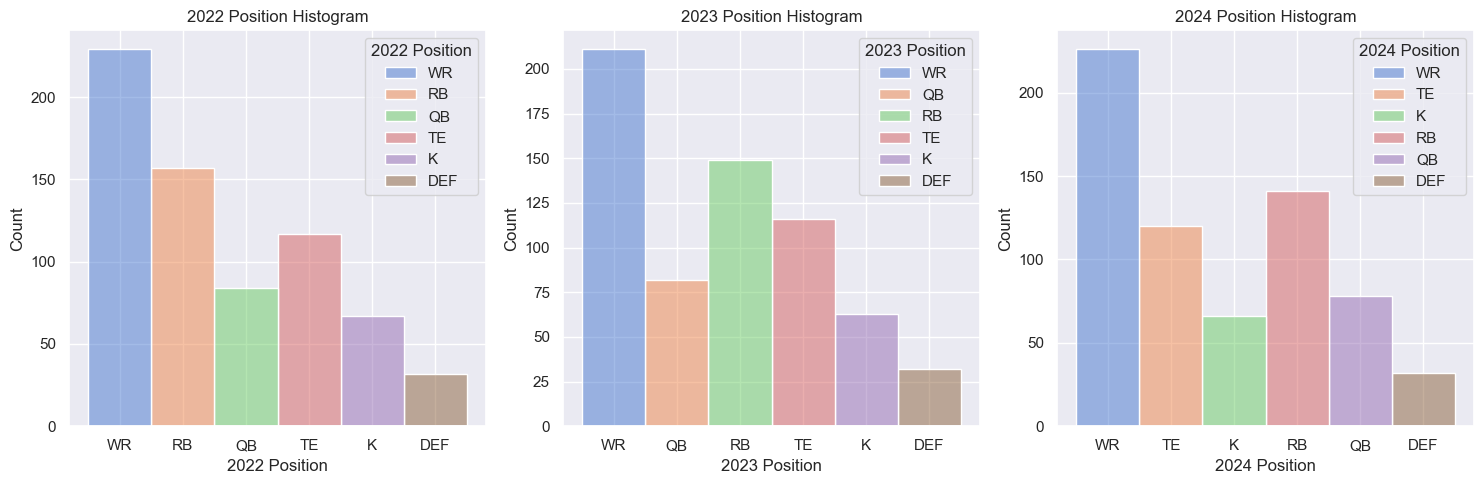

In [9]:
fantasy_feature_histplotter('Position', save=True)

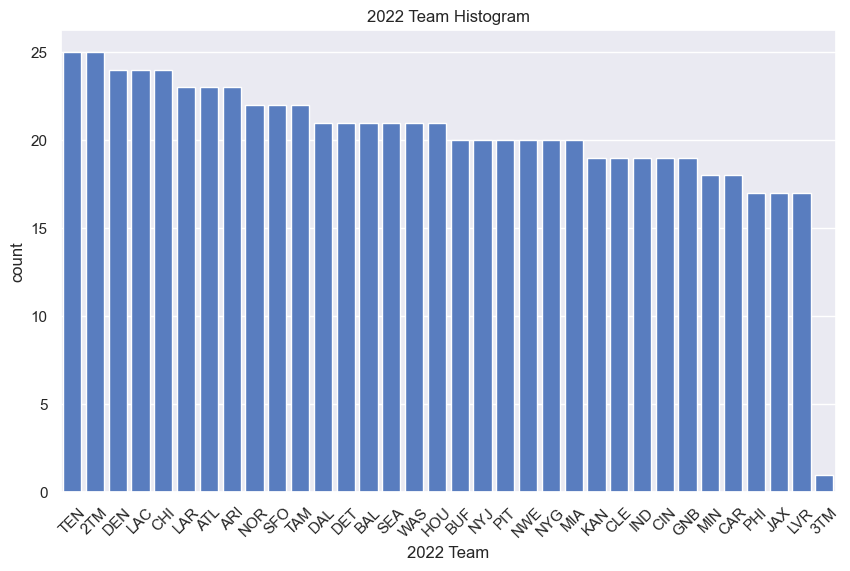

In [10]:
order = df["2022 Team"].value_counts().index

sns.countplot(x="2022 Team", data=df, order=order, legend=False)
plt.title("2022 Team Histogram")
plt.xticks(rotation=45)
plt.savefig("2022_Team_hist.png")
plt.show()

In [11]:
df[df["2022 Team"] == '3TM']

Player Name  2022 Age 2022 Position 2022 Team  2022 Games Played  \
321  Eno Benjamin      23.0            RB       3TM               15.0   

     2022 Games Started  2022 Total Passing  2022 Interceptions Thrown  \
321                 3.0                 NaN                        NaN   

     2022 Rushing Touchdowns  2022 Carries*Yards  ...  2024 Extra Points Made  \
321                      2.0             24178.0  ...                     NaN   

     2024 ST_Interceptions  2024 ST_Safeties  \
321                    NaN               NaN   

     2024 ST_Special Teams Touchdowns  2024 XP2  2024 Touchdowns Allowed  \
321                               NaN       NaN                      NaN   

     2024 Average ADP  2024 Positional ADP  2024 PPR Fantasy Points Scored  \
321               NaN                  NaN                             NaN   

     2024 Standard Fantasy Points Scored  
321                                  NaN  

[1 rows x 70 columns]

In [14]:
df[df["Player Name"] == 'Eno Benjamin']

Player Name  2022 Age 2022 Position 2022 Team  2022 Games Played  \
321  Eno Benjamin      23.0            RB       3TM               15.0   

     2022 Games Started  2022 Total Passing  2022 Interceptions Thrown  \
321                 3.0                 NaN                        NaN   

     2022 Rushing Touchdowns  2022 Carries*Yards  ...  2024 Extra Points Made  \
321                      2.0             24178.0  ...                     NaN   

     2024 ST_Interceptions  2024 ST_Safeties  \
321                    NaN               NaN   

     2024 ST_Special Teams Touchdowns  2024 XP2  2024 Touchdowns Allowed  \
321                               NaN       NaN                      NaN   

     2024 Average ADP  2024 Positional ADP  2024 PPR Fantasy Points Scored  \
321               NaN                  NaN                             NaN   

     2024 Standard Fantasy Points Scored  
321                                  NaN  

[1 rows x 70 columns]

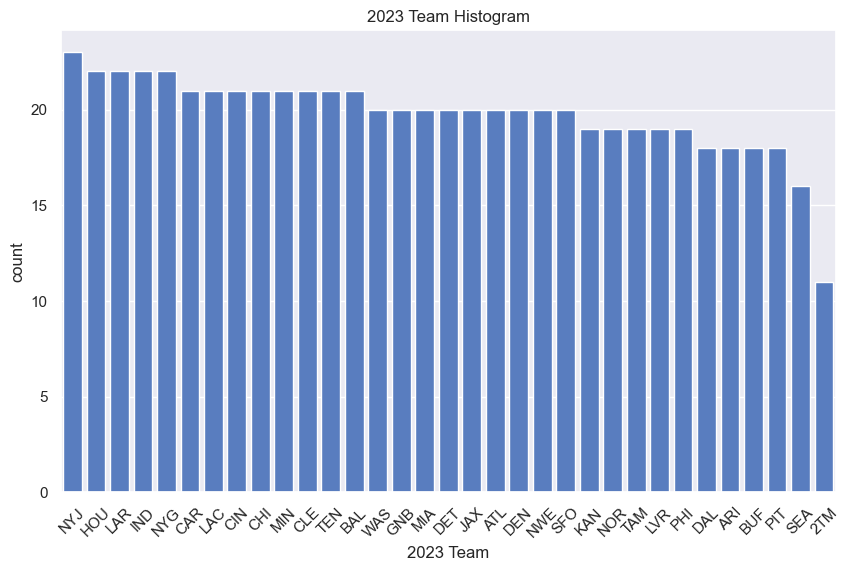

In [12]:
order = df["2023 Team"].value_counts().index

sns.countplot(x="2023 Team", data=df, order=order, legend=False)
plt.title("2023 Team Histogram")
plt.xticks(rotation=45)
plt.savefig("2023_Team_hist.png")
plt.show()

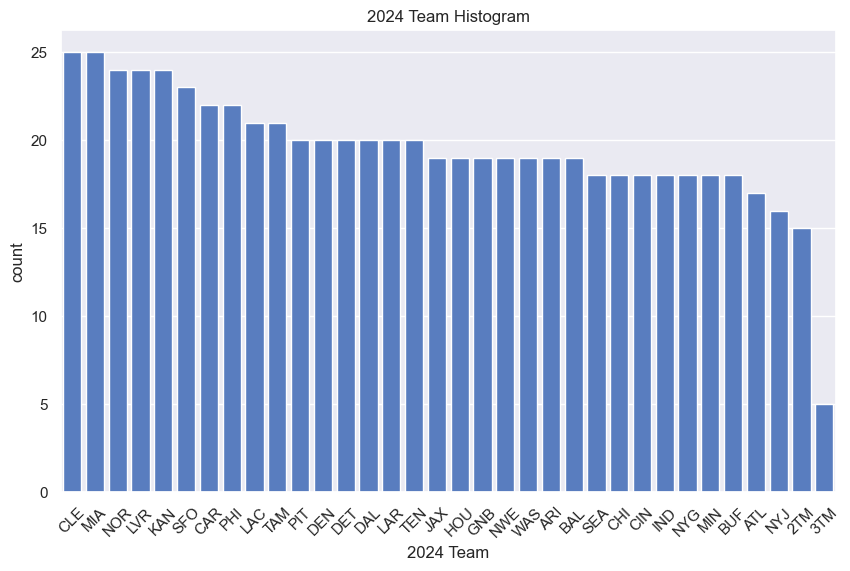

In [13]:
order = df["2024 Team"].value_counts().index

sns.countplot(x="2024 Team", data=df, order=order, legend=False)
plt.title("2024 Team Histogram")
plt.xticks(rotation=45)
plt.savefig("2024_Team_hist.png")
plt.show()

## Numerical Analysis

In [96]:
def fantasy_feature_univar_plots(feature, save=False):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey="row")

    years = ["2022", "2023", "2024"]
    colors = ["darkblue", "seagreen", "sienna"]
    
    for i, (year, color) in enumerate(zip(years, colors)):
        sns.histplot(
           x=df[f"{year} {feature}"],
           color=color,
           ax=axes[0, i]
        )
        axes[0, i].set_title(f"{year} {feature} Histogram")
        
    for i, (year, color) in enumerate(zip(years, colors)):
        sns.boxplot(
            y=df[f"{year} {feature}"],
            color=color,
            ax=axes[1, i])
        axes[1, i].set_title(f"{year} {feature} Boxplot")

    
    plt.tight_layout()

    if save:
        plt.savefig(f'{feature}_histogram.png')
    plt.show()

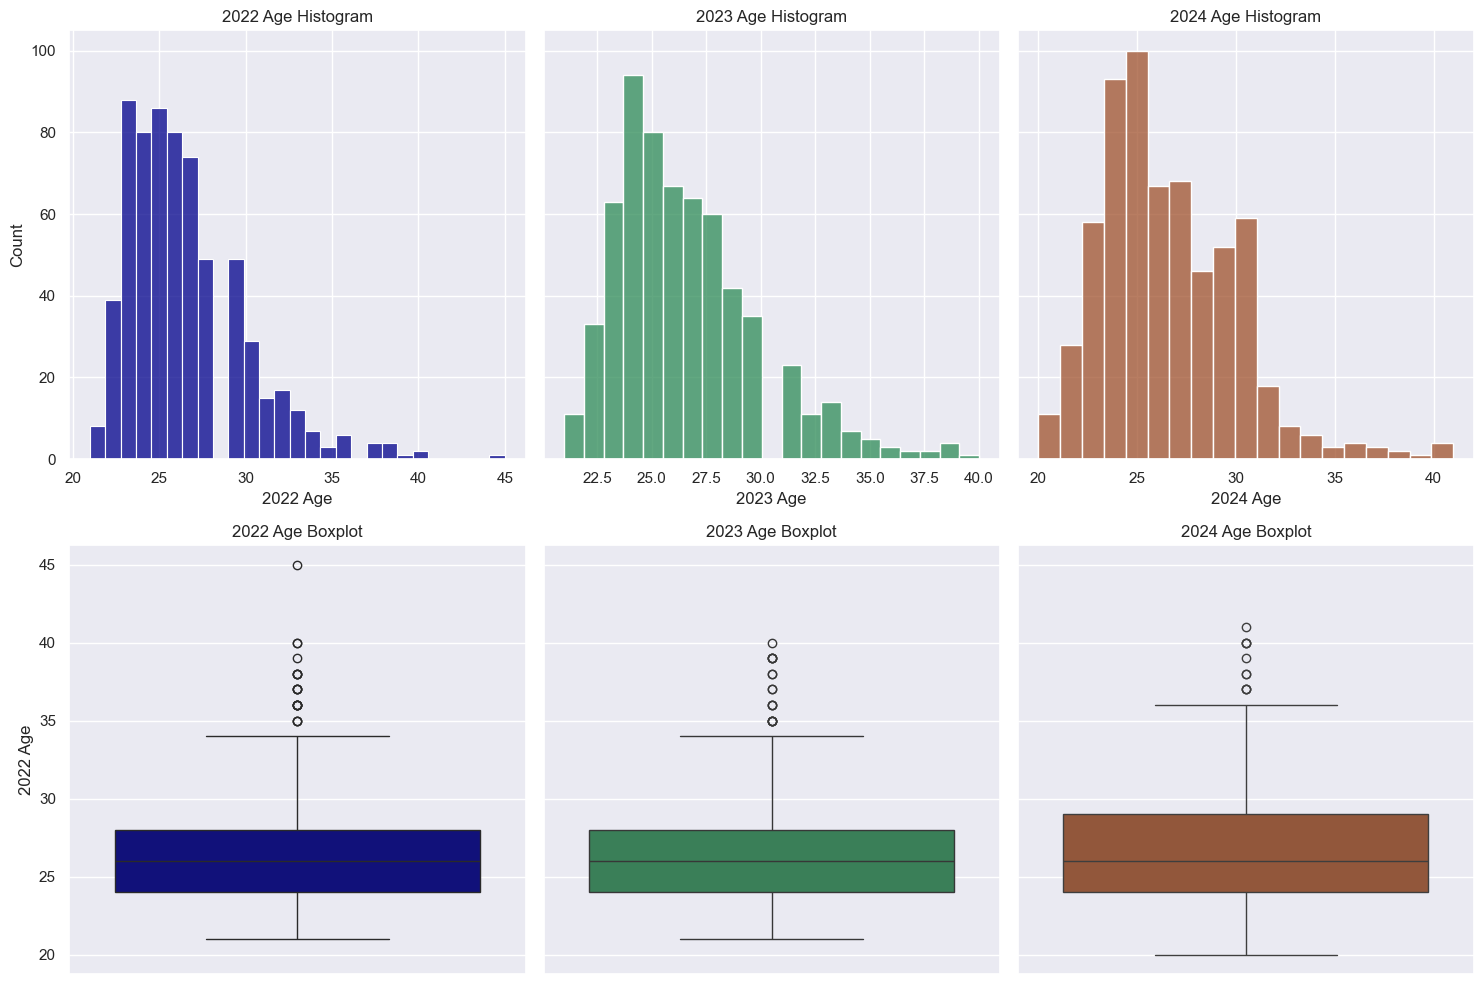

In [97]:
fantasy_feature_univar_plots("Age")

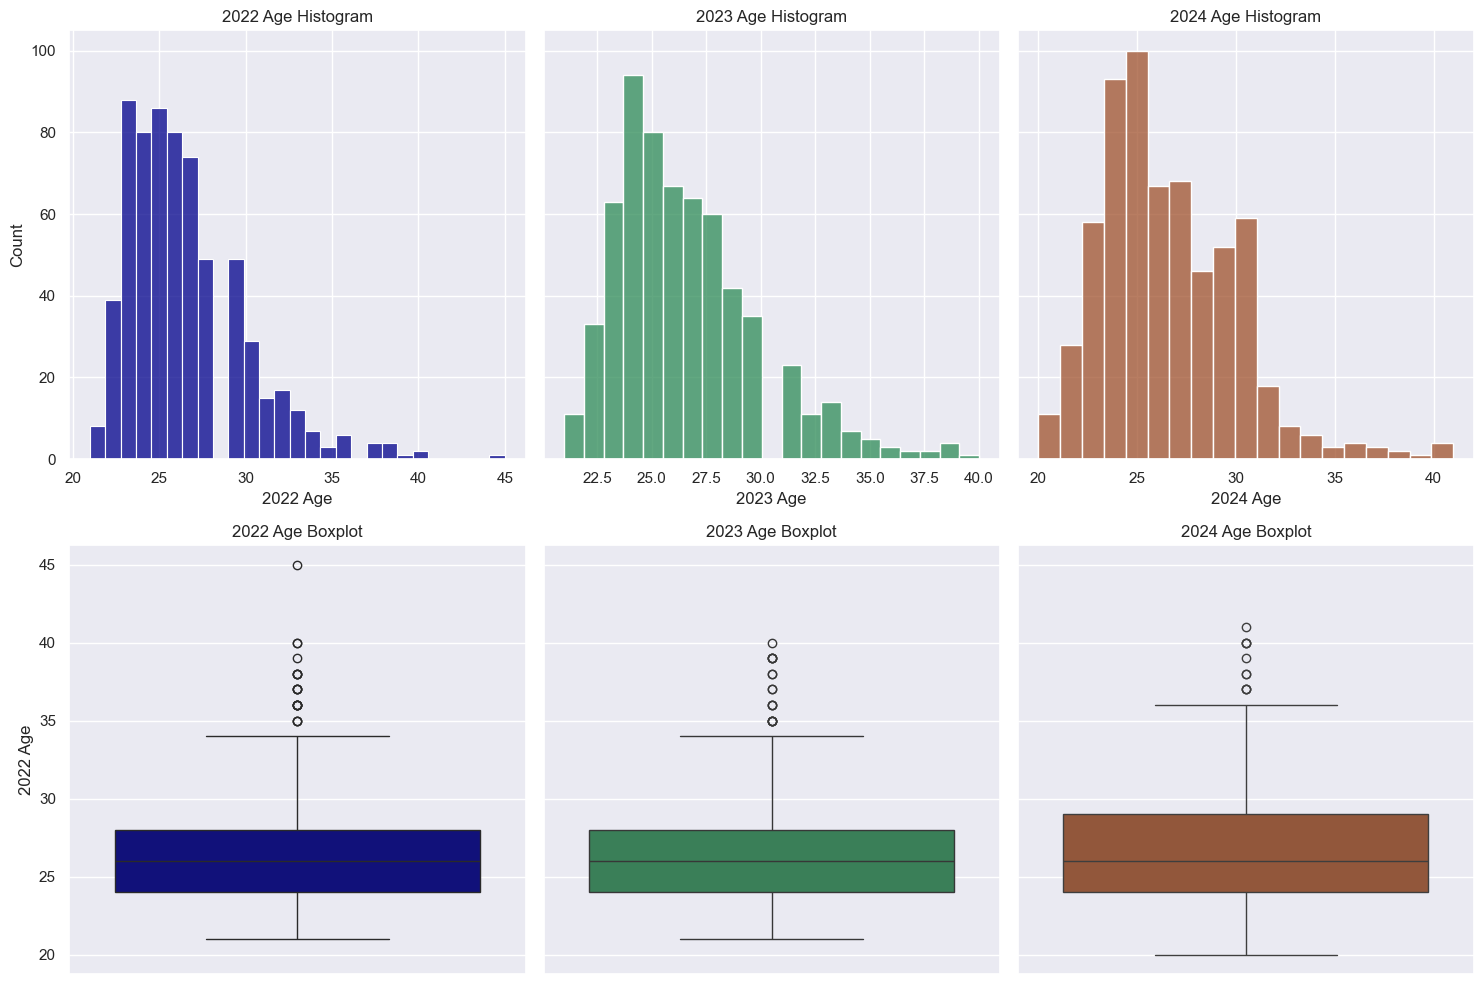

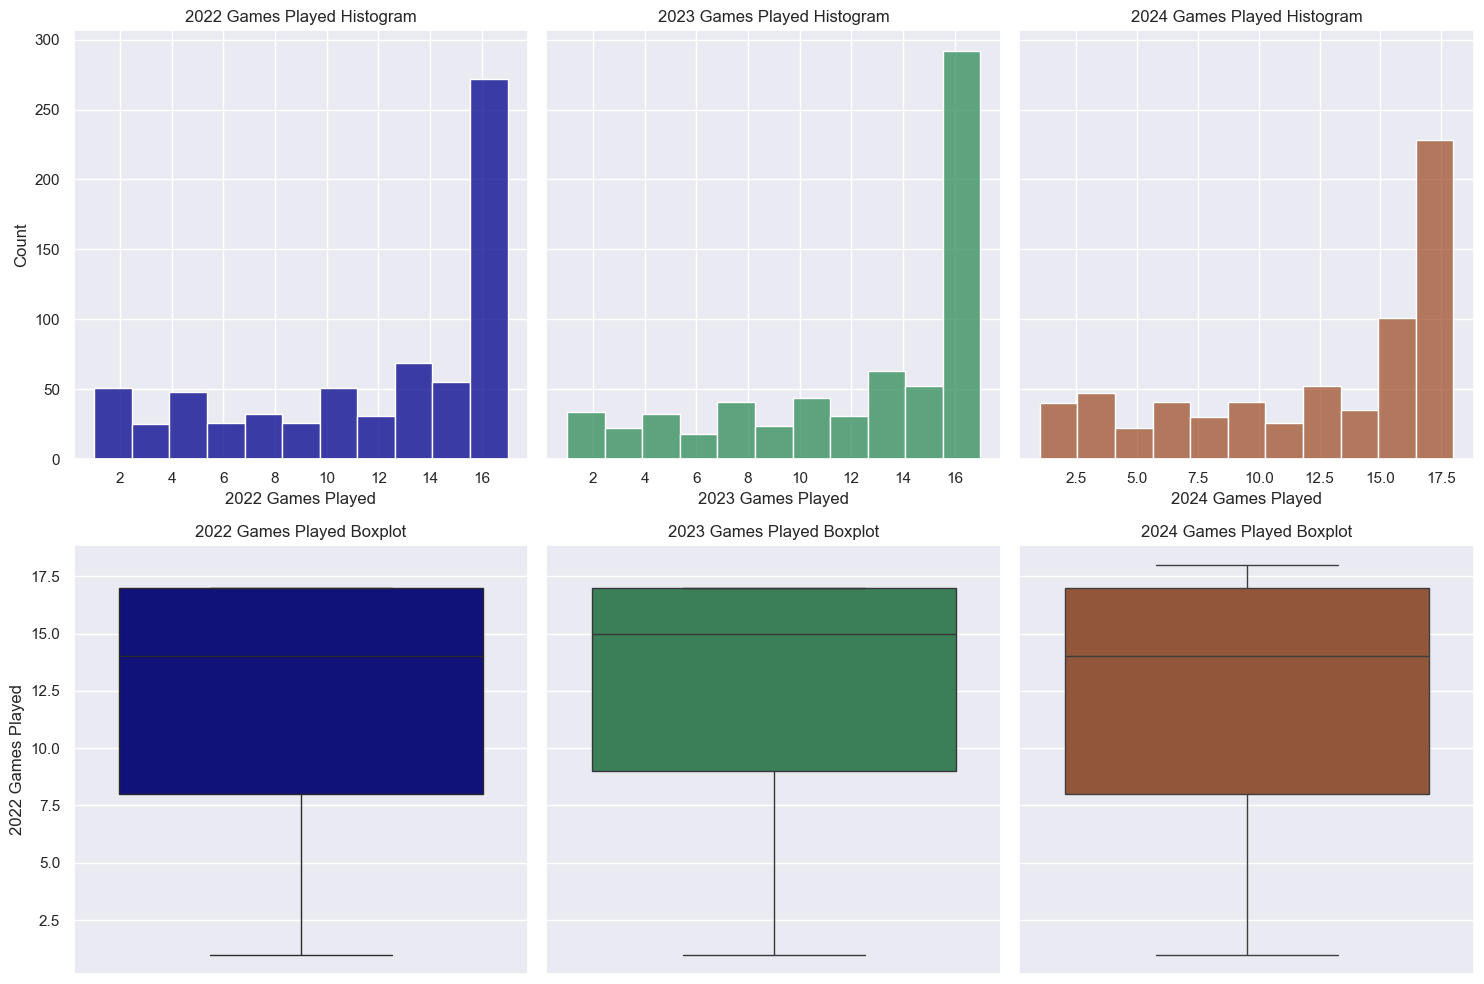

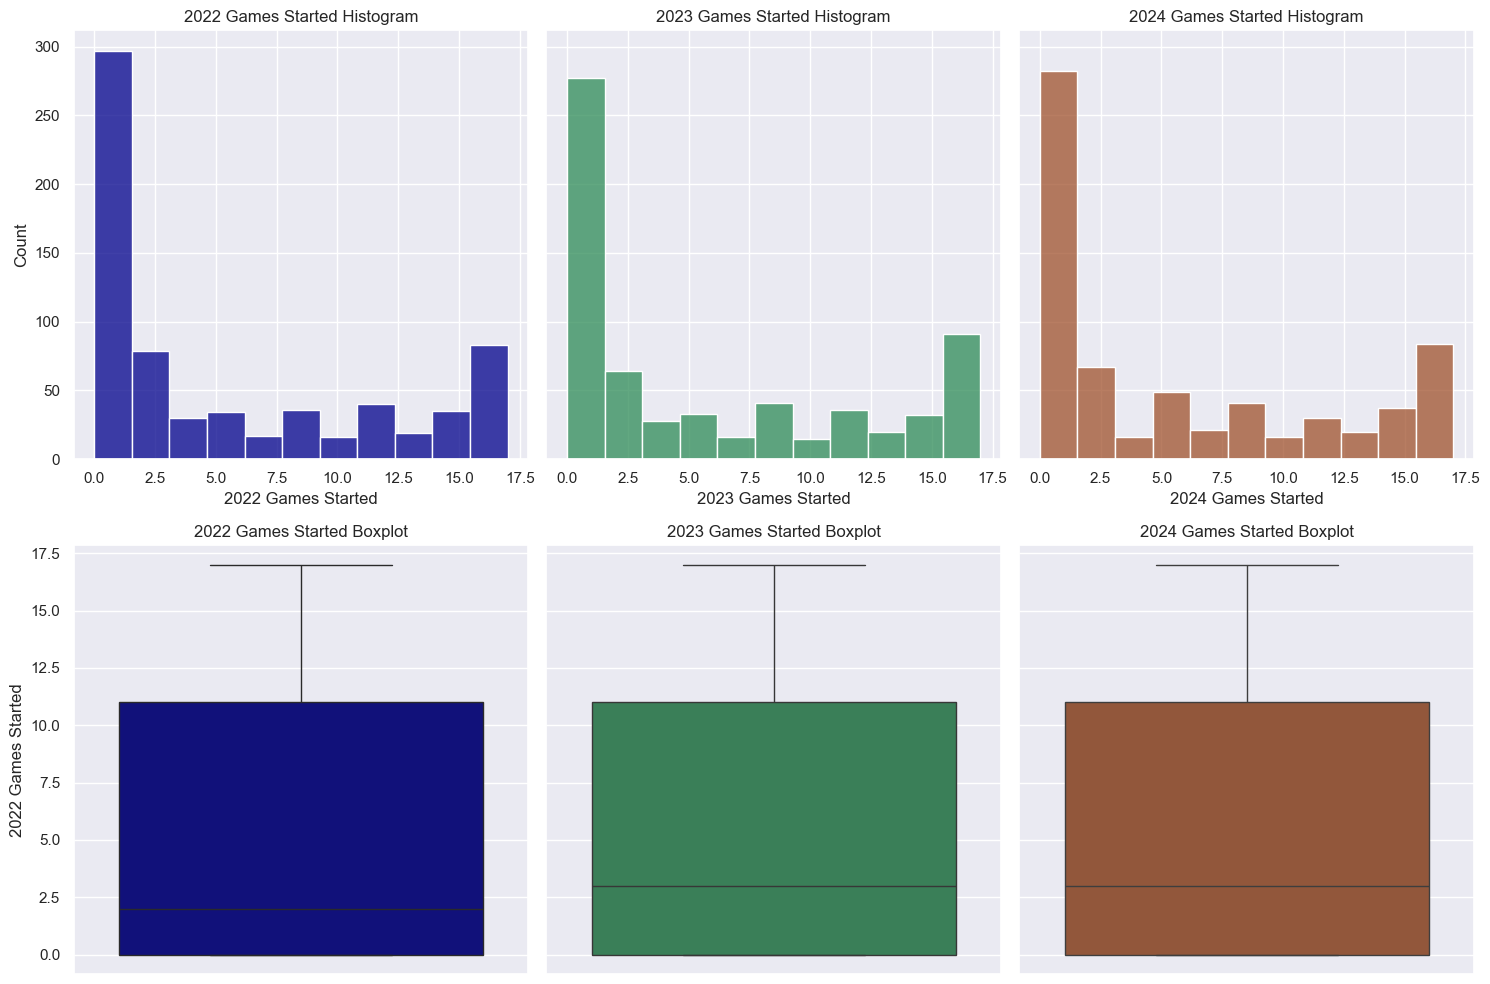

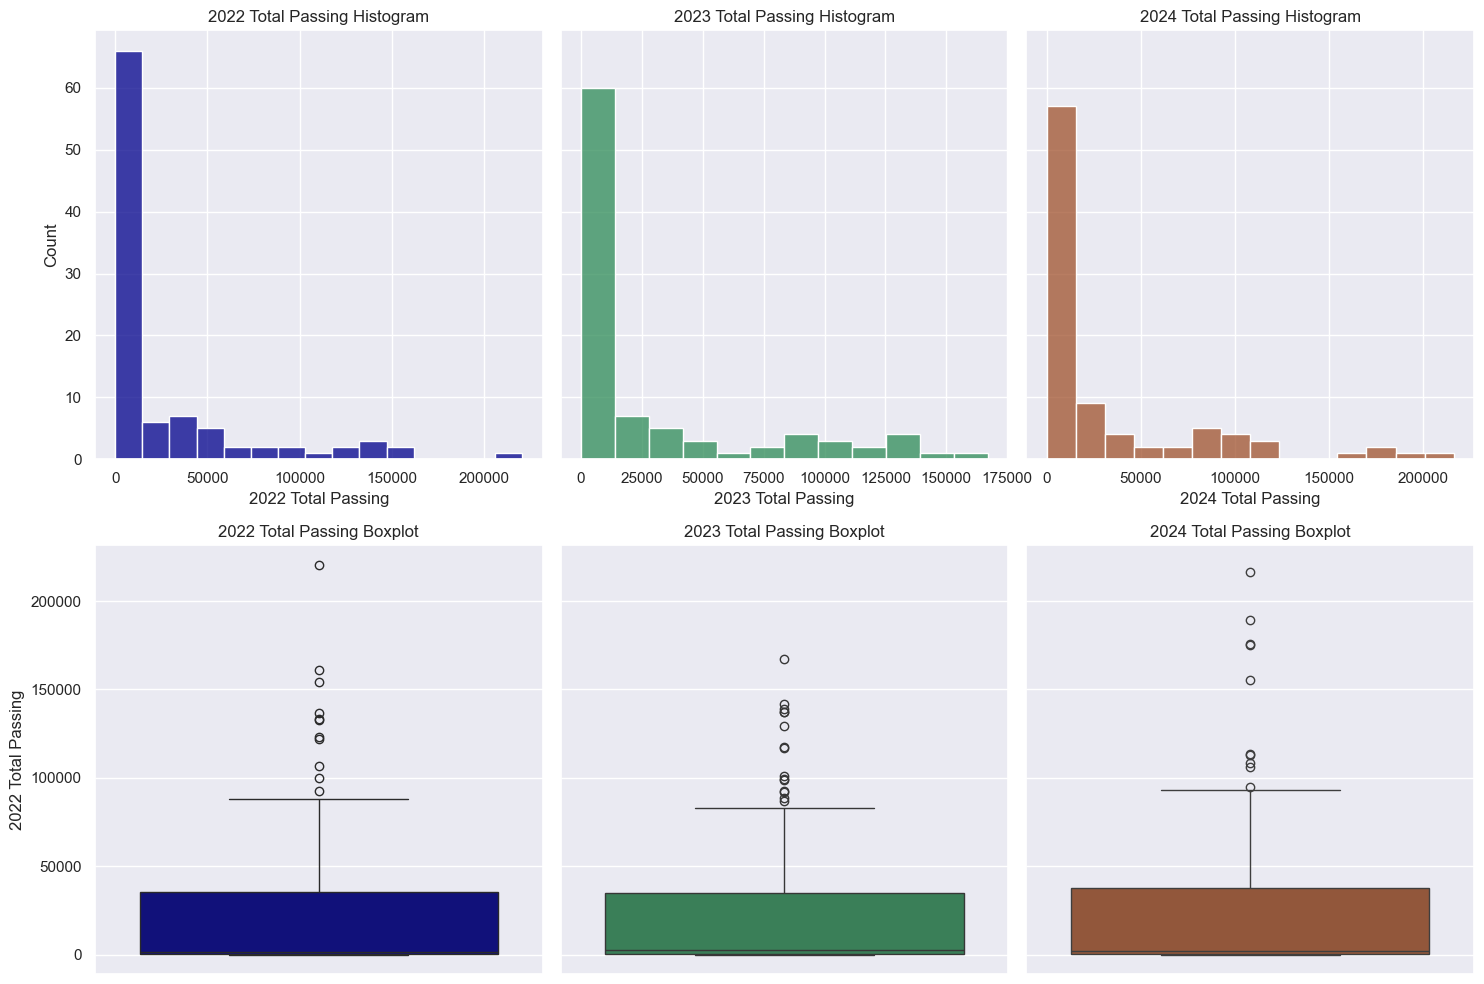

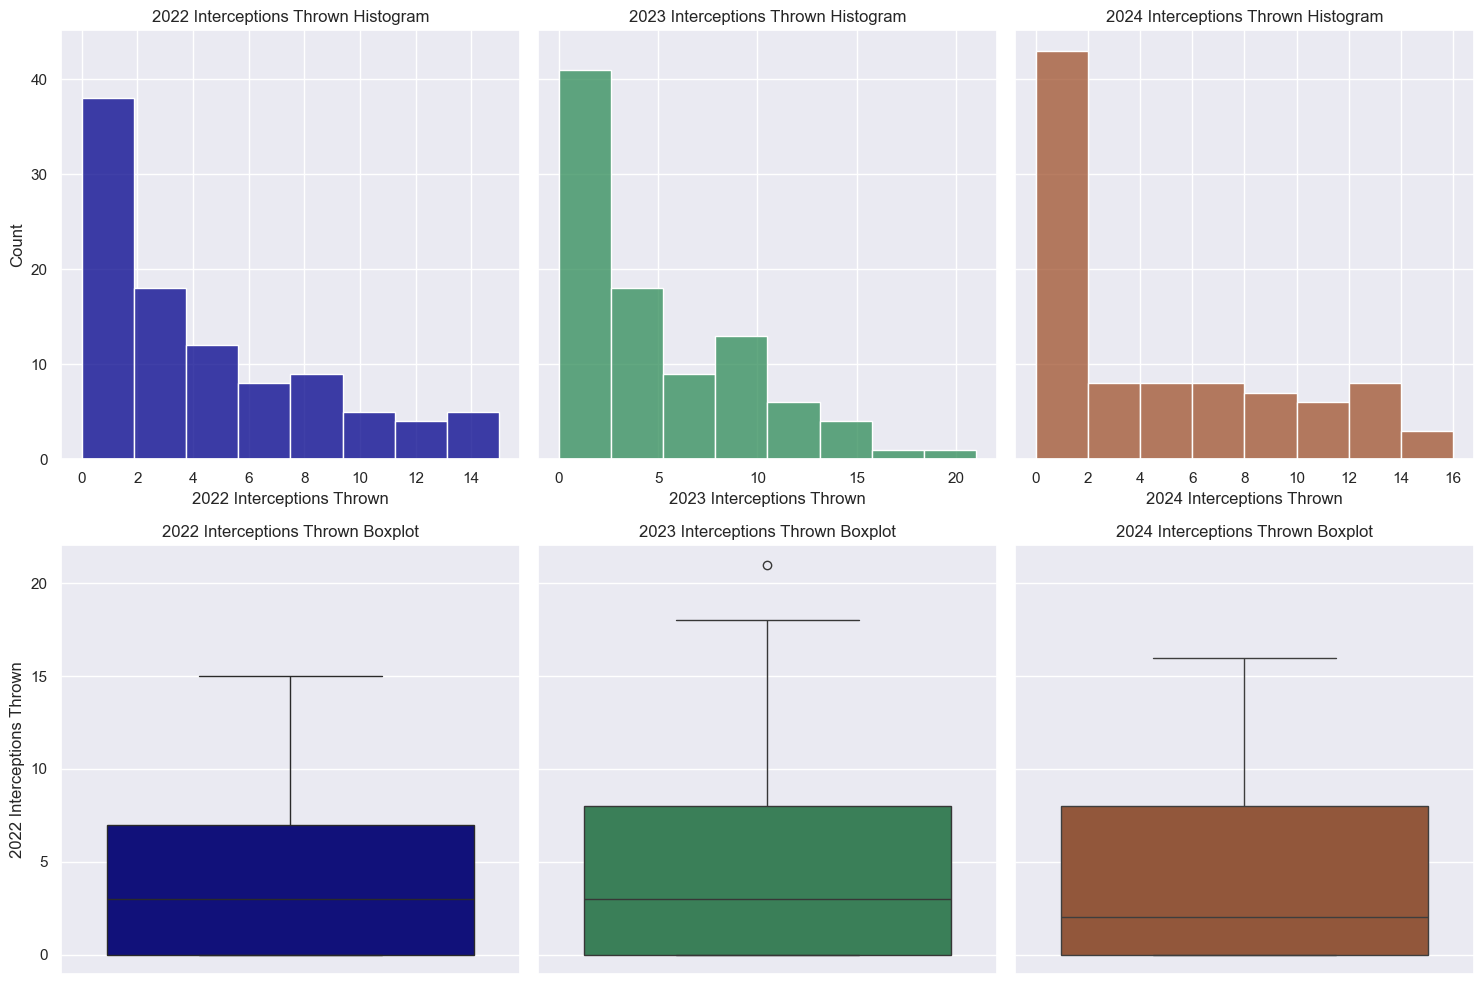

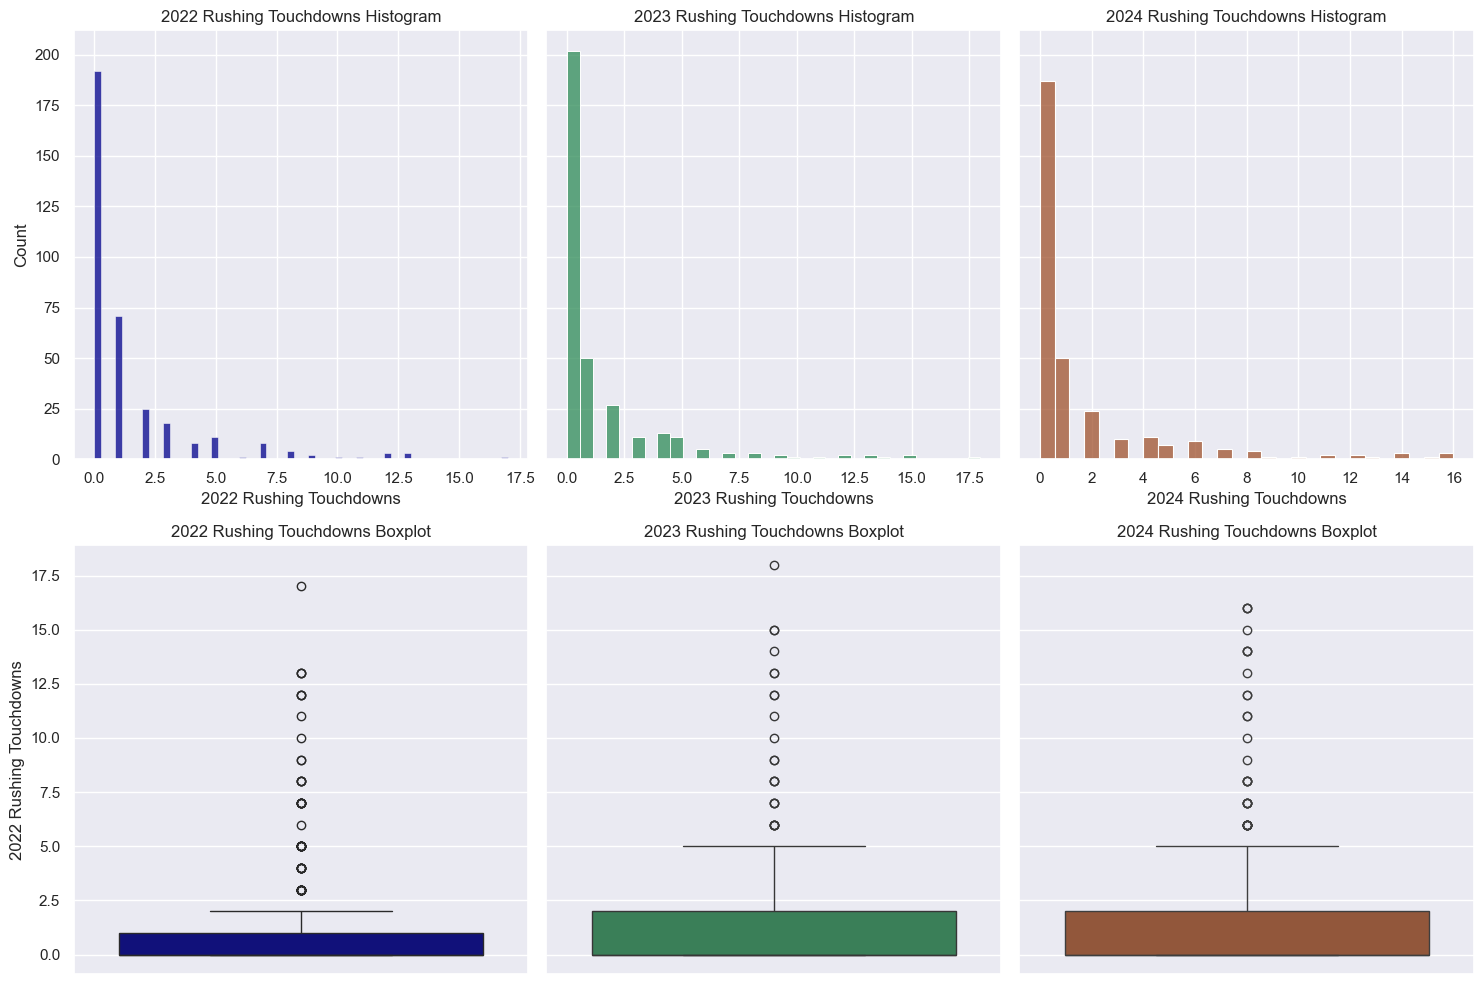

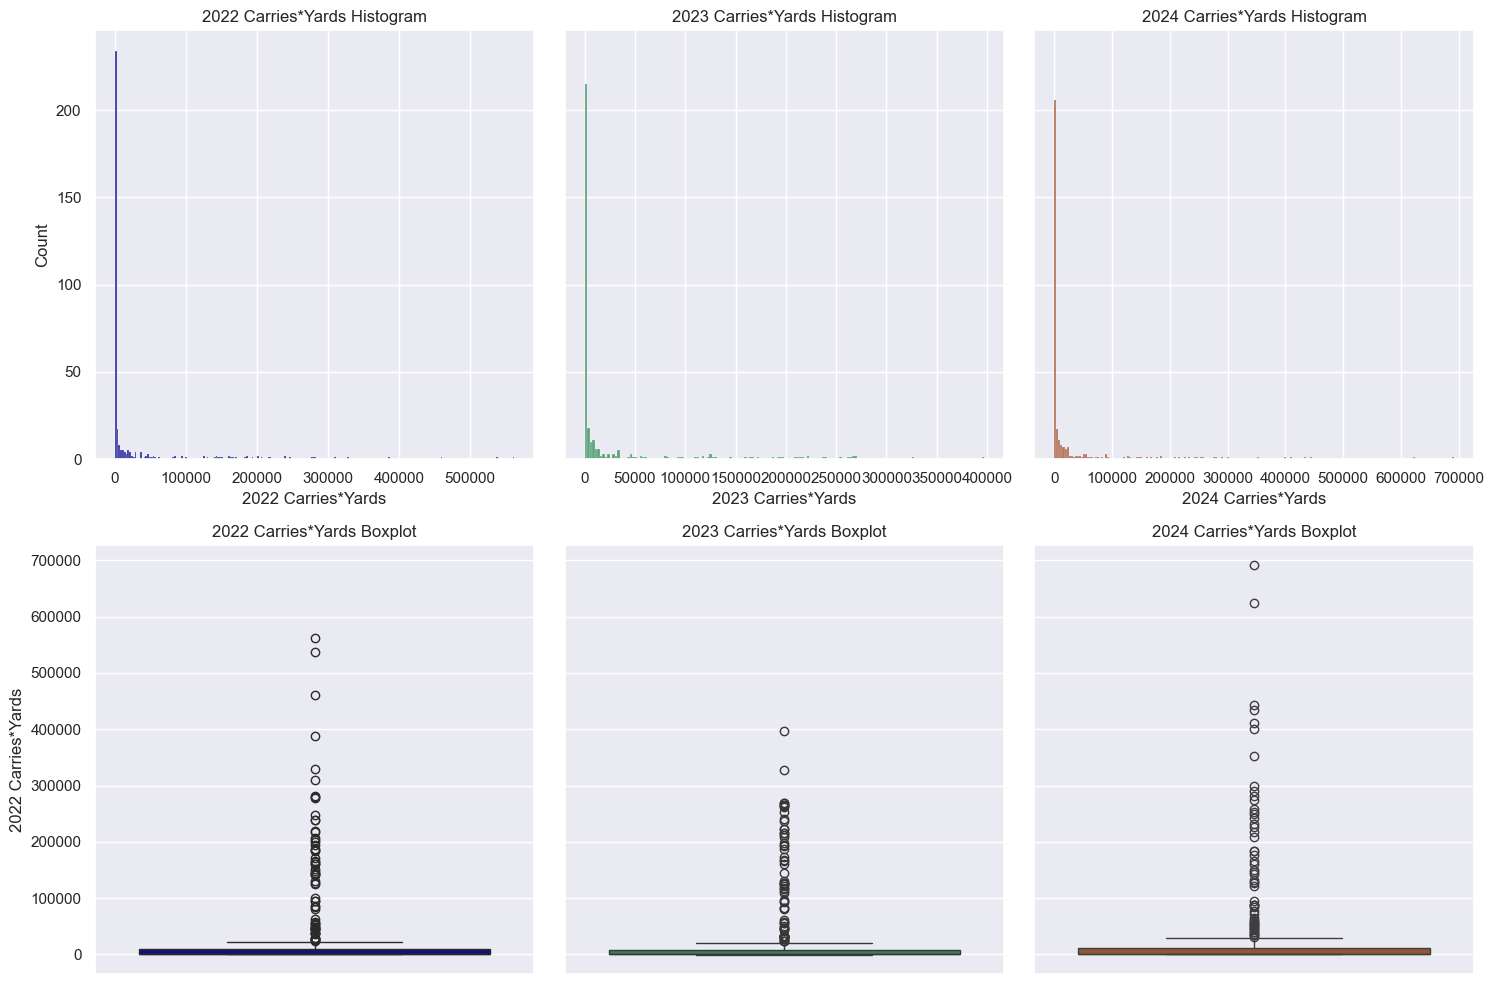

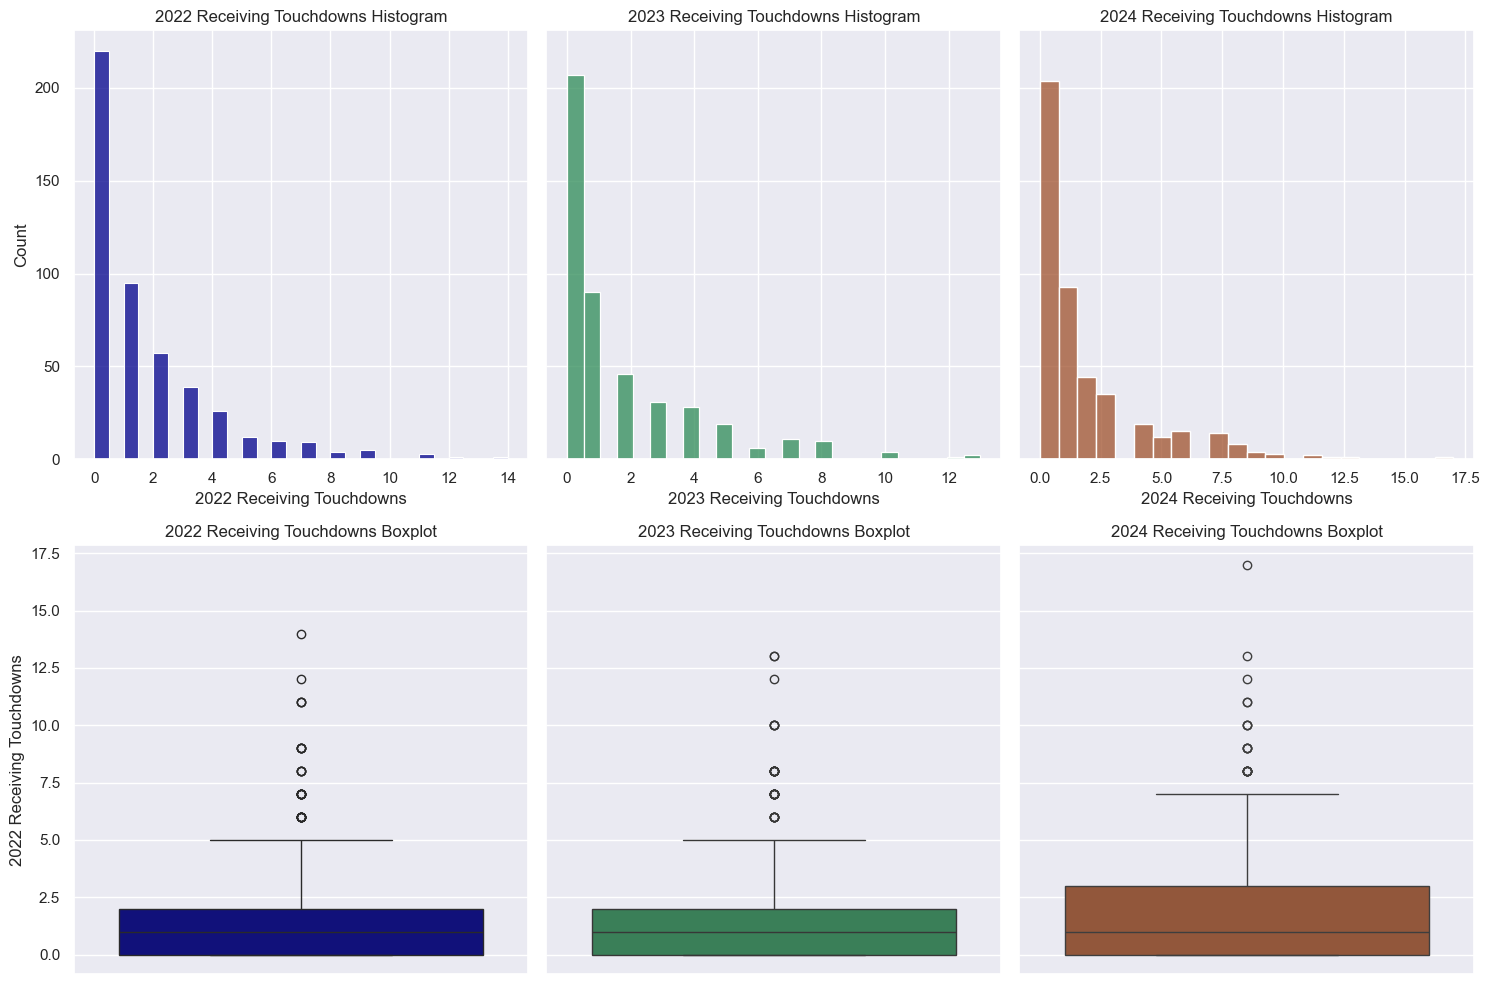

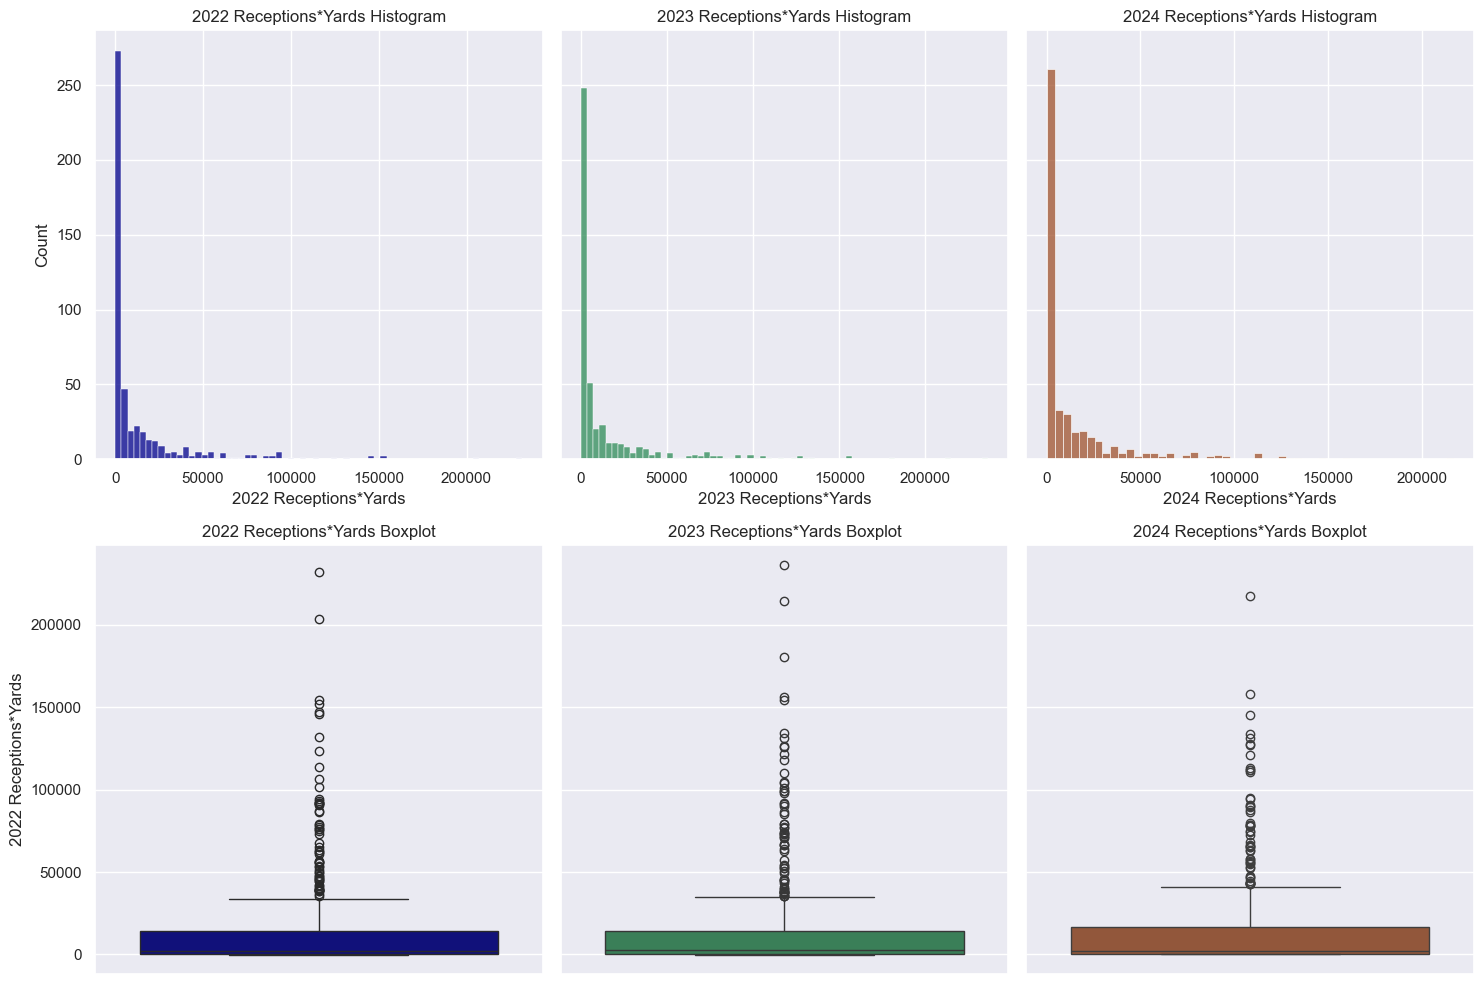

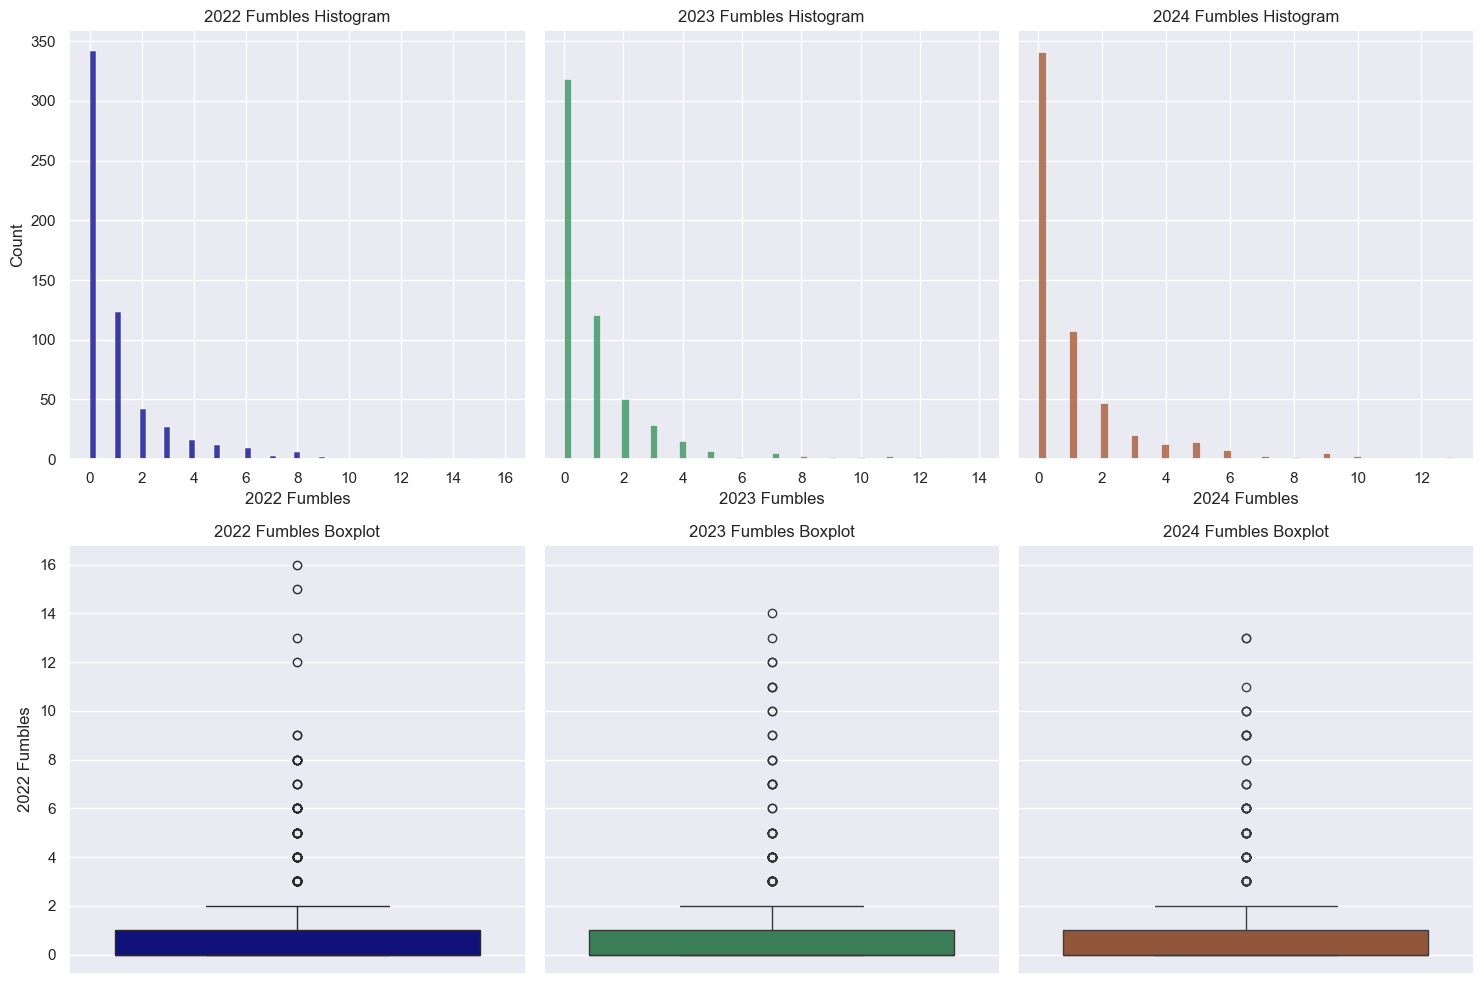

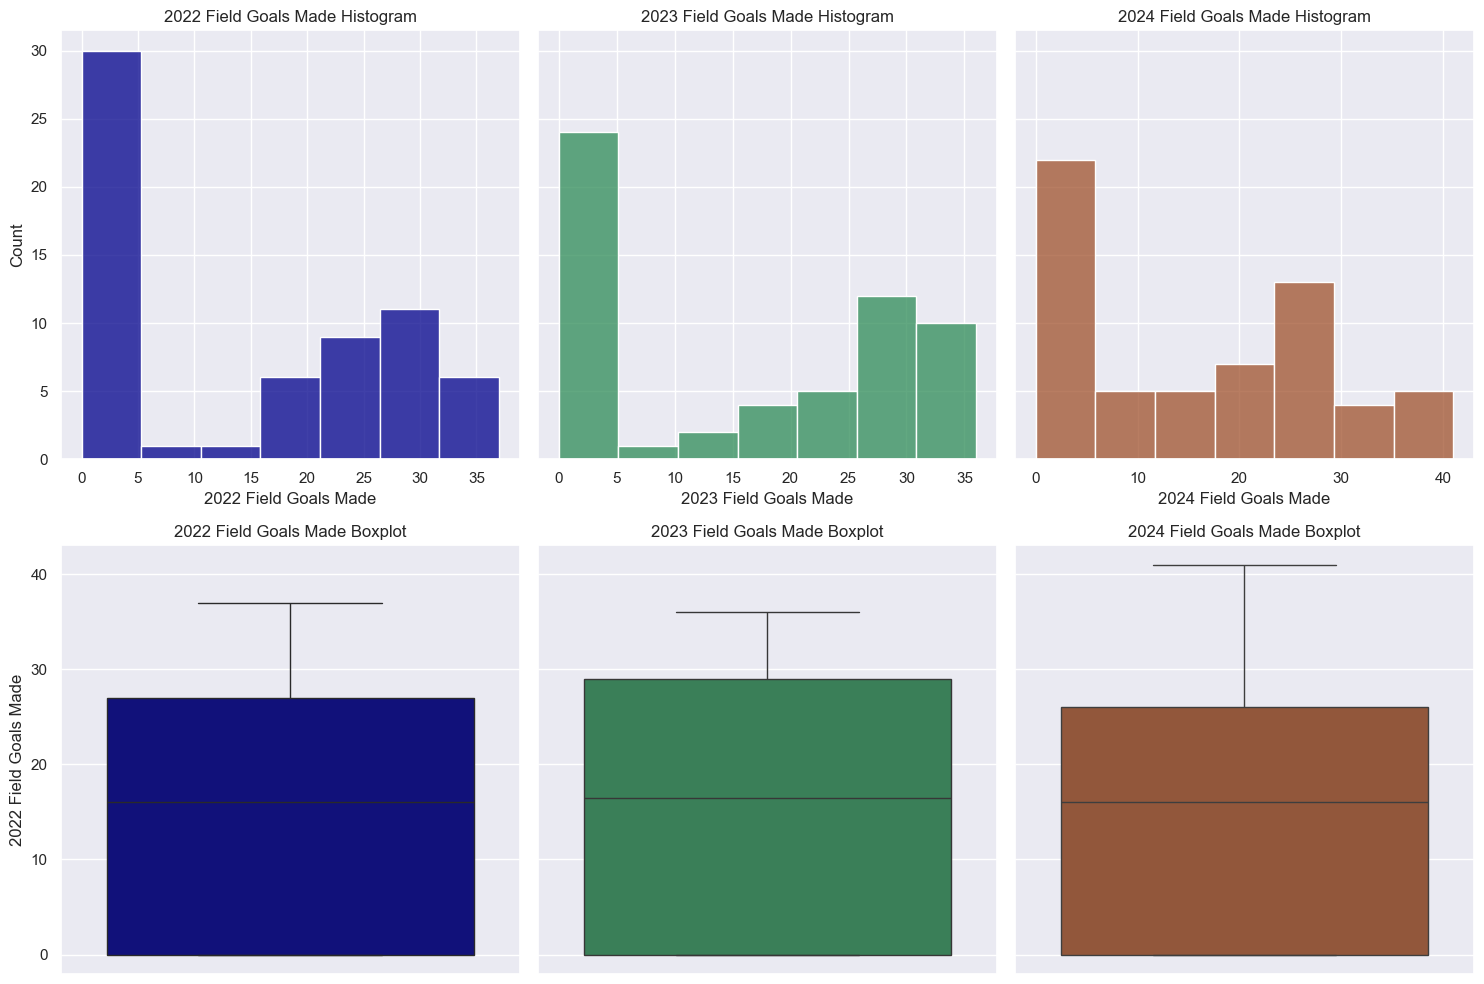

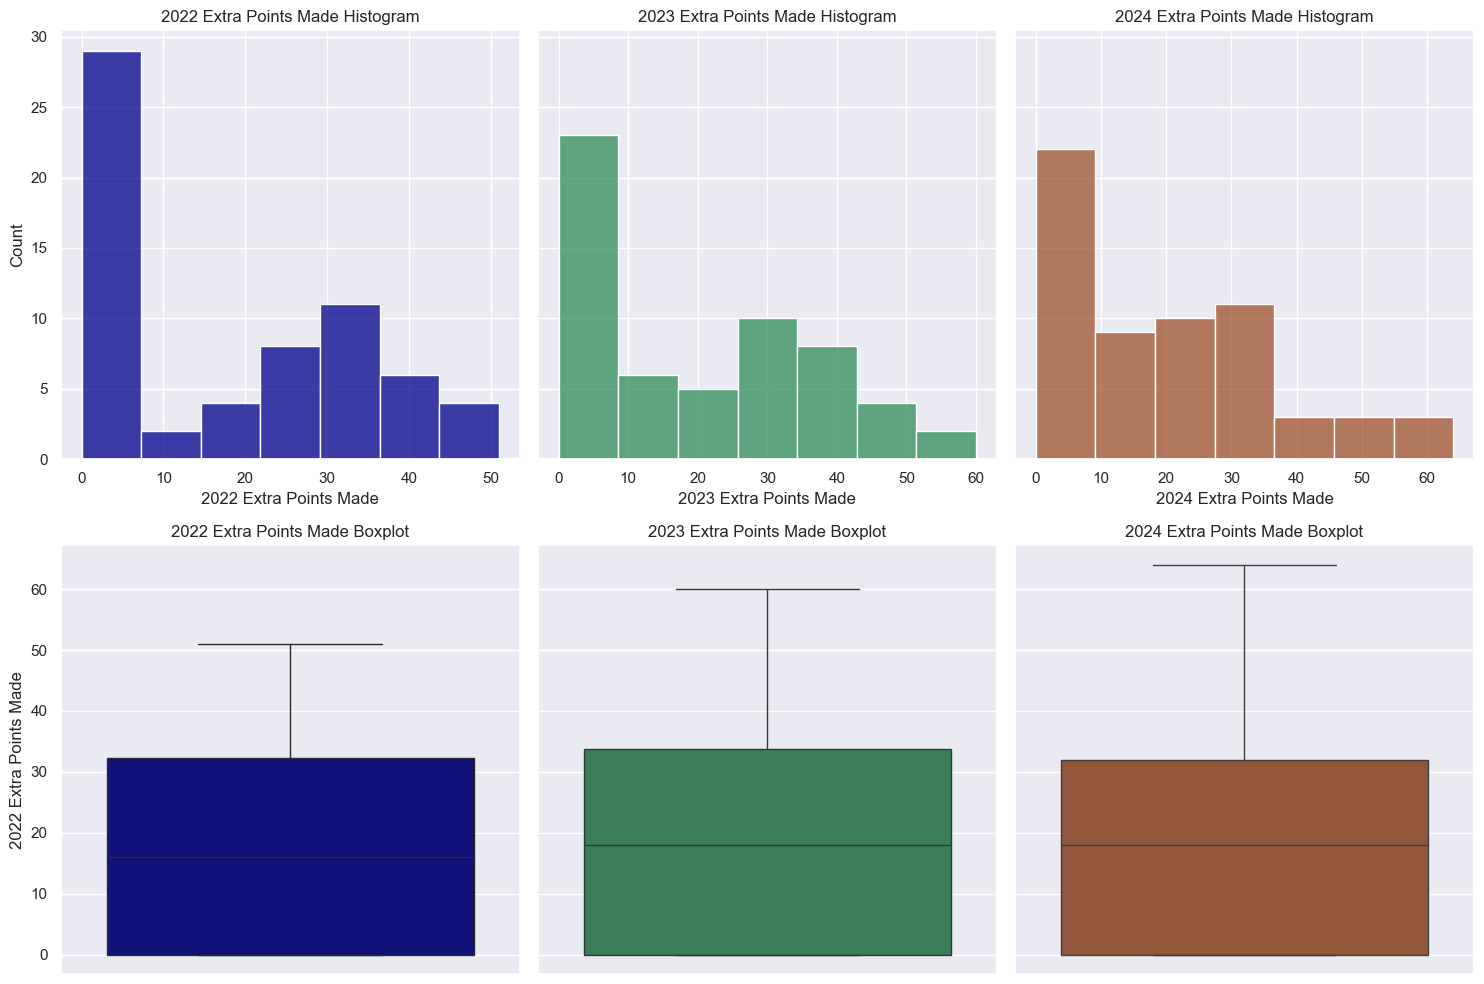

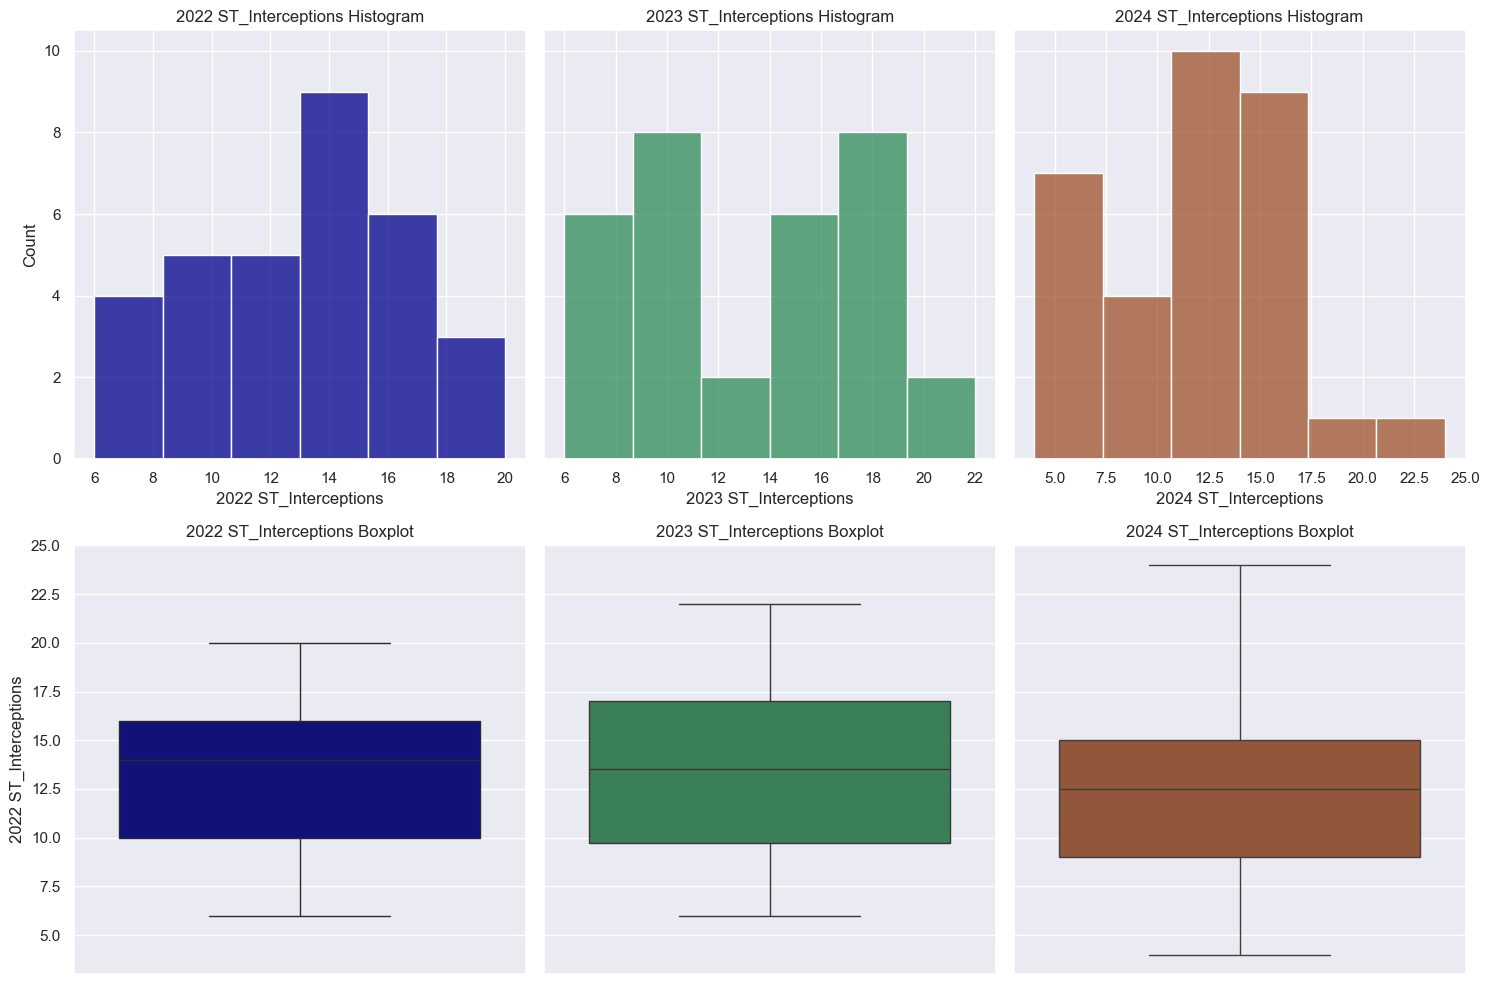

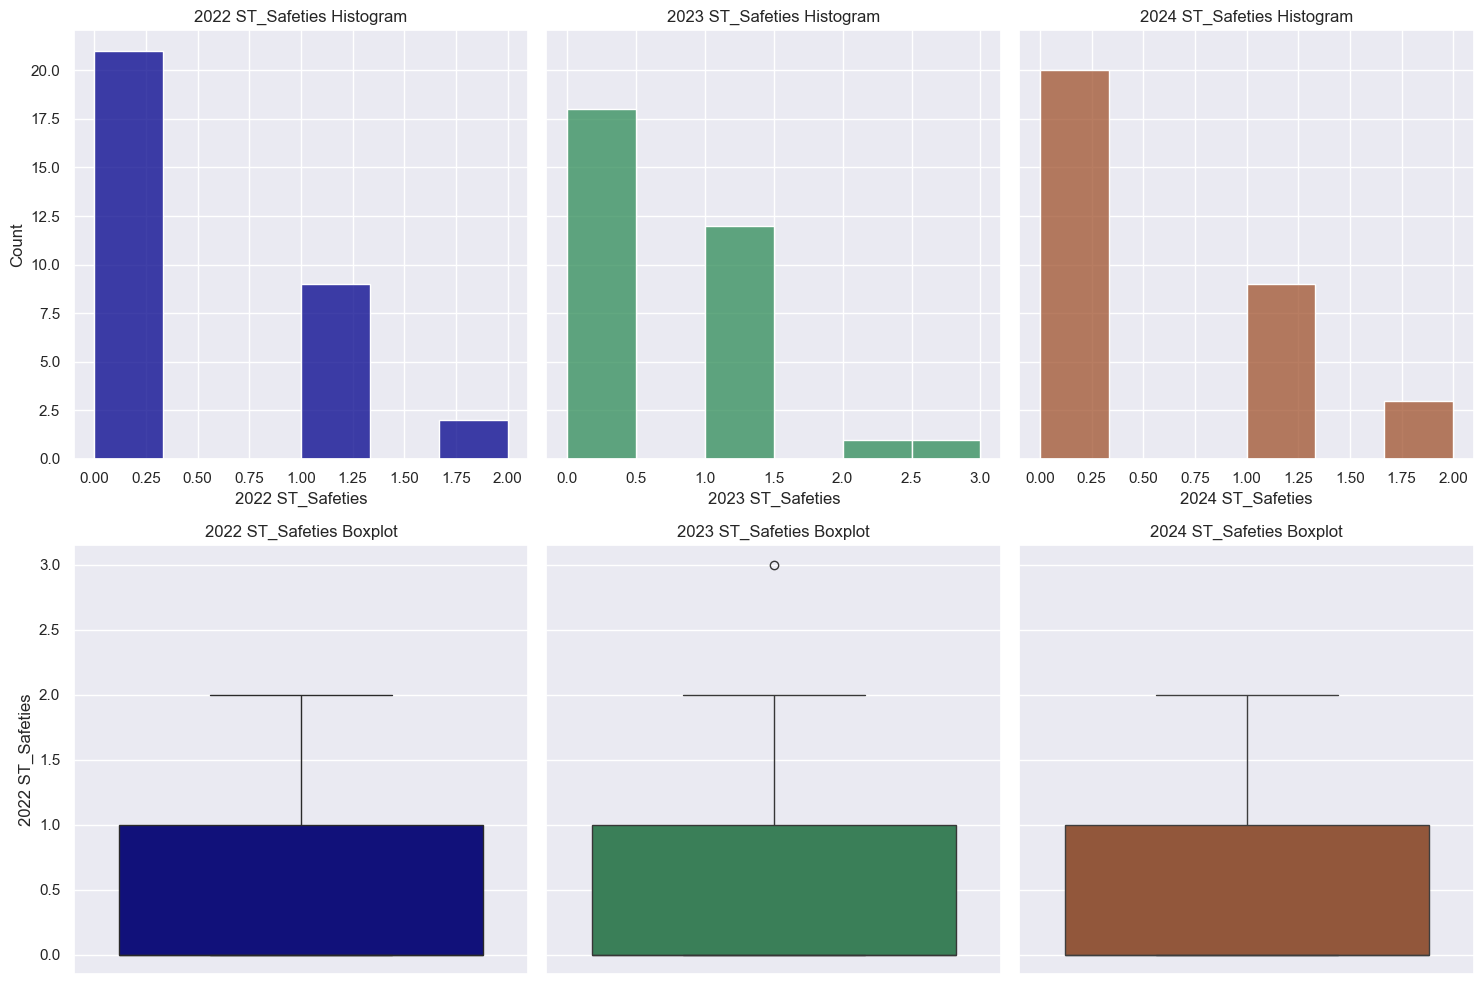

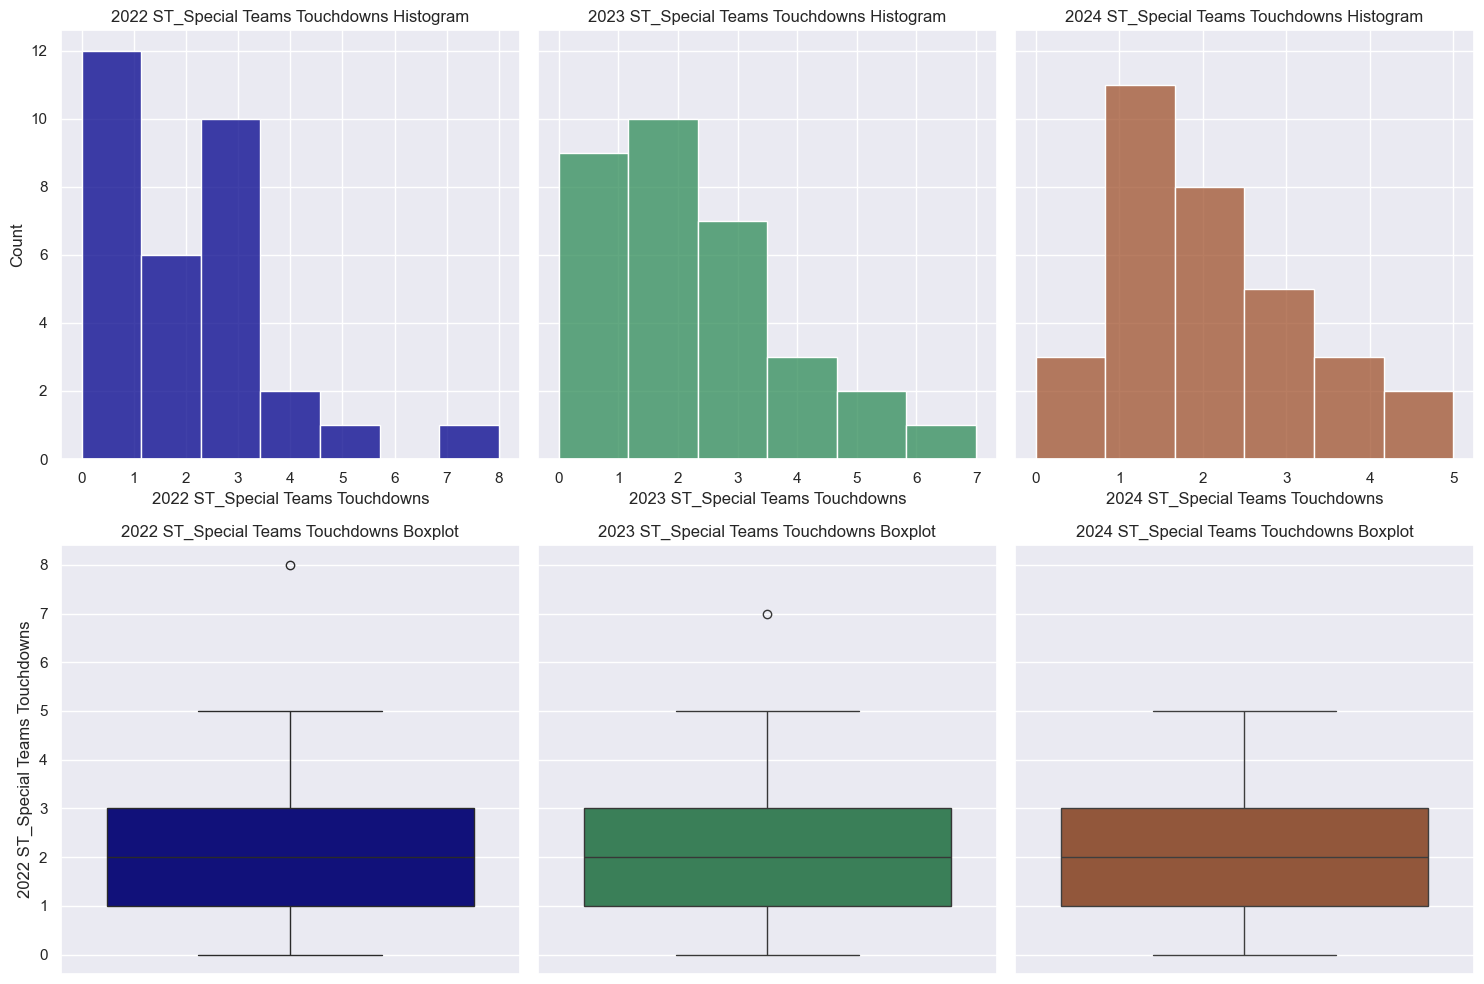

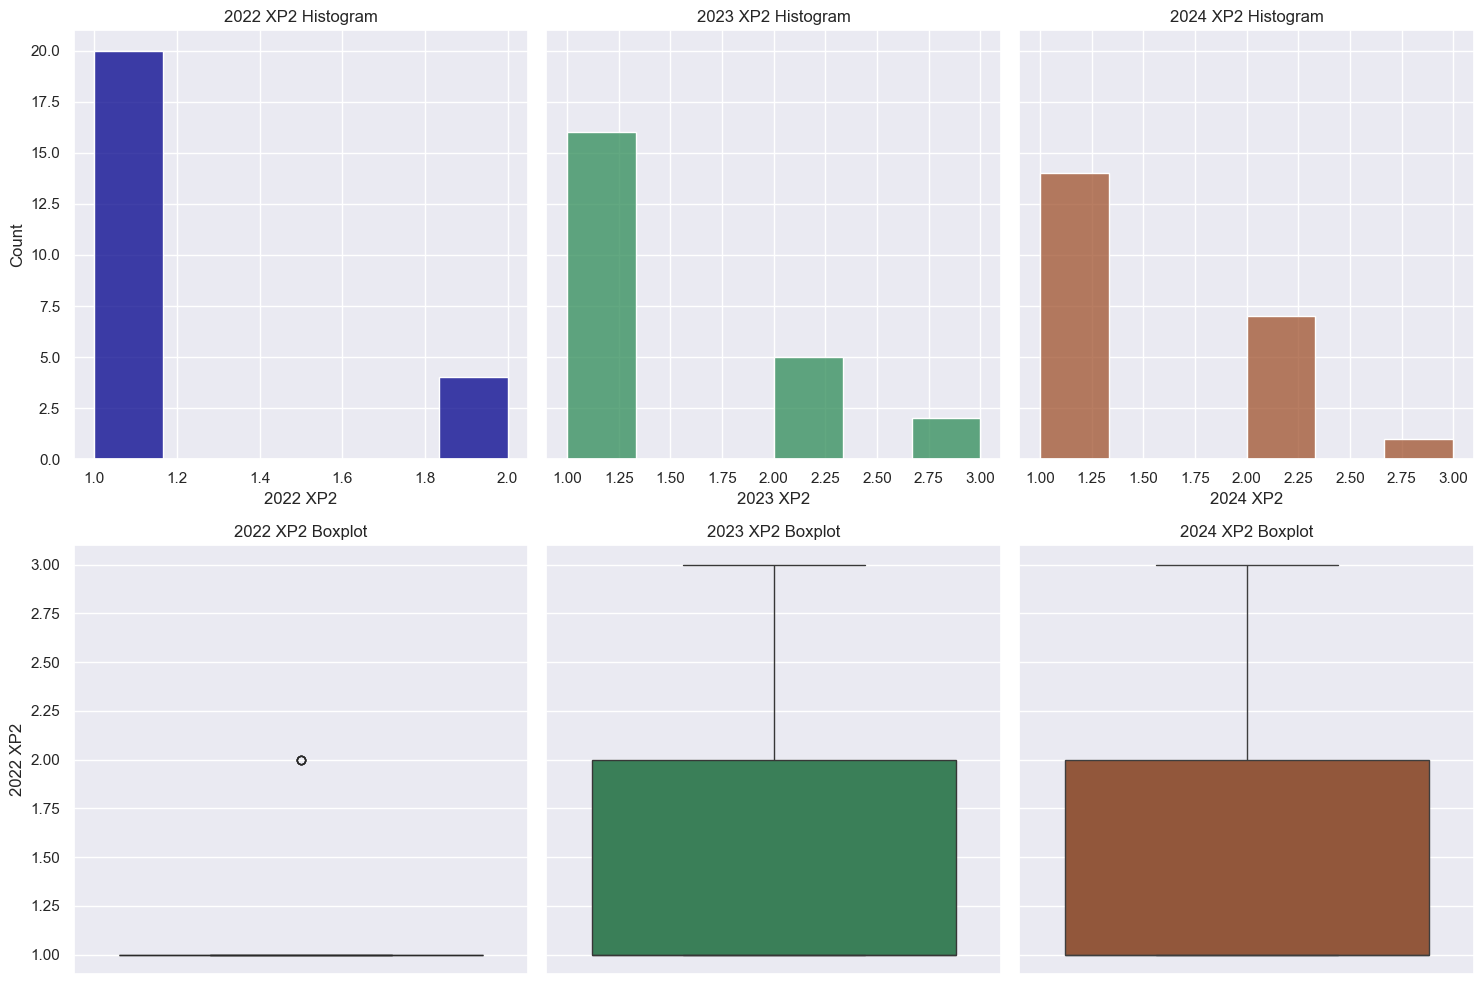

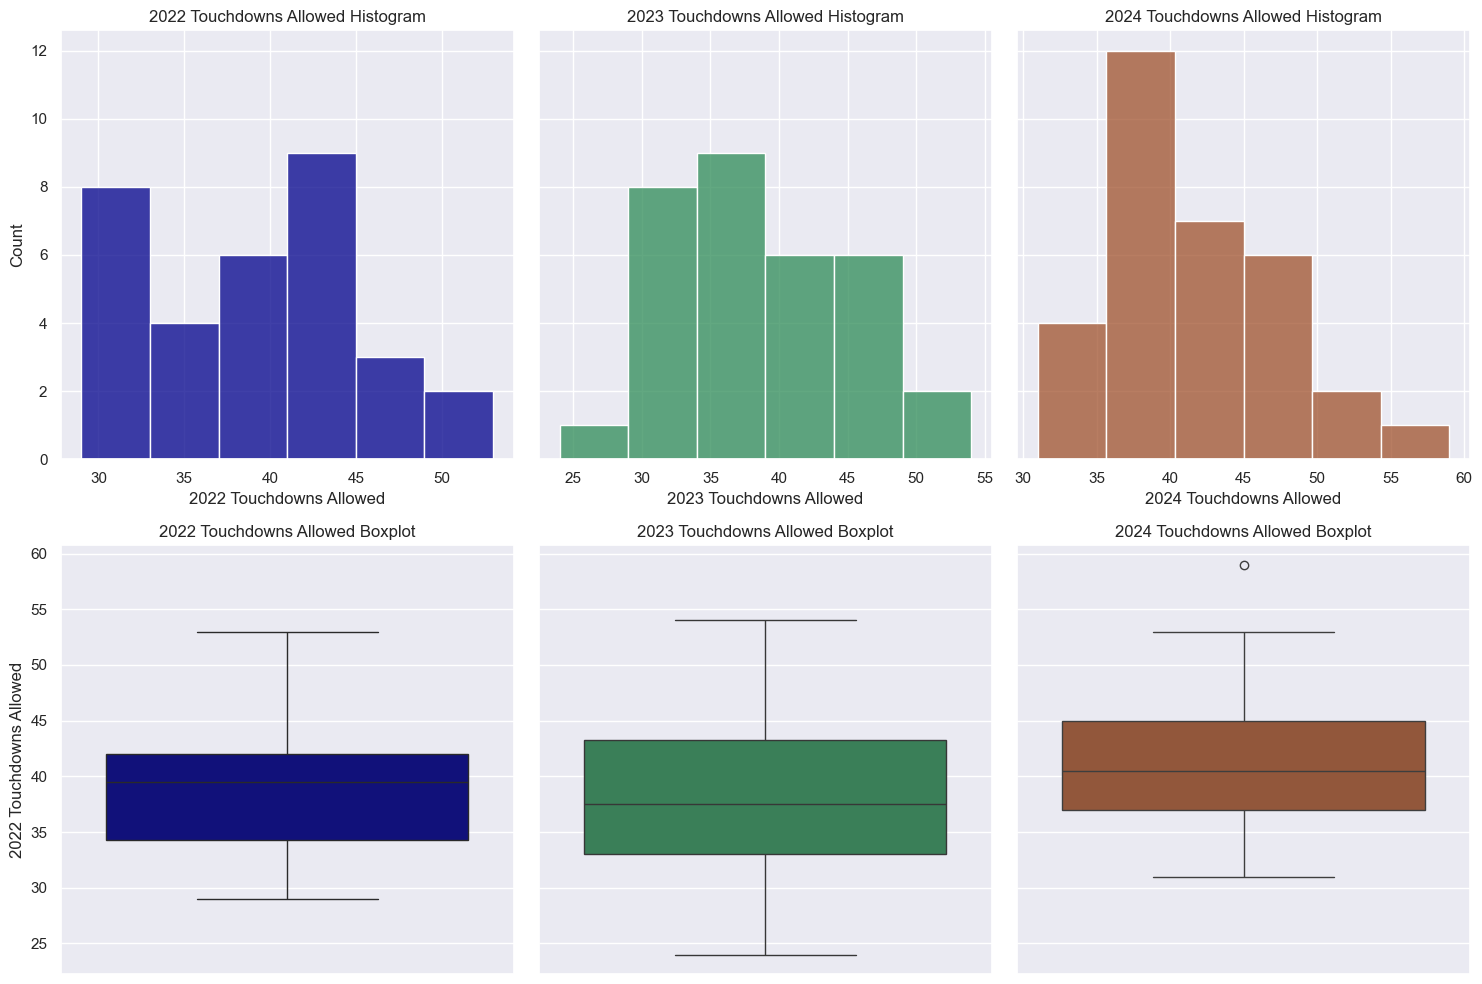

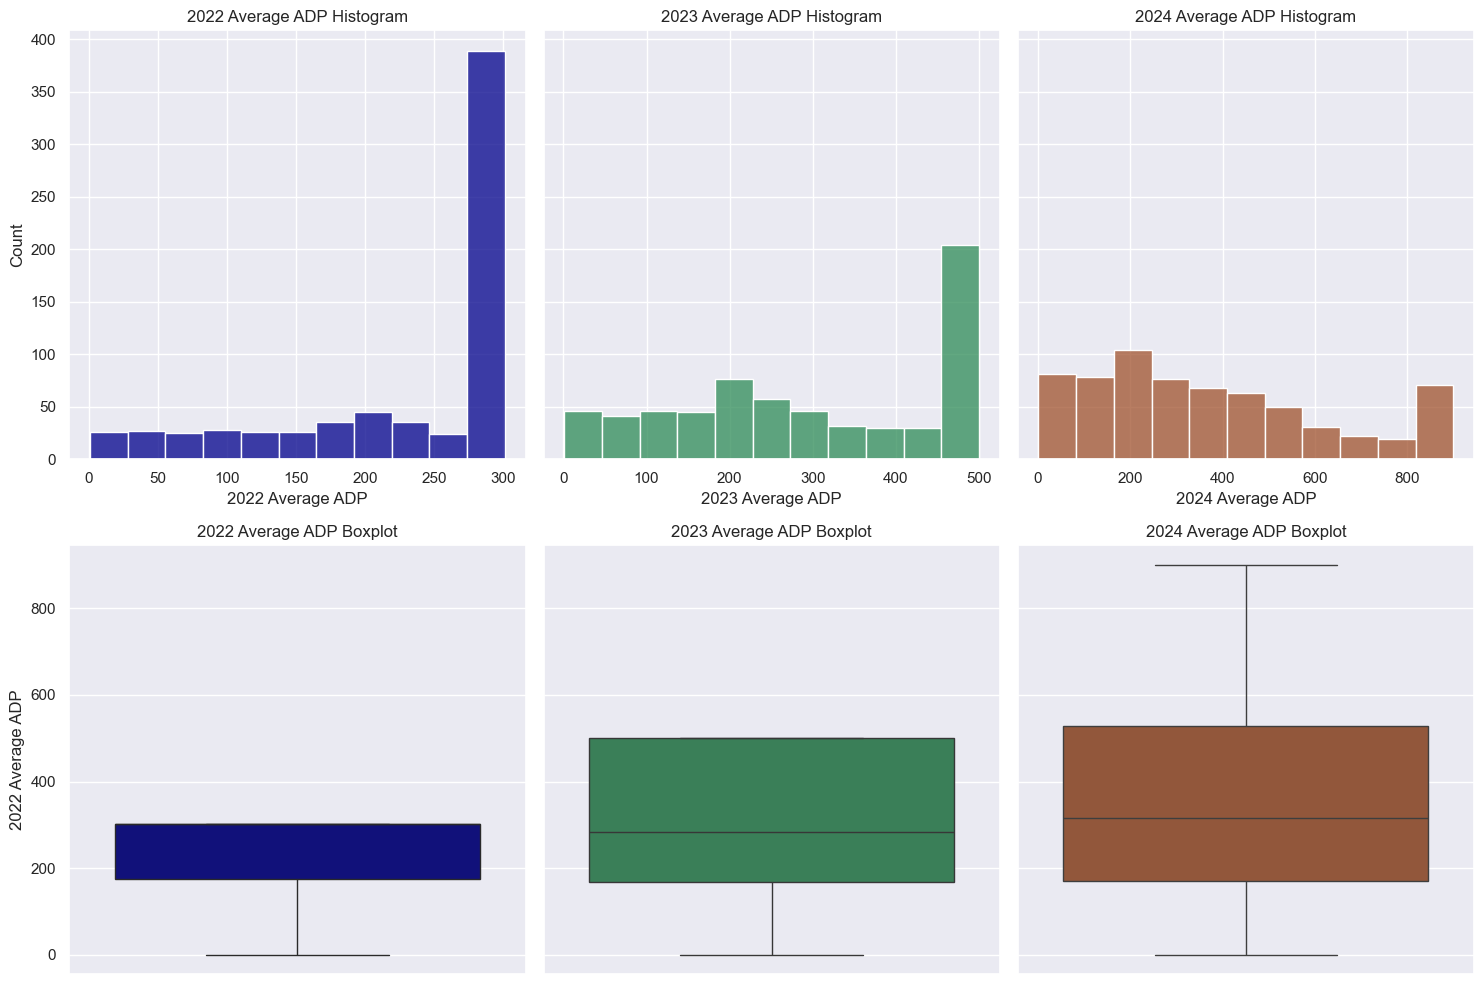

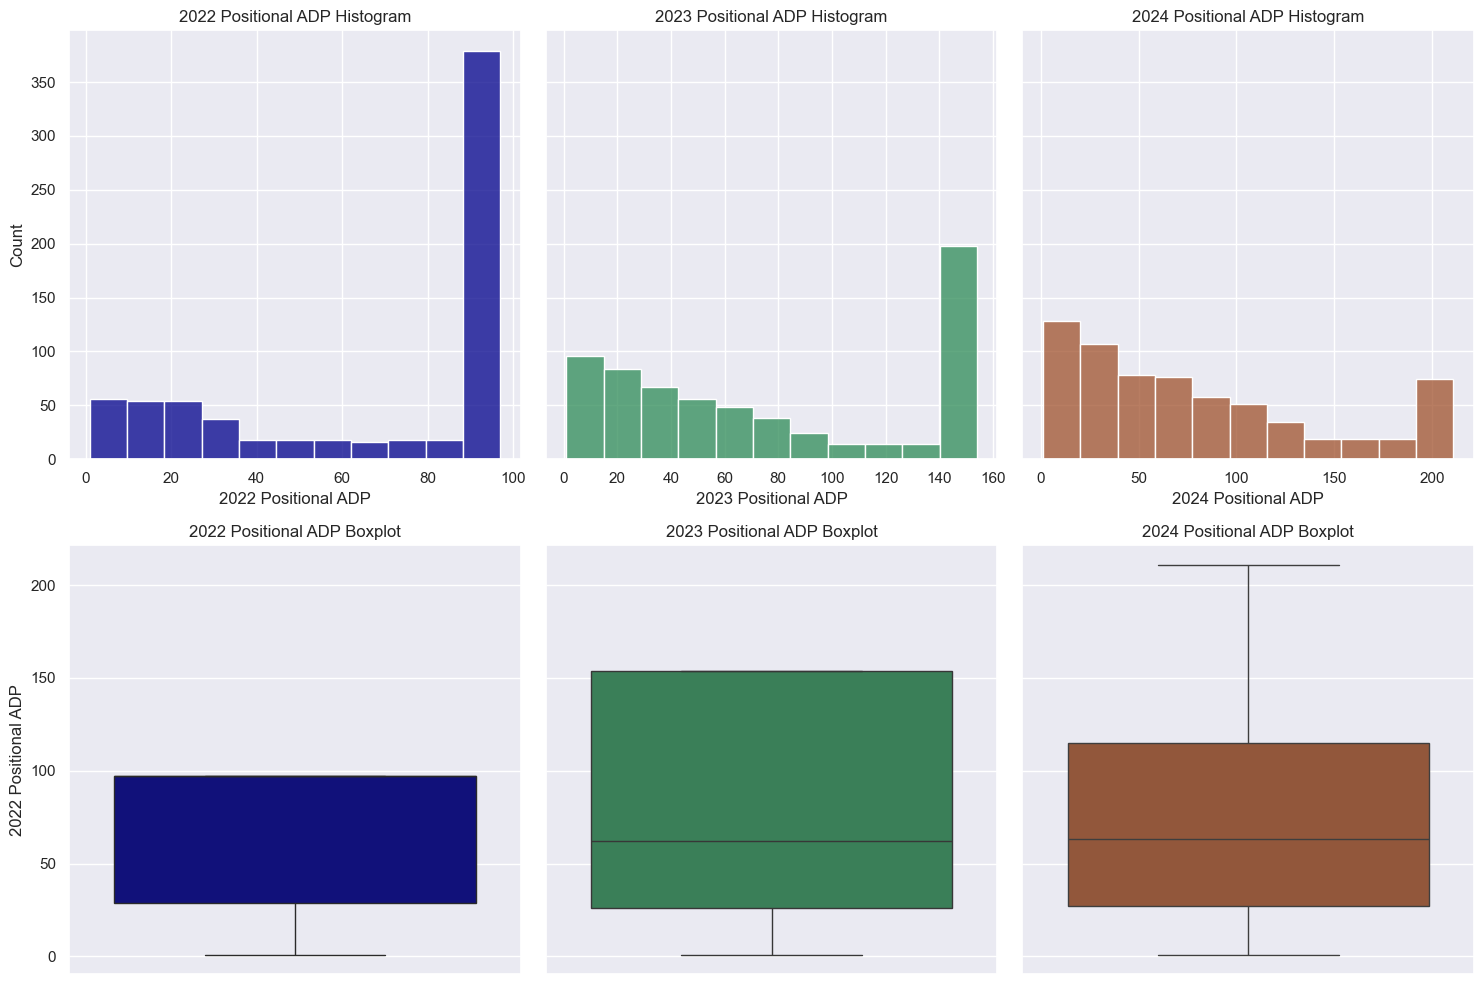

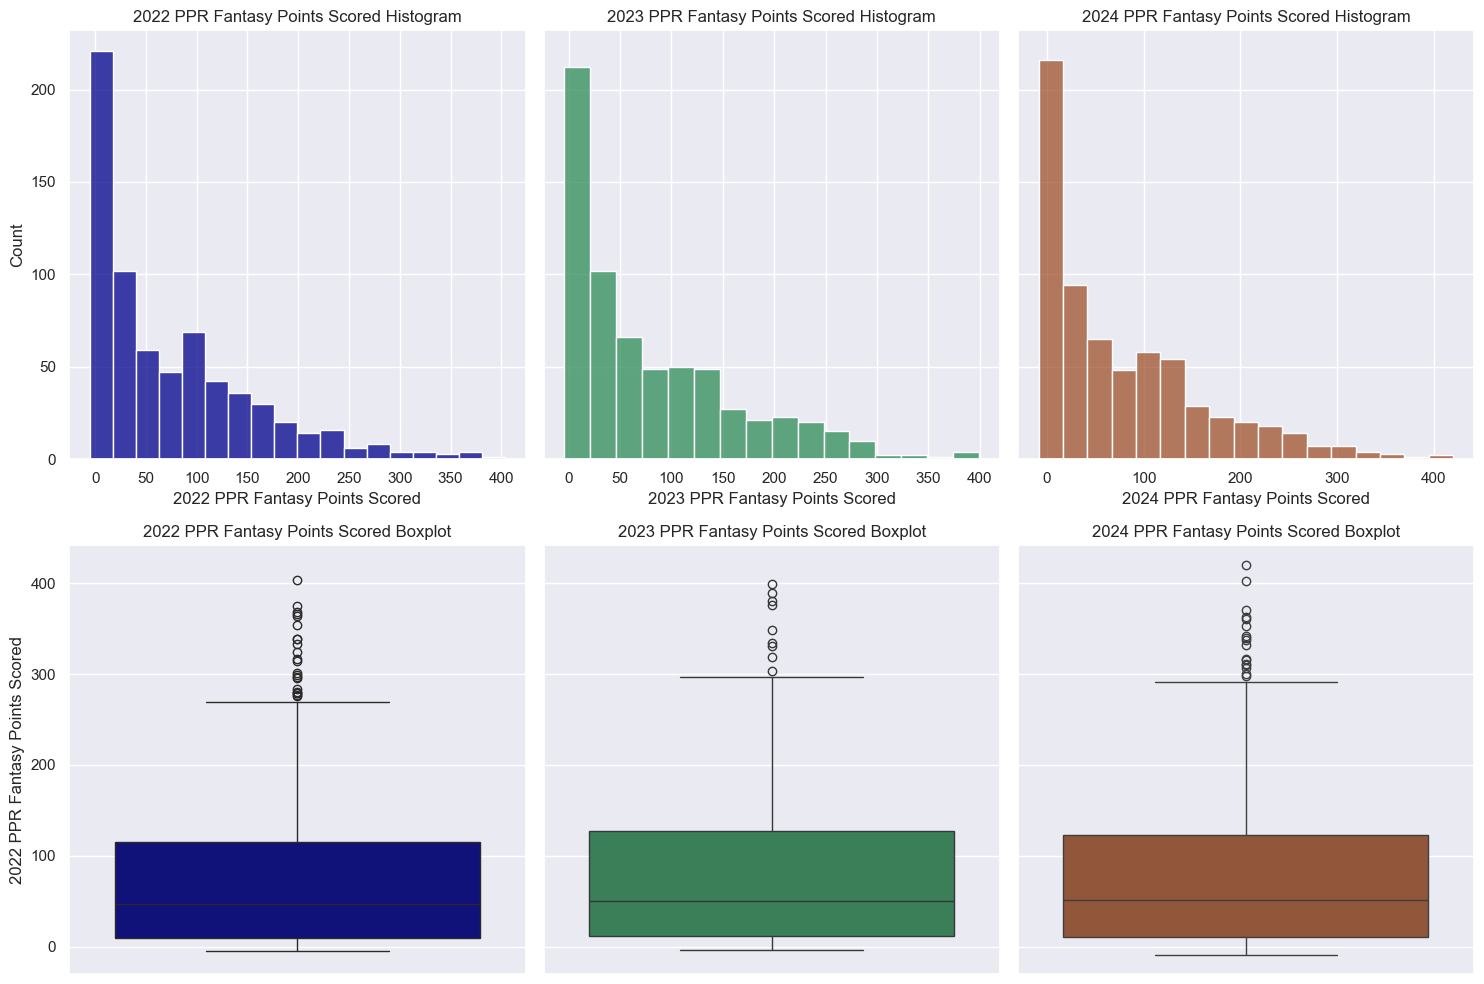

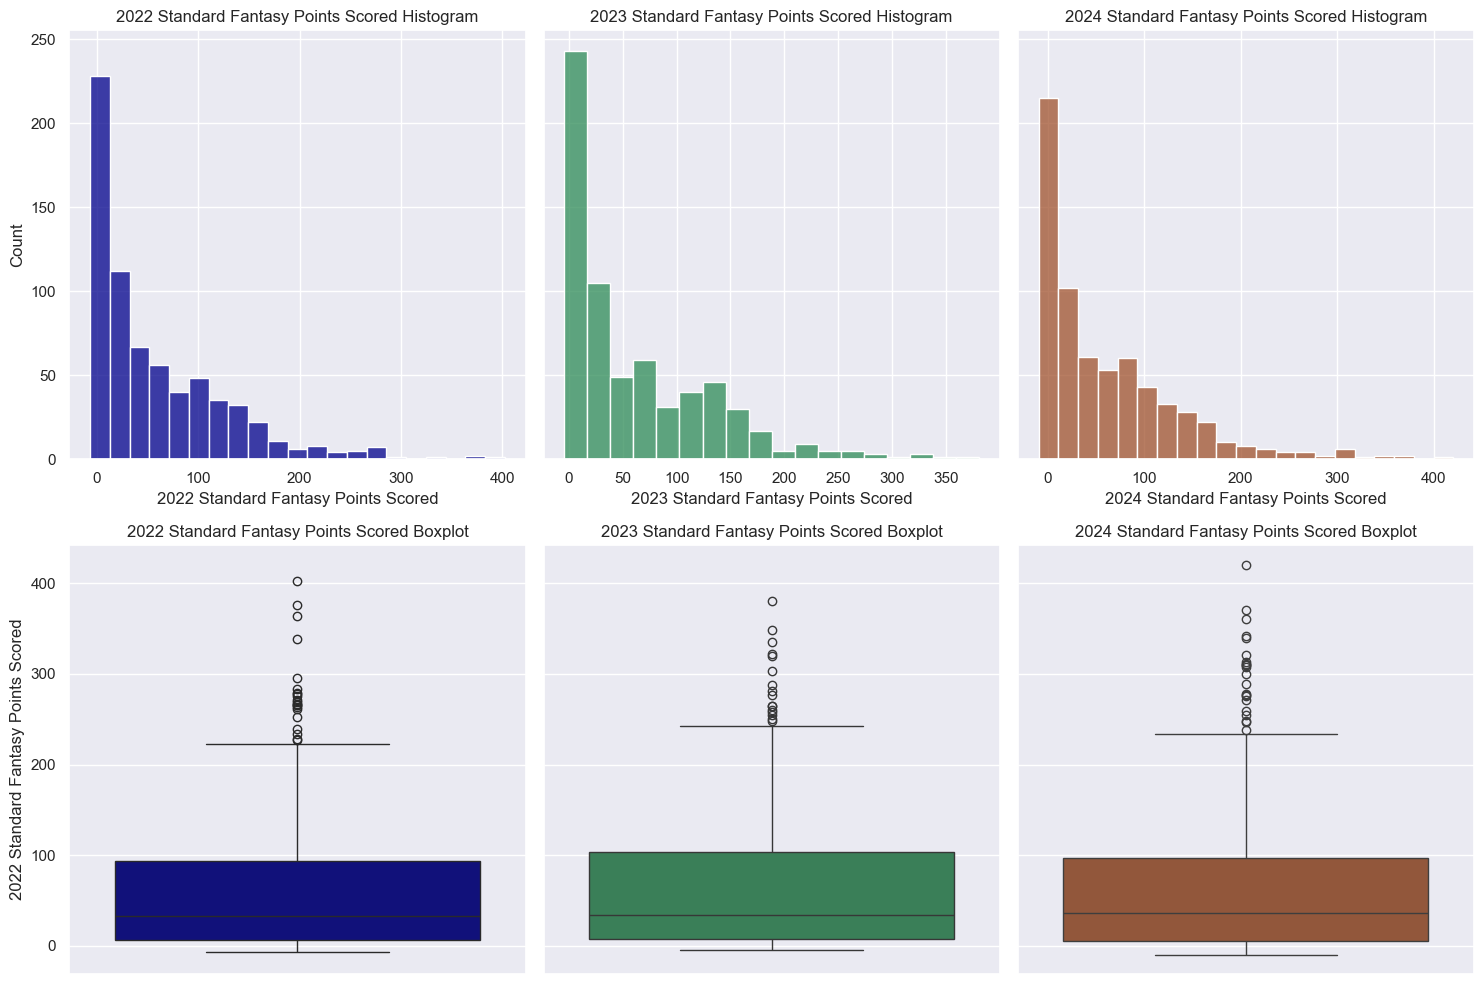

In [98]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Field Goals Made', 'Extra Points Made',
'ST_Interceptions', 'ST_Safeties', 'ST_Special Teams Touchdowns', 'XP2',
'Touchdowns Allowed', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
     fantasy_feature_univar_plots(f)

In [30]:
def fantasy_feature_univar_bypos_plots(feature, pos, save=False):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey="row")

    years = ["2022", "2023", "2024"]
    colors = ["darkblue", "seagreen", "sienna"]
    
    for i, (year, color) in enumerate(zip(years, colors)):
        sns.histplot(
           x=df[df[f"{year} Position"] == pos][f"{year} {feature}"],
           color=color,
           ax=axes[0, i]
        )
        axes[0, i].set_title(f"{year} {feature} for {pos} Histogram")
        
    for i, (year, color) in enumerate(zip(years, colors)):
        sns.boxplot(
            y=df[df[f"{year} Position"] == pos][f"{year} {feature}"],
            color=color,
            ax=axes[1, i])
        axes[1, i].set_title(f"{year} {feature} for {pos} Boxplot")

    
    plt.tight_layout()

    if save:
        if feature == 'Carries*Yards':
            plt.savefig(f'./univar_plots/CarriesYards_{pos}_histogram.png')
        elif feature == 'Receptions*Yards':
            plt.savefig(f'./univar_plots/ReceptionsYards_{pos}_histogram.png')
        else:
            plt.savefig(f'./univar_plots/{feature}_{pos}_histogram.png')
    plt.show()

In [50]:
def fantasy_feature_stats(feature, pos):
    years = ["2022", "2023", "2024"]
    for year in years:
        feature_vec = np.array(df[df[f"{year} Position"] == pos][f"{year} {feature}"].fillna(0))
        print(f"{year} {feature} Max:", np.max(feature_vec))
        print(f"{year} {feature} Min:", np.min(feature_vec))
        print(f"{year} {feature} Mean:", np.mean(feature_vec))
        print(f"{year} {feature} StDev:", np.std(feature_vec))
        print()
        

For the below plots be cognizant of the fact that the features that are inappropriate for the position will be very weird. May be wise to only bother plotting relevant ones.


Quarterbacks: Stats include passing yards, touchdowns, and interceptions.
Running Backs: Stats include rushing yards, touchdowns, and receptions.
Wide Receivers: Stats include receiving yards, touchdowns, and receptions.
Tight Ends: Stats include receiving yards, touchdowns, and receptions.
Kickers: Stats include field goals made and extra points.
Defensive Players and Special Teams: Stats include sacks, interceptions, and touchdowns scored.

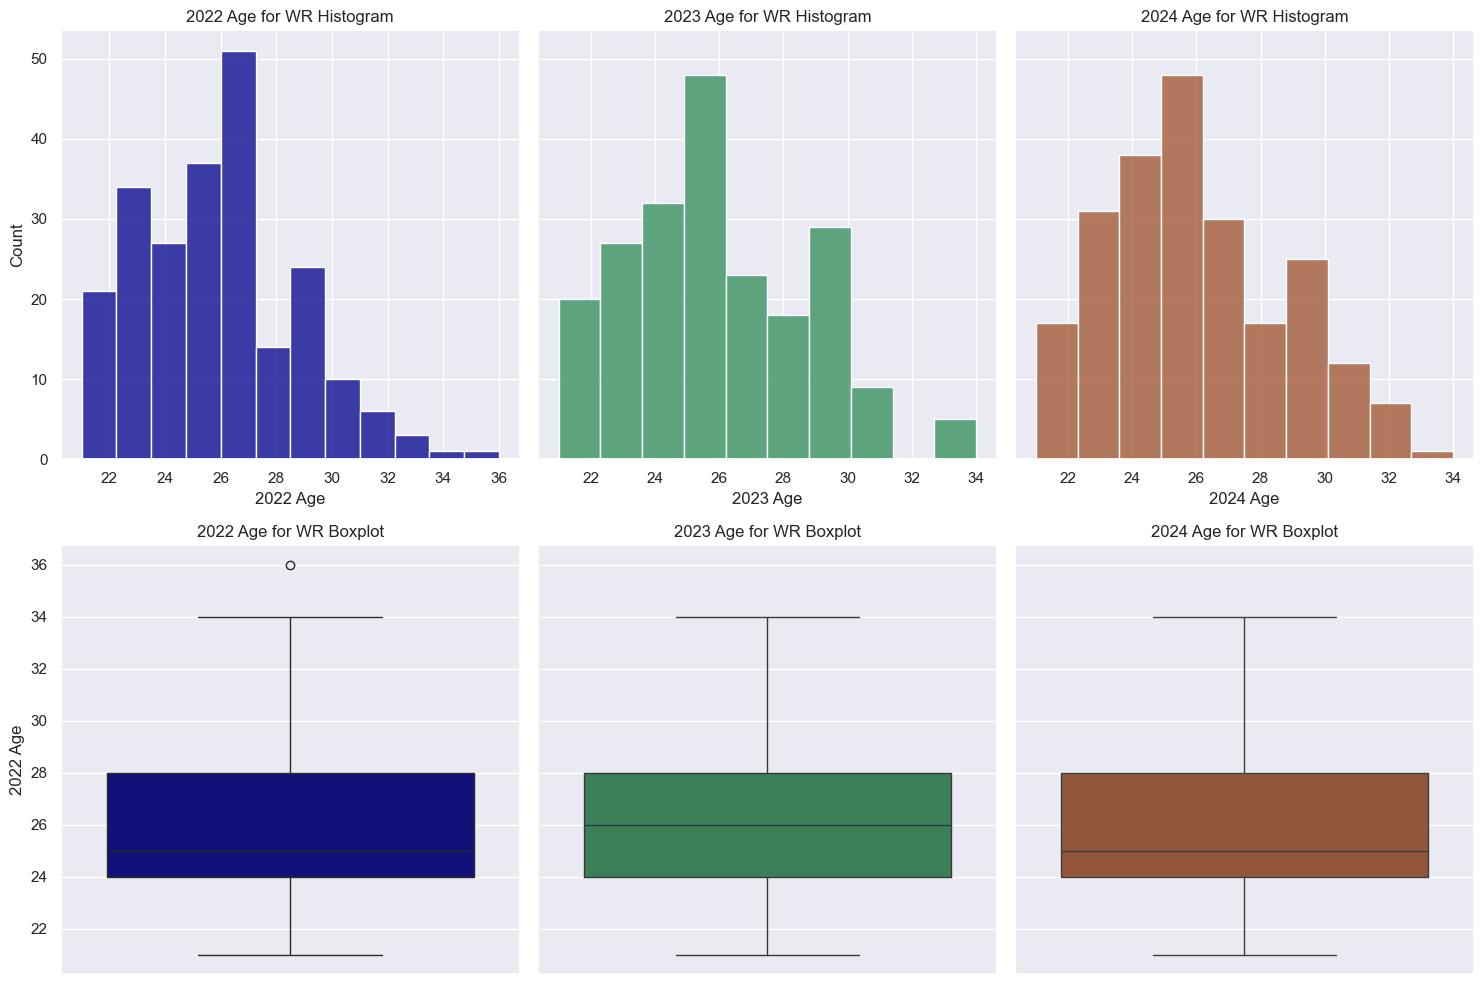

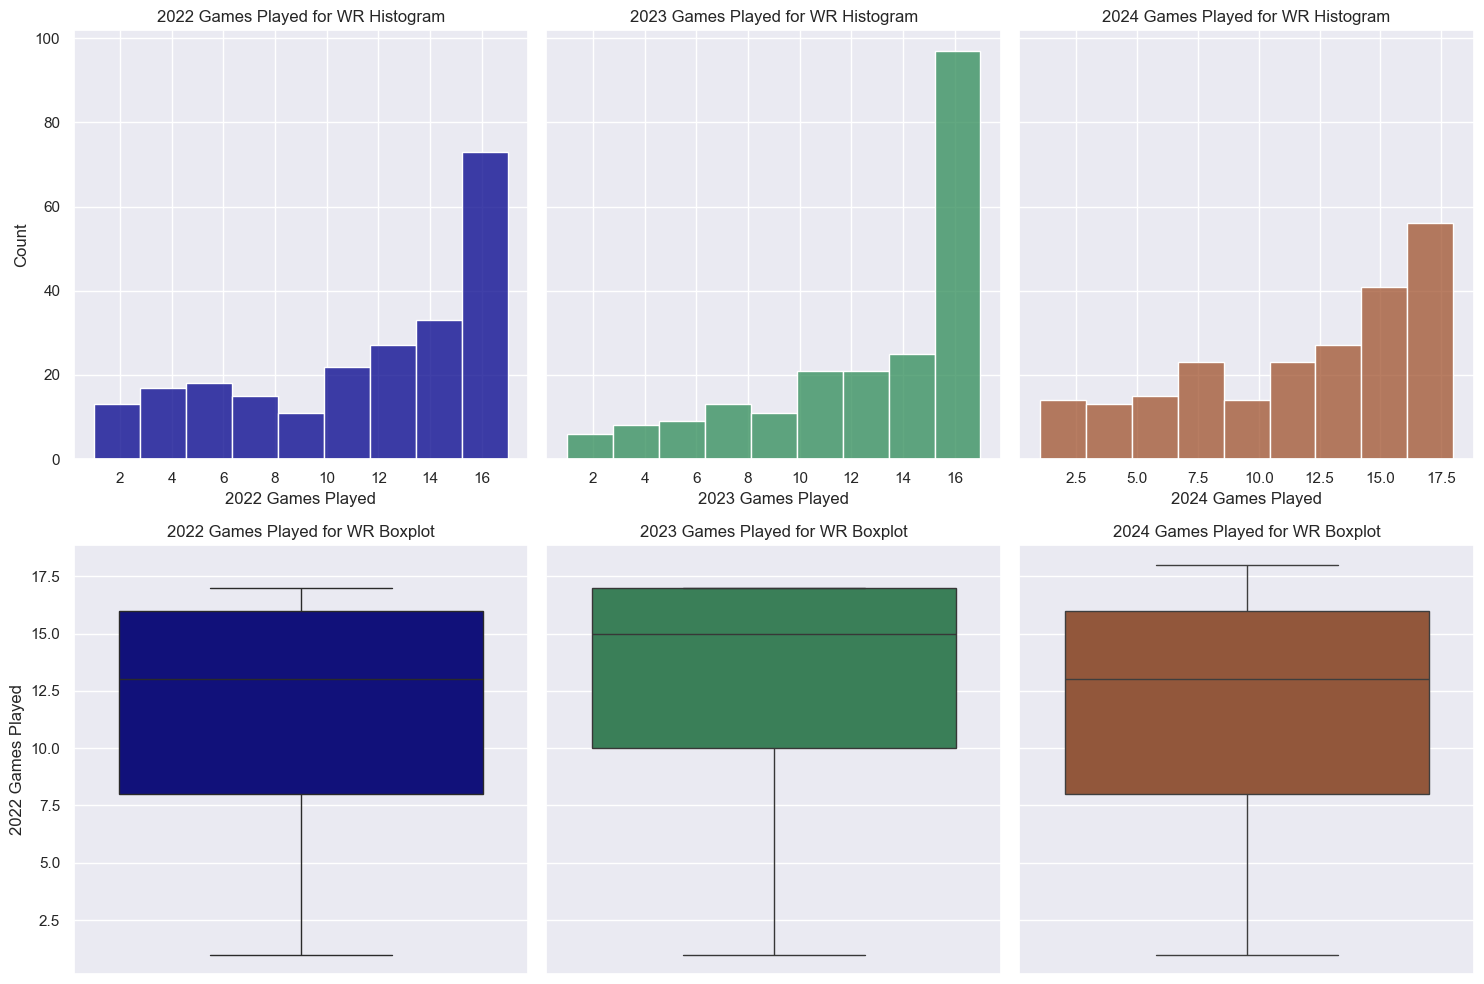

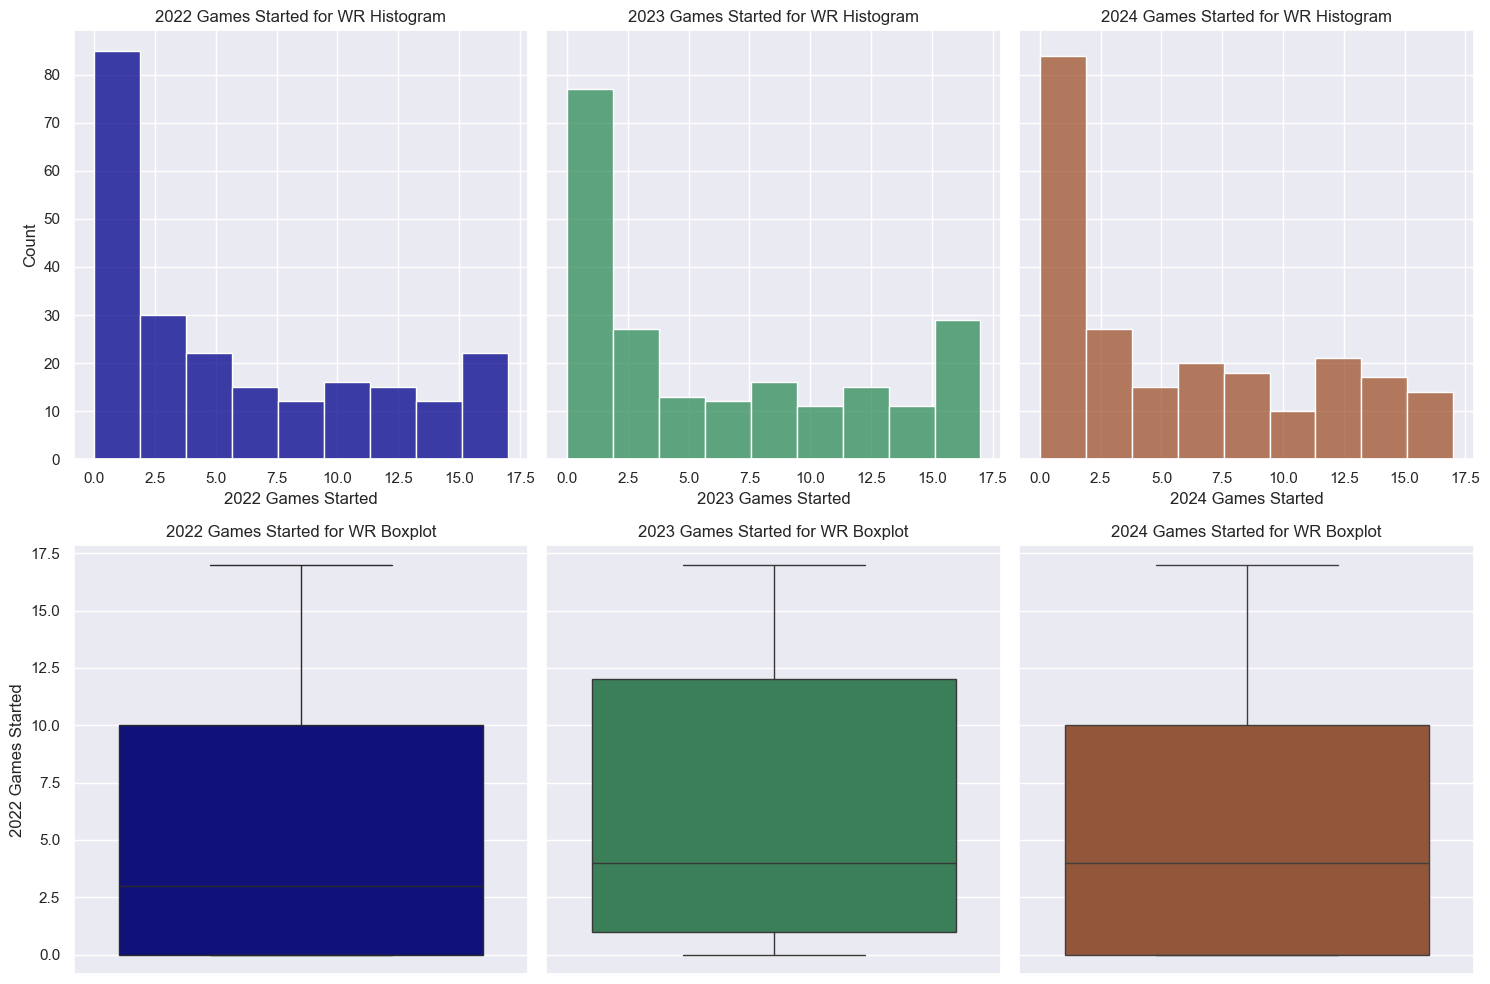

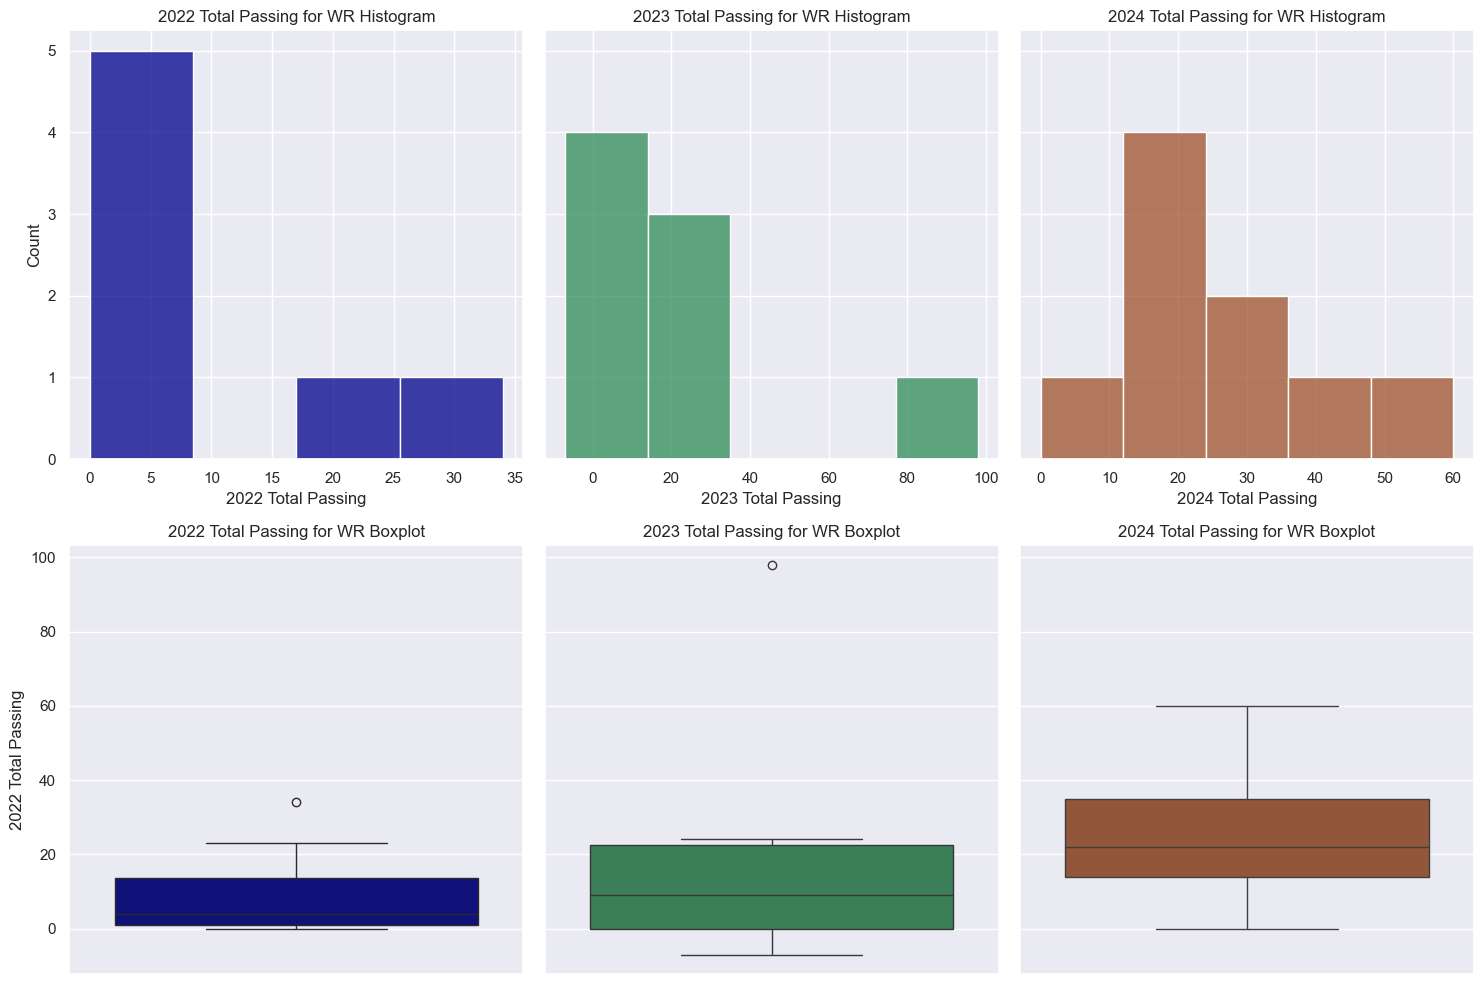

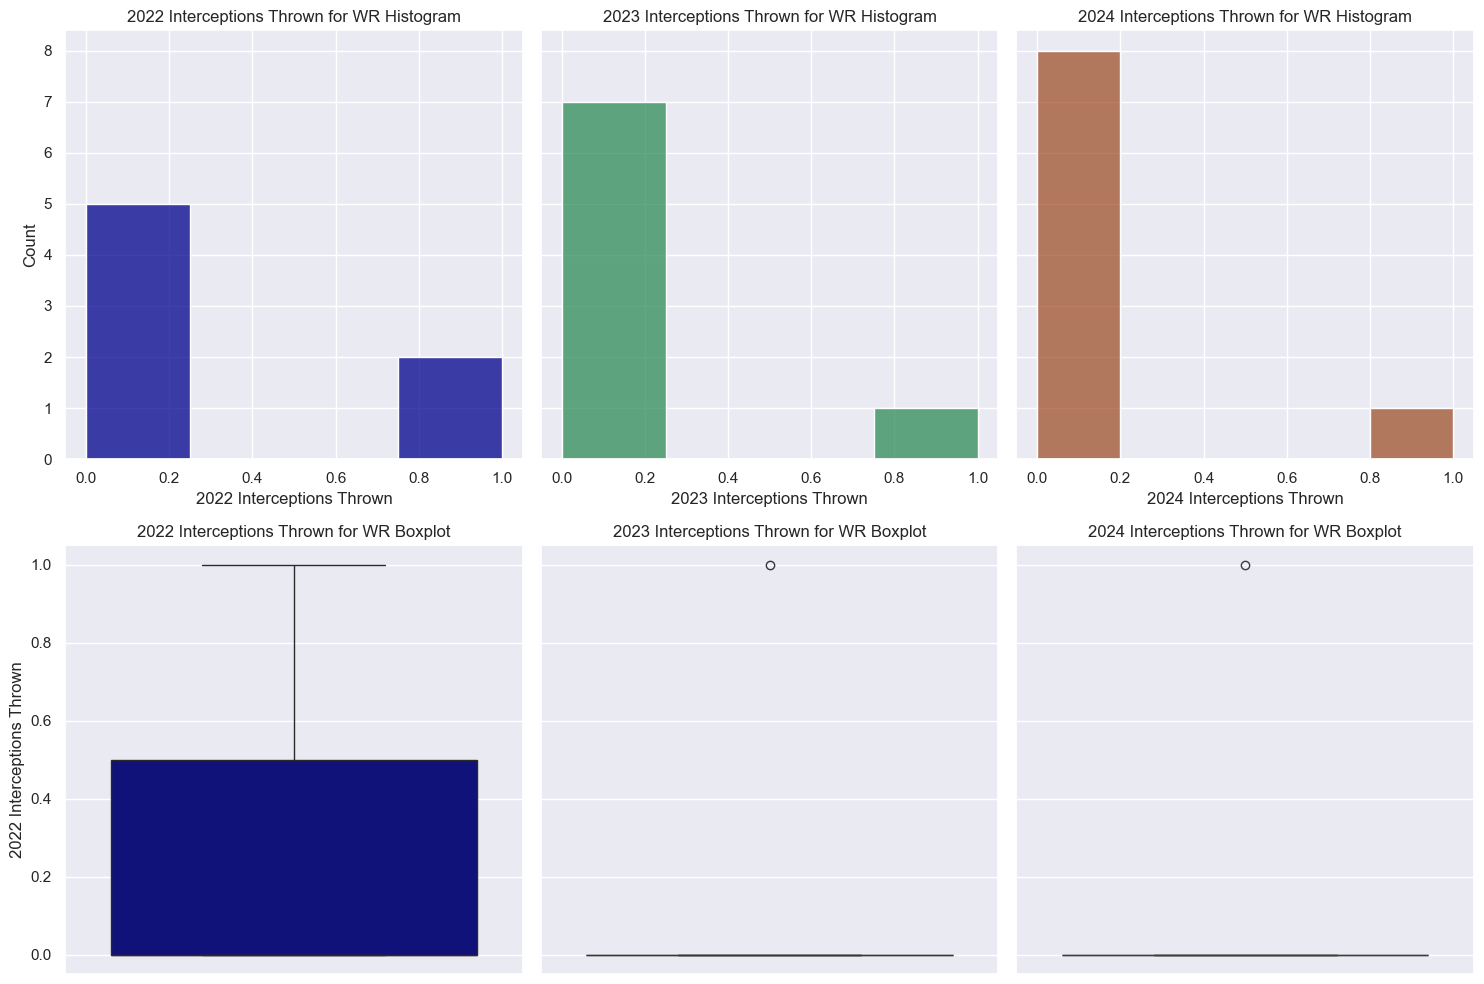

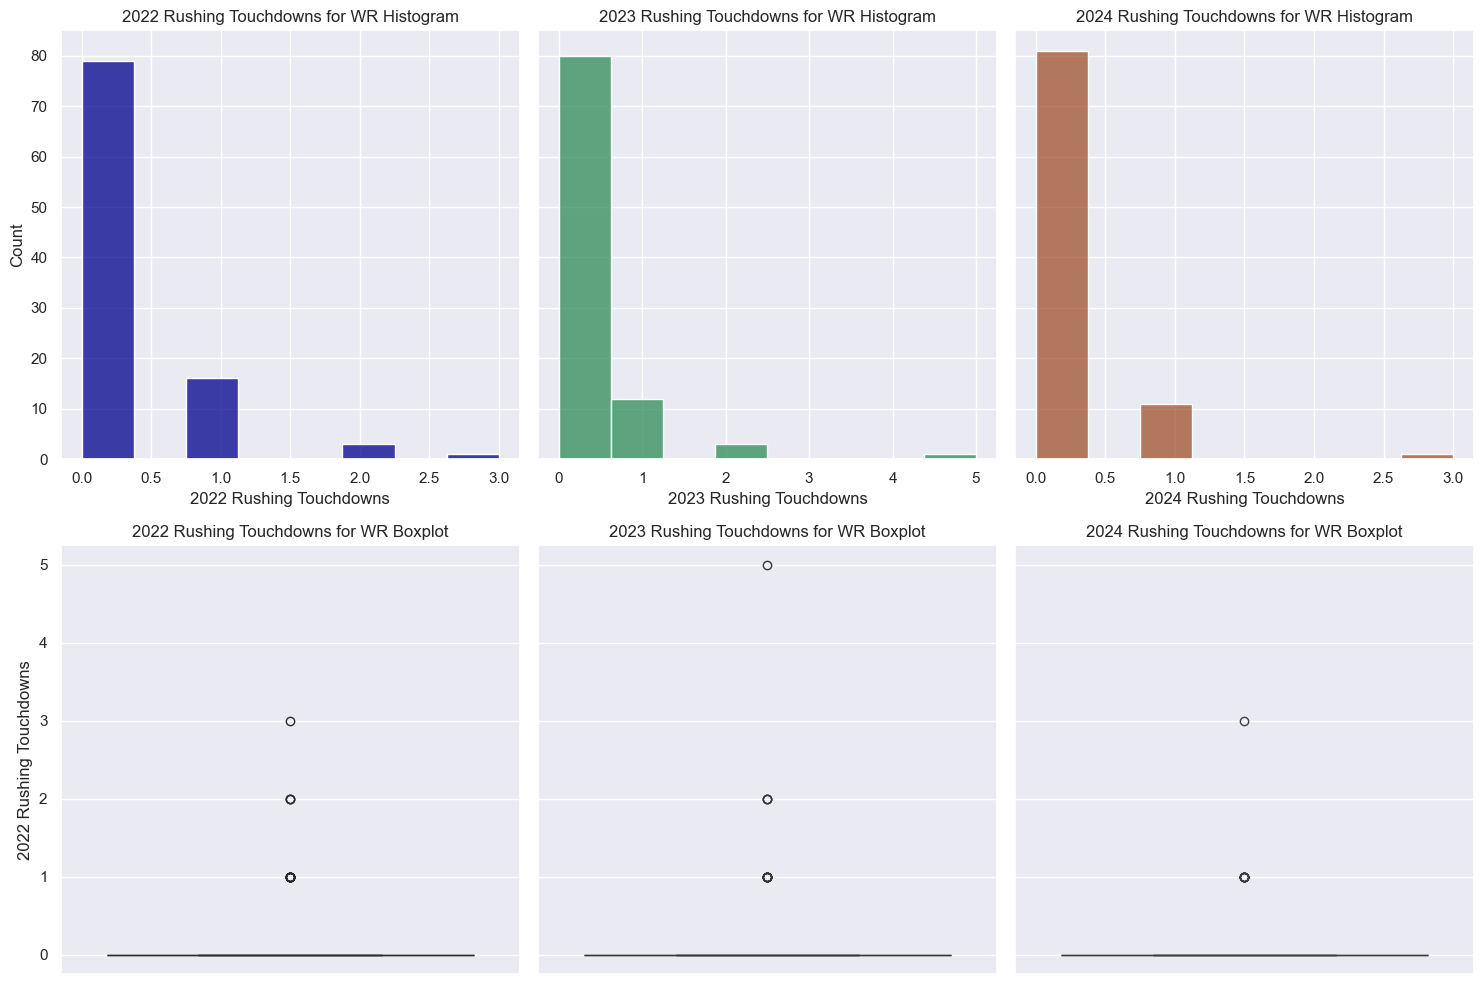

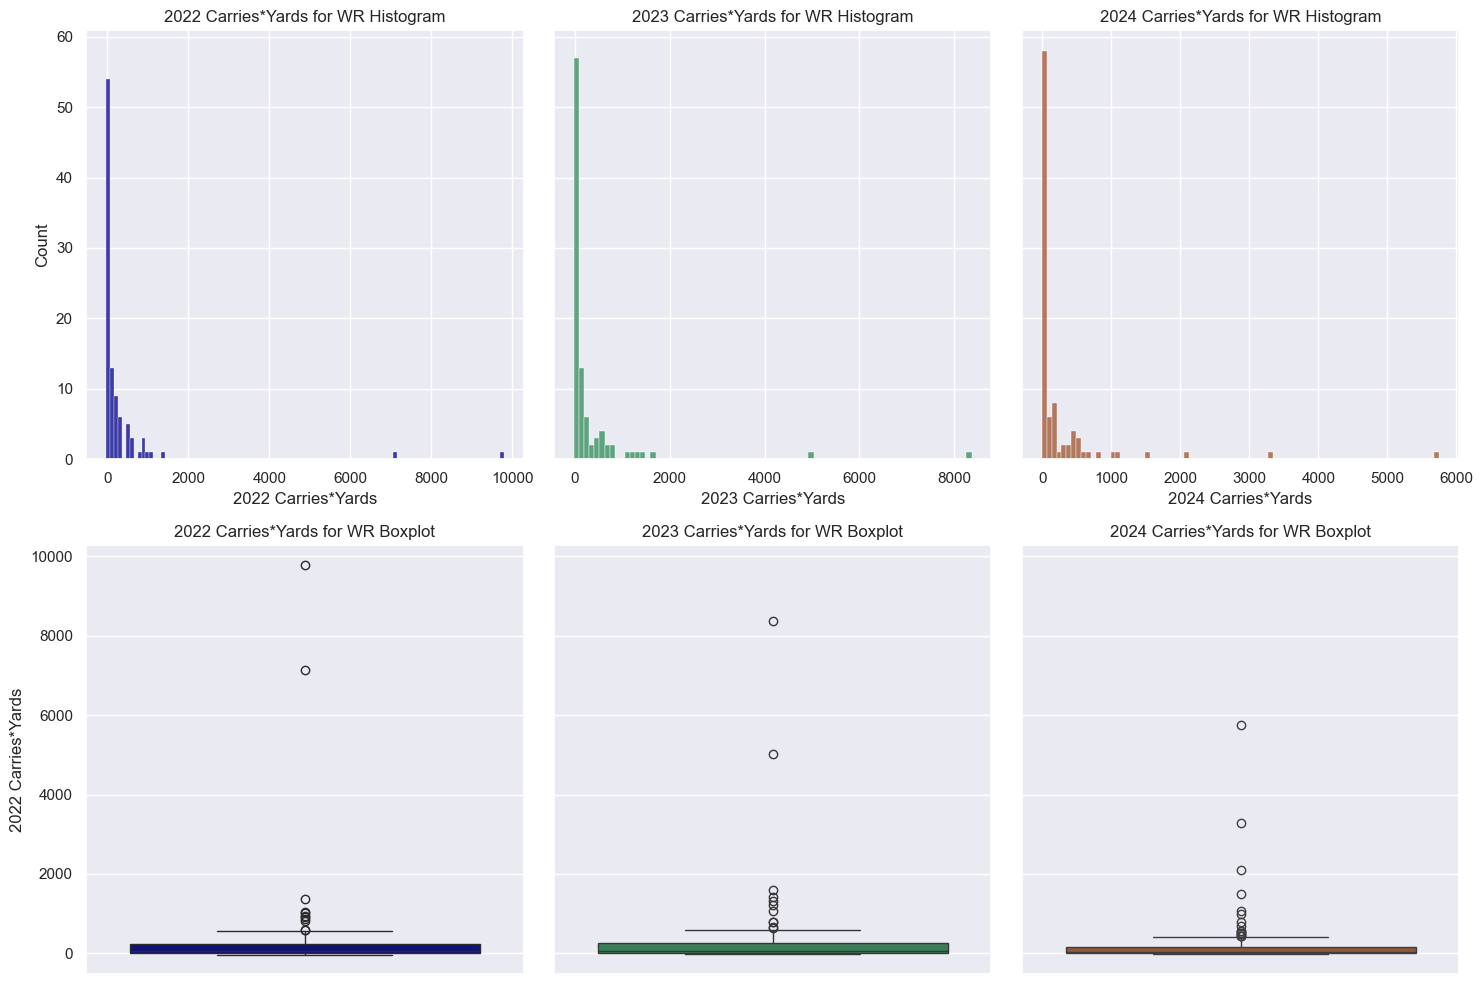

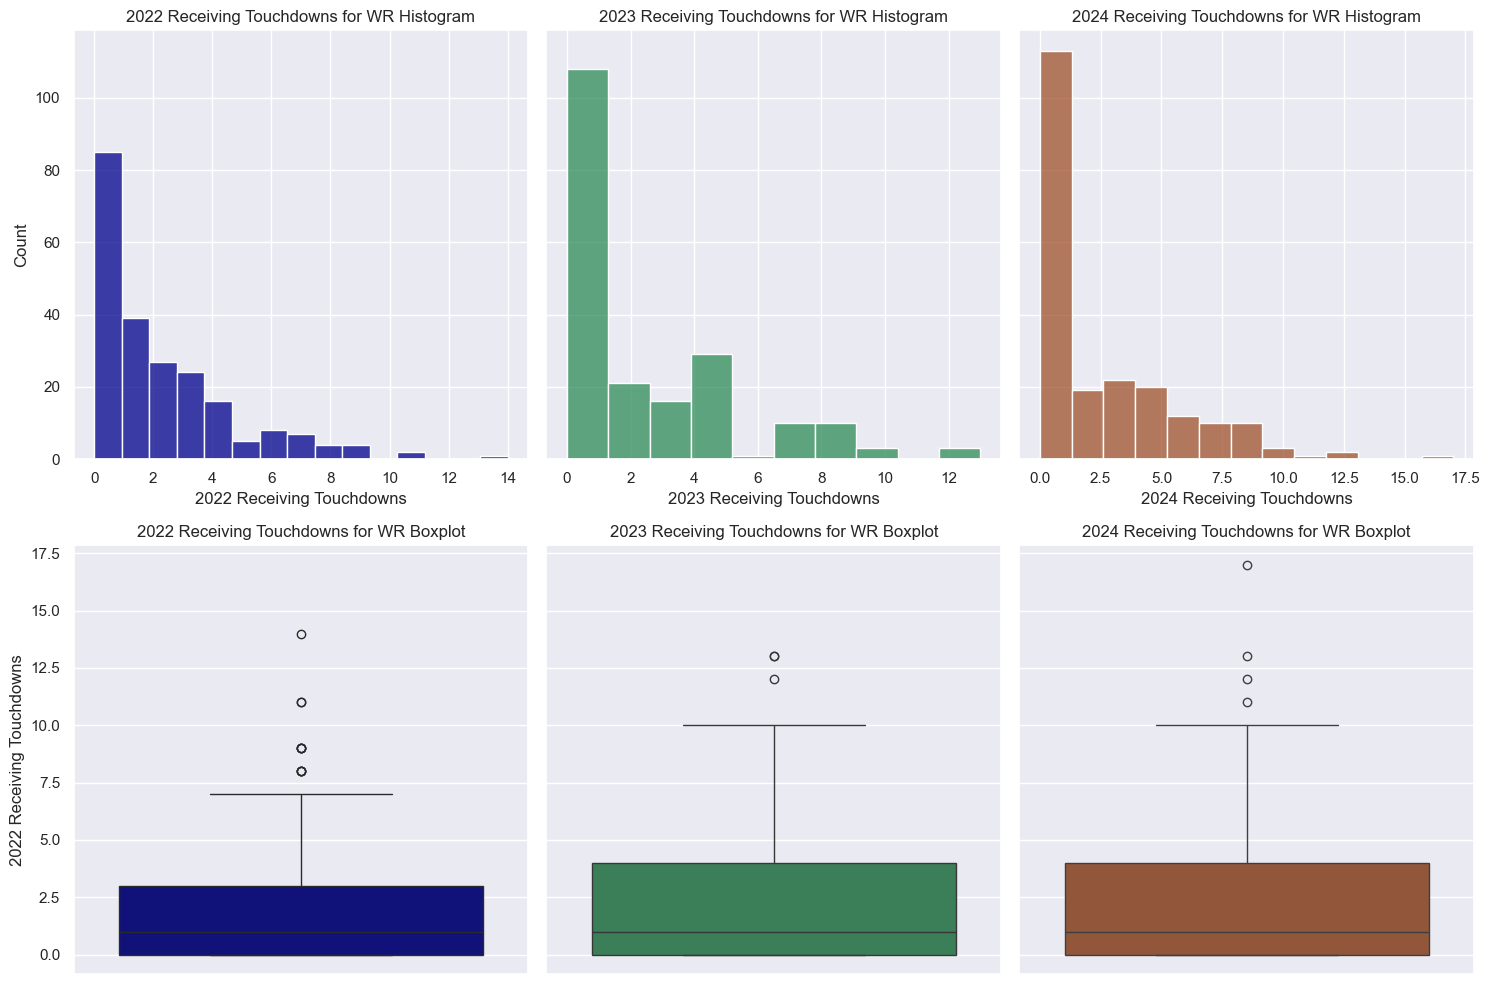

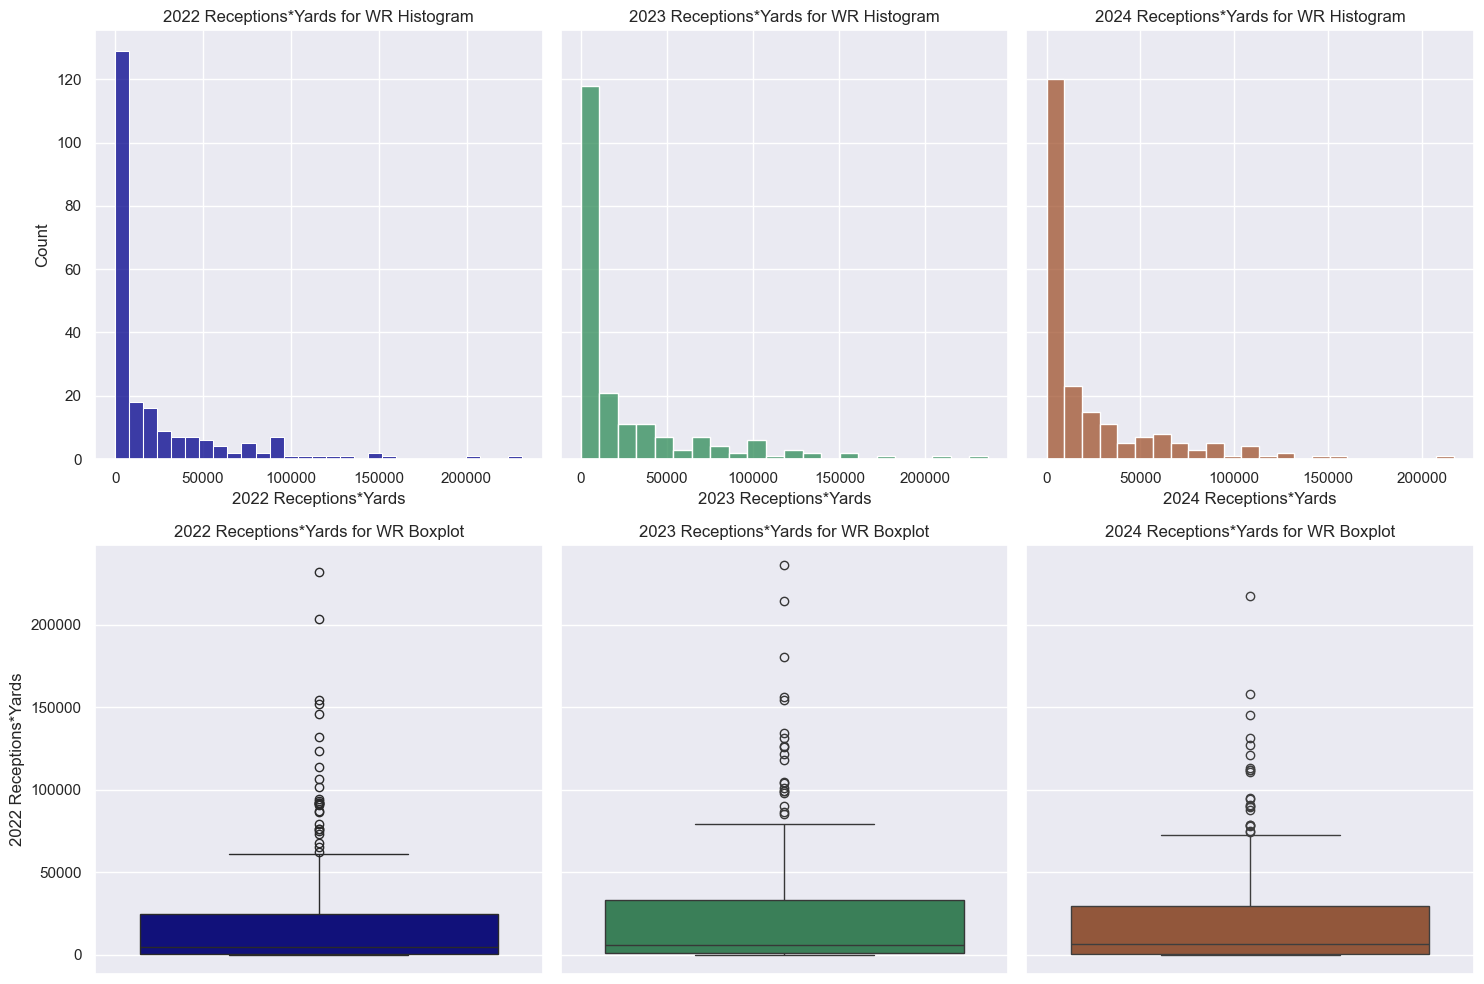

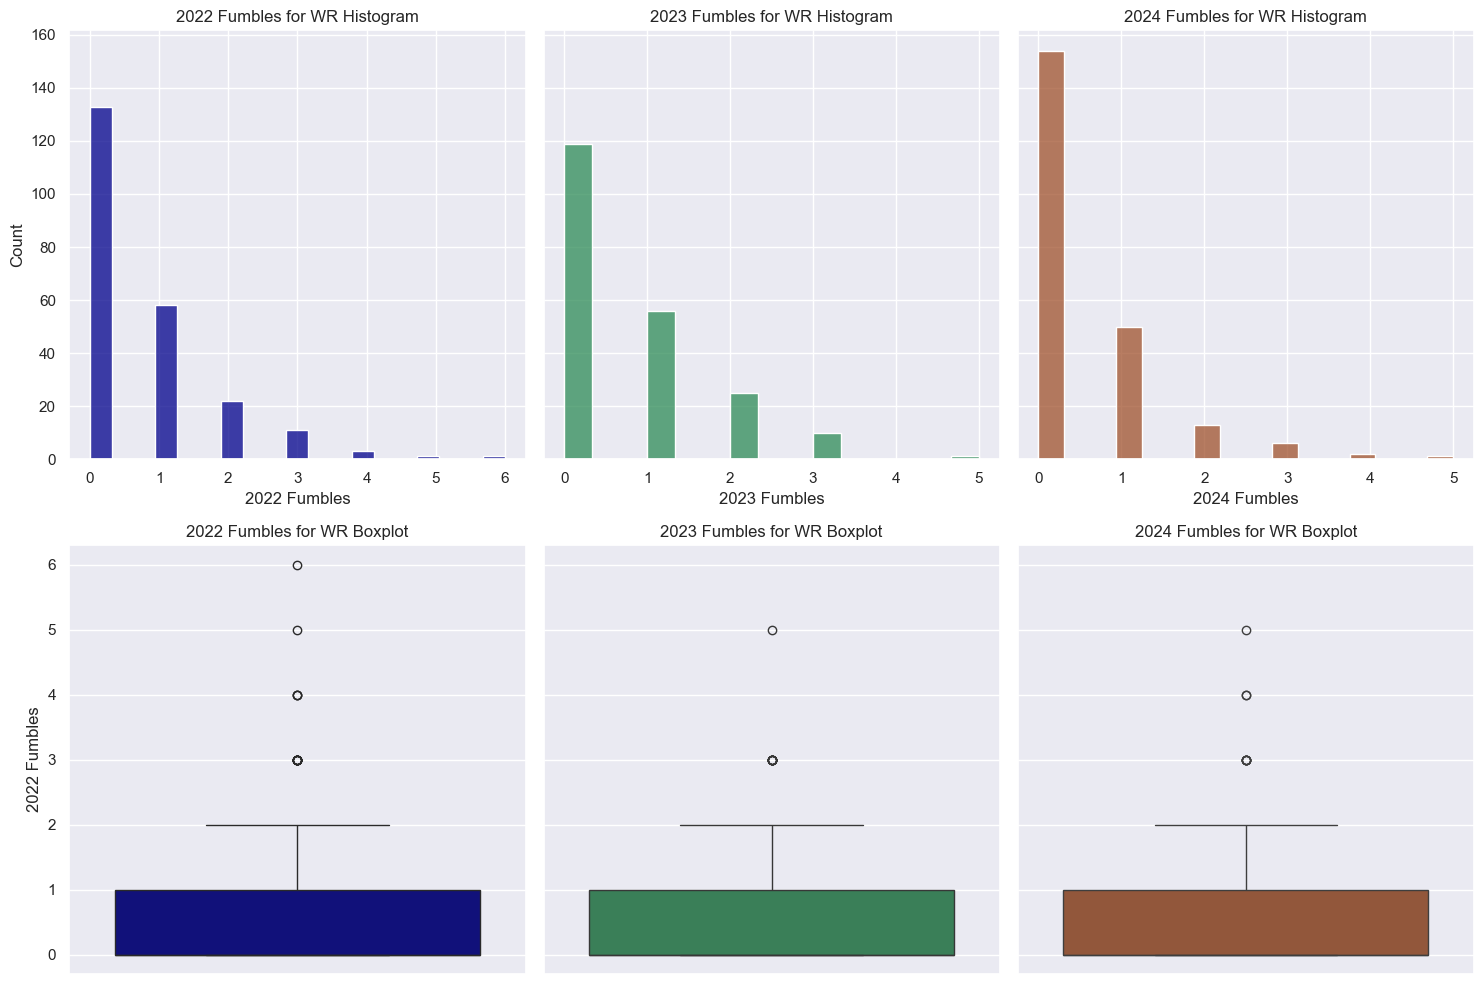

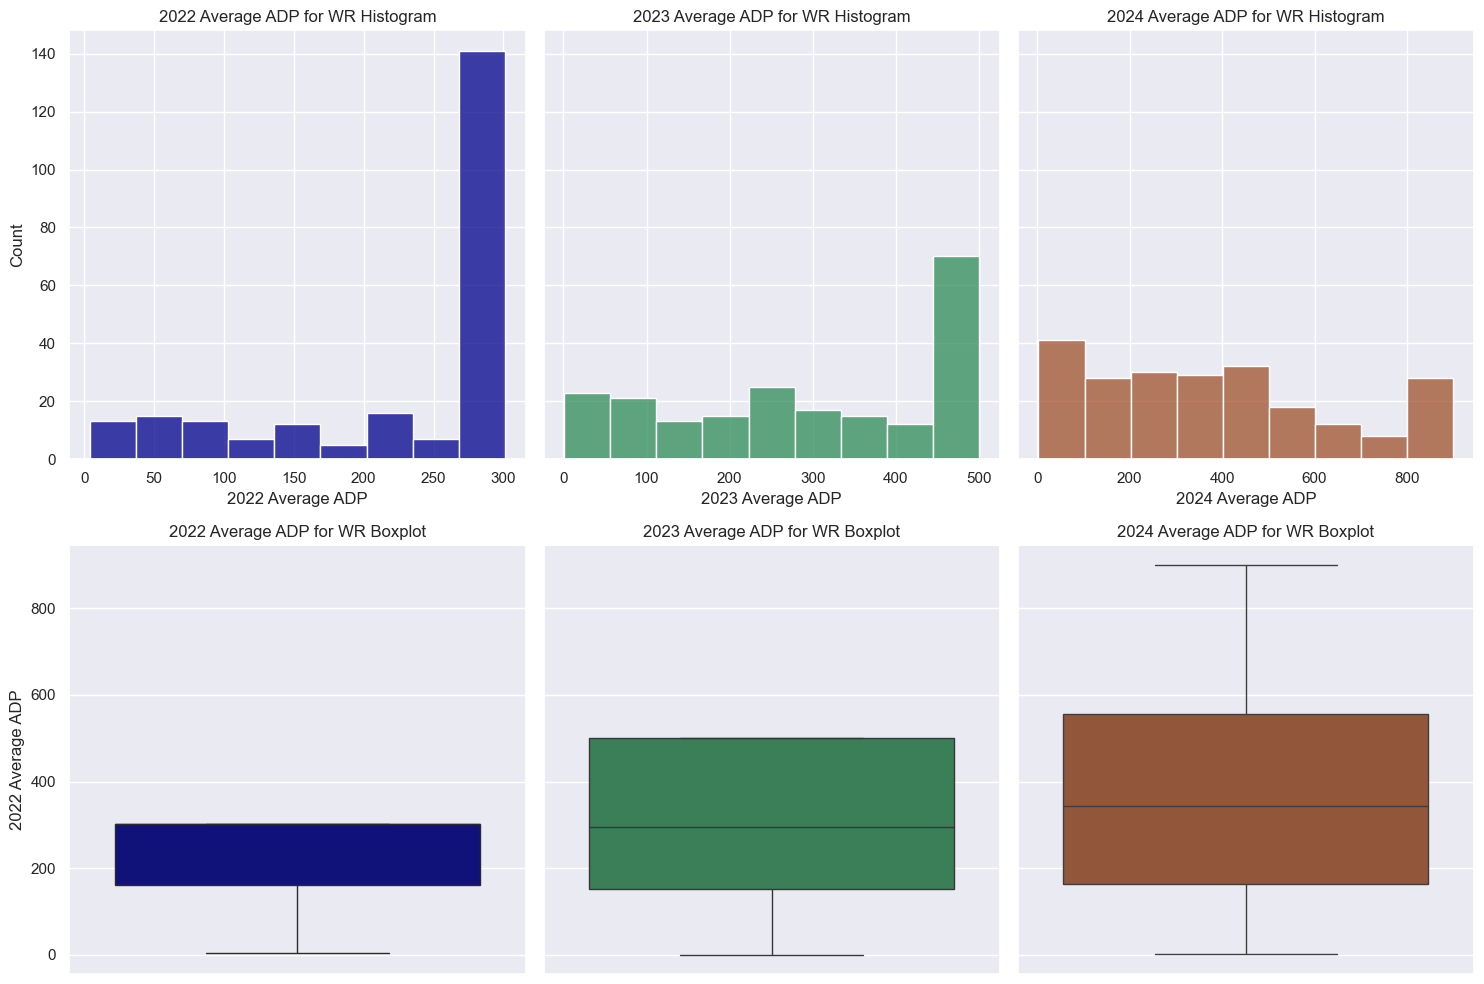

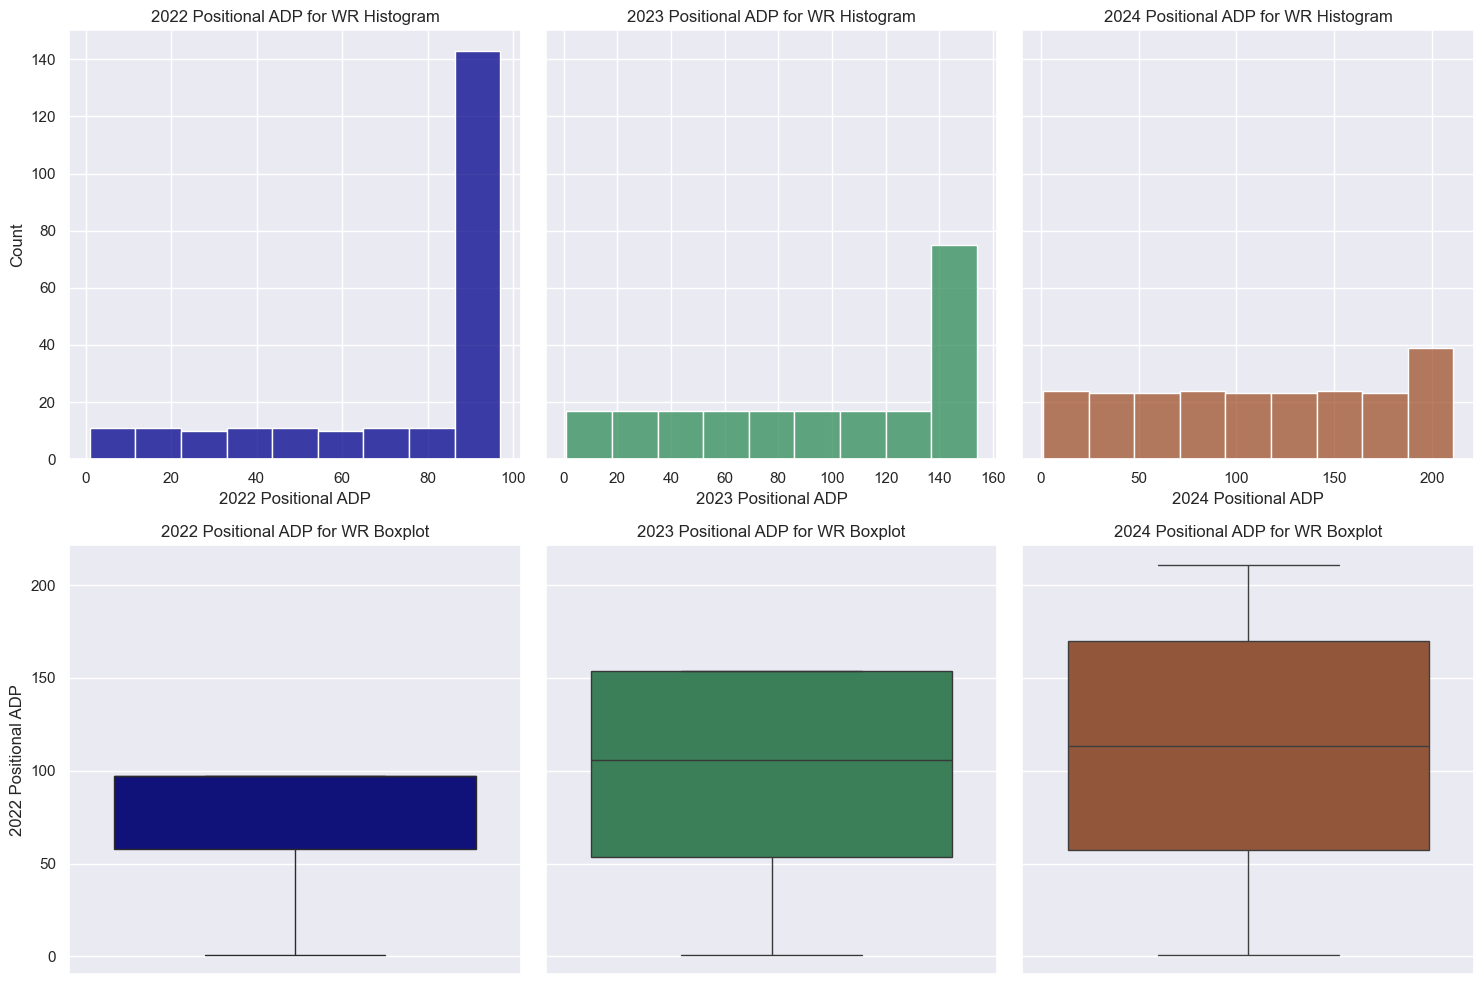

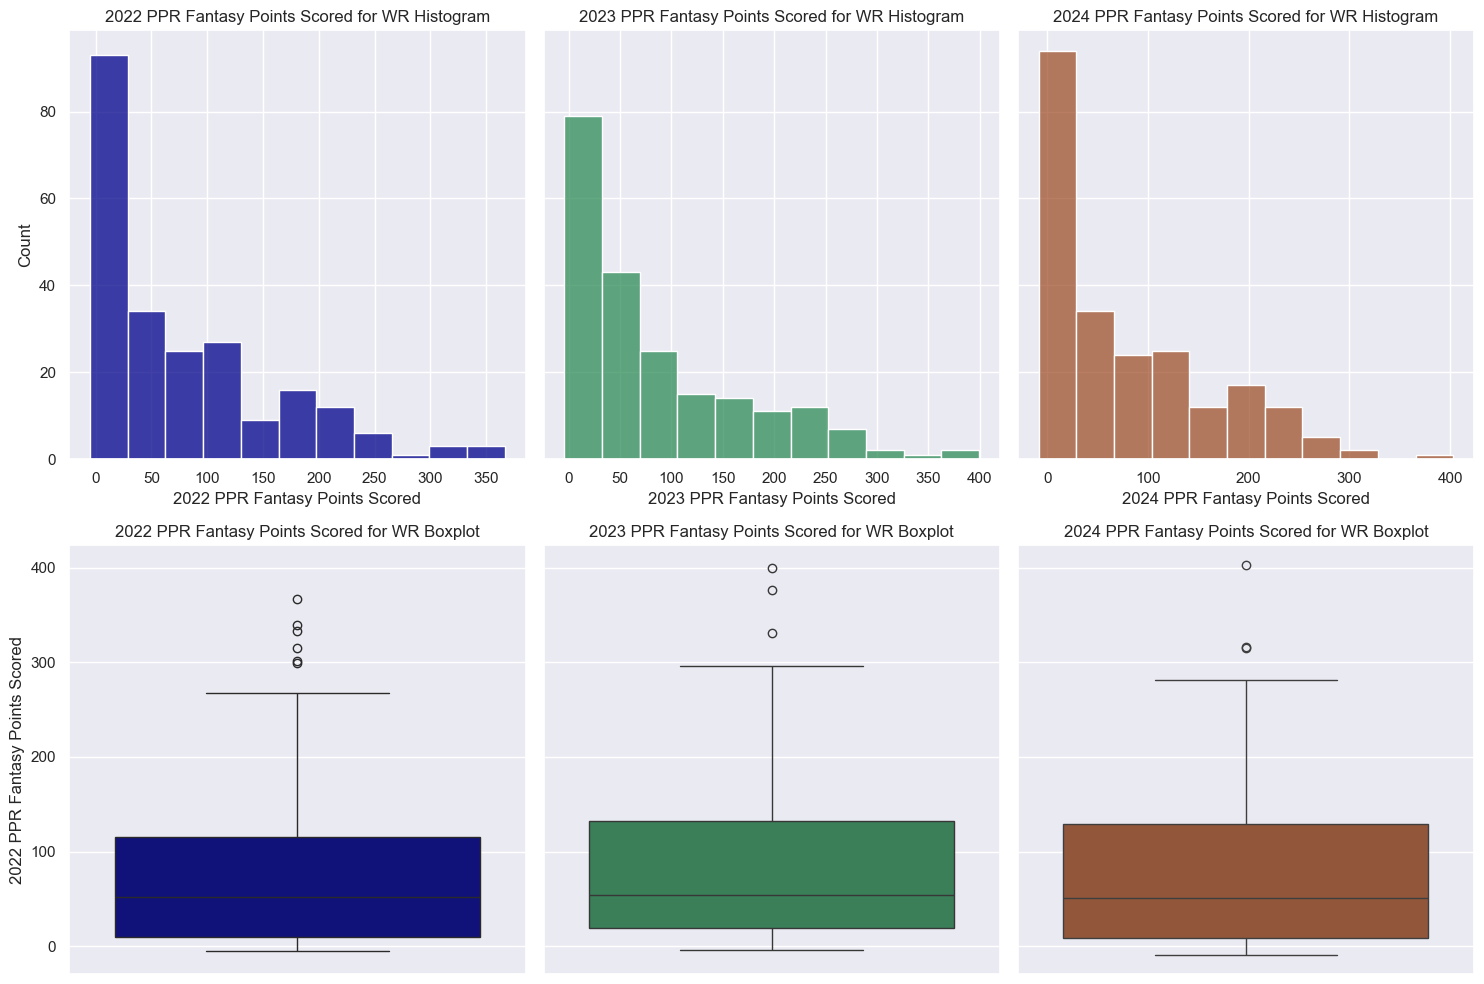

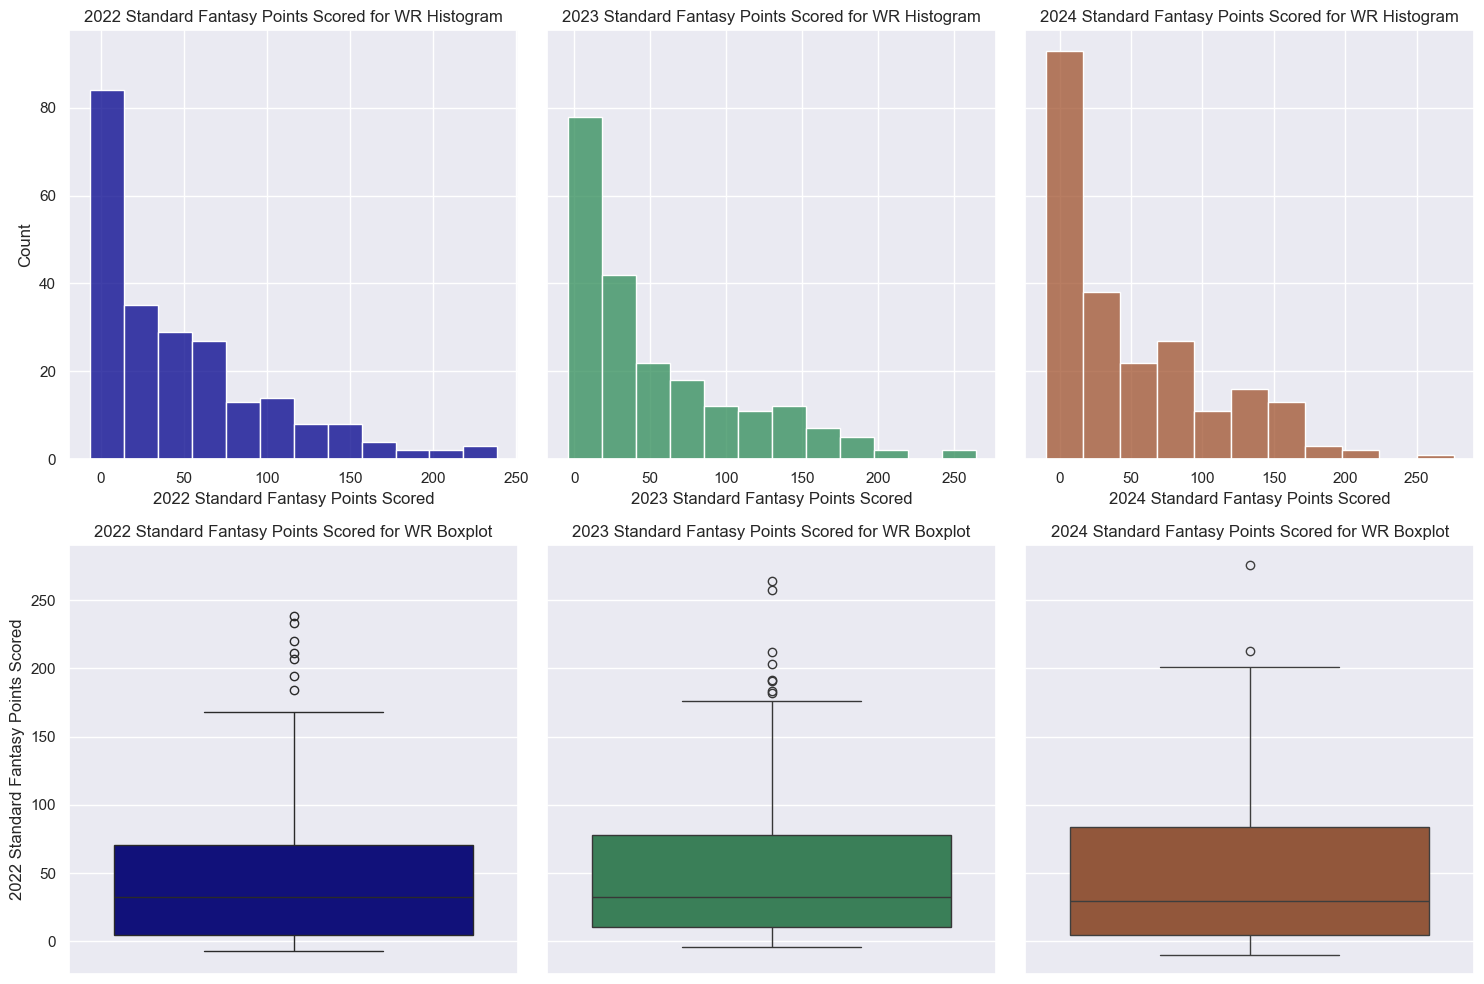

In [31]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

positions = ["WR", "RB", "TE", "QB", "K", "DEF"]


for f in feature_cols:
    fantasy_feature_univar_bypos_plots(f, positions[0], save=True)

In [51]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

positions = ["WR", "RB", "TE", "QB", "K", "DEF"]

for f in feature_cols:
    fantasy_feature_stats(f, positions[0])

2022 Age Max: 36.0
2022 Age Min: 21.0
2022 Age Mean: 25.79475982532751
2022 Age StDev: 2.7890566809210533

2023 Age Max: 34.0
2023 Age Min: 21.0
2023 Age Mean: 25.96208530805687
2023 Age StDev: 2.85319865605632

2024 Age Max: 34.0
2024 Age Min: 21.0
2024 Age Mean: 25.95575221238938
2024 Age StDev: 2.80924321535642

2022 Games Played Max: 17.0
2022 Games Played Min: 1.0
2022 Games Played Mean: 11.59825327510917
2022 Games Played StDev: 4.972869318950845

2023 Games Played Max: 17.0
2023 Games Played Min: 1.0
2023 Games Played Mean: 13.004739336492891
2023 Games Played StDev: 4.434352787915543

2024 Games Played Max: 18.0
2024 Games Played Min: 1.0
2024 Games Played Mean: 11.809734513274336
2024 Games Played StDev: 4.984408692915577

2022 Games Started Max: 17.0
2022 Games Started Min: 0.0
2022 Games Started Mean: 5.6593886462882095
2022 Games Started StDev: 5.777320632211961

2023 Games Started Max: 17.0
2023 Games Started Min: 0.0
2023 Games Started Mean: 6.218009478672986
2023 Games S

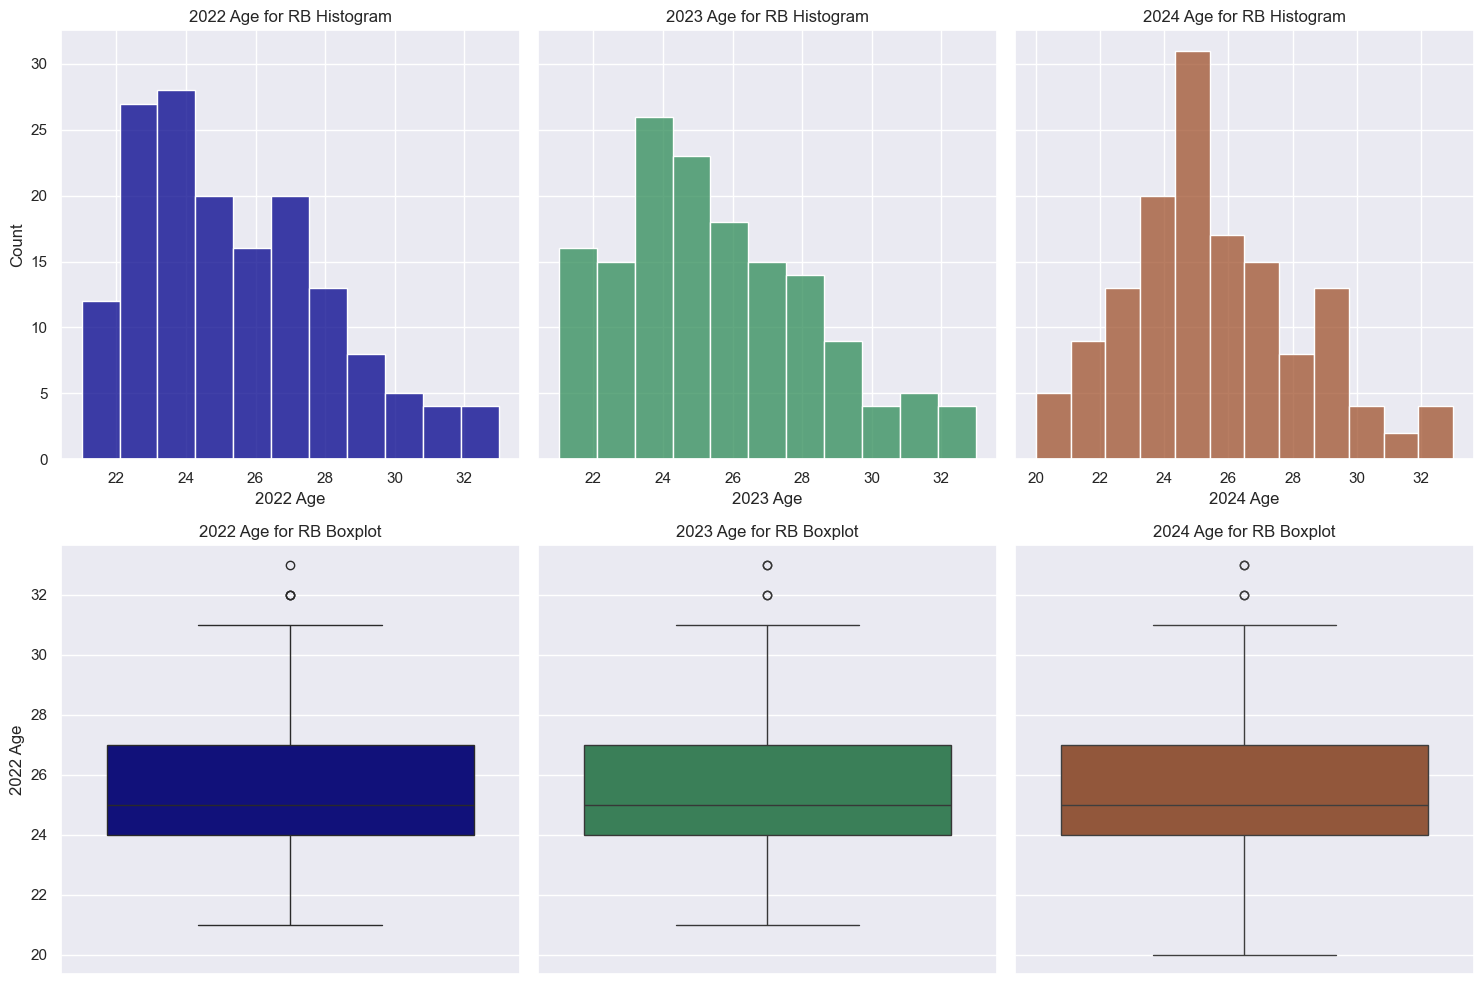

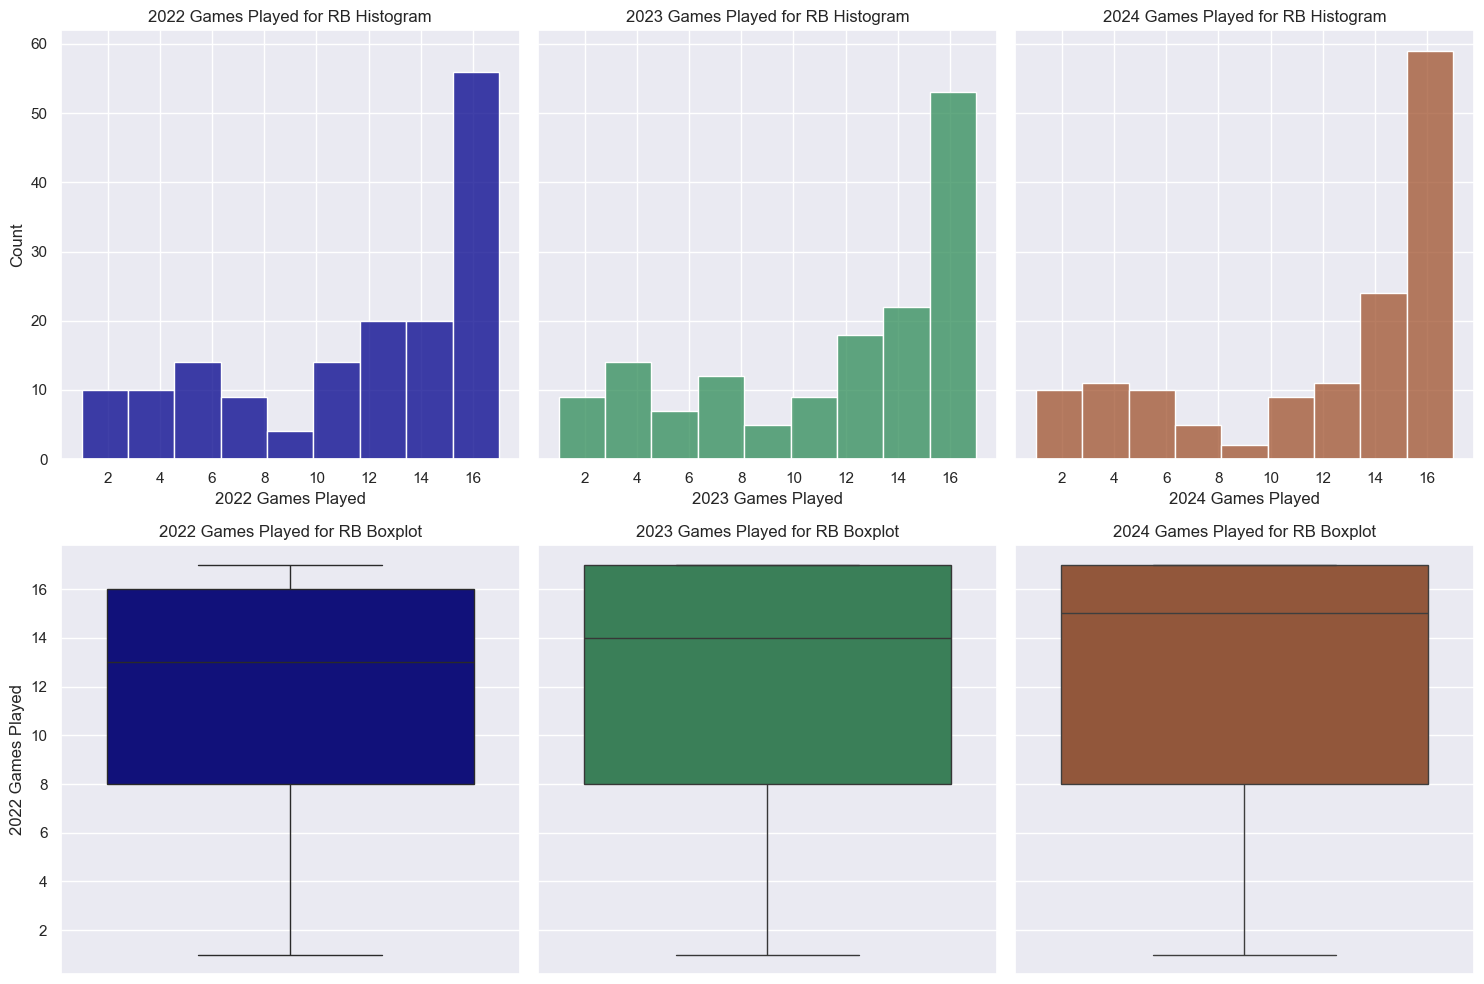

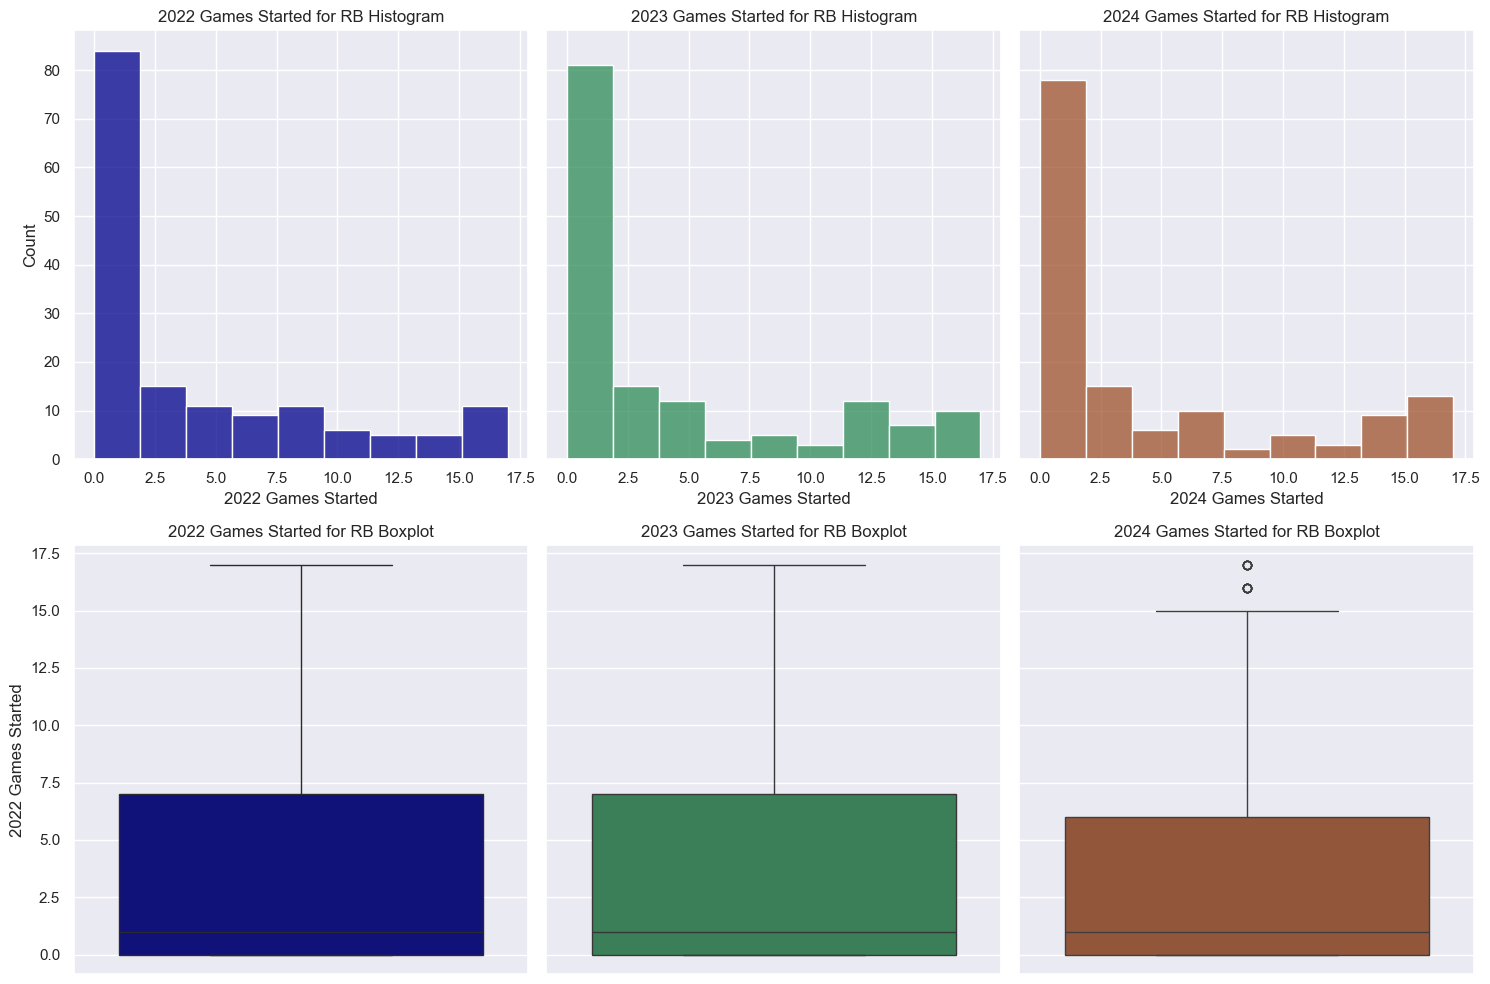

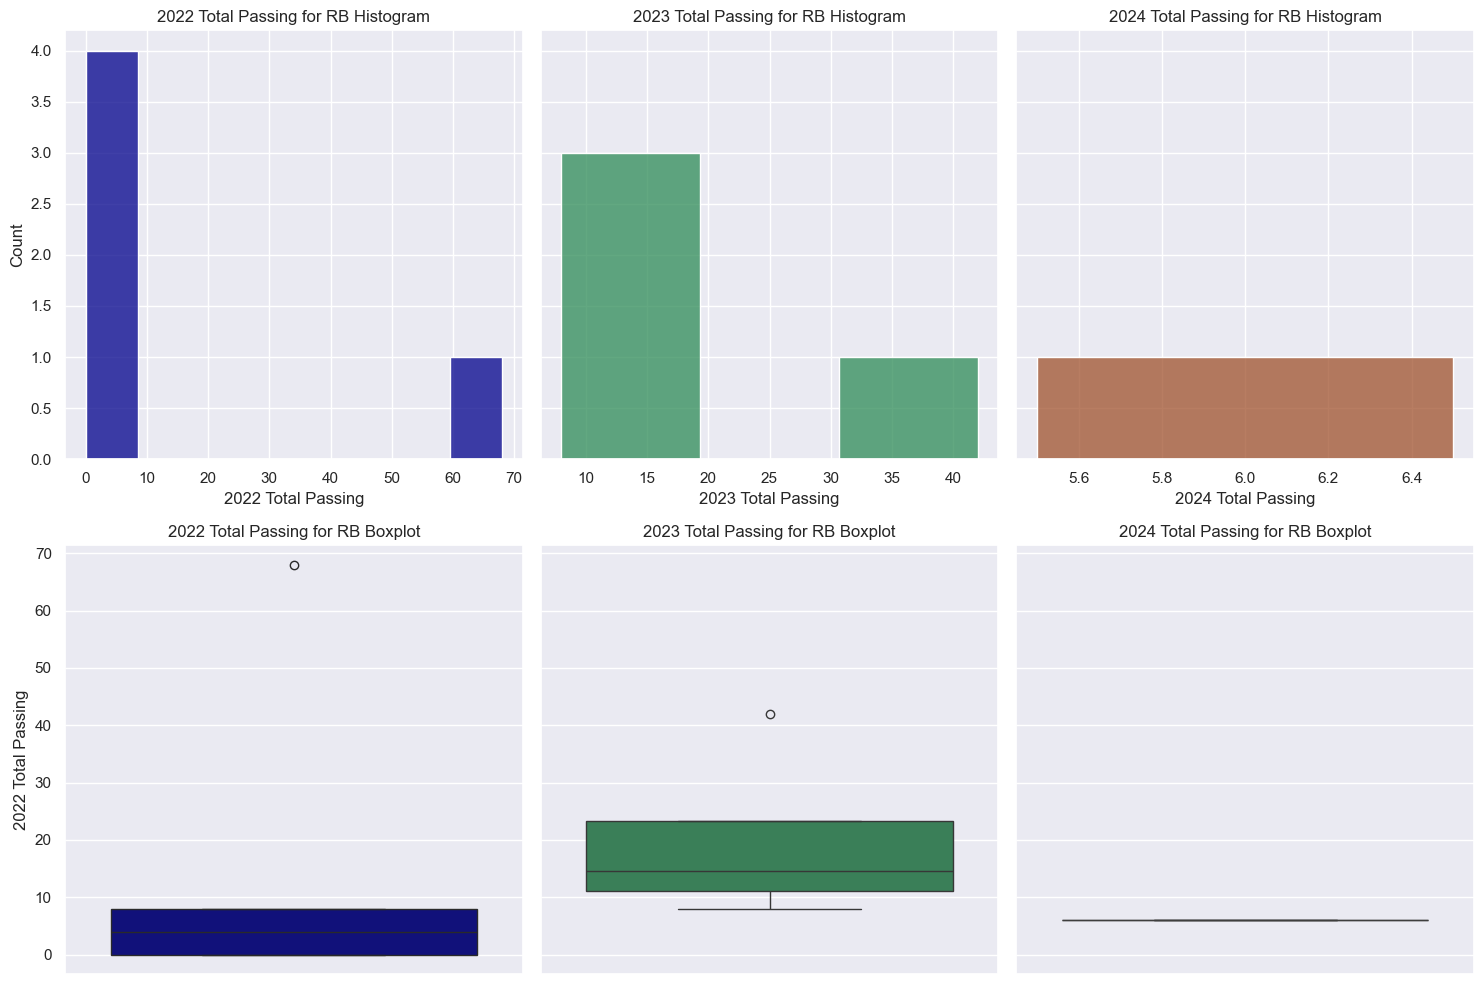

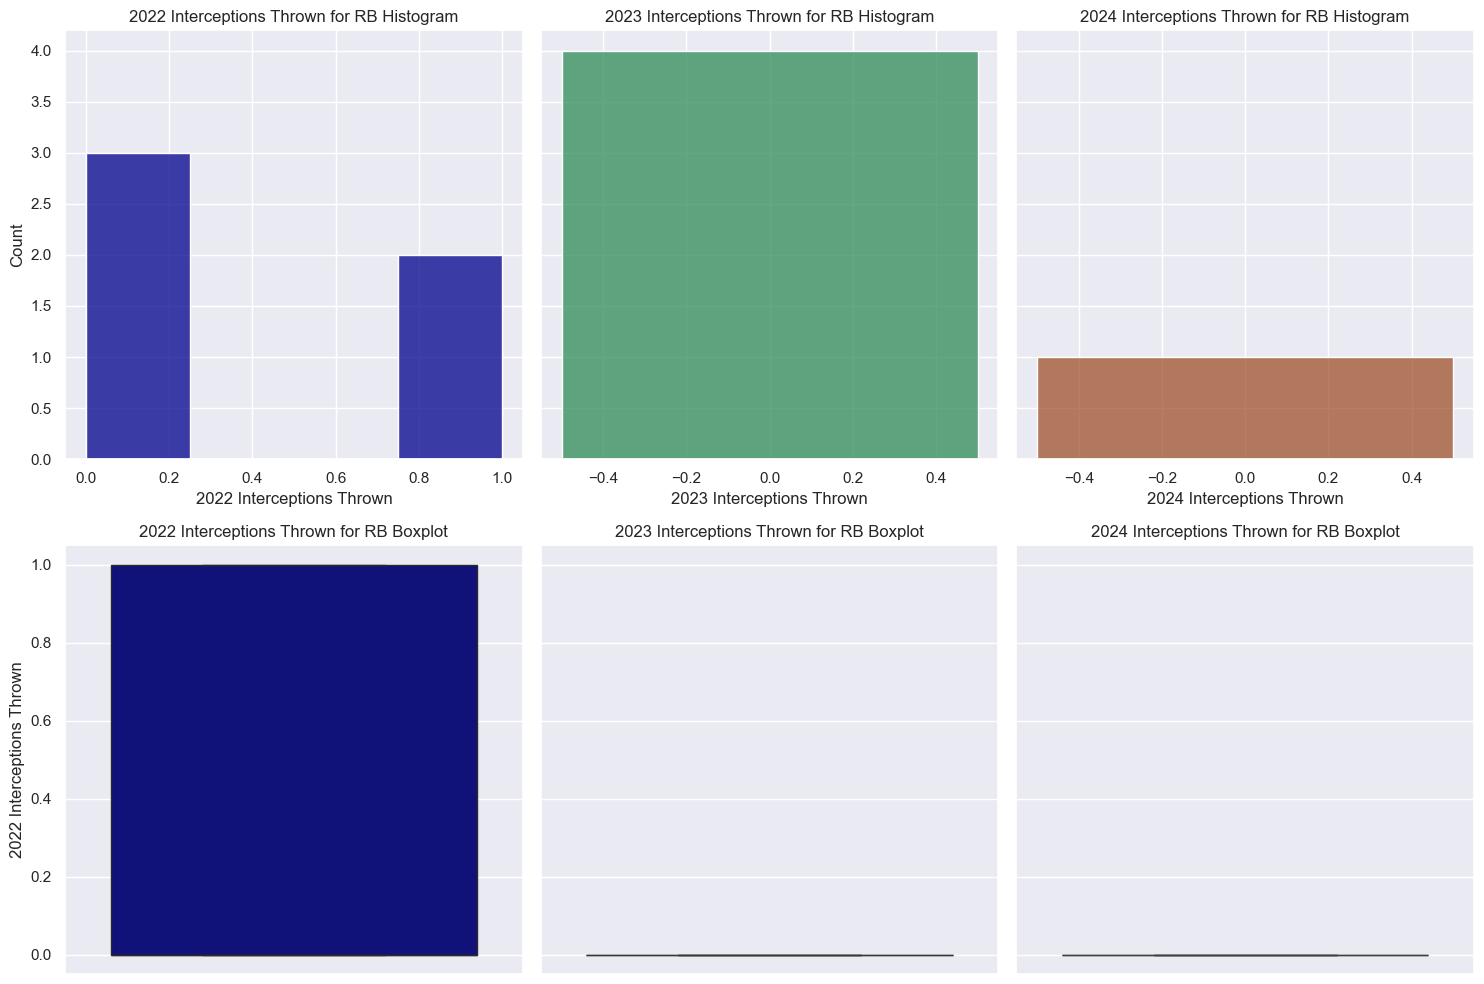

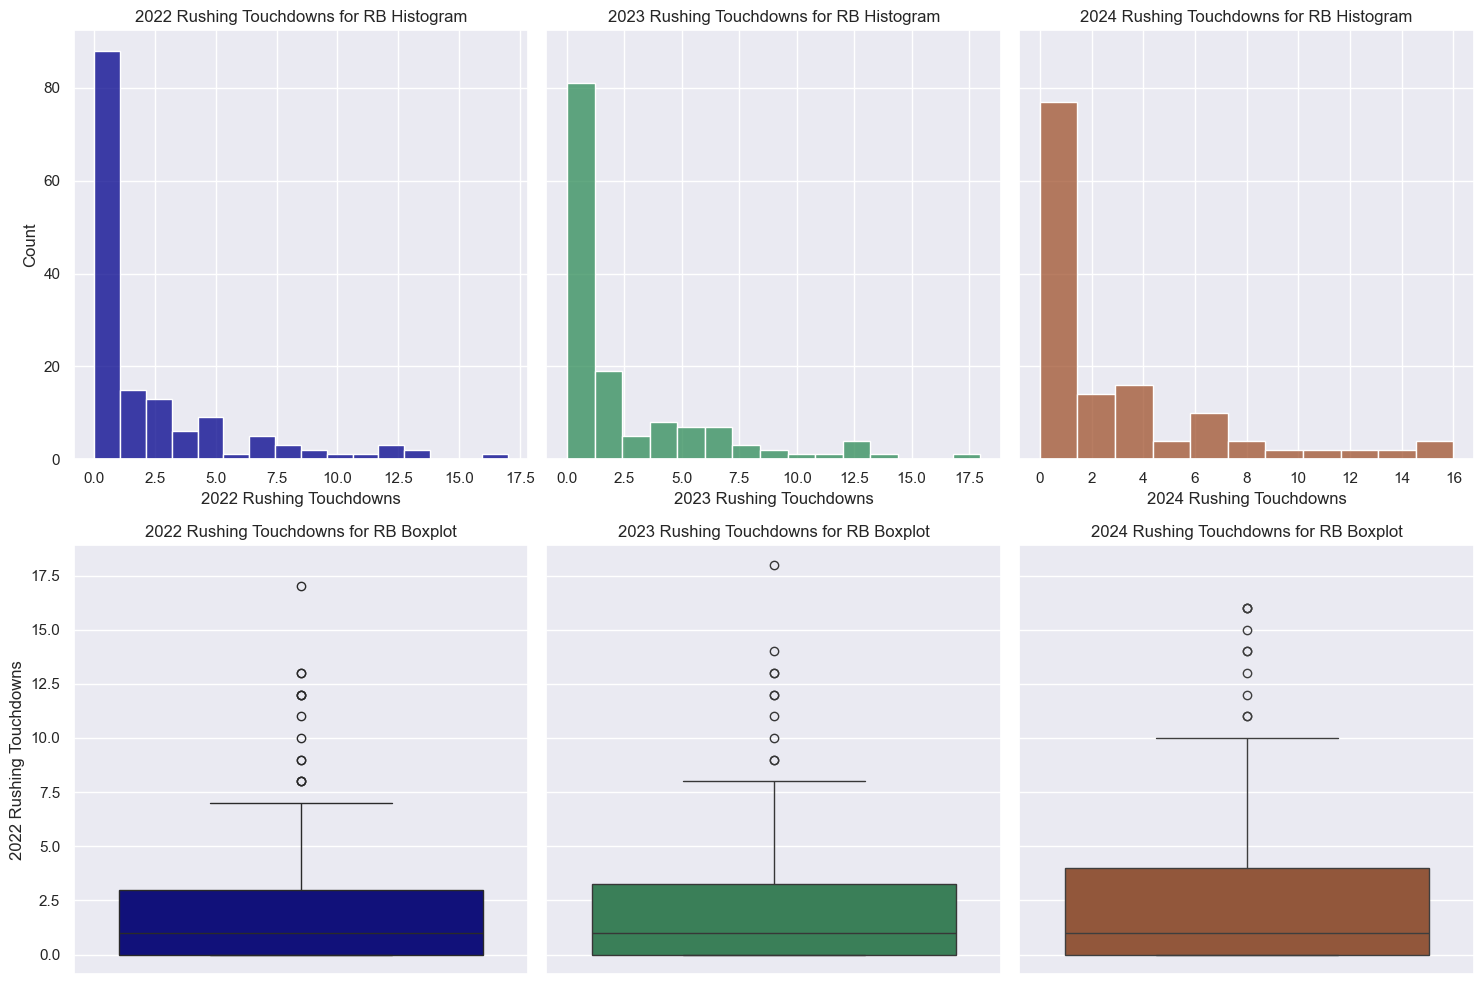

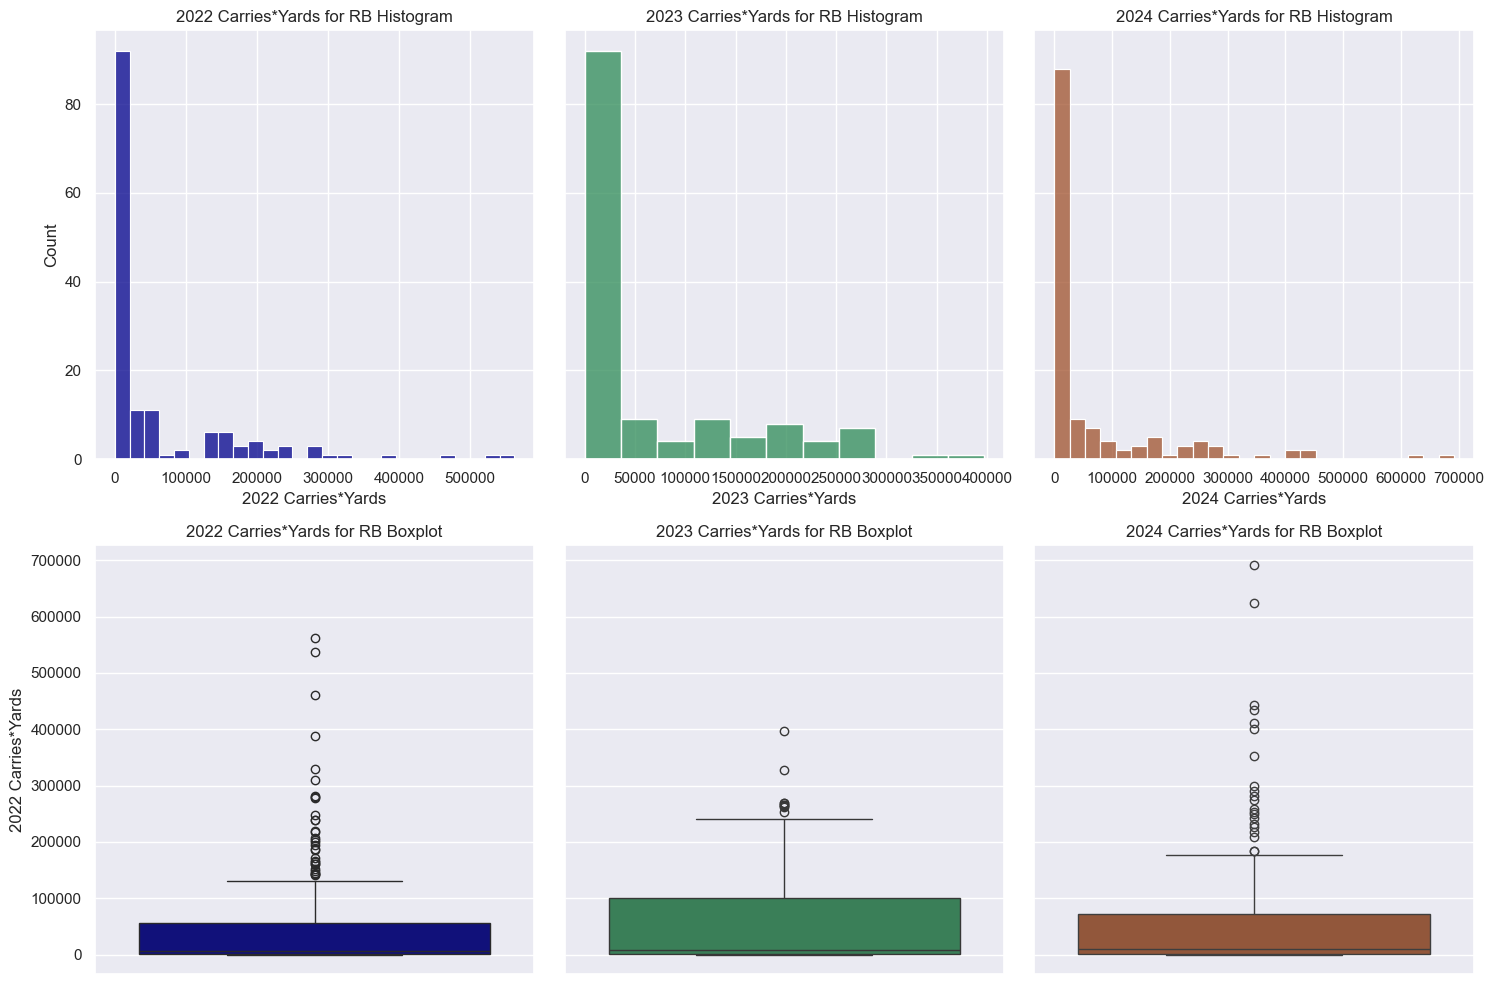

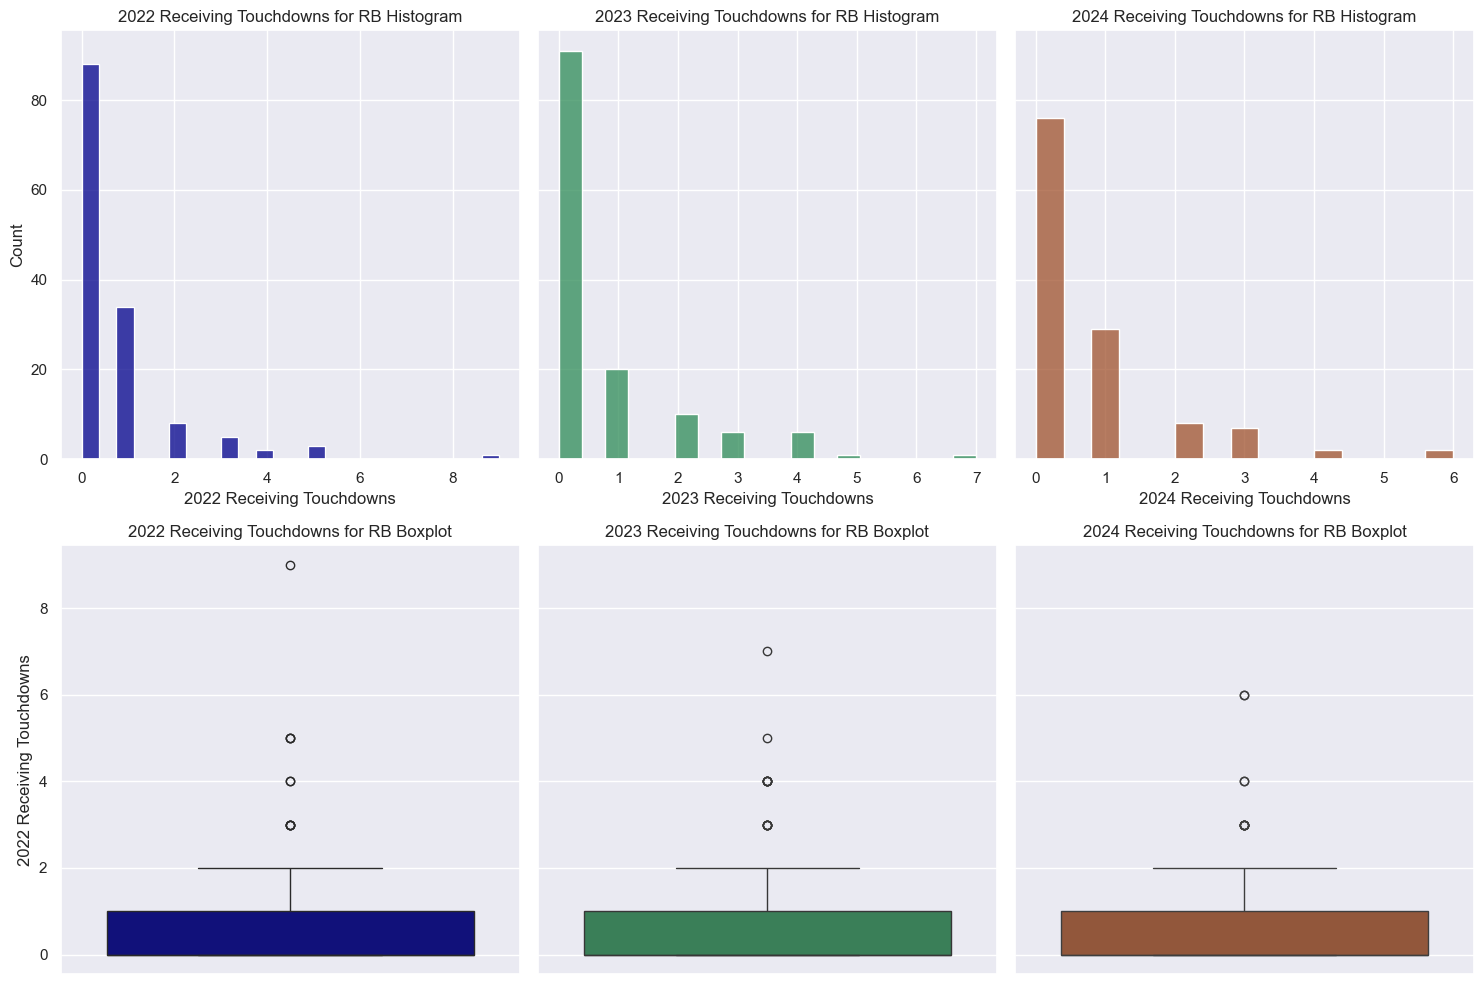

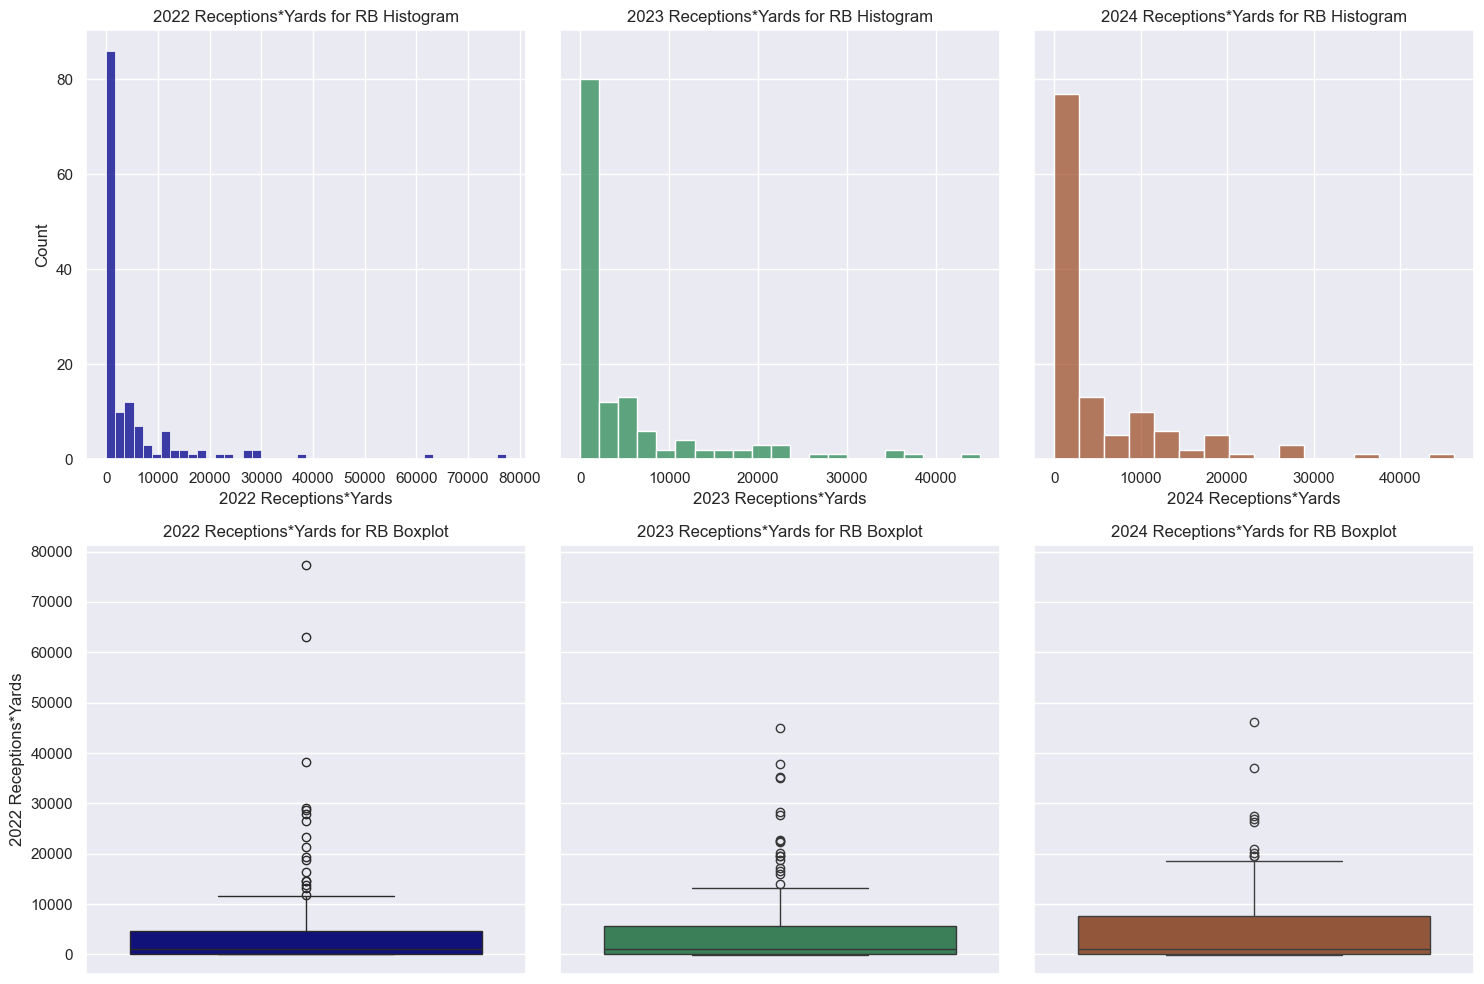

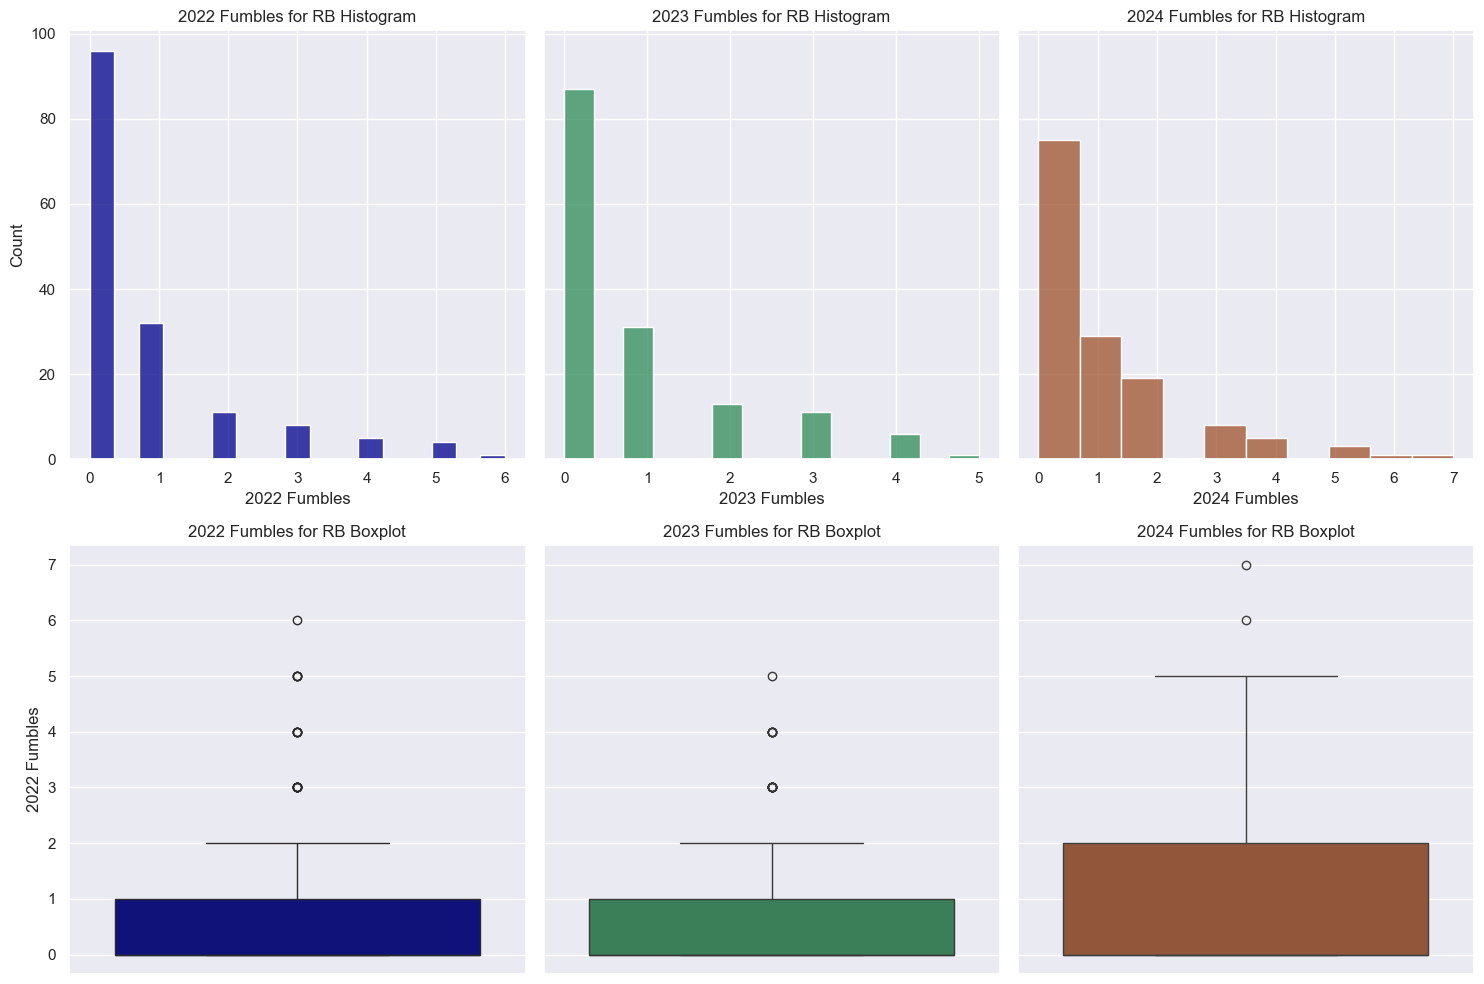

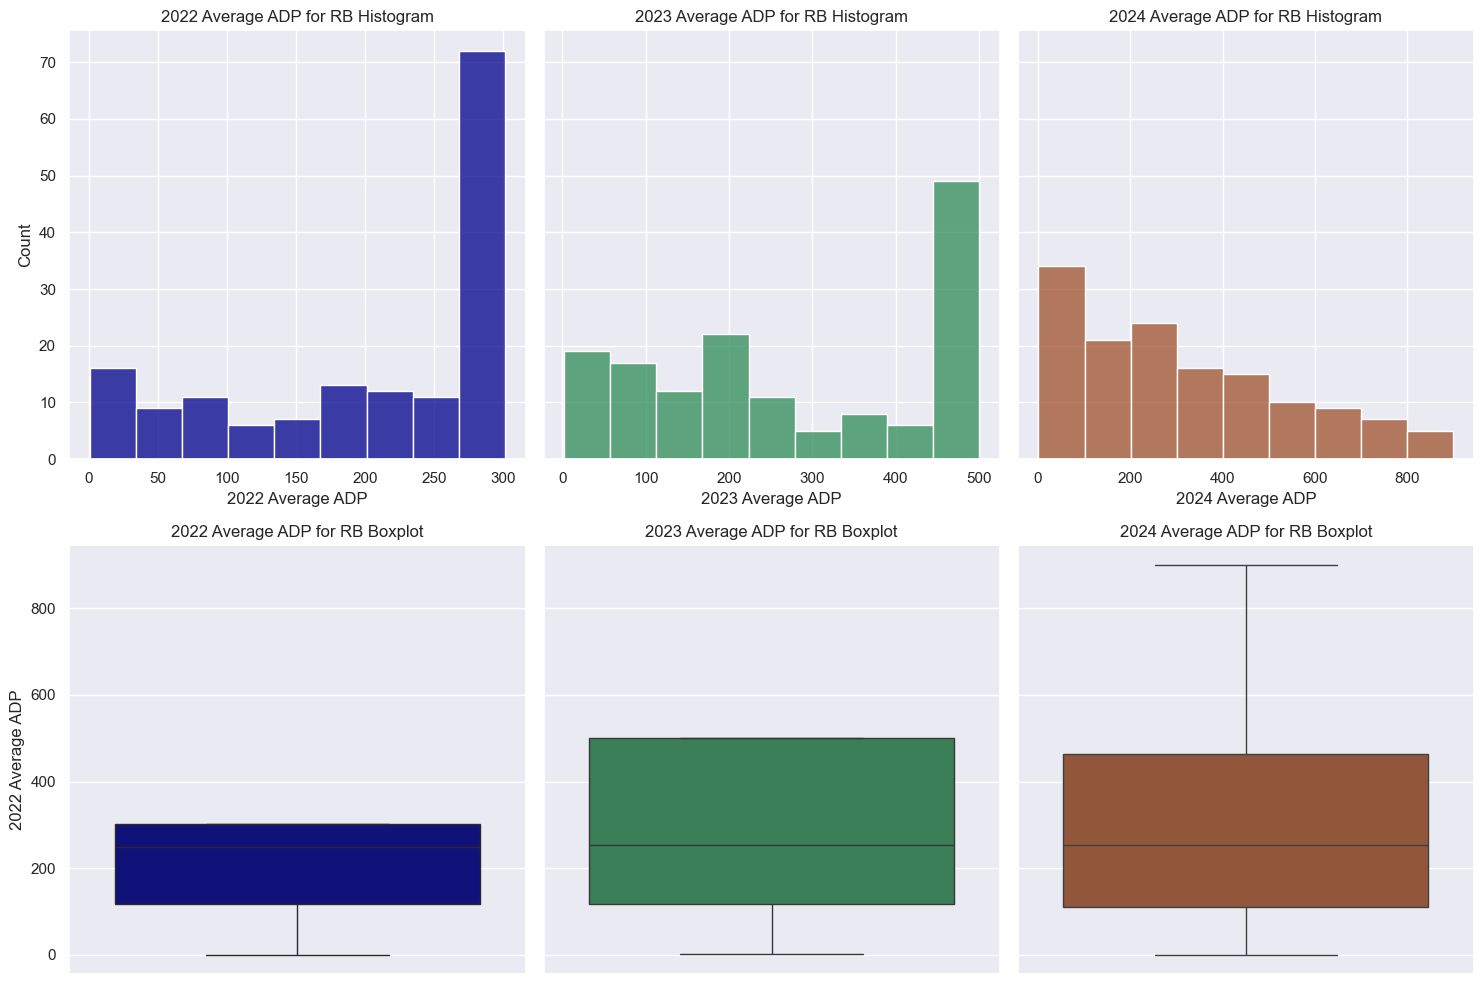

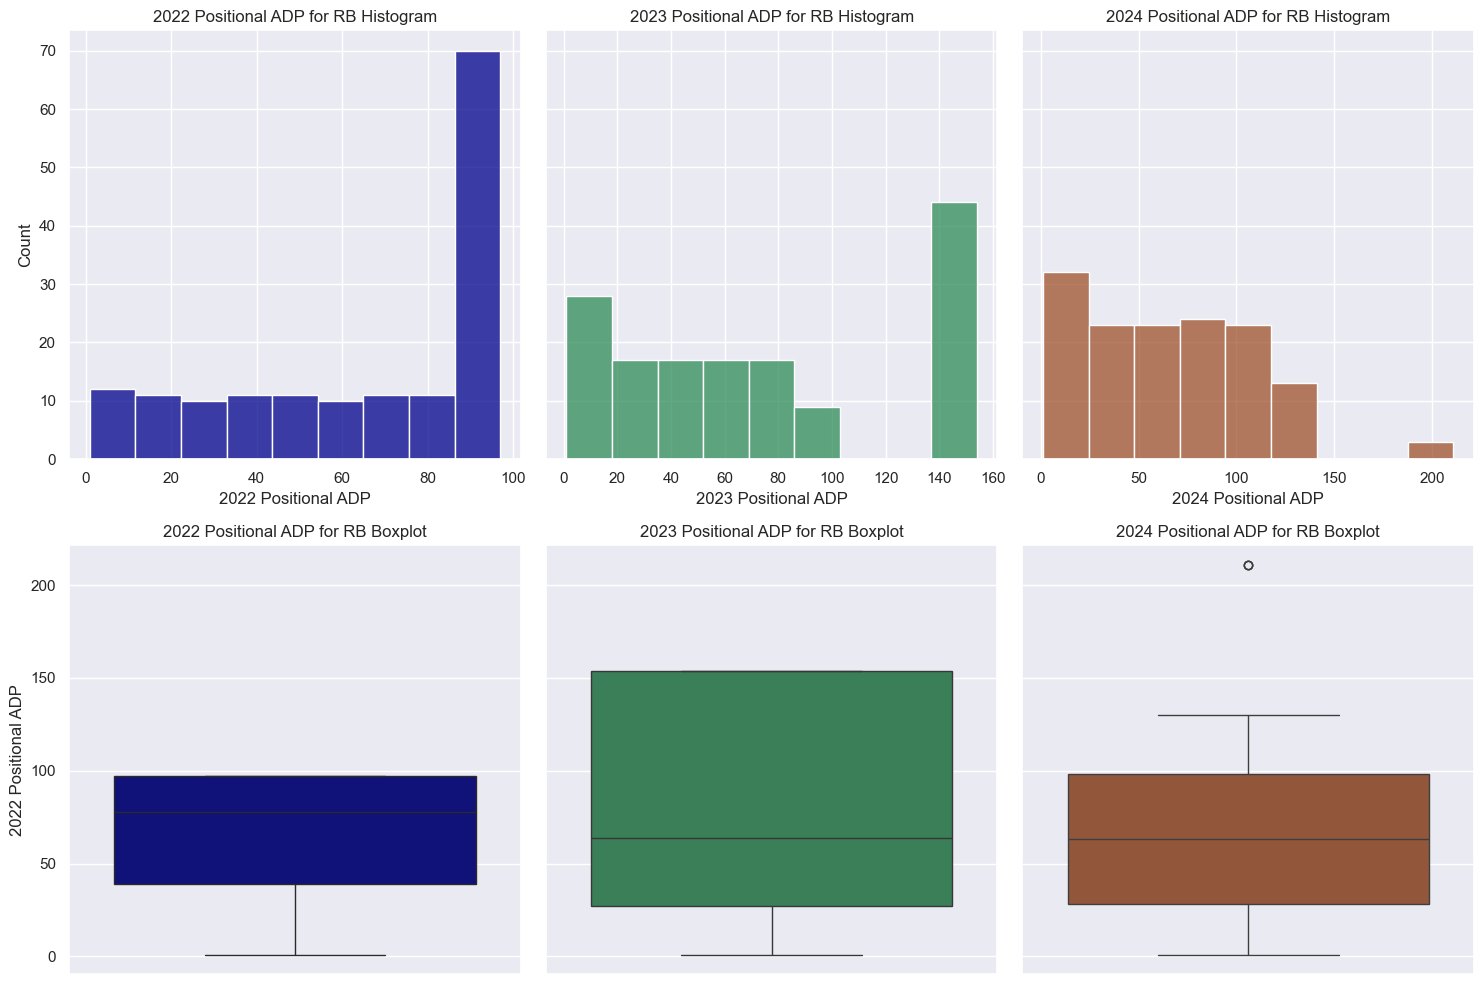

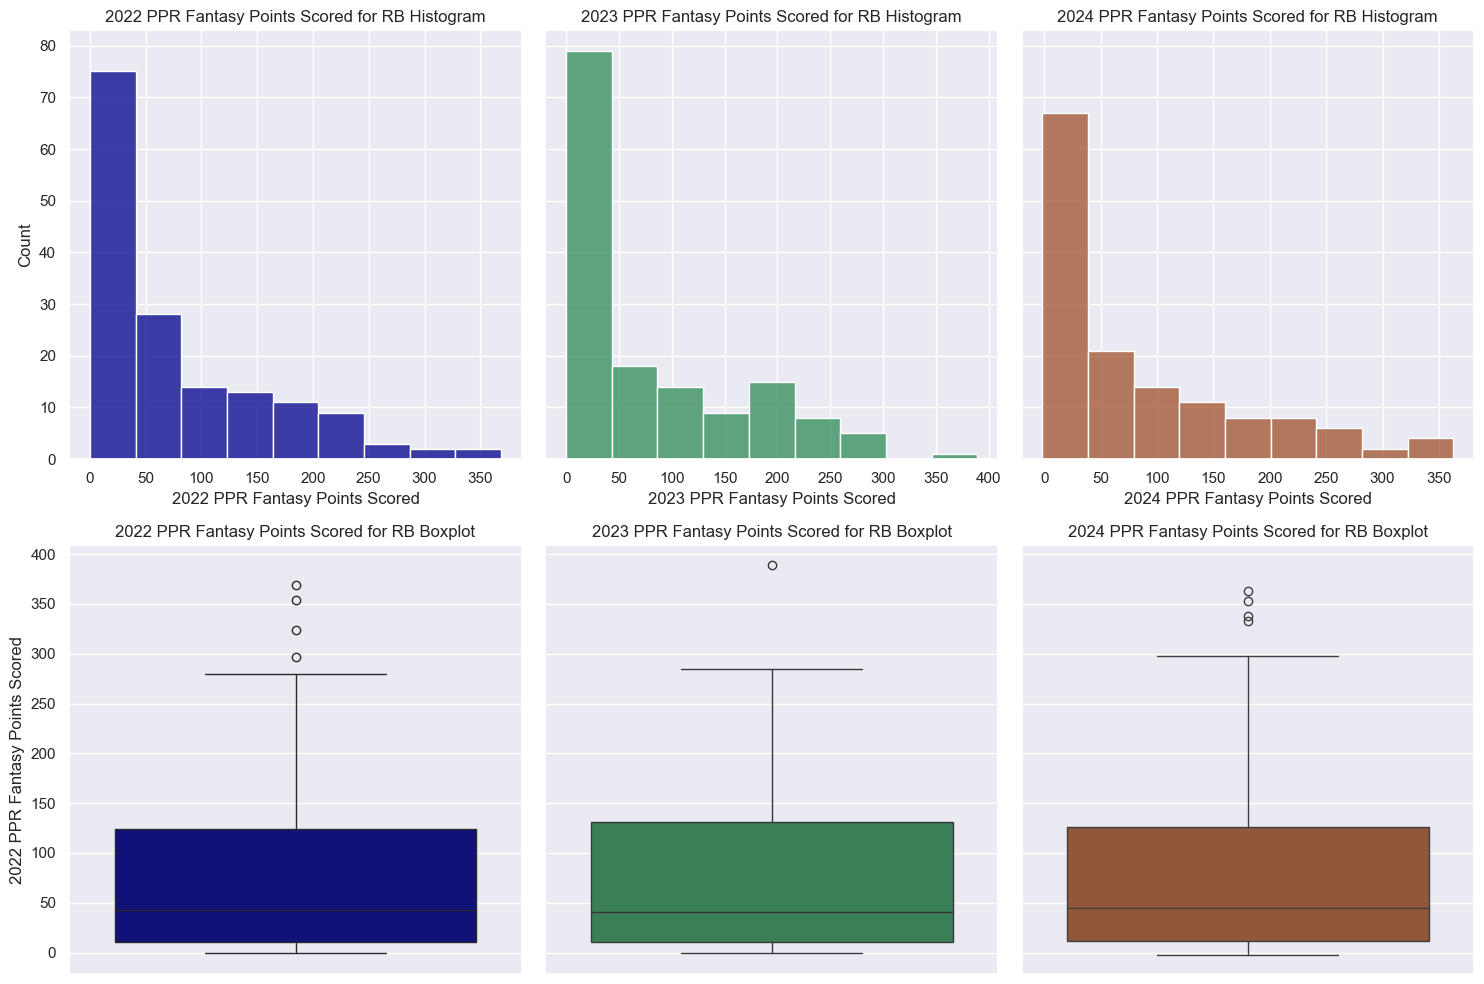

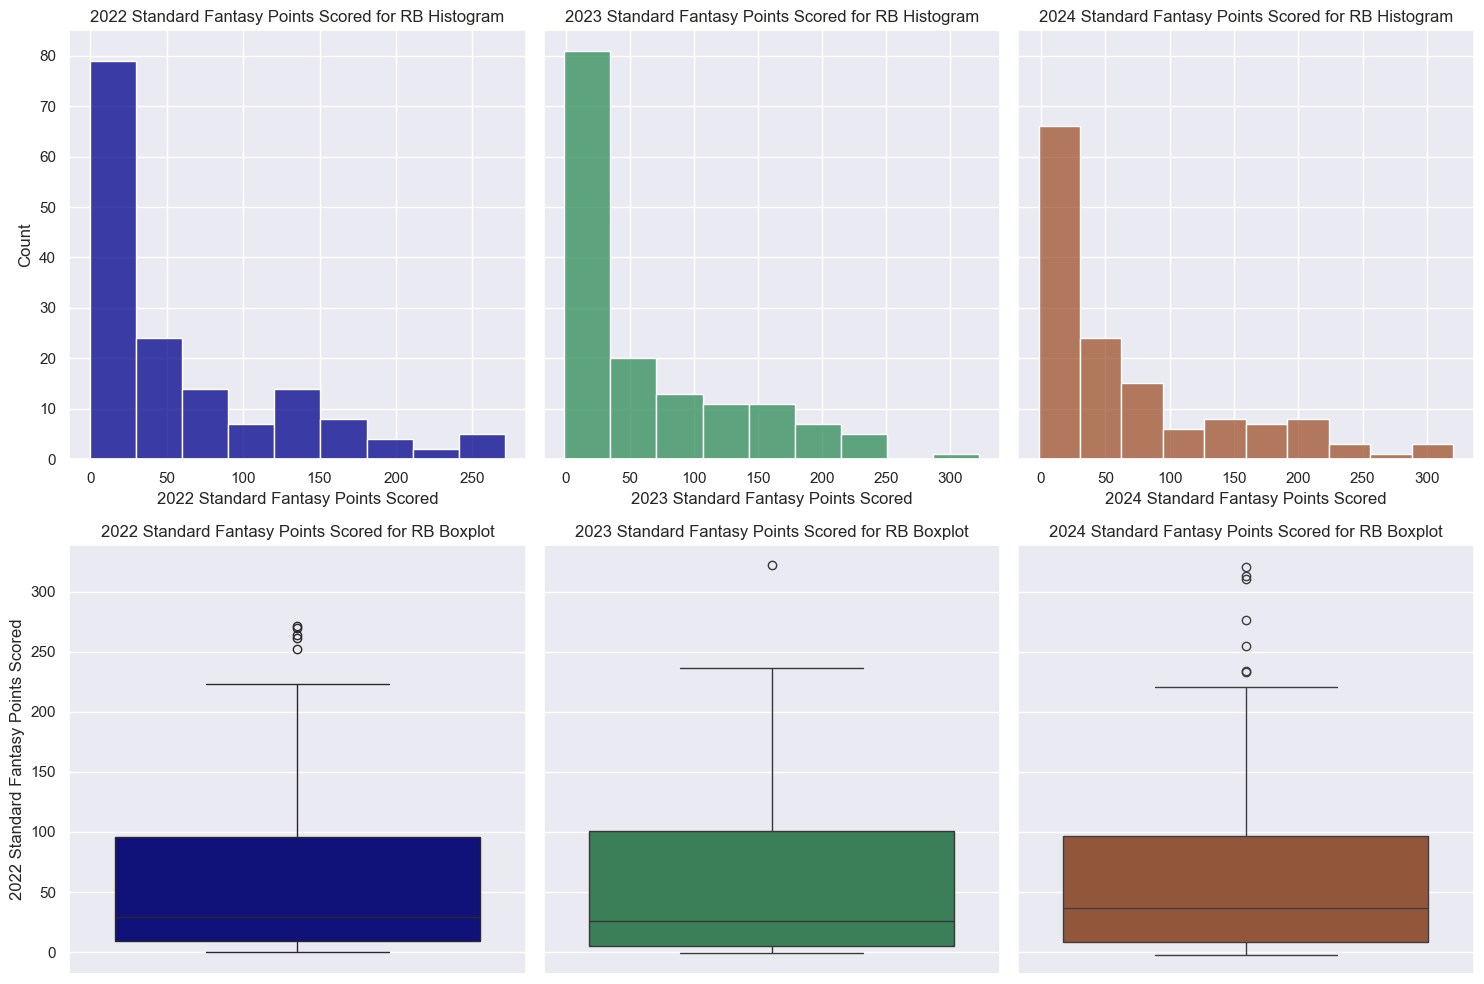

In [32]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_univar_bypos_plots(f, positions[1], save=True)

In [52]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_stats(f, positions[1])

2022 Age Max: 33.0
2022 Age Min: 21.0
2022 Age Mean: 25.53503184713376
2022 Age StDev: 2.5750608487532753

2023 Age Max: 33.0
2023 Age Min: 21.0
2023 Age Mean: 25.651006711409394
2023 Age StDev: 2.662002512356794

2024 Age Max: 33.0
2024 Age Min: 20.0
2024 Age Mean: 25.645390070921987
2024 Age StDev: 2.5796111416589356

2022 Games Played Max: 17.0
2022 Games Played Min: 1.0
2022 Games Played Mean: 11.834394904458598
2022 Games Played StDev: 5.0586964078935575

2023 Games Played Max: 17.0
2023 Games Played Min: 1.0
2023 Games Played Mean: 11.859060402684564
2023 Games Played StDev: 5.152727998697999

2024 Games Played Max: 17.0
2024 Games Played Min: 1.0
2024 Games Played Mean: 12.26241134751773
2024 Games Played StDev: 5.324432364206158

2022 Games Started Max: 17.0
2022 Games Started Min: 0.0
2022 Games Started Mean: 4.038216560509555
2022 Games Started StDev: 5.339297110540882

2023 Games Started Max: 17.0
2023 Games Started Min: 0.0
2023 Games Started Mean: 4.174496644295302
2023 Ga

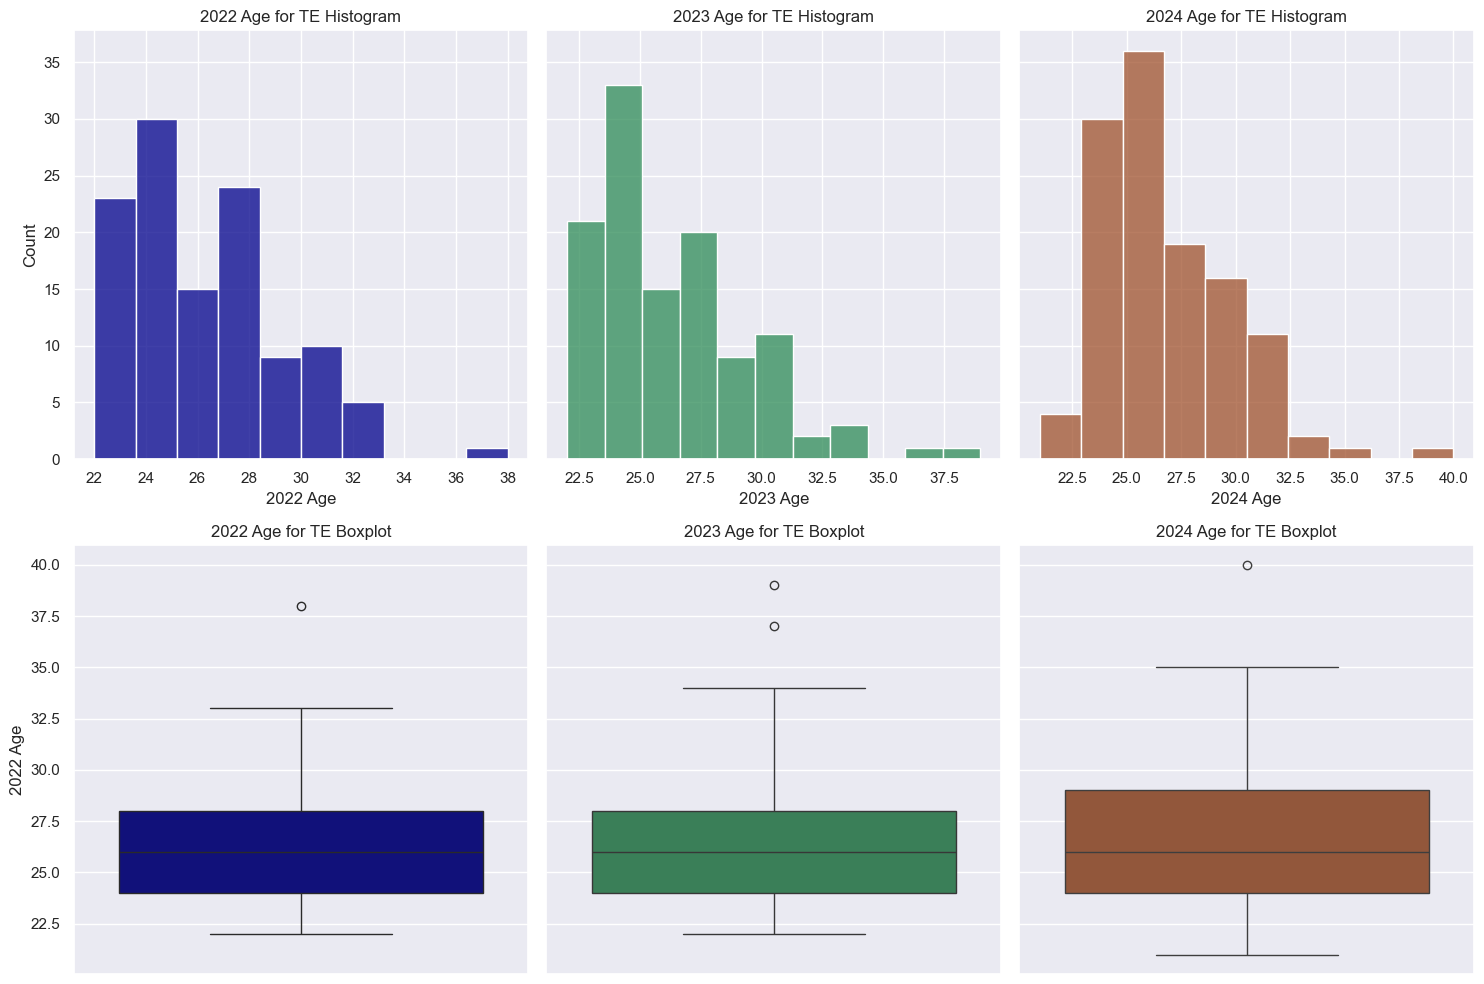

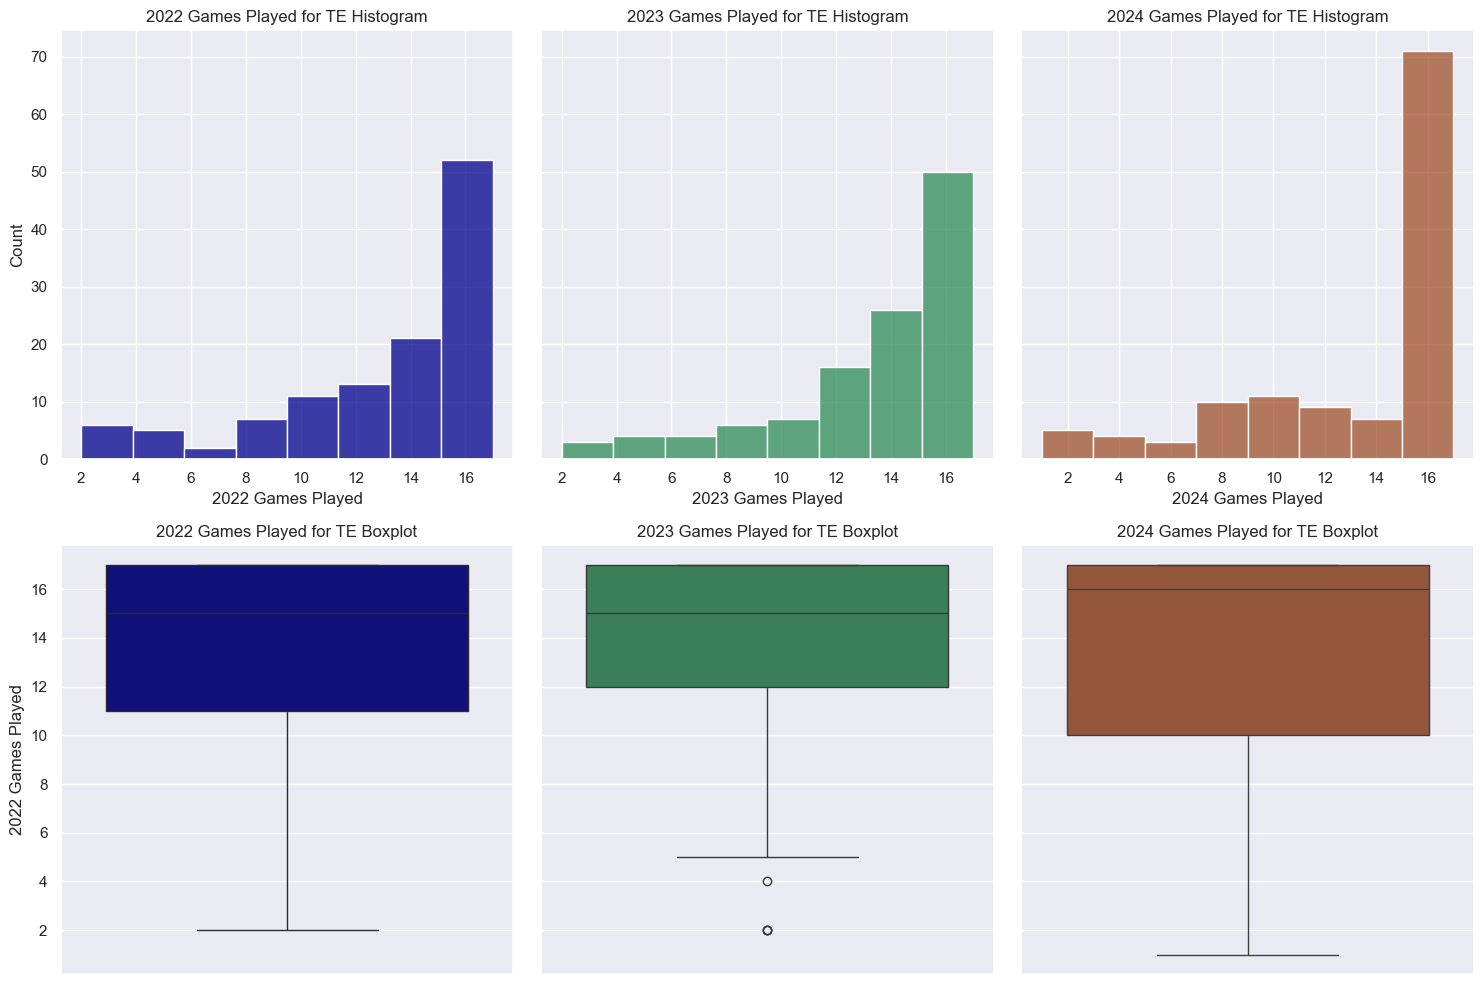

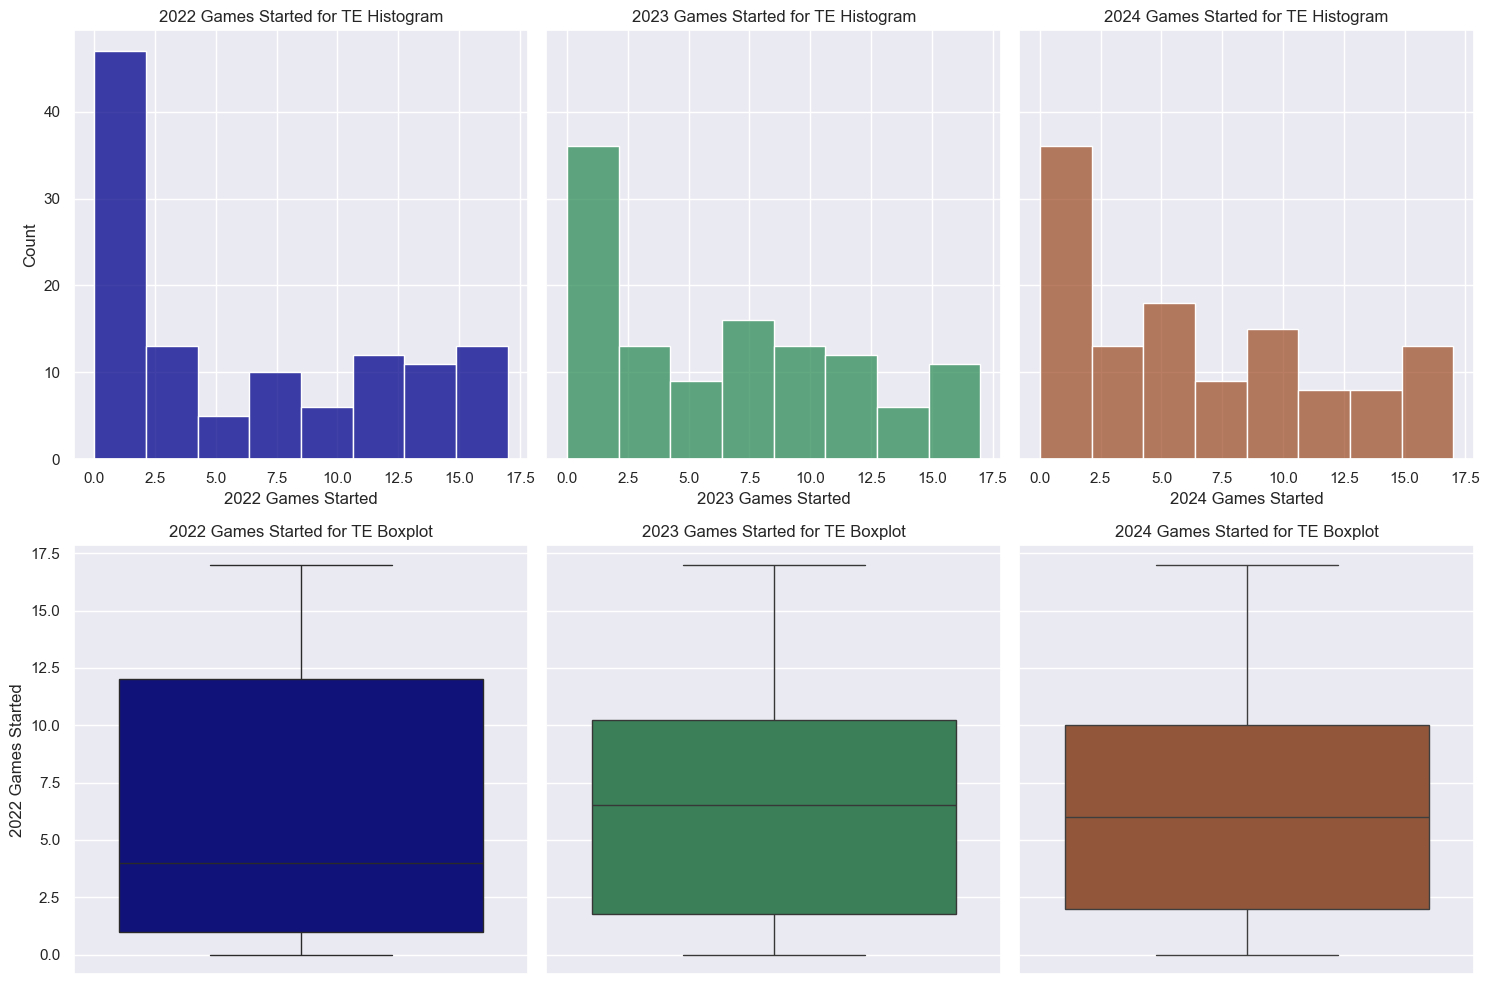

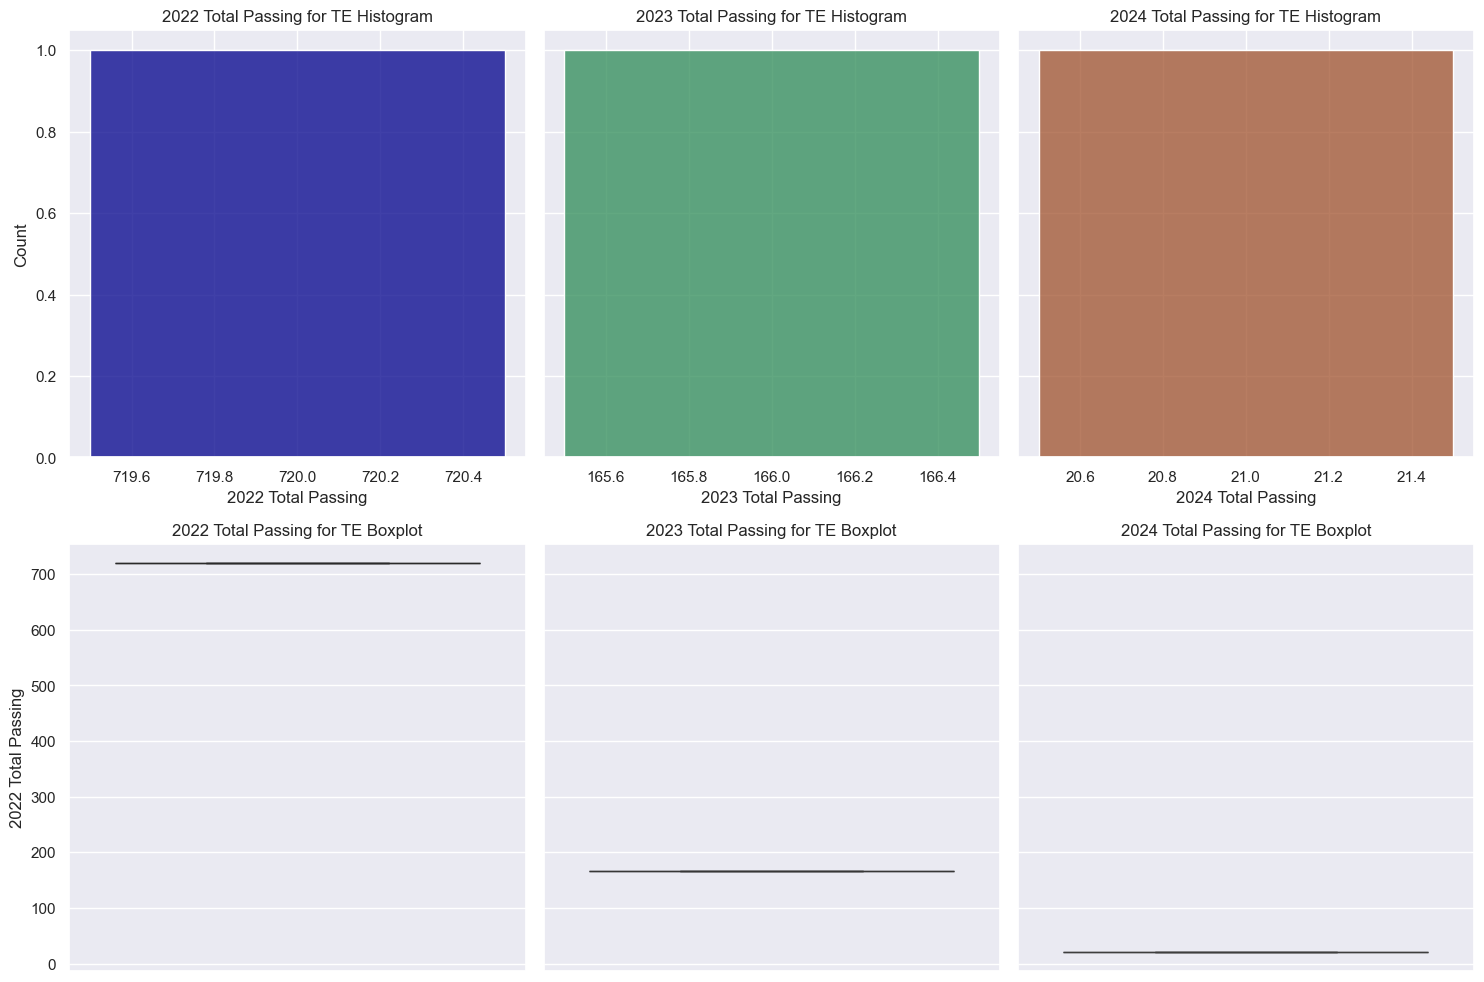

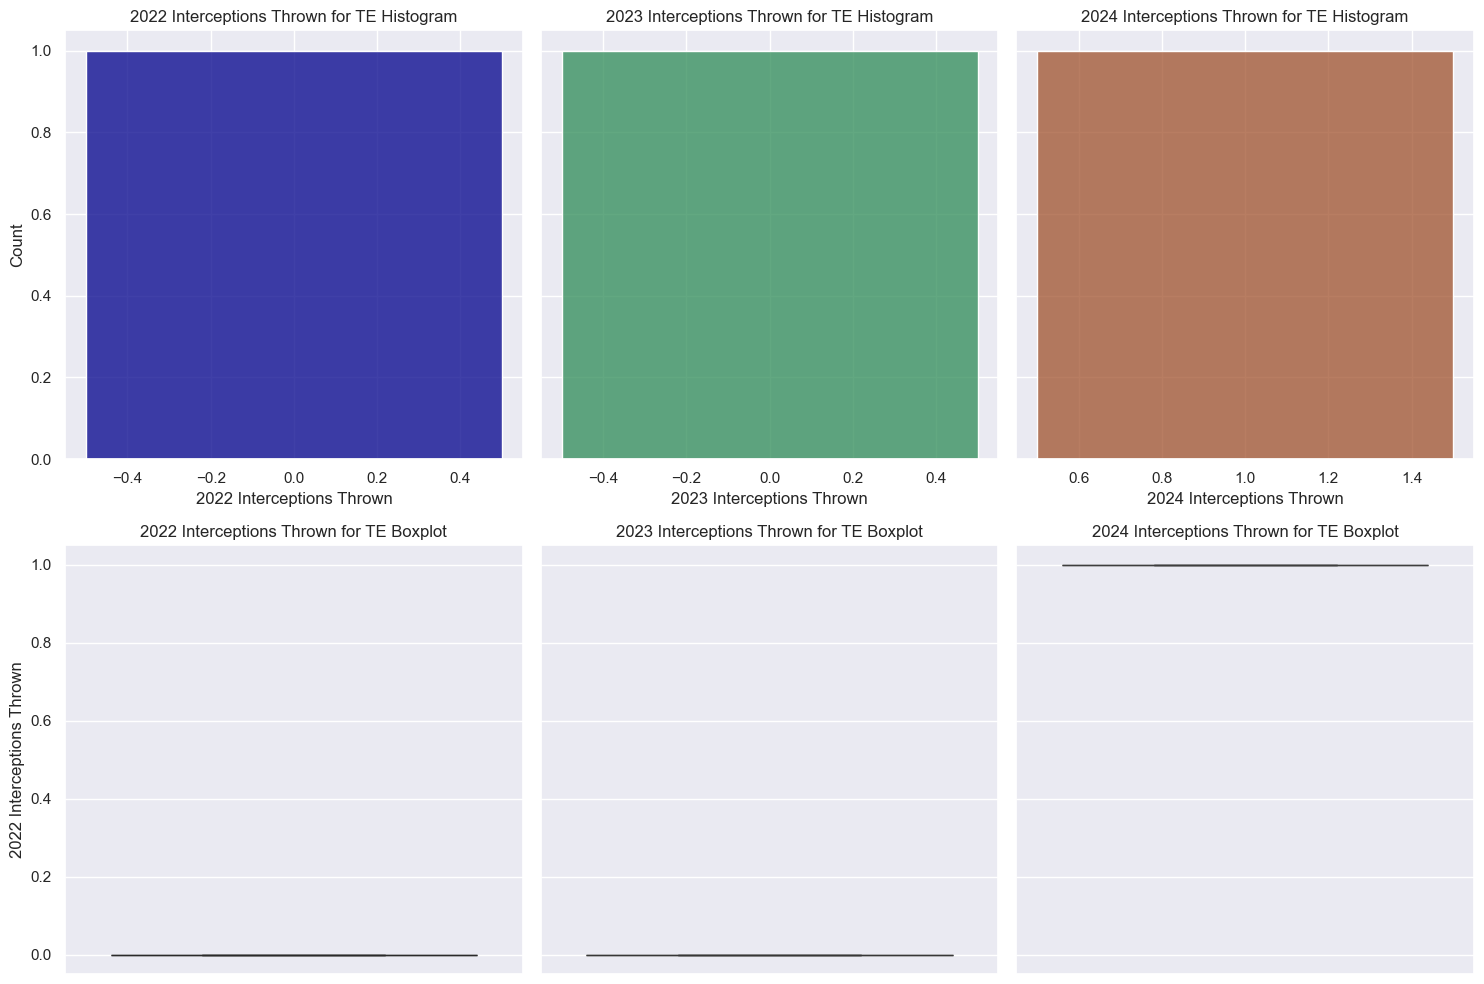

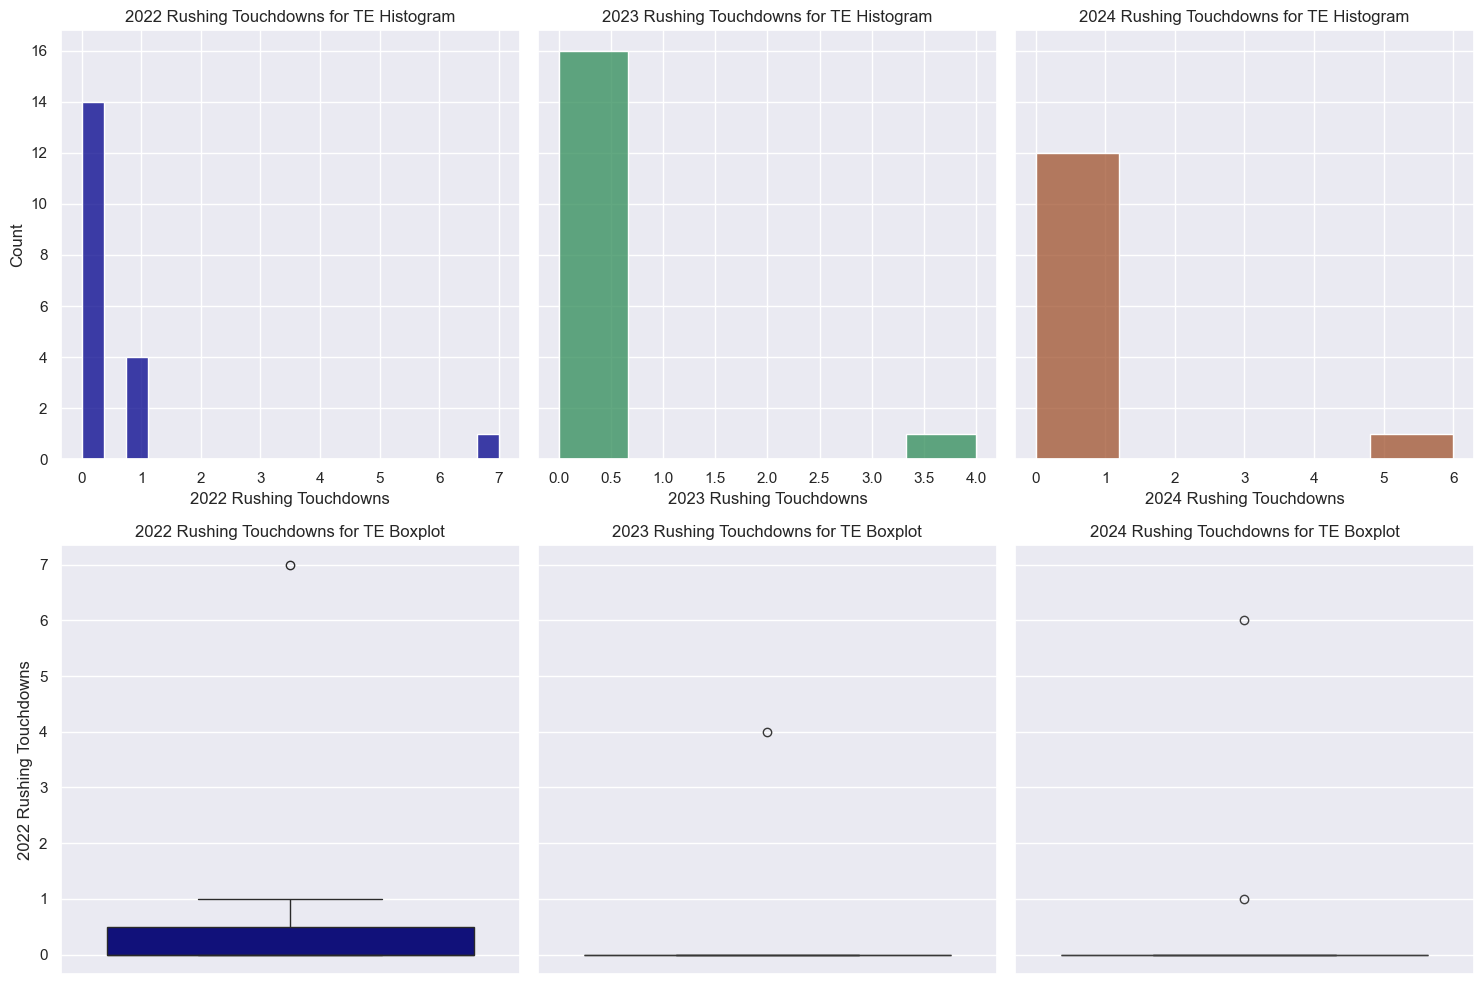

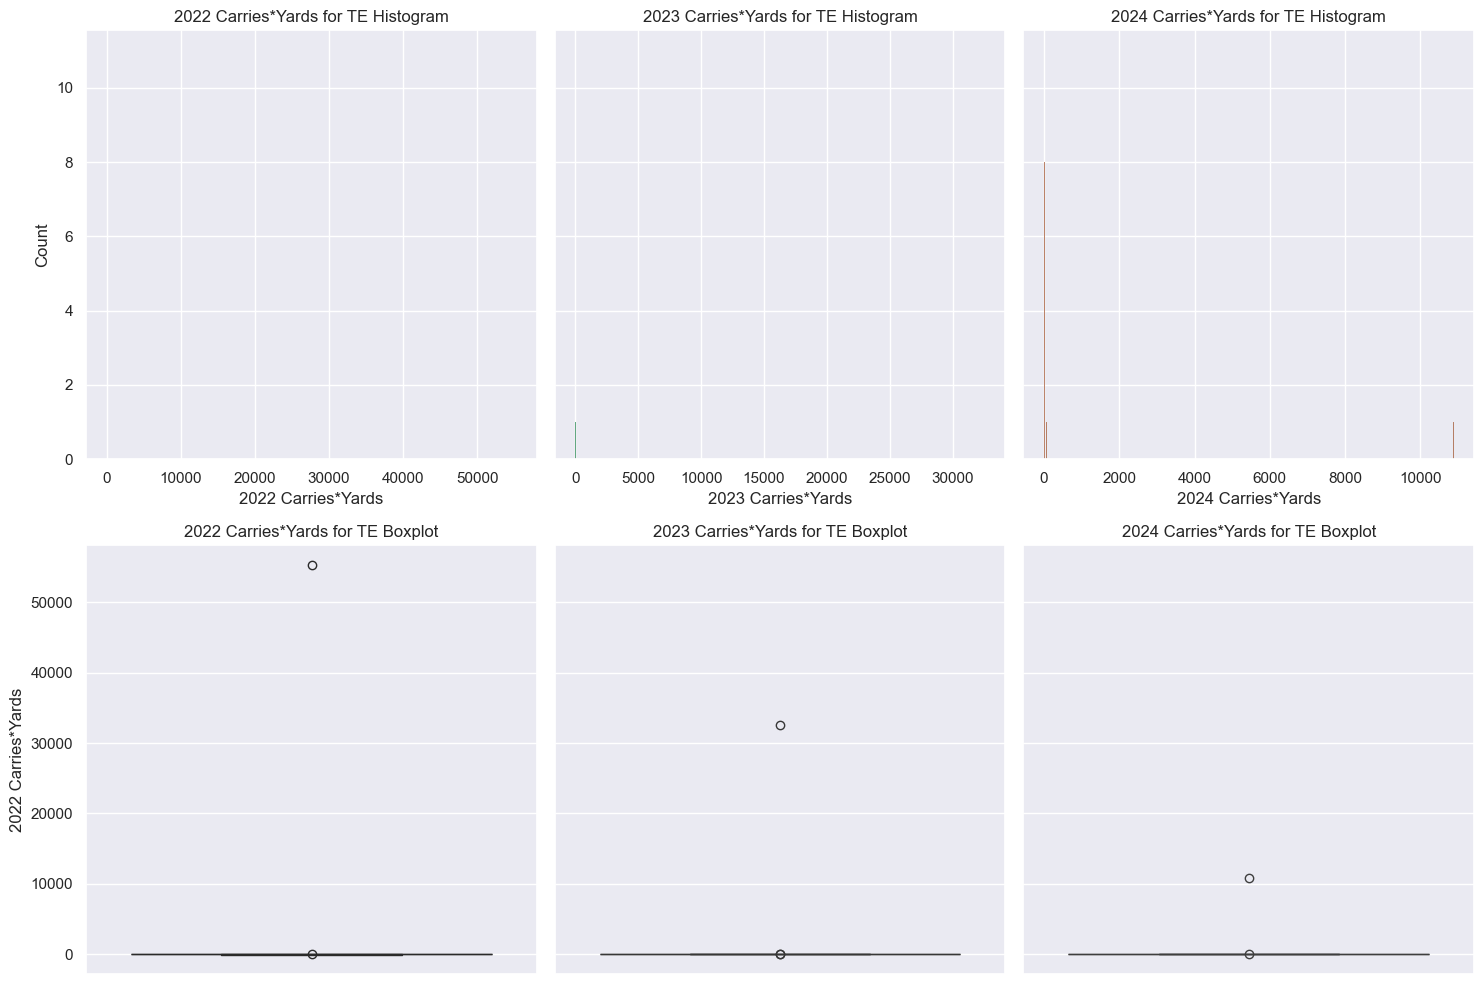

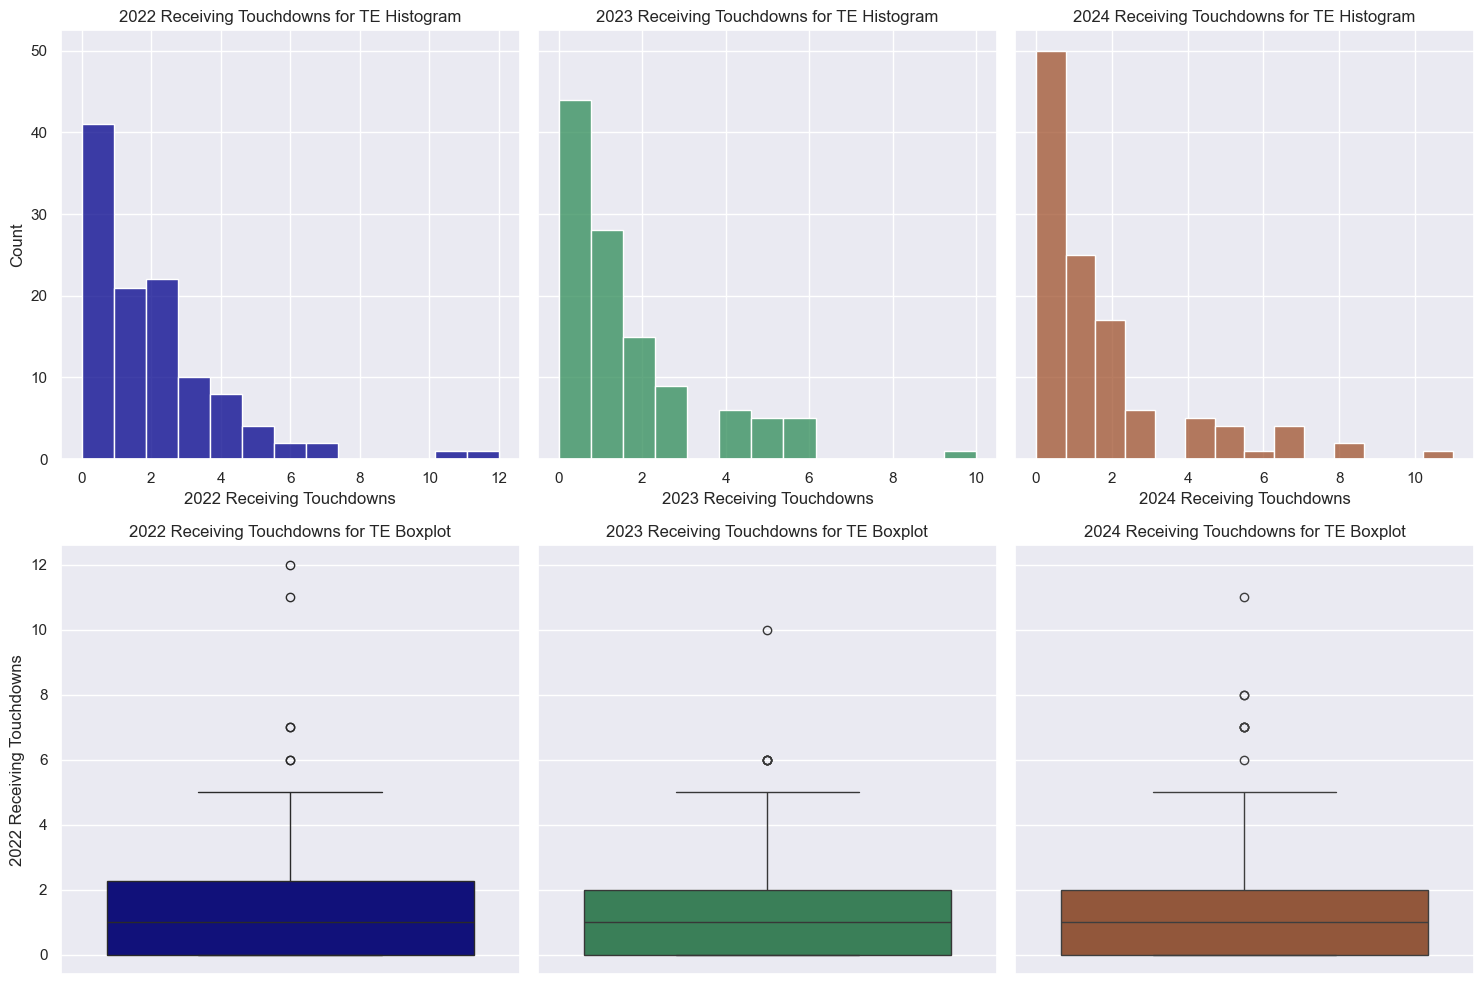

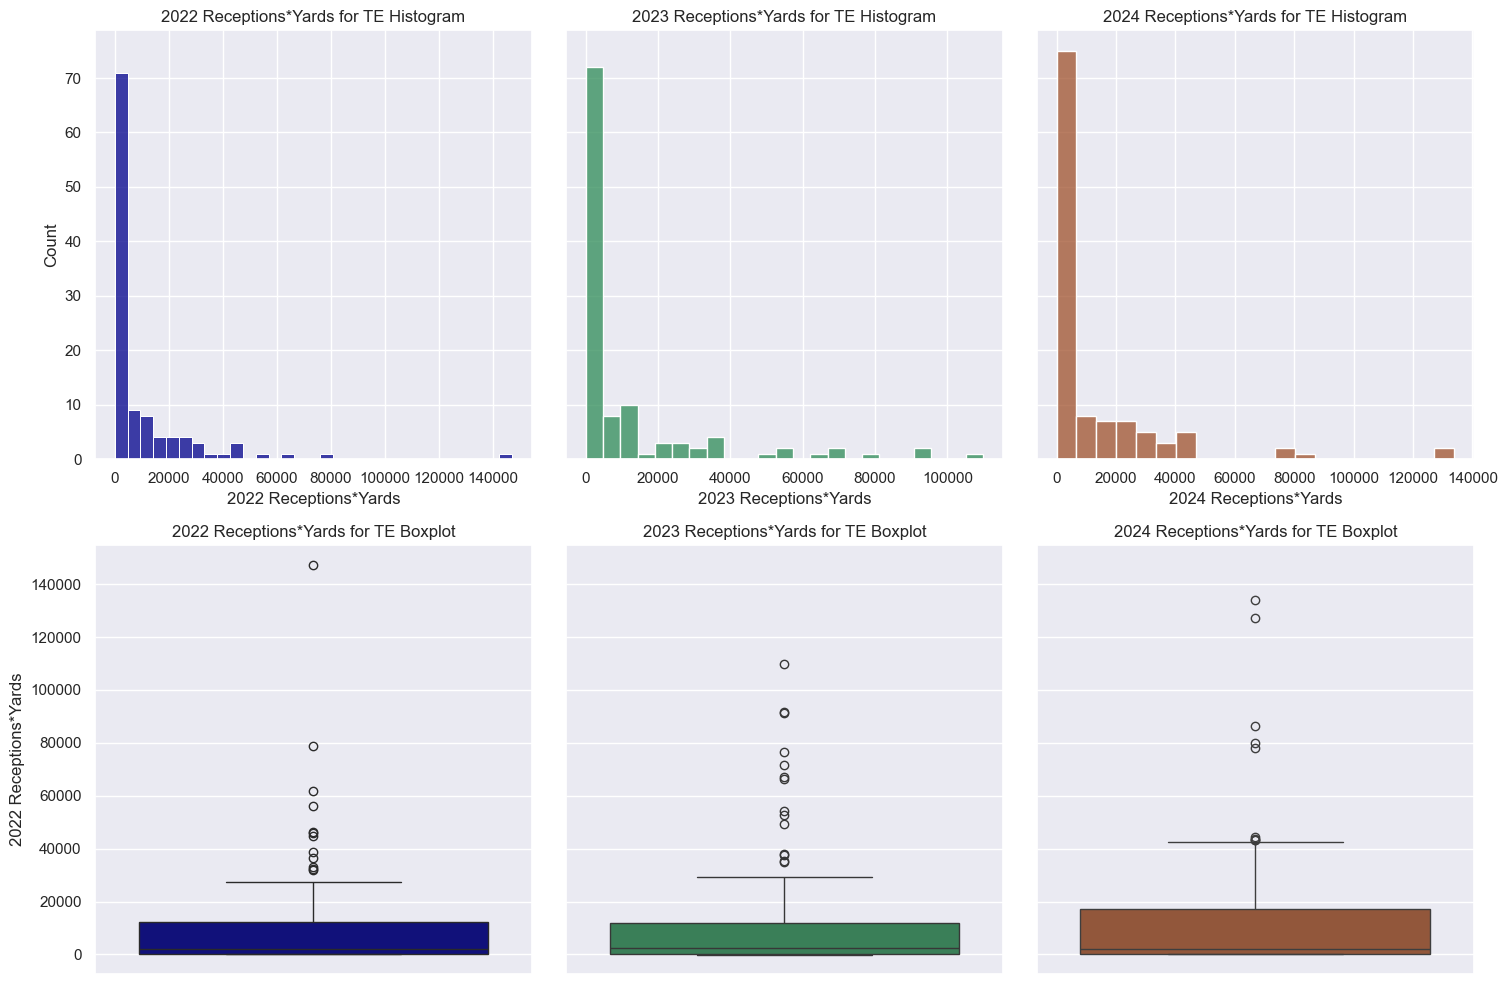

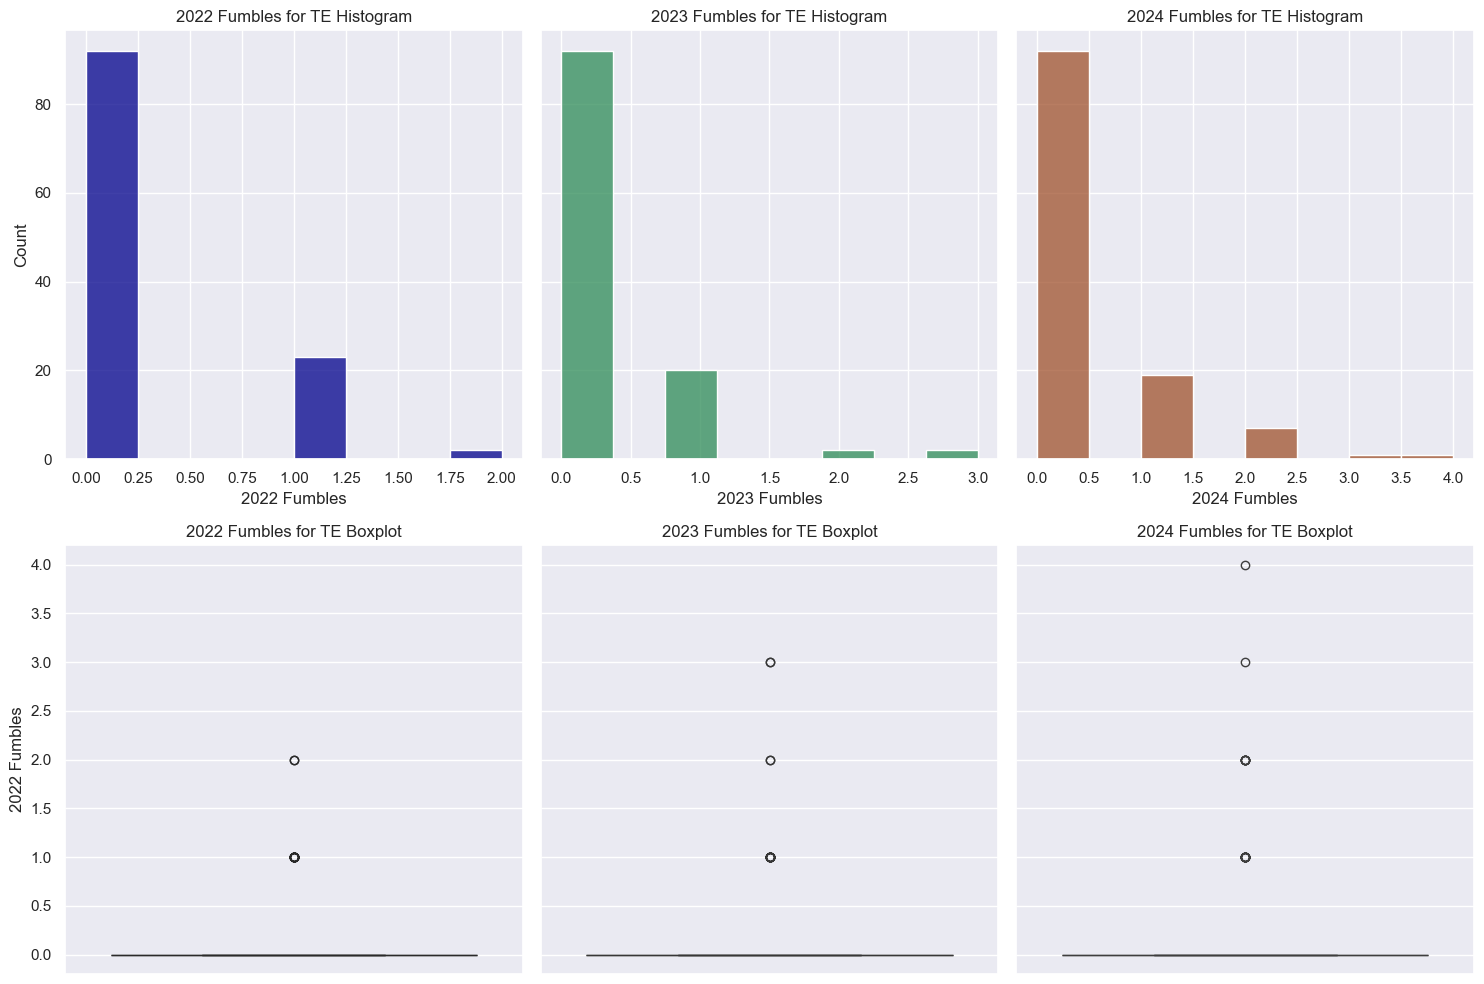

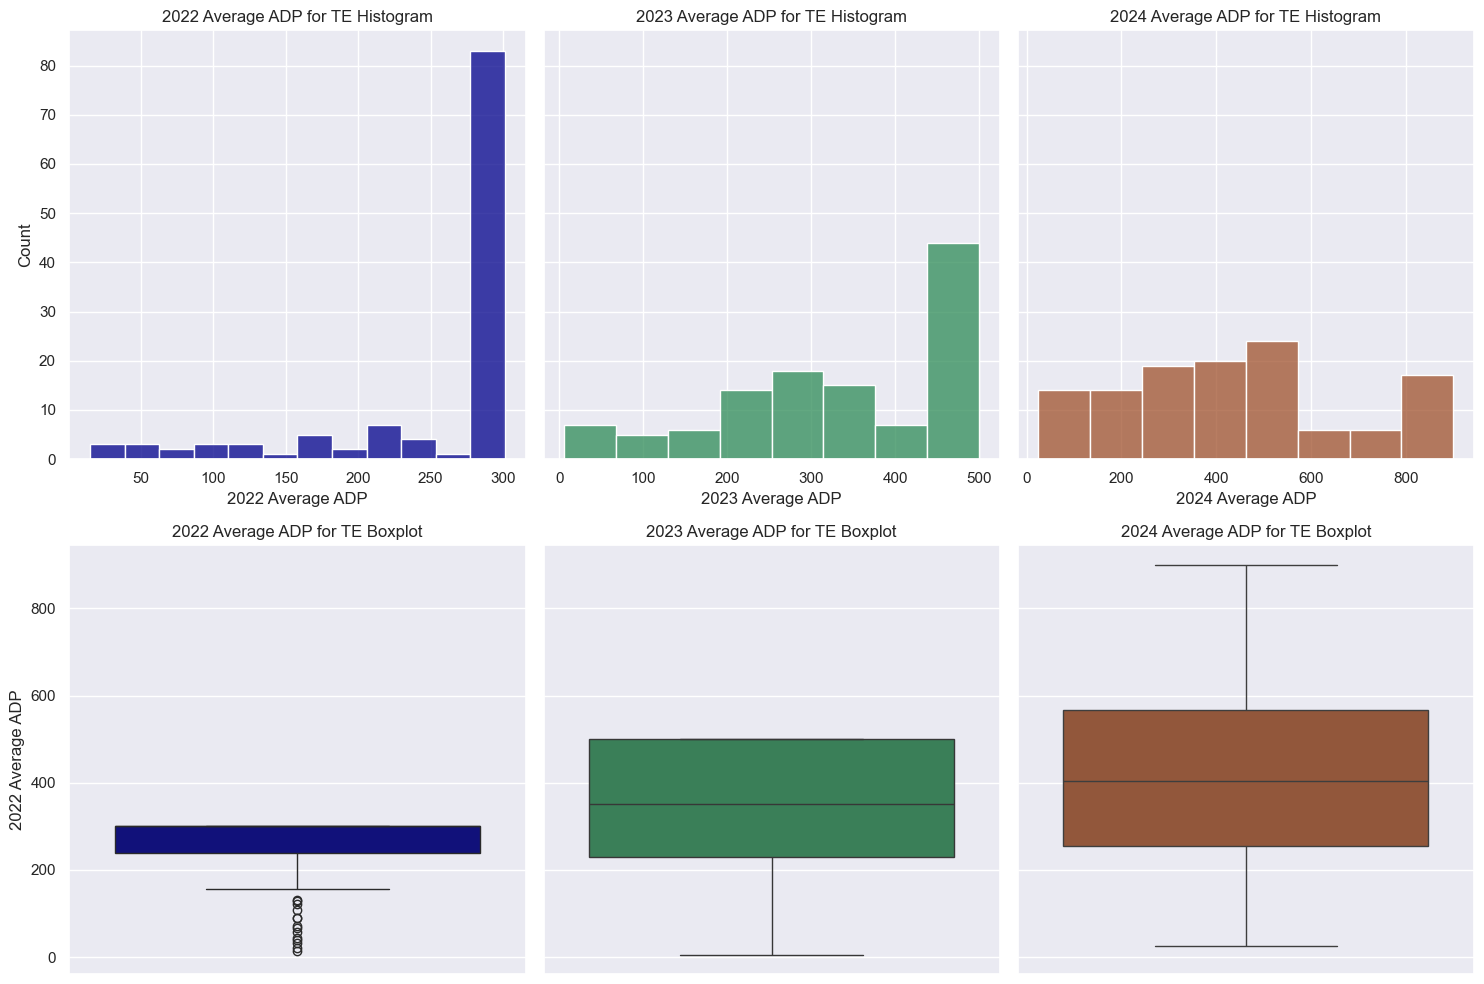

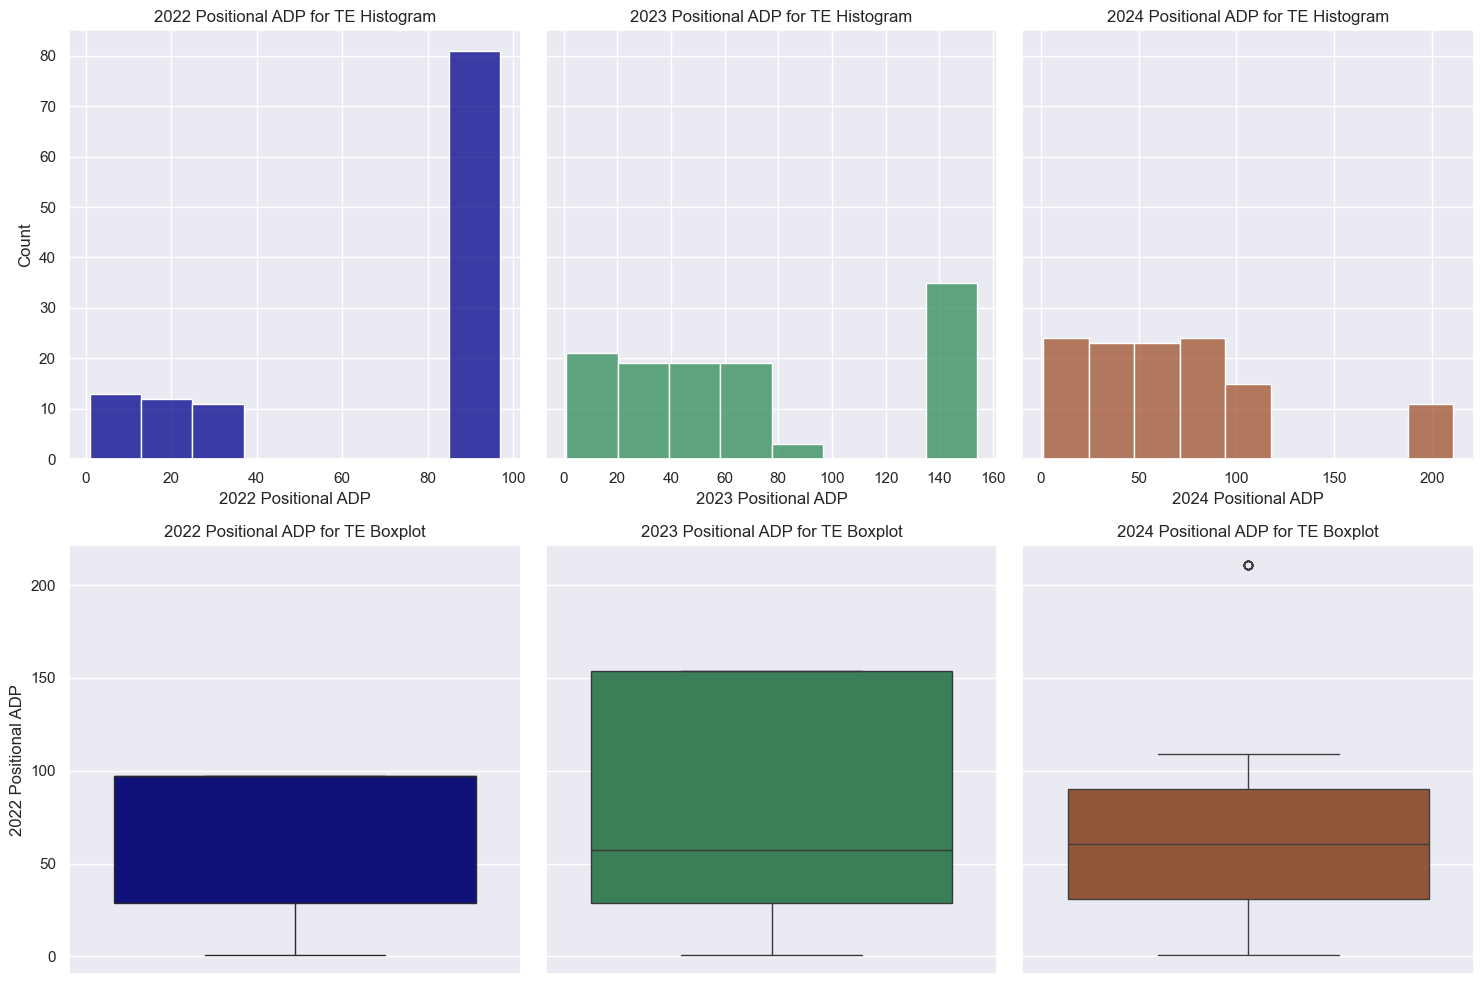

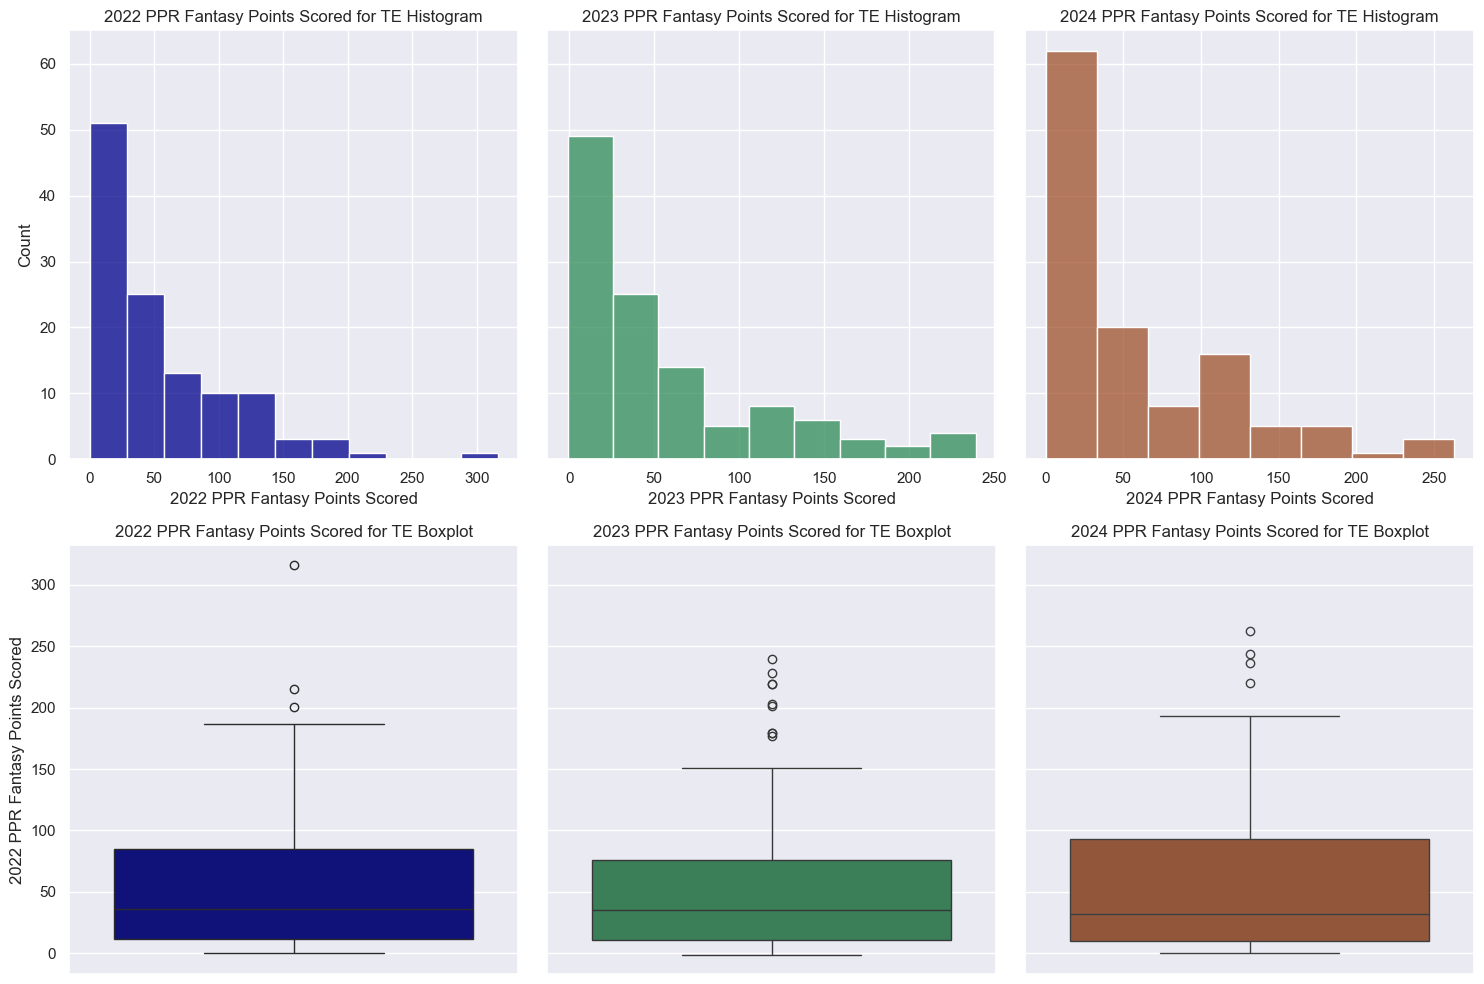

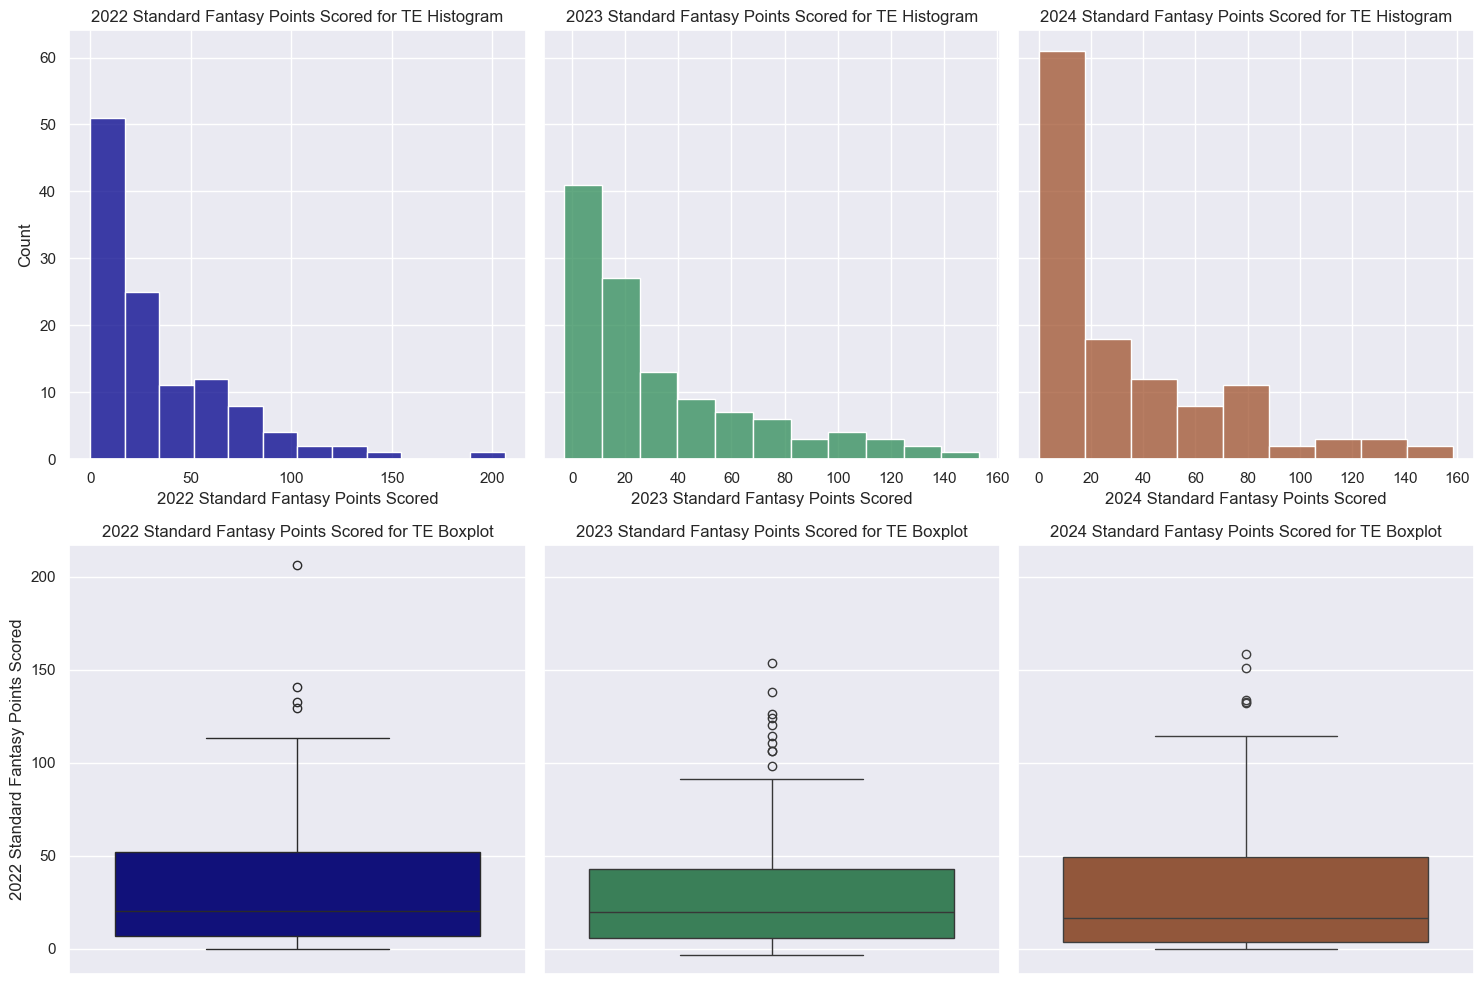

In [33]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_univar_bypos_plots(f, positions[2], save=True)

In [53]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_stats(f, positions[2])

2022 Age Max: 38.0
2022 Age Min: 22.0
2022 Age Mean: 26.23076923076923
2022 Age StDev: 2.9392266422373536

2023 Age Max: 39.0
2023 Age Min: 22.0
2023 Age Mean: 26.396551724137932
2023 Age StDev: 3.1482871926373894

2024 Age Max: 40.0
2024 Age Min: 21.0
2024 Age Mean: 26.658333333333335
2024 Age StDev: 3.1318147916006924

2022 Games Played Max: 17.0
2022 Games Played Min: 2.0
2022 Games Played Mean: 13.393162393162394
2022 Games Played StDev: 4.272666584565104

2023 Games Played Max: 17.0
2023 Games Played Min: 2.0
2023 Games Played Mean: 13.758620689655173
2023 Games Played StDev: 3.816074643361928

2024 Games Played Max: 17.0
2024 Games Played Min: 1.0
2024 Games Played Mean: 13.25
2024 Games Played StDev: 4.6551942315367825

2022 Games Started Max: 17.0
2022 Games Started Min: 0.0
2022 Games Started Mean: 6.316239316239316
2022 Games Started StDev: 5.683458638590932

2023 Games Started Max: 17.0
2023 Games Started Min: 0.0
2023 Games Started Mean: 6.594827586206897
2023 Games Started

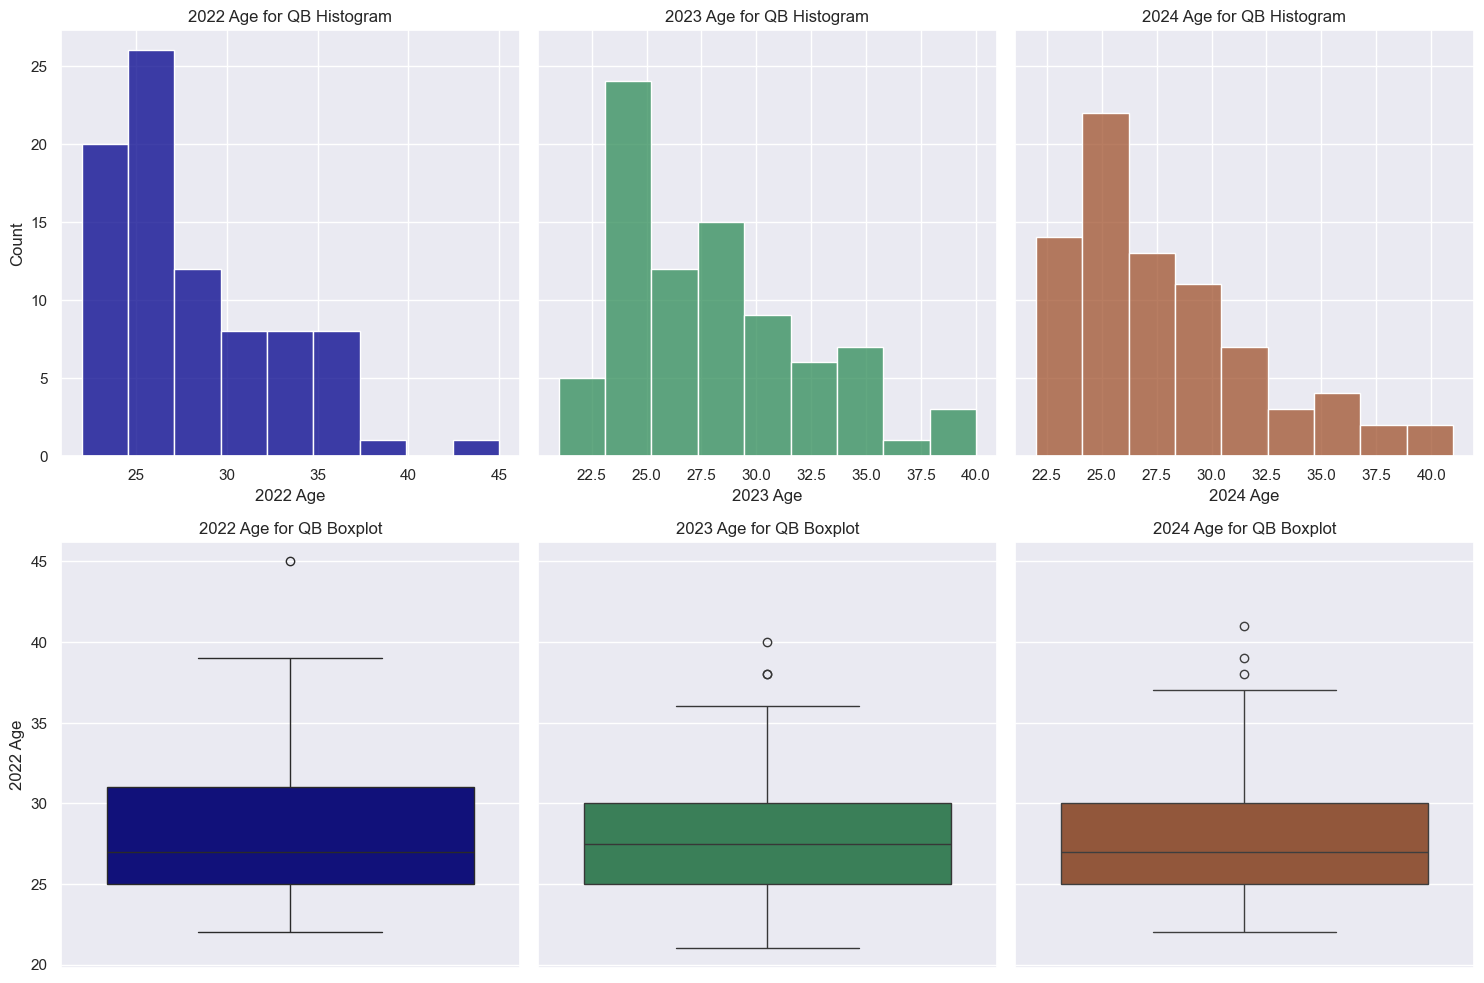

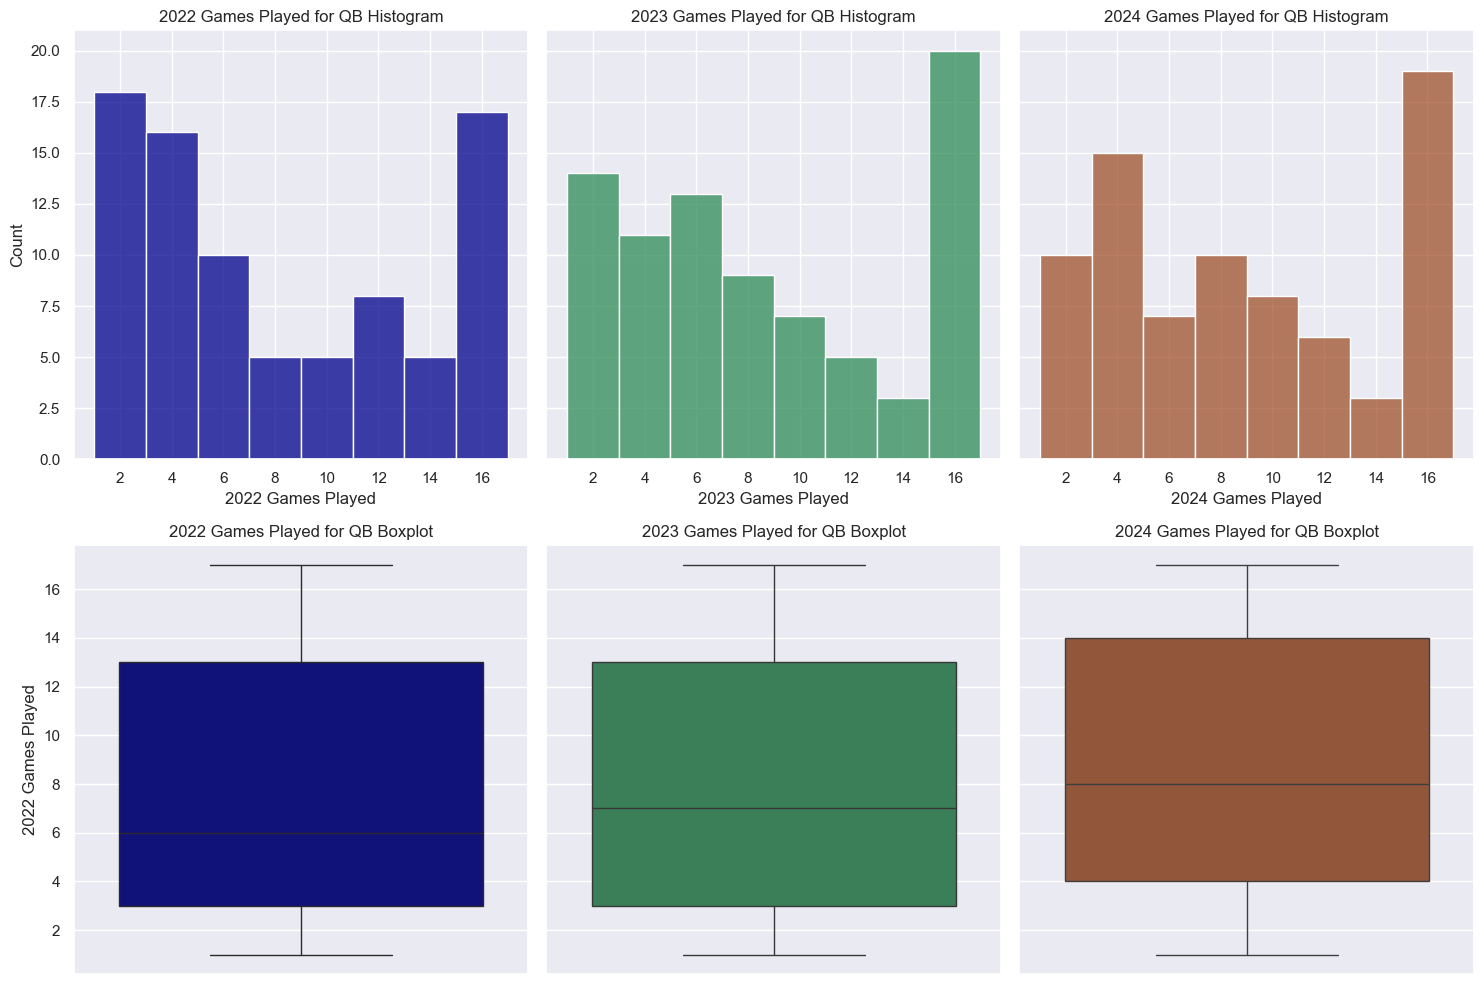

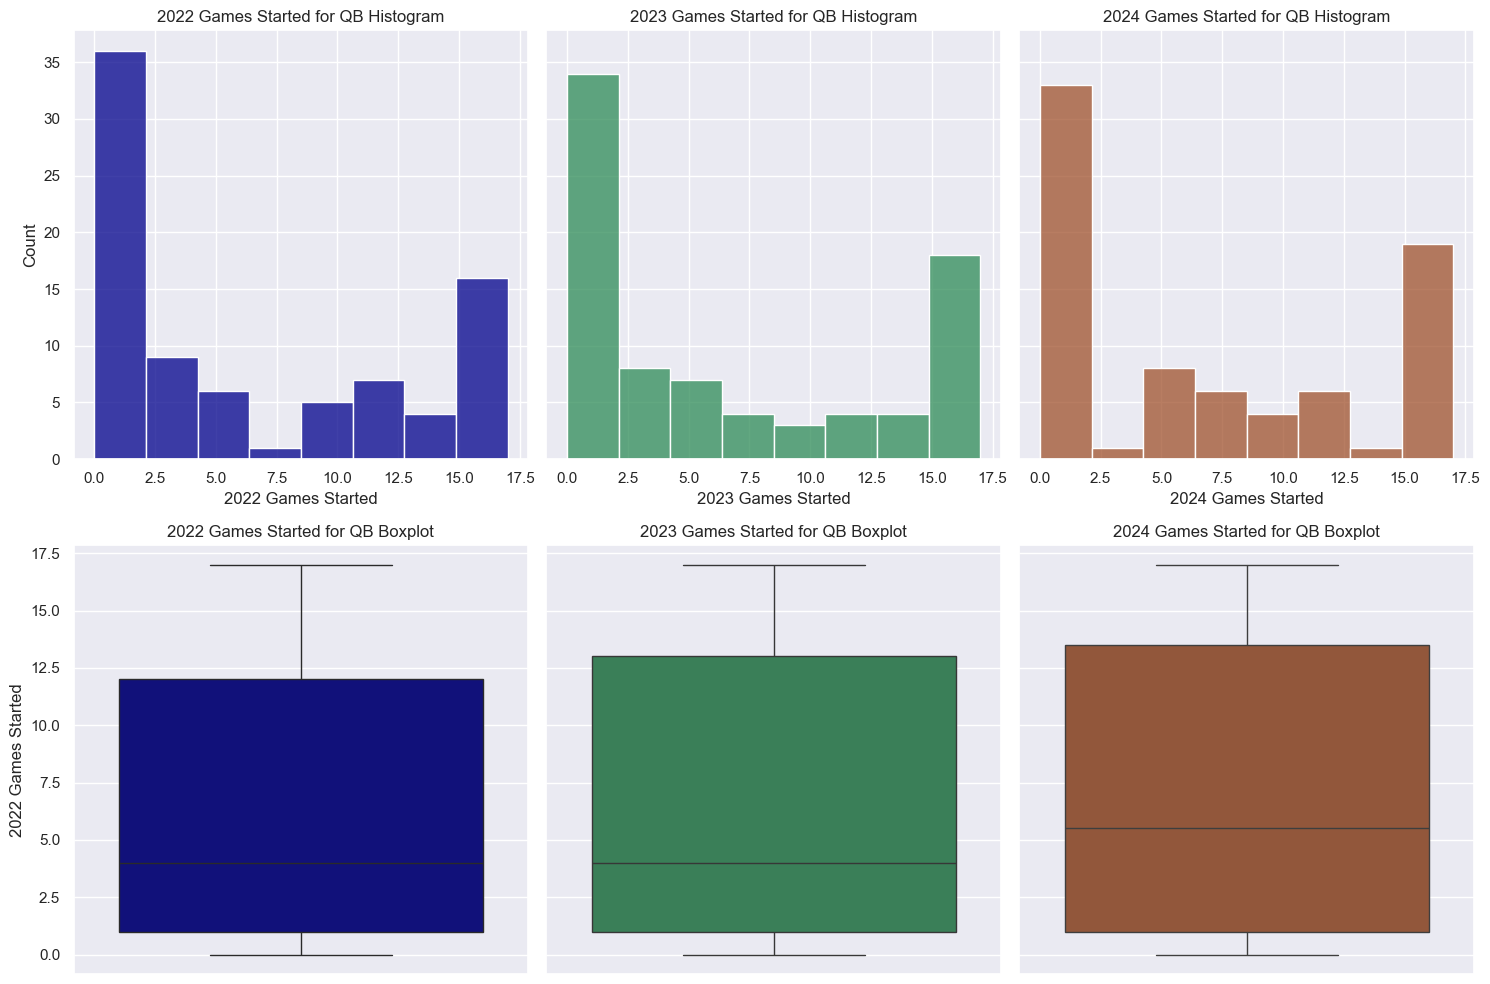

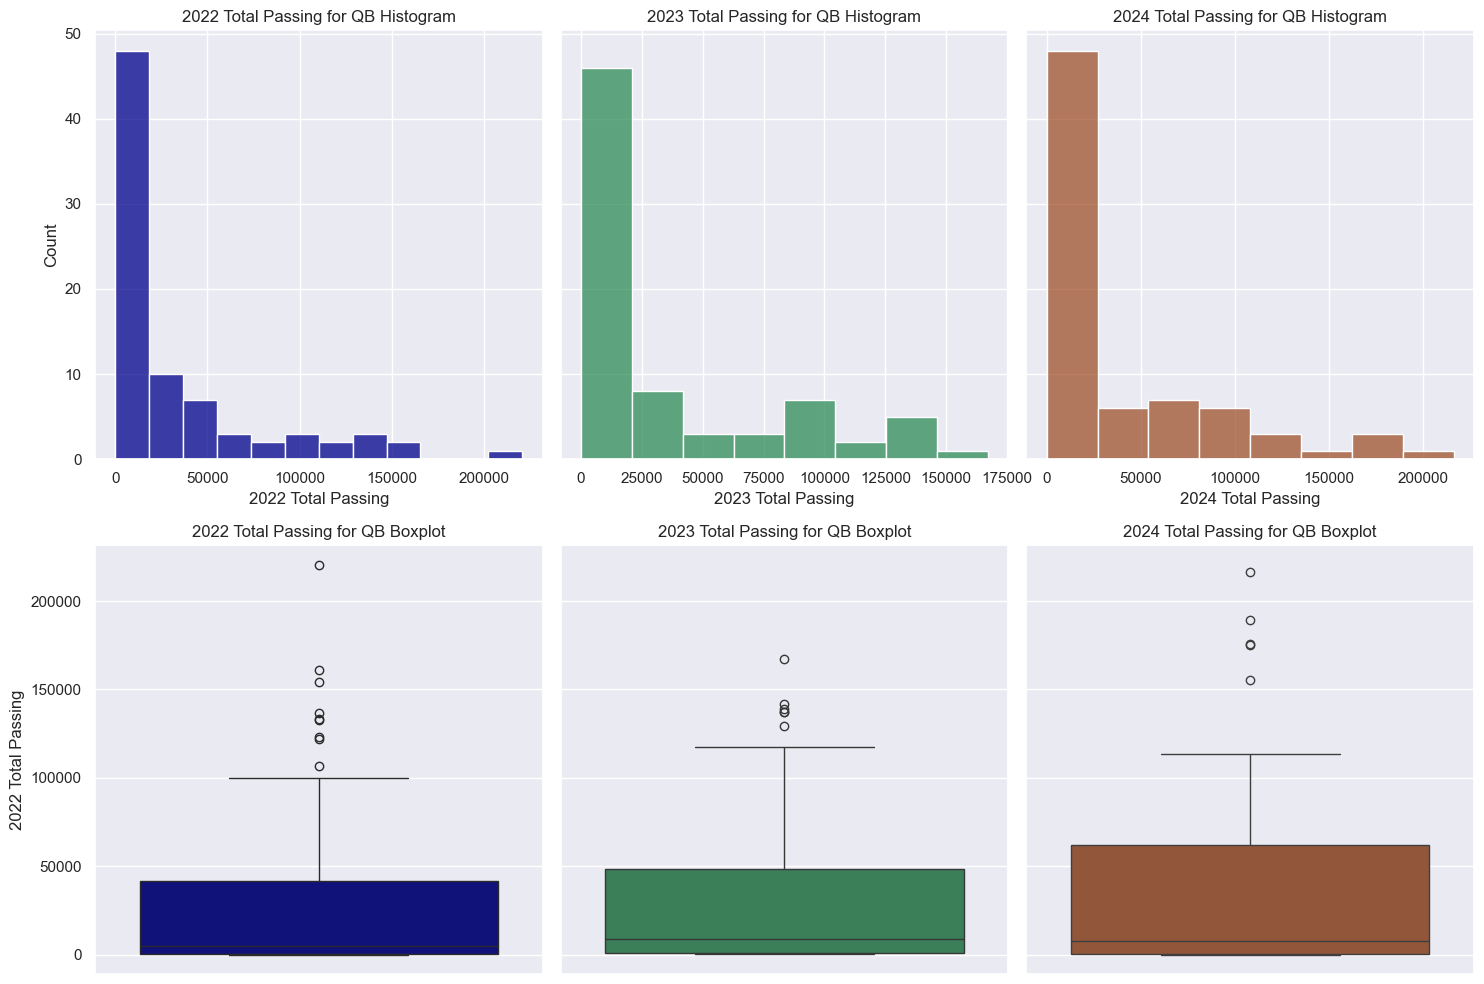

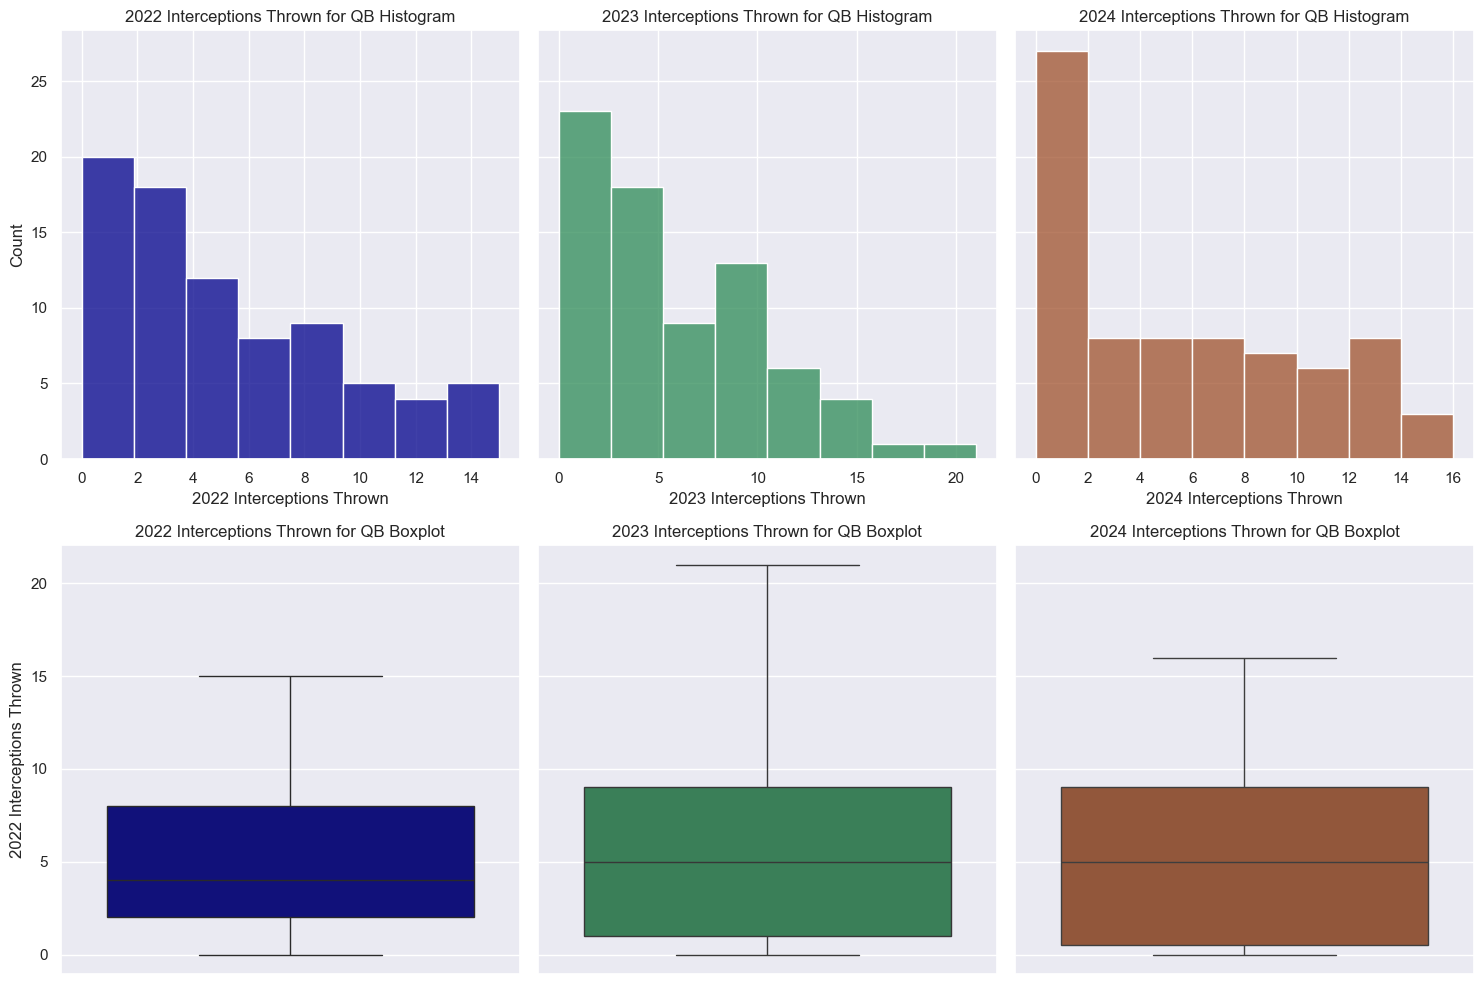

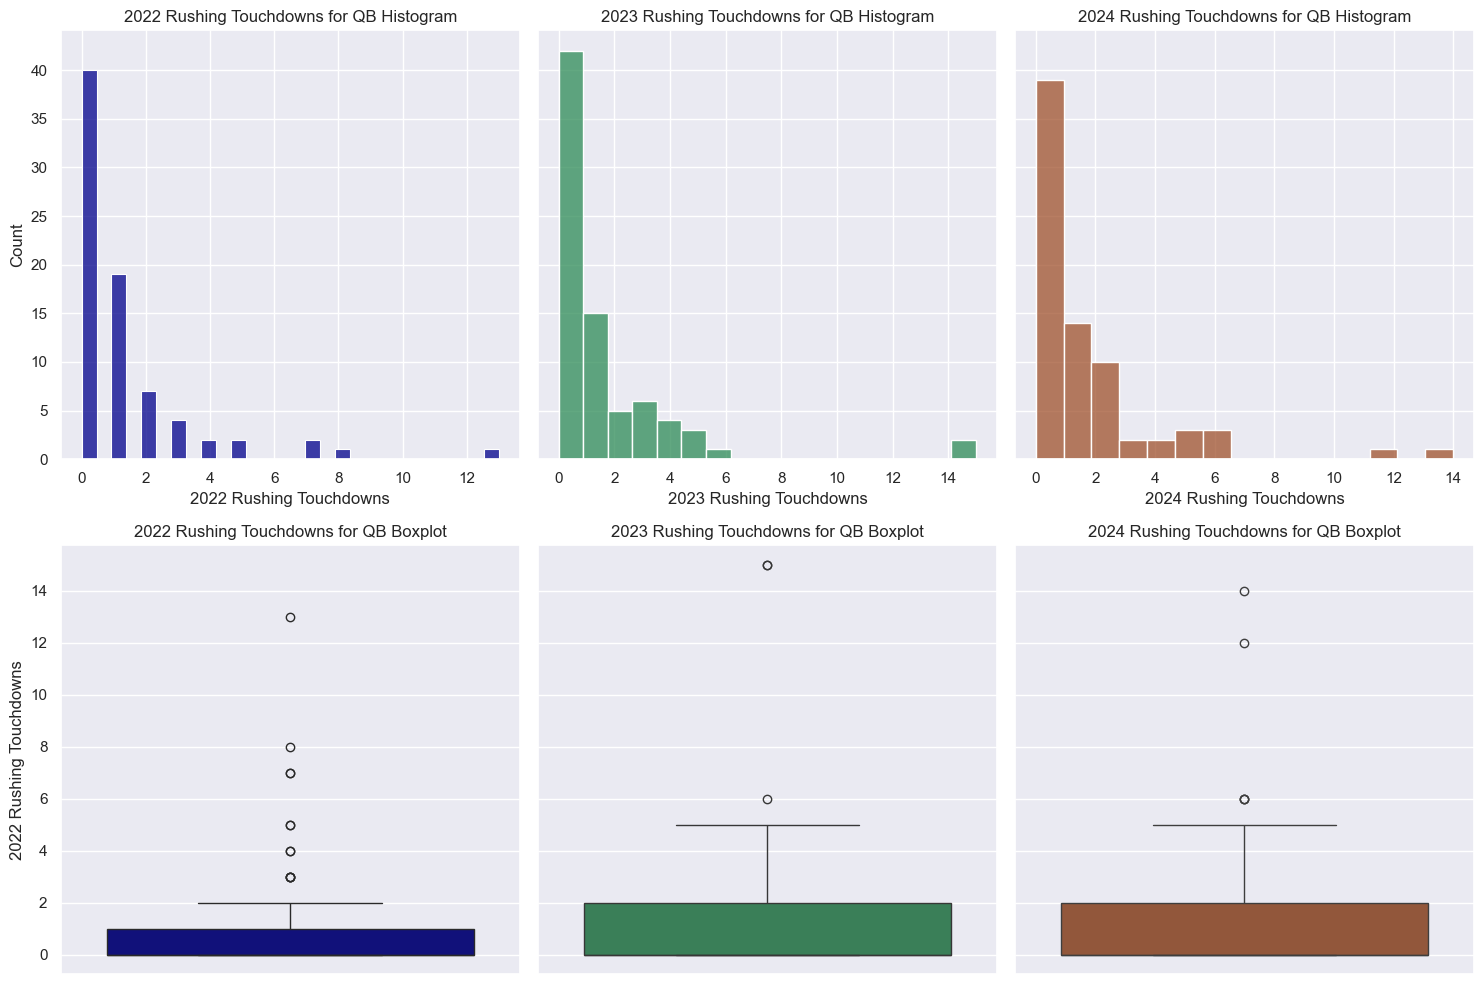

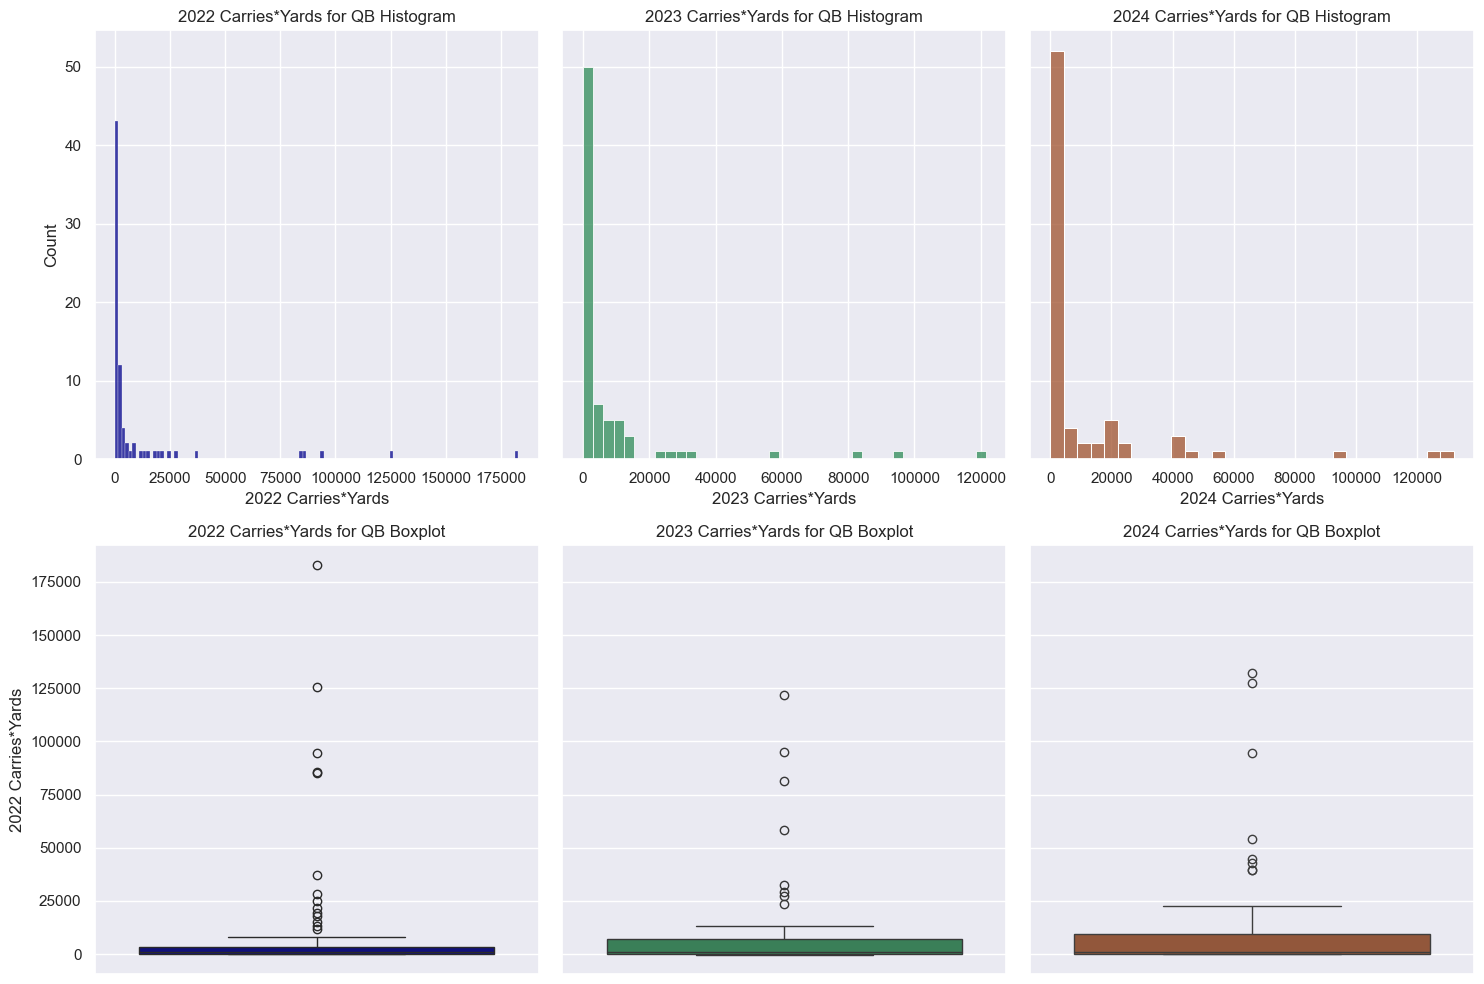

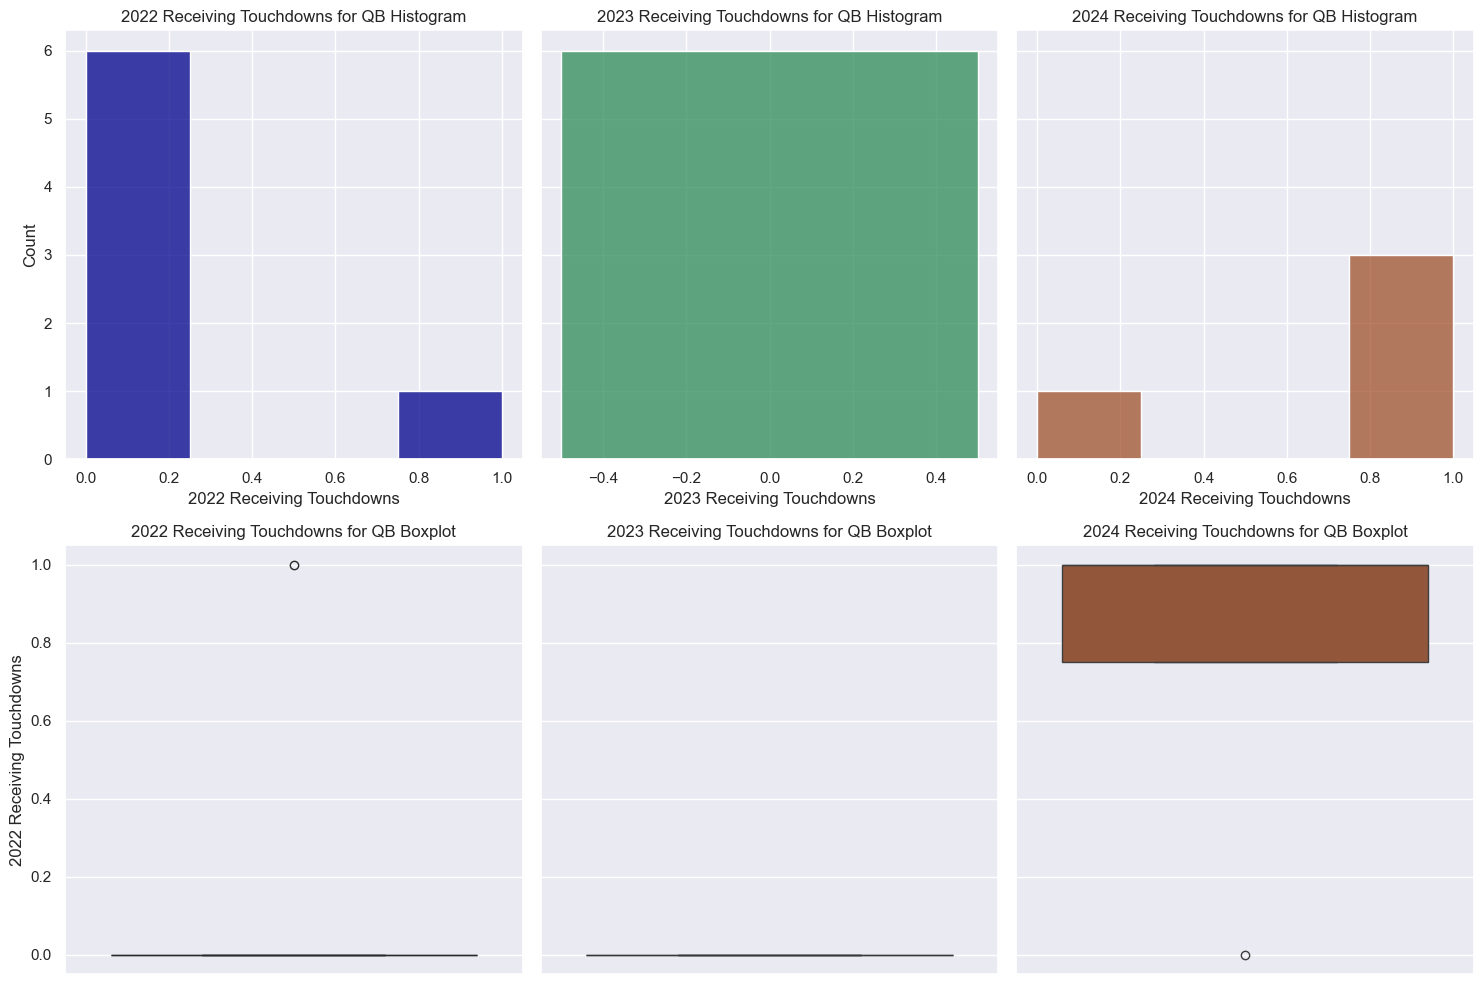

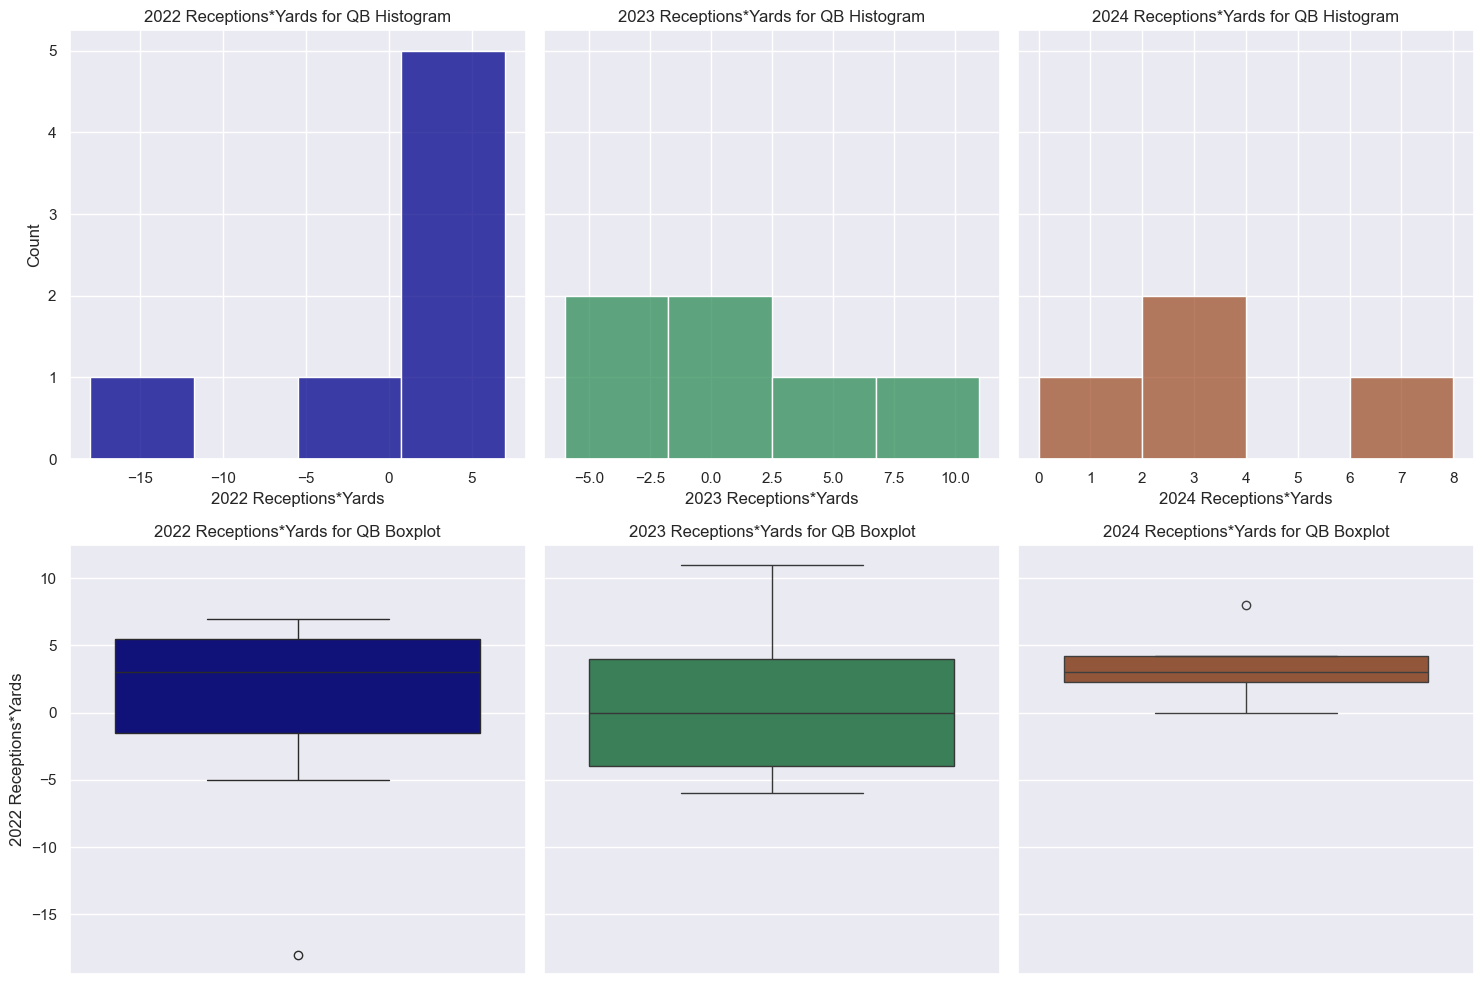

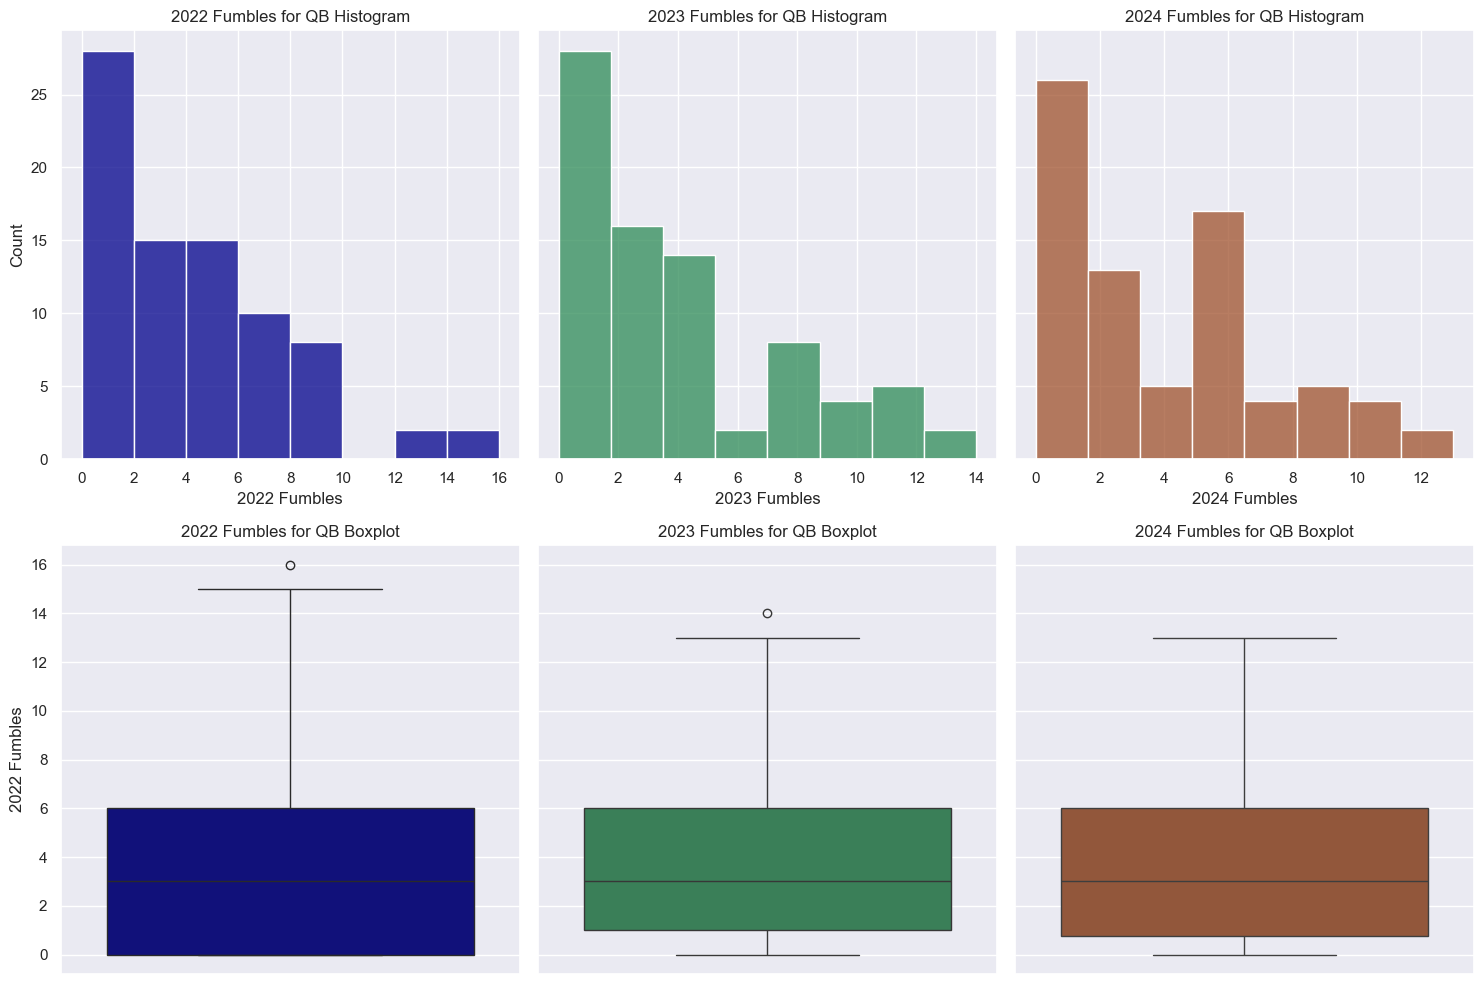

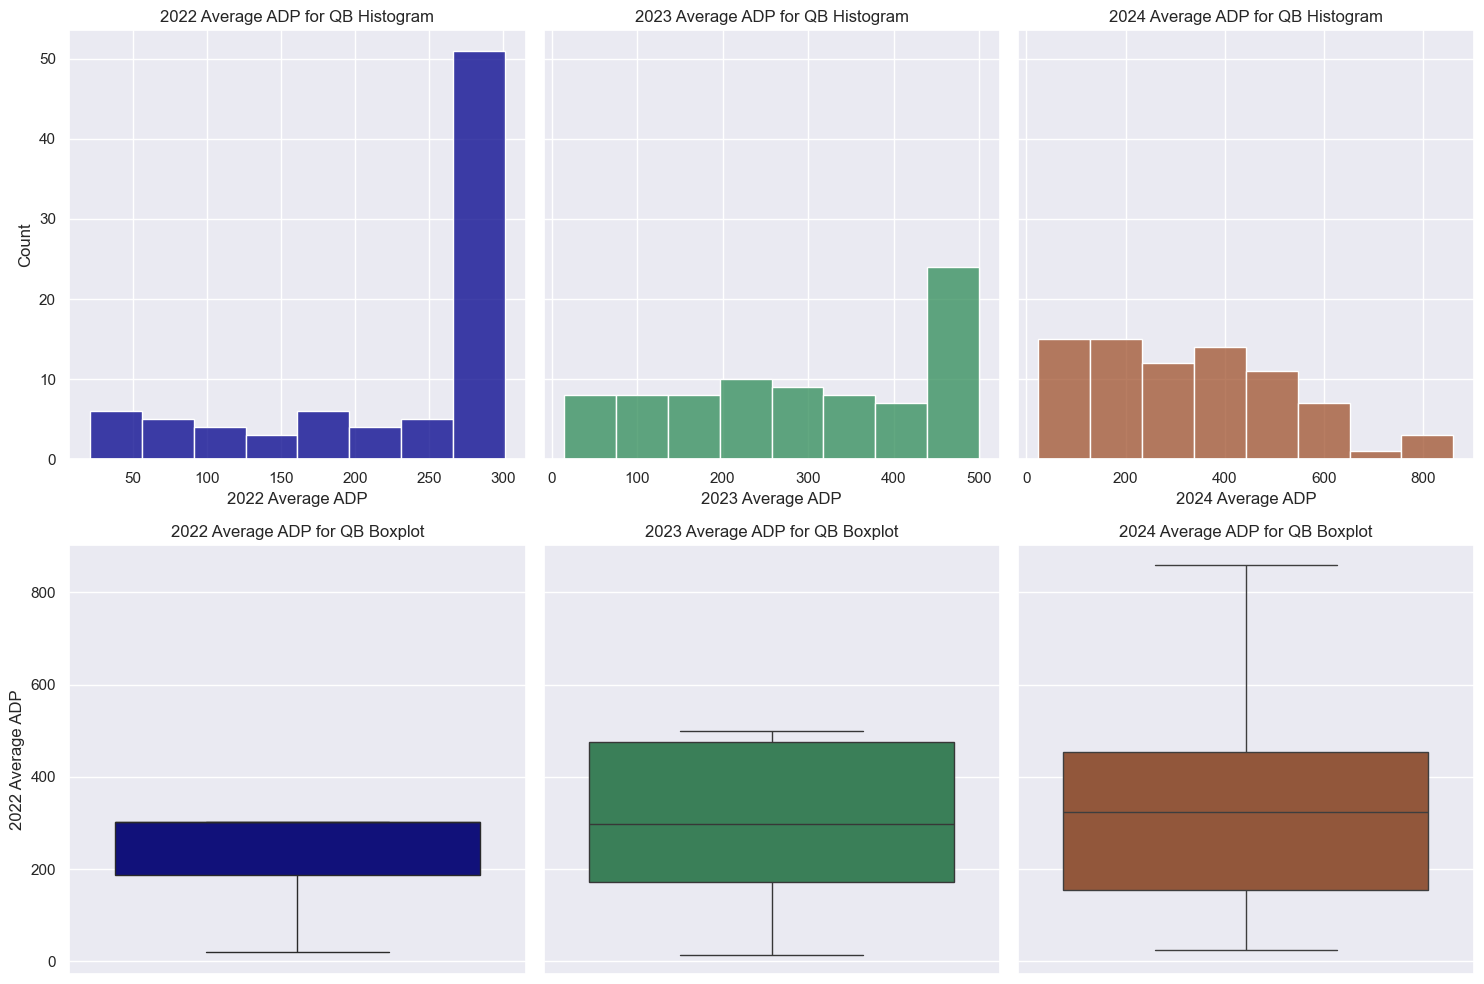

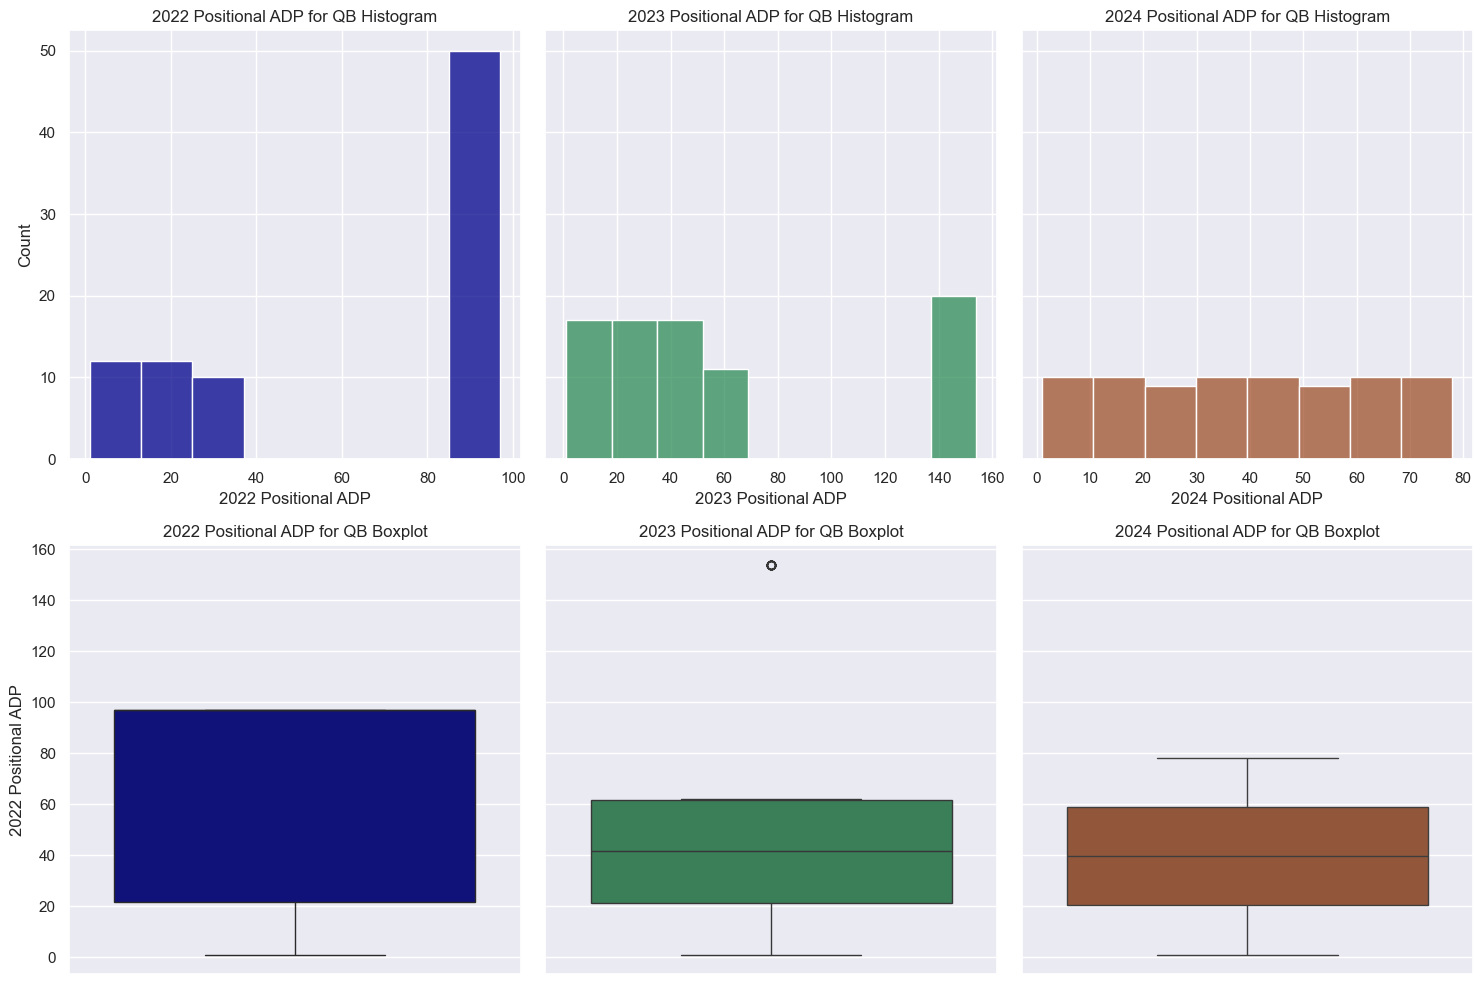

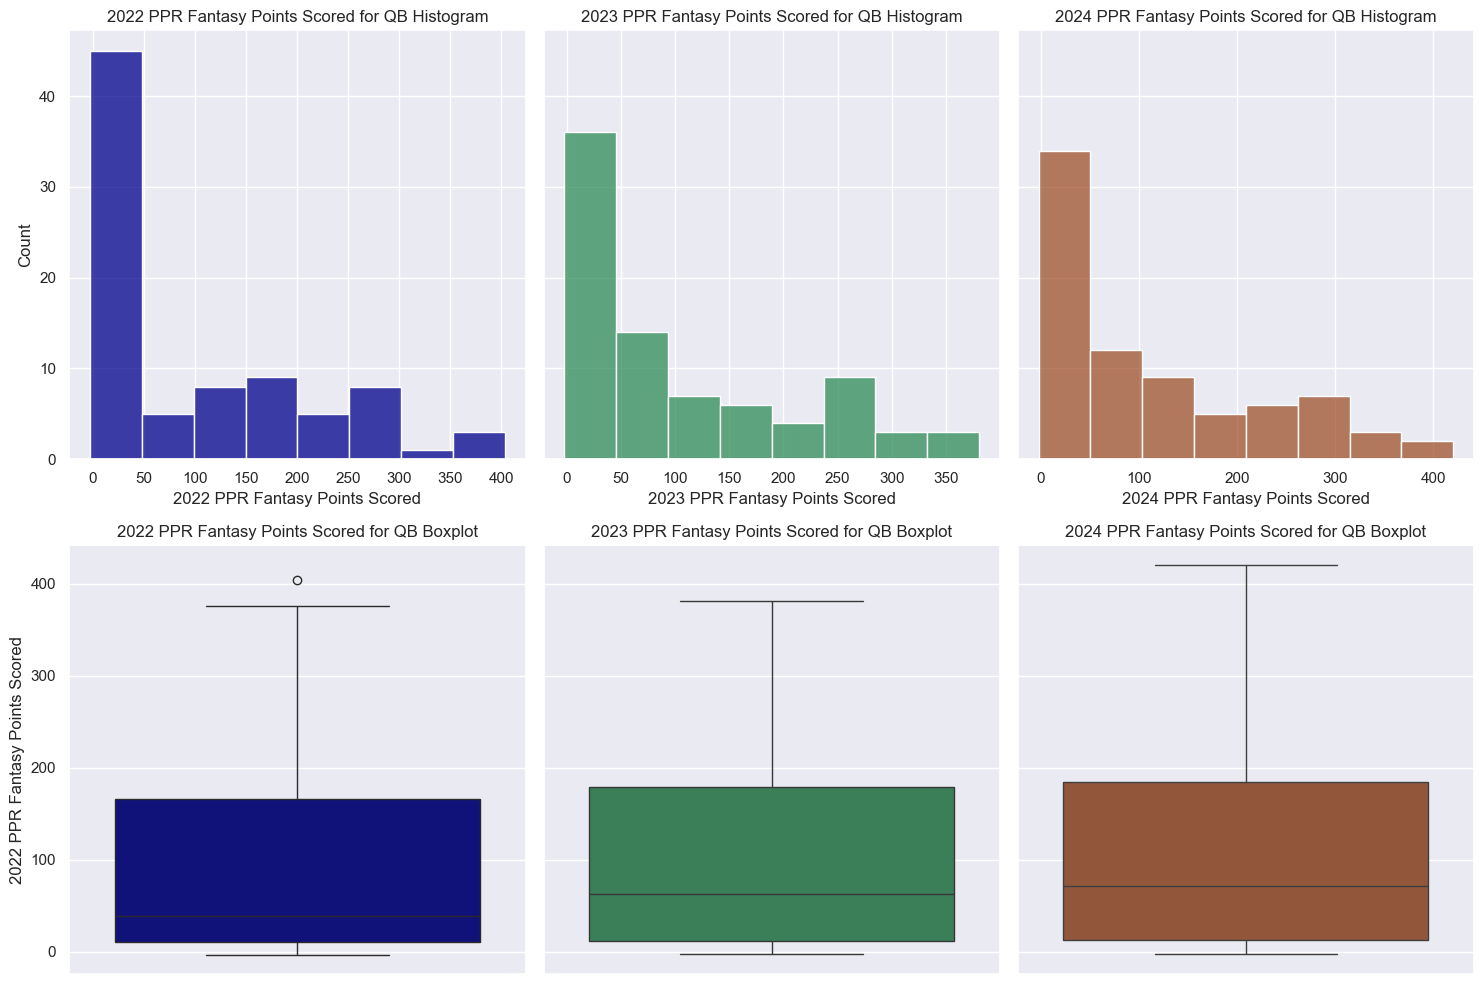

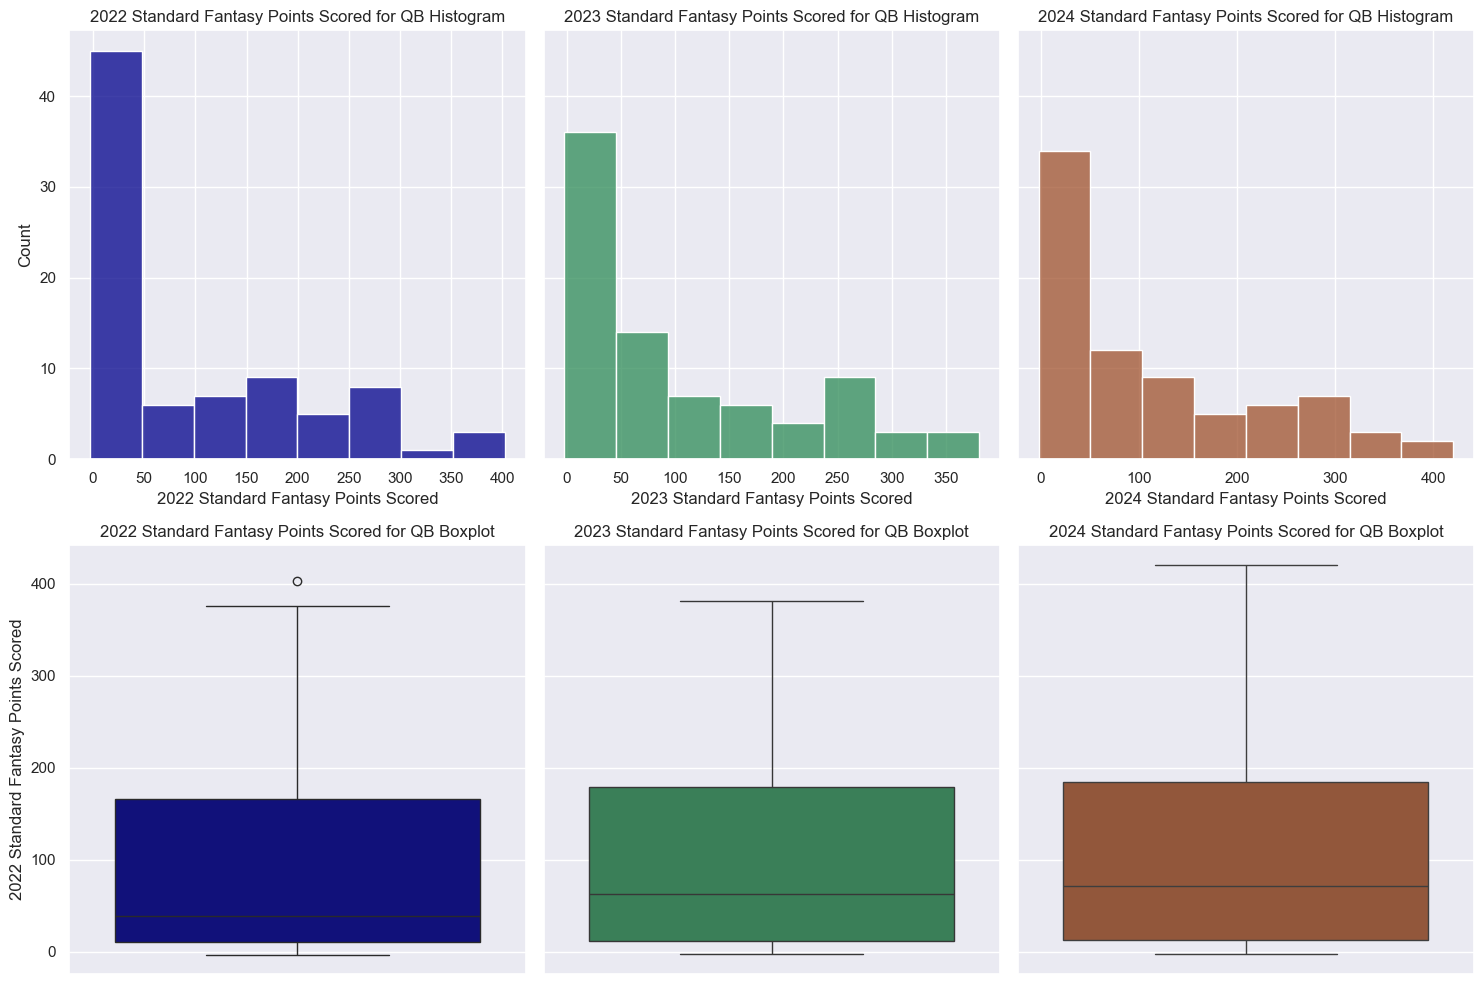

In [34]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_univar_bypos_plots(f, positions[3], save=True)

In [54]:
feature_cols = ['Age', 'Games Played', 'Games Started', 'Total Passing',
'Interceptions Thrown', 'Rushing Touchdowns', 'Carries*Yards', 'Receiving Touchdowns',
'Receptions*Yards', 'Fumbles', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_stats(f, positions[3])

2022 Age Max: 45.0
2022 Age Min: 22.0
2022 Age Mean: 28.357142857142858
2022 Age StDev: 4.643589685799988

2023 Age Max: 40.0
2023 Age Min: 21.0
2023 Age Mean: 28.158536585365855
2023 Age StDev: 4.10671523891535

2024 Age Max: 41.0
2024 Age Min: 22.0
2024 Age Mean: 28.076923076923077
2024 Age StDev: 4.144100628571158

2022 Games Played Max: 17.0
2022 Games Played Min: 1.0
2022 Games Played Mean: 7.833333333333333
2022 Games Played StDev: 5.494224962313424

2023 Games Played Max: 17.0
2023 Games Played Min: 1.0
2023 Games Played Mean: 8.317073170731707
2023 Games Played StDev: 5.463577959231228

2024 Games Played Max: 17.0
2024 Games Played Min: 1.0
2024 Games Played Mean: 8.756410256410257
2024 Games Played StDev: 5.510330385729589

2022 Games Started Max: 17.0
2022 Games Started Min: 0.0
2022 Games Started Mean: 6.5
2022 Games Started StDev: 6.15184834787384

2023 Games Started Max: 17.0
2023 Games Started Min: 0.0
2023 Games Started Mean: 6.634146341463414
2023 Games Started StDev: 6

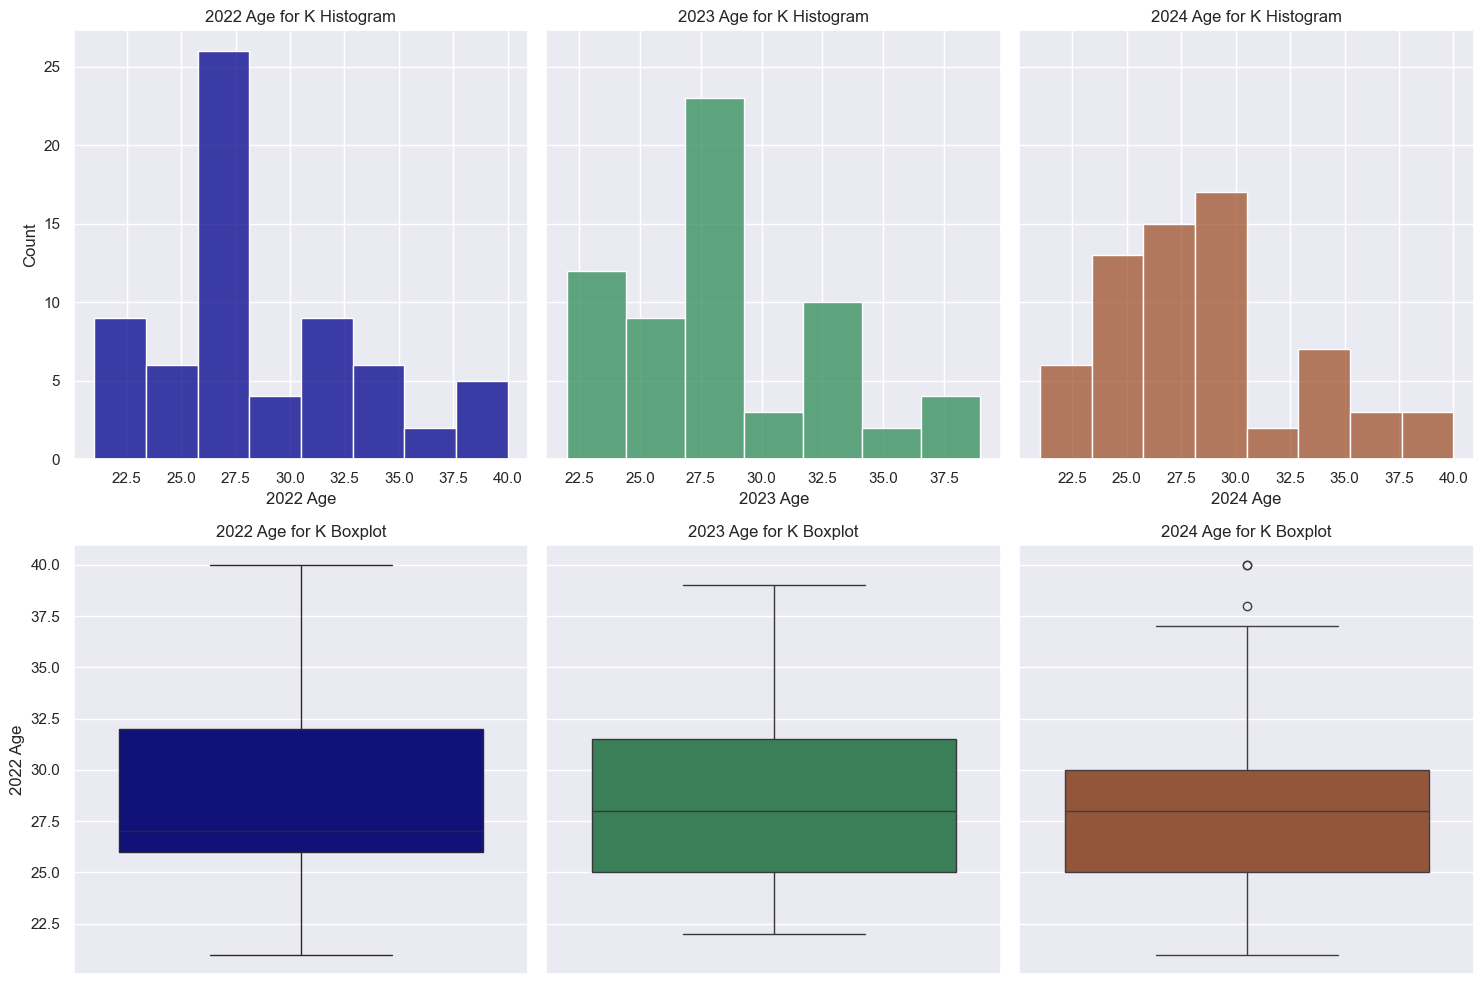

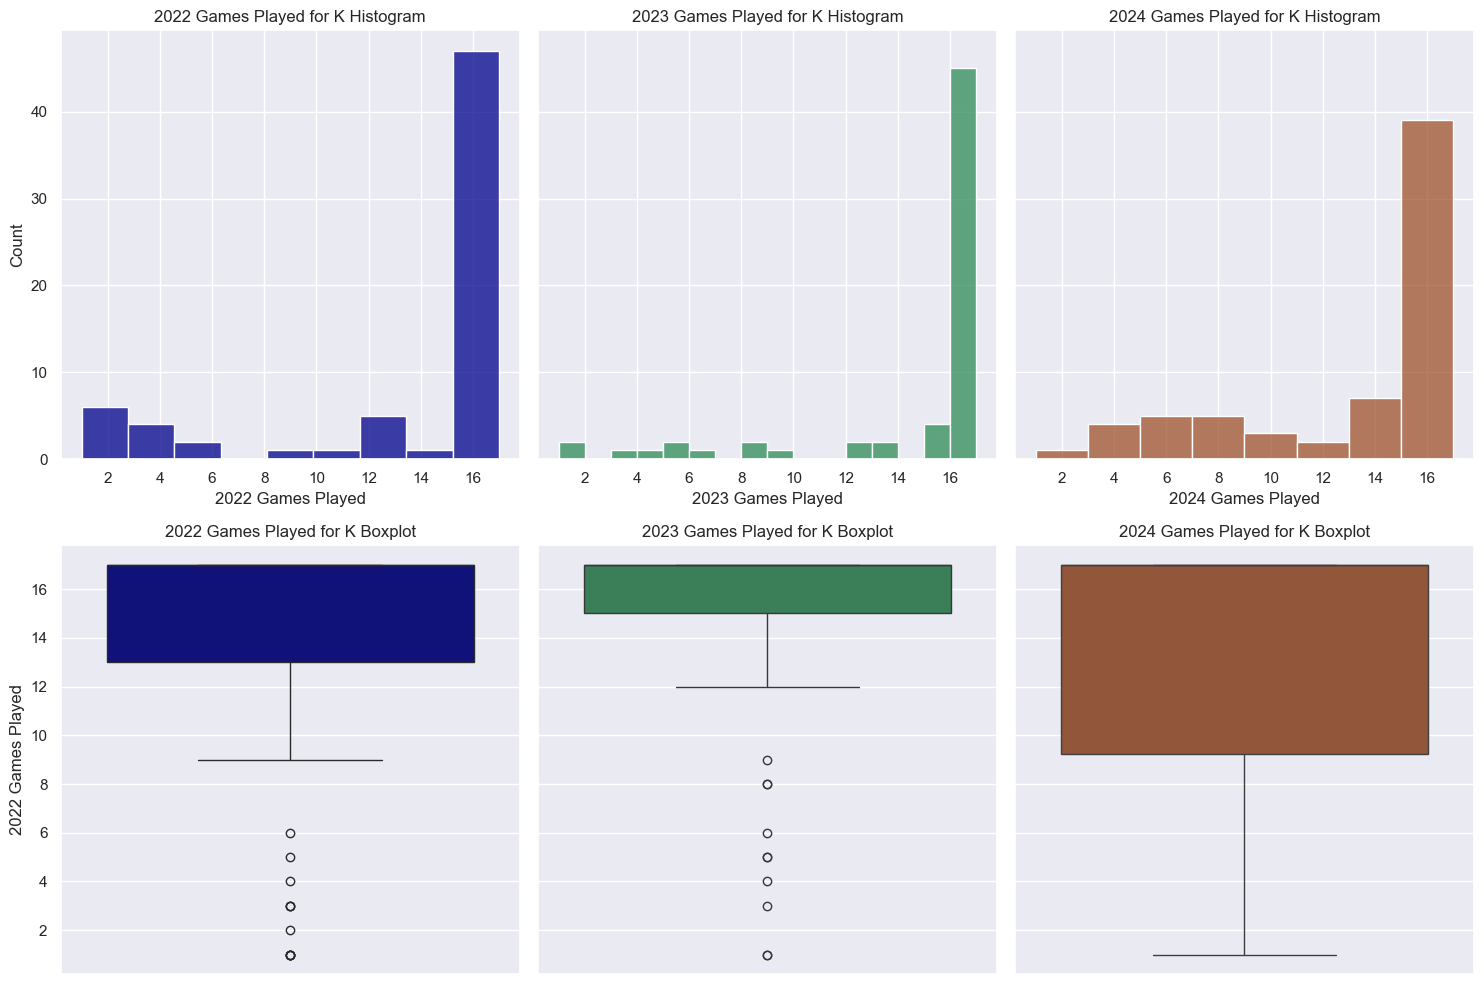

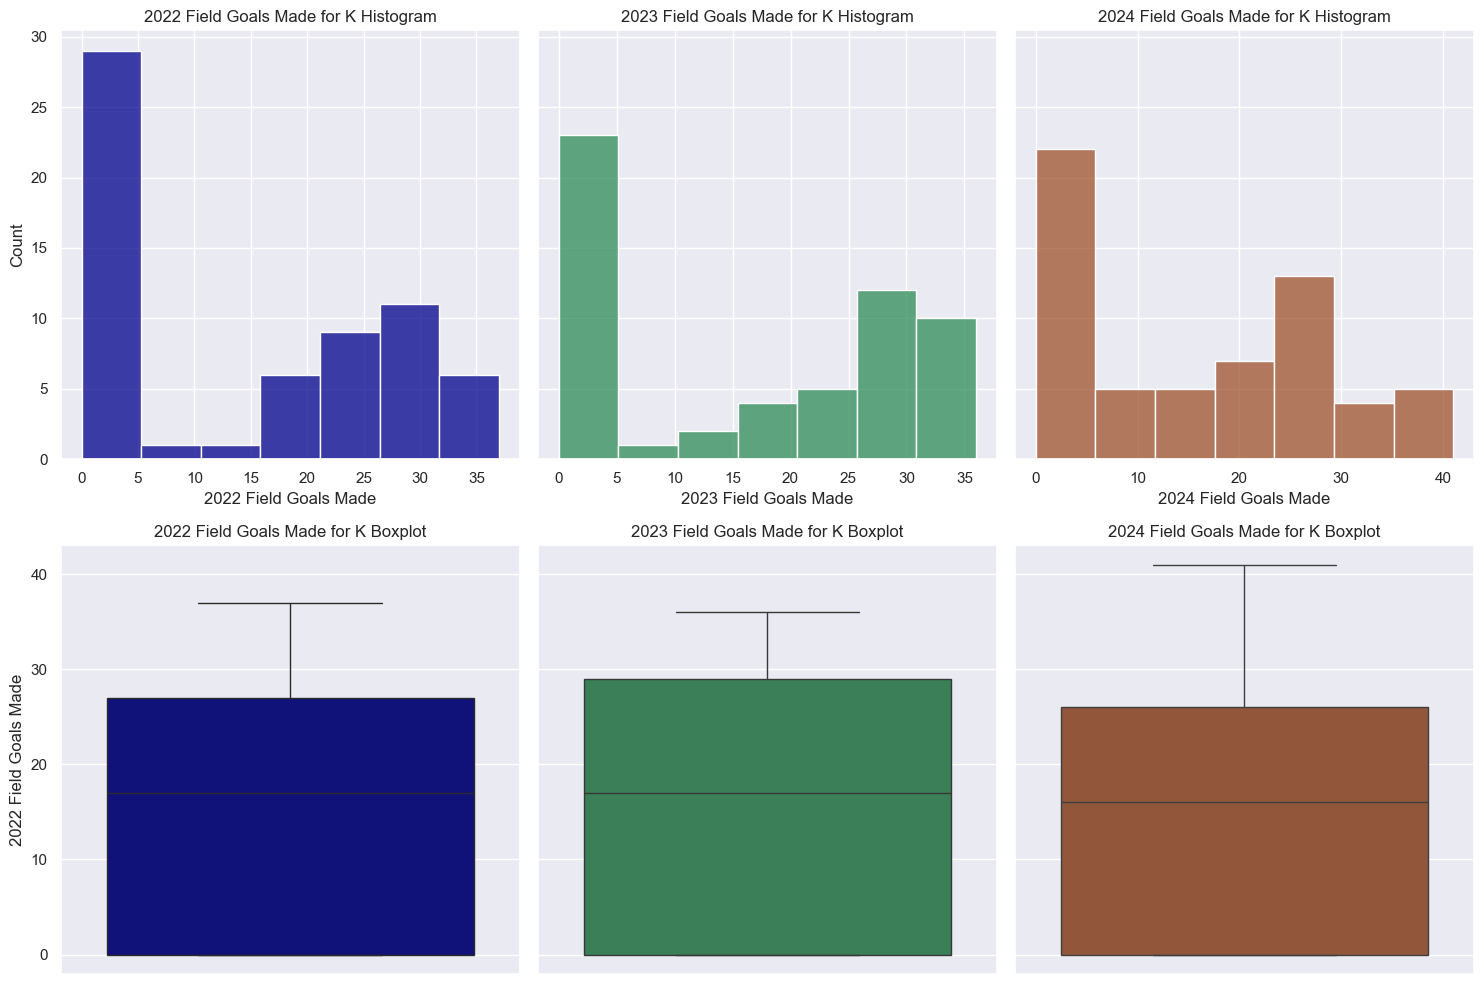

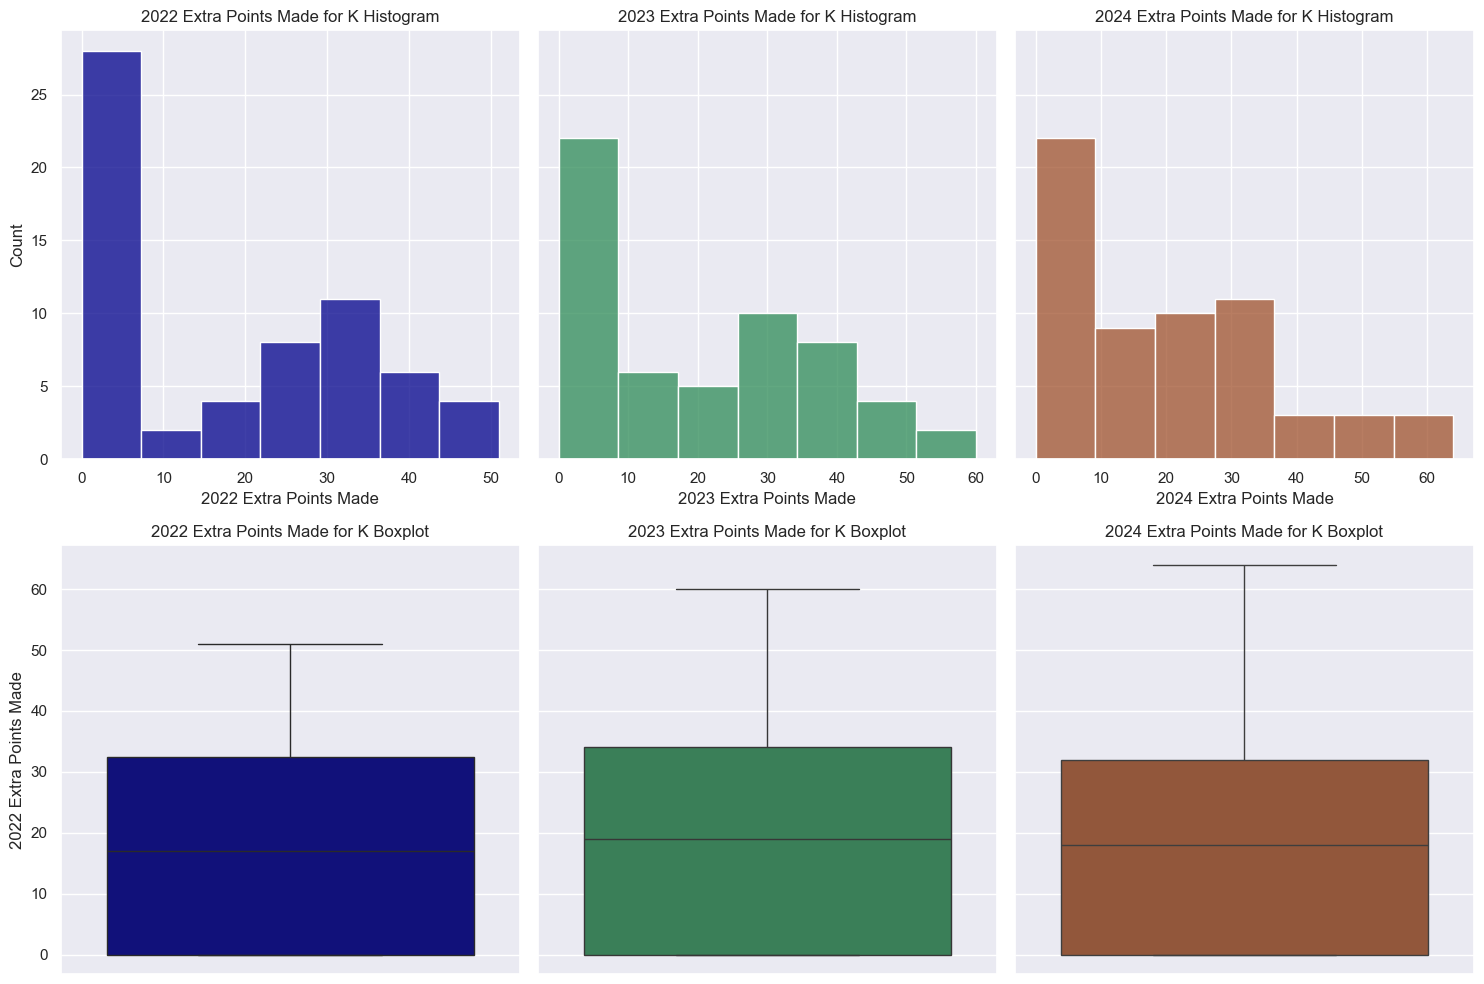

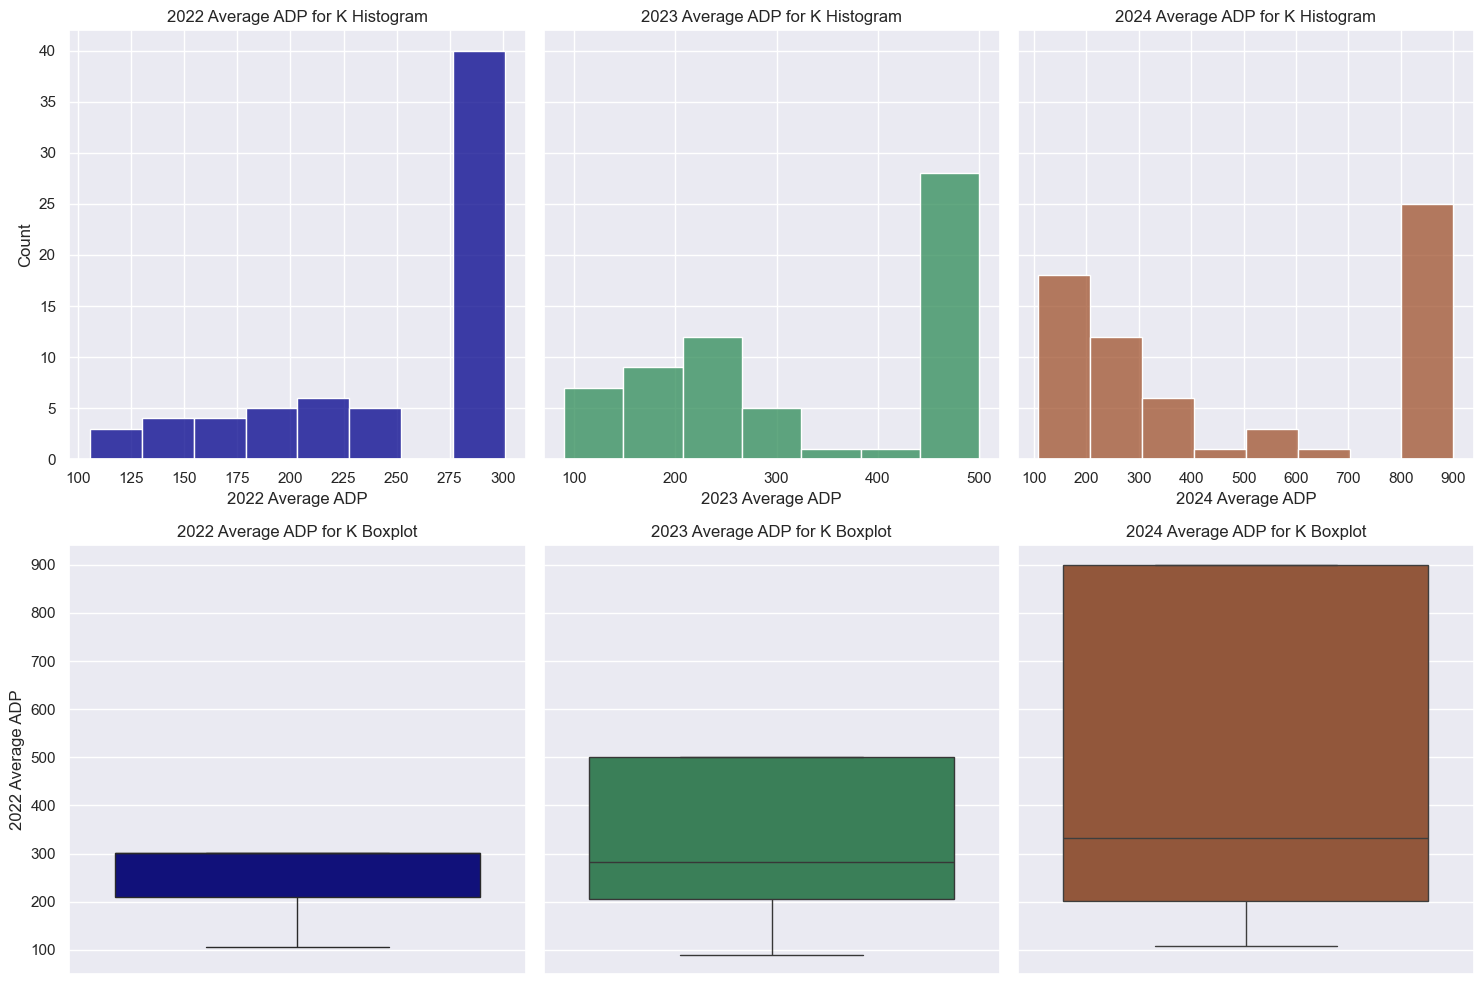

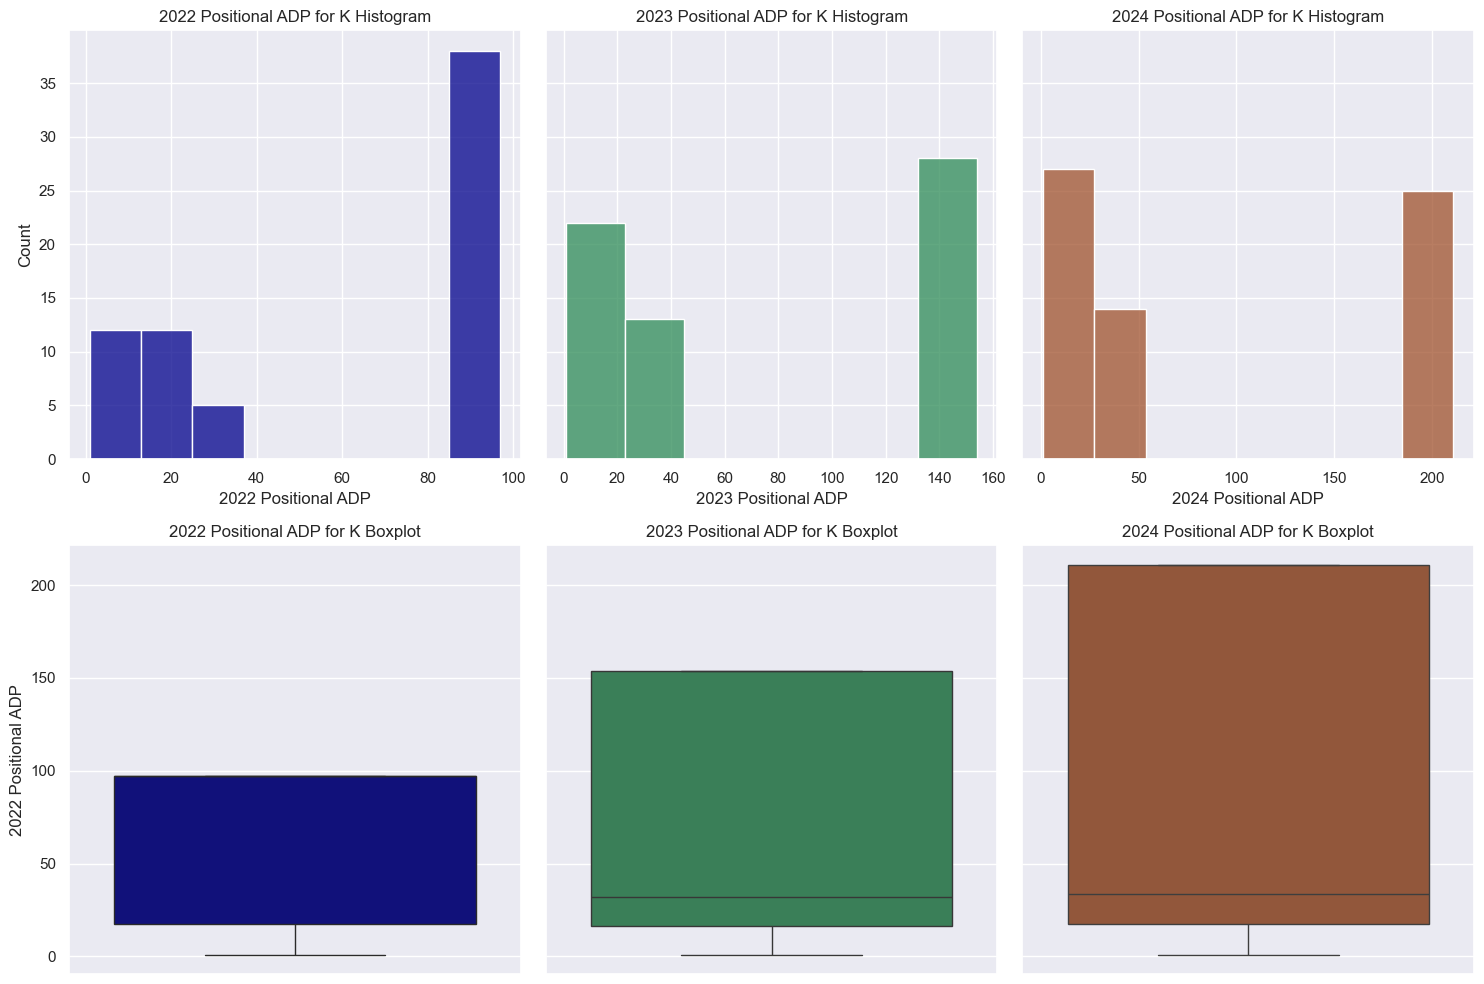

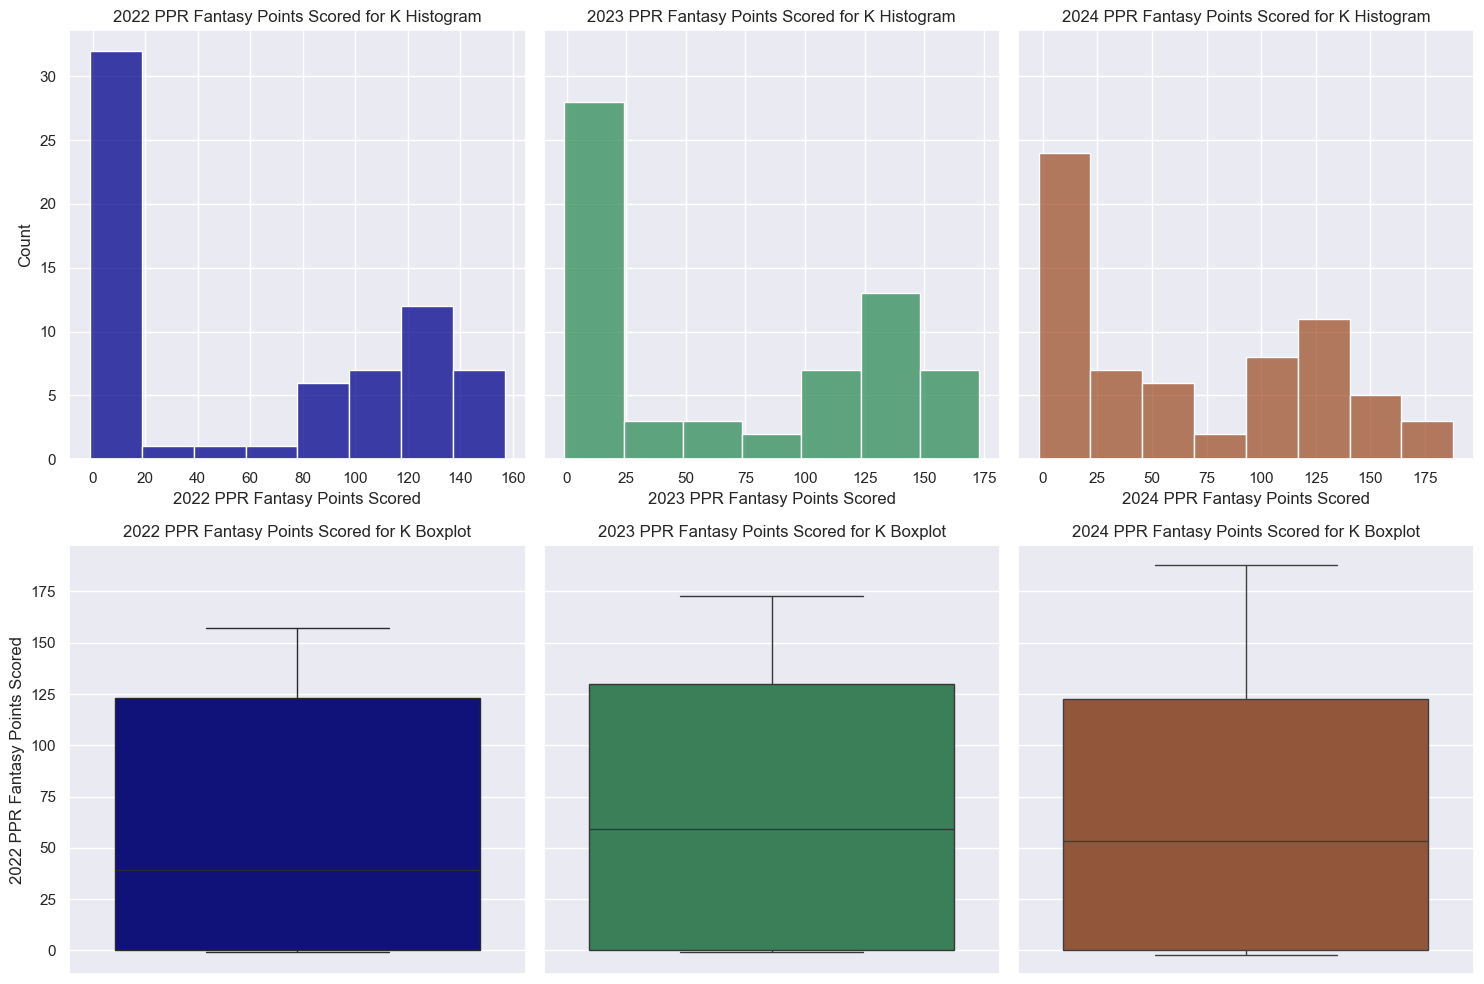

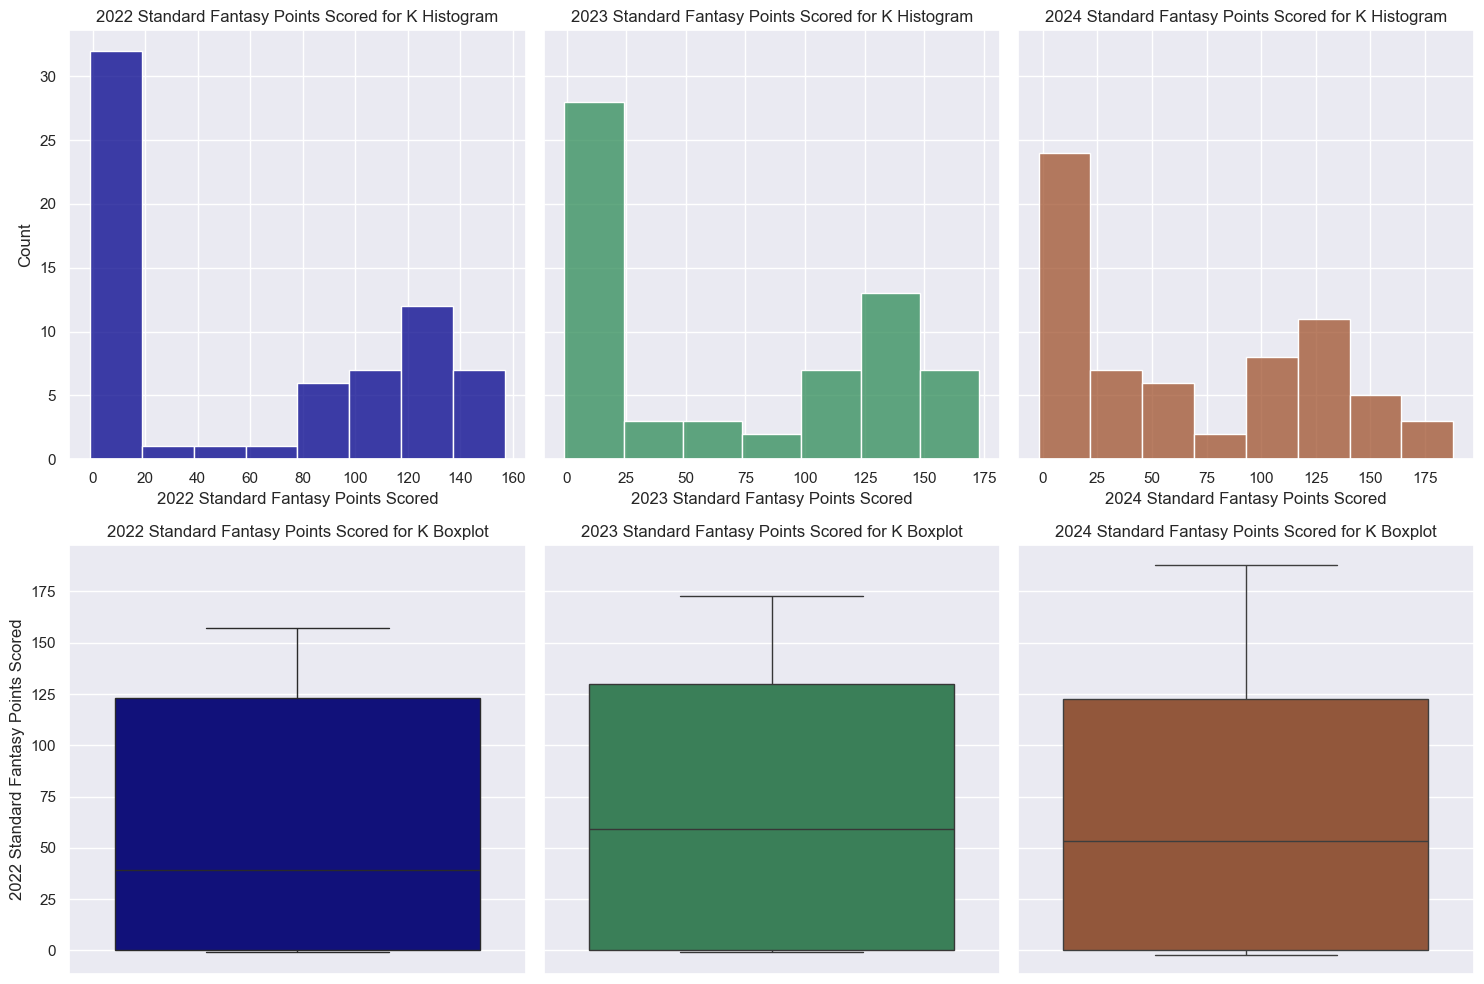

In [35]:
feature_cols = ['Age', 'Games Played', 'Field Goals Made', 'Extra Points Made',
                'Average ADP', 'Positional ADP', 'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_univar_bypos_plots(f, positions[4], save=True)

In [55]:
feature_cols = ['Age', 'Games Played', 'Field Goals Made', 'Extra Points Made',
                'Average ADP', 'Positional ADP', 'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_stats(f, positions[4])

2022 Age Max: 40.0
2022 Age Min: 21.0
2022 Age Mean: 28.686567164179106
2022 Age StDev: 4.571844251221741

2023 Age Max: 39.0
2023 Age Min: 22.0
2023 Age Mean: 28.61904761904762
2023 Age StDev: 4.221744811295523

2024 Age Max: 40.0
2024 Age Min: 21.0
2024 Age Mean: 28.636363636363637
2024 Age StDev: 4.287530770757551

2022 Games Played Max: 17.0
2022 Games Played Min: 1.0
2022 Games Played Mean: 13.776119402985074
2022 Games Played StDev: 5.503922334151327

2023 Games Played Max: 17.0
2023 Games Played Min: 1.0
2023 Games Played Mean: 14.65079365079365
2023 Games Played StDev: 4.479791414357386

2024 Games Played Max: 17.0
2024 Games Played Min: 1.0
2024 Games Played Mean: 13.43939393939394
2024 Games Played StDev: 4.837131593923506

2022 Field Goals Made Max: 37.0
2022 Field Goals Made Min: 0.0
2022 Field Goals Made Mean: 13.477611940298507
2022 Field Goals Made StDev: 13.315189630425312

2023 Field Goals Made Max: 36.0
2023 Field Goals Made Min: 0.0
2023 Field Goals Made Mean: 14.444

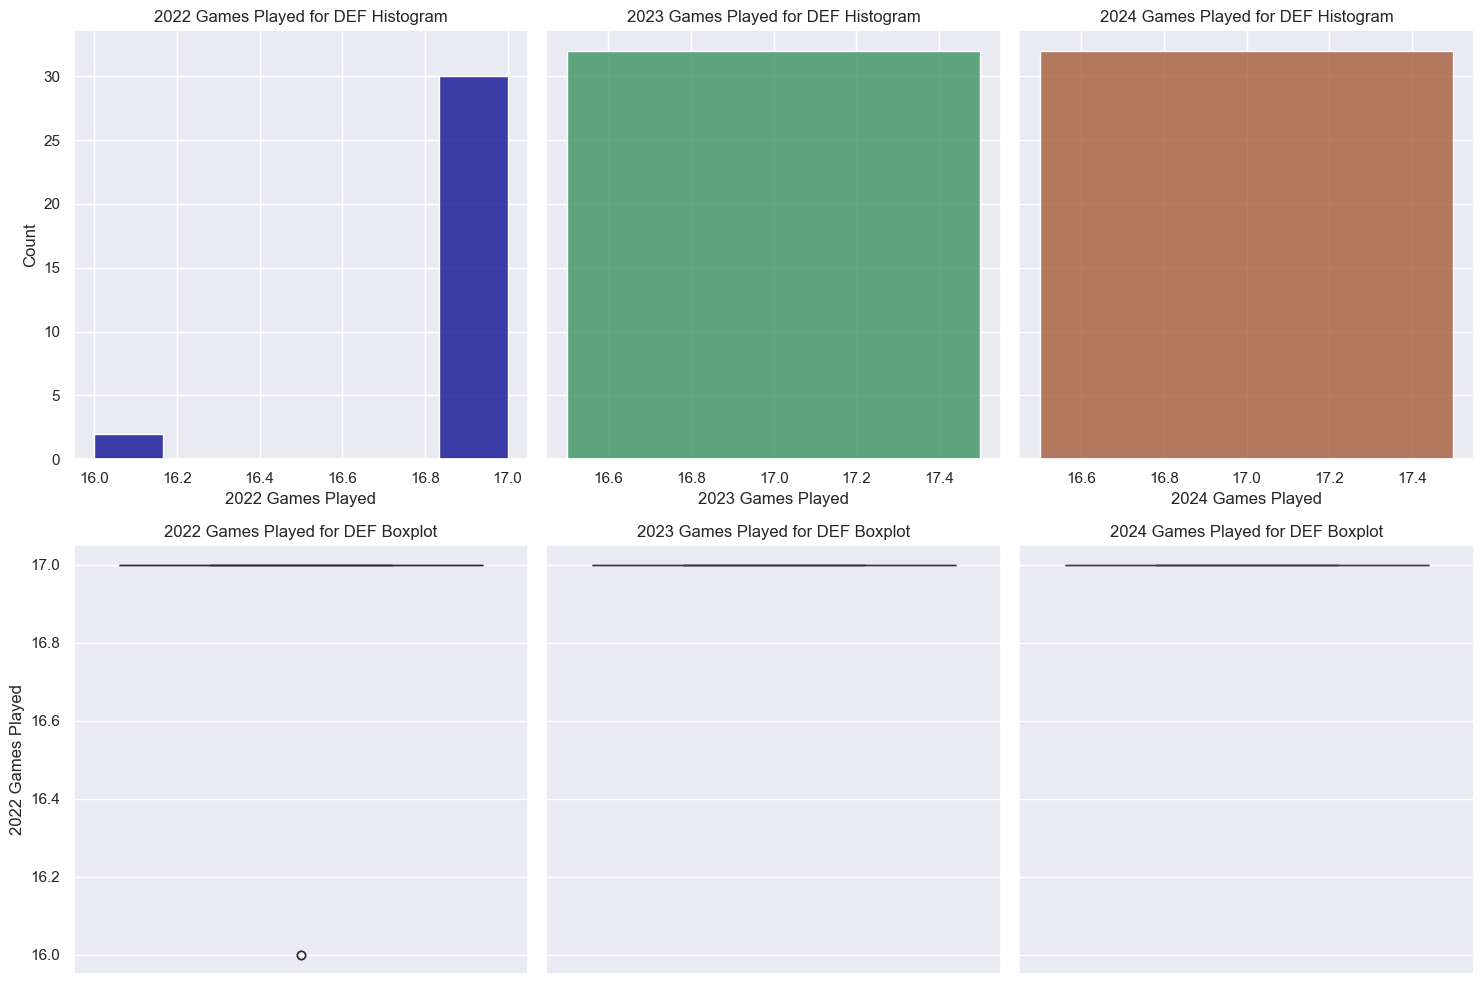

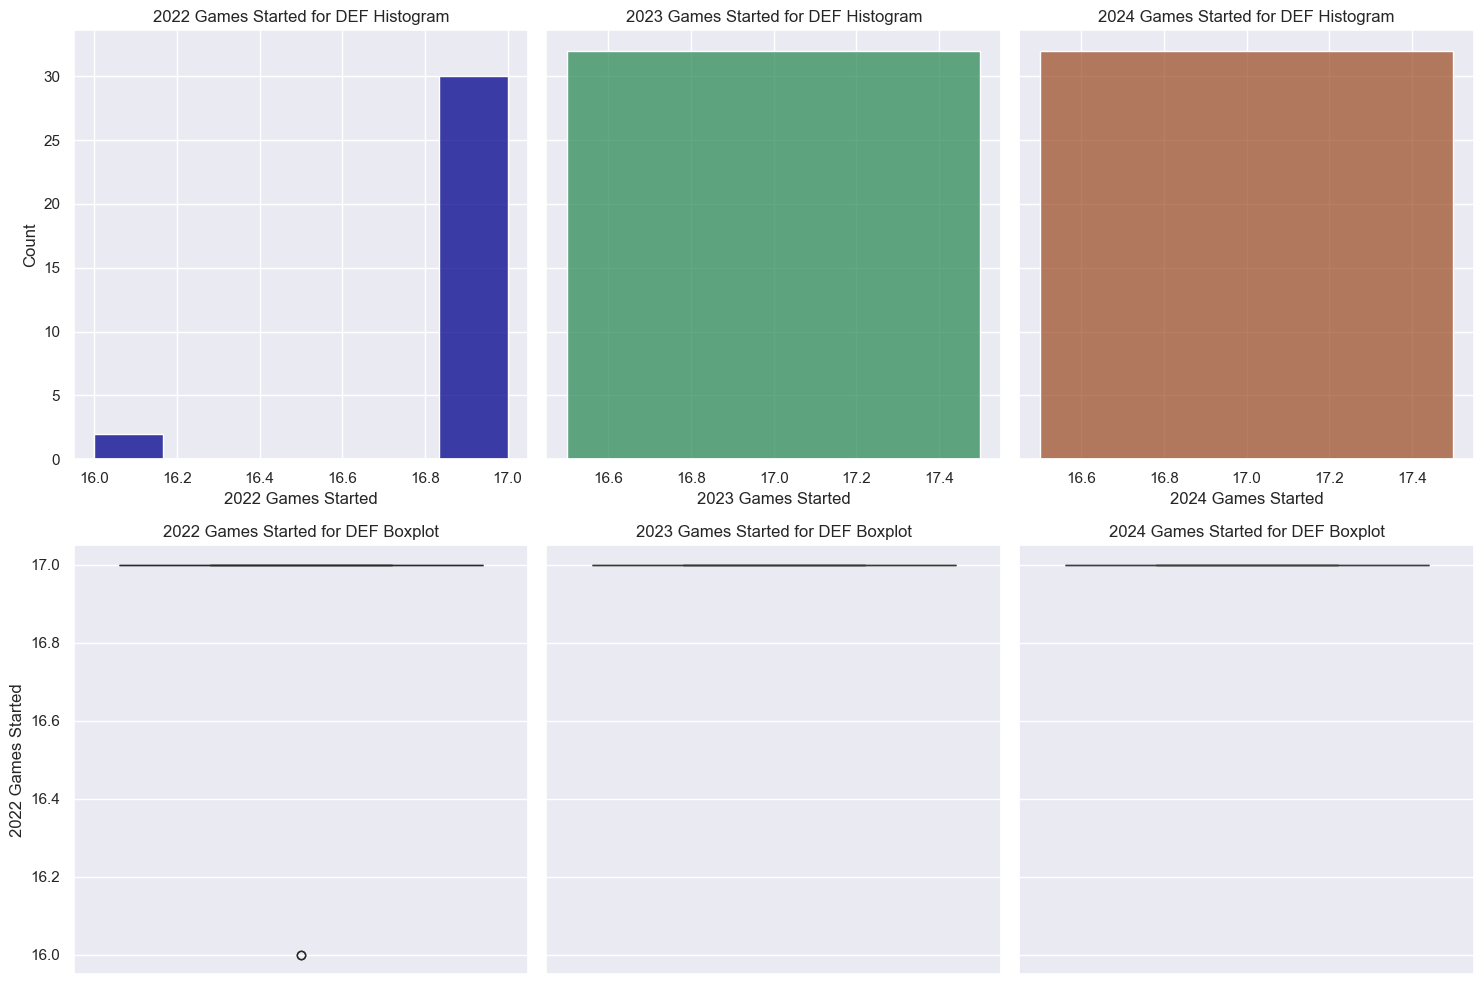

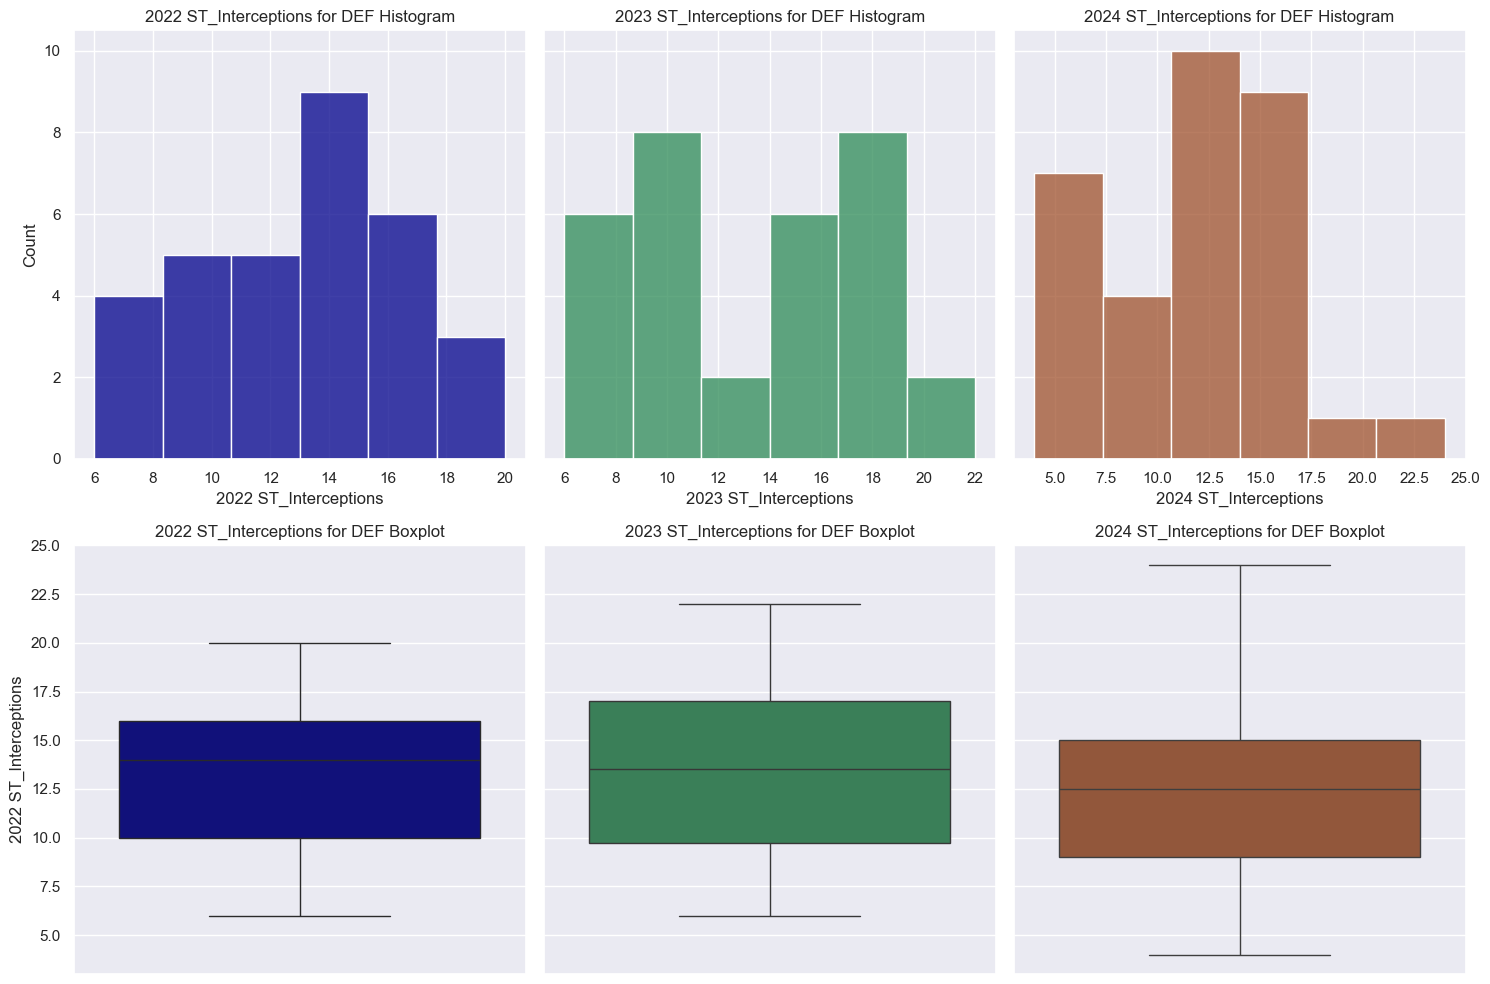

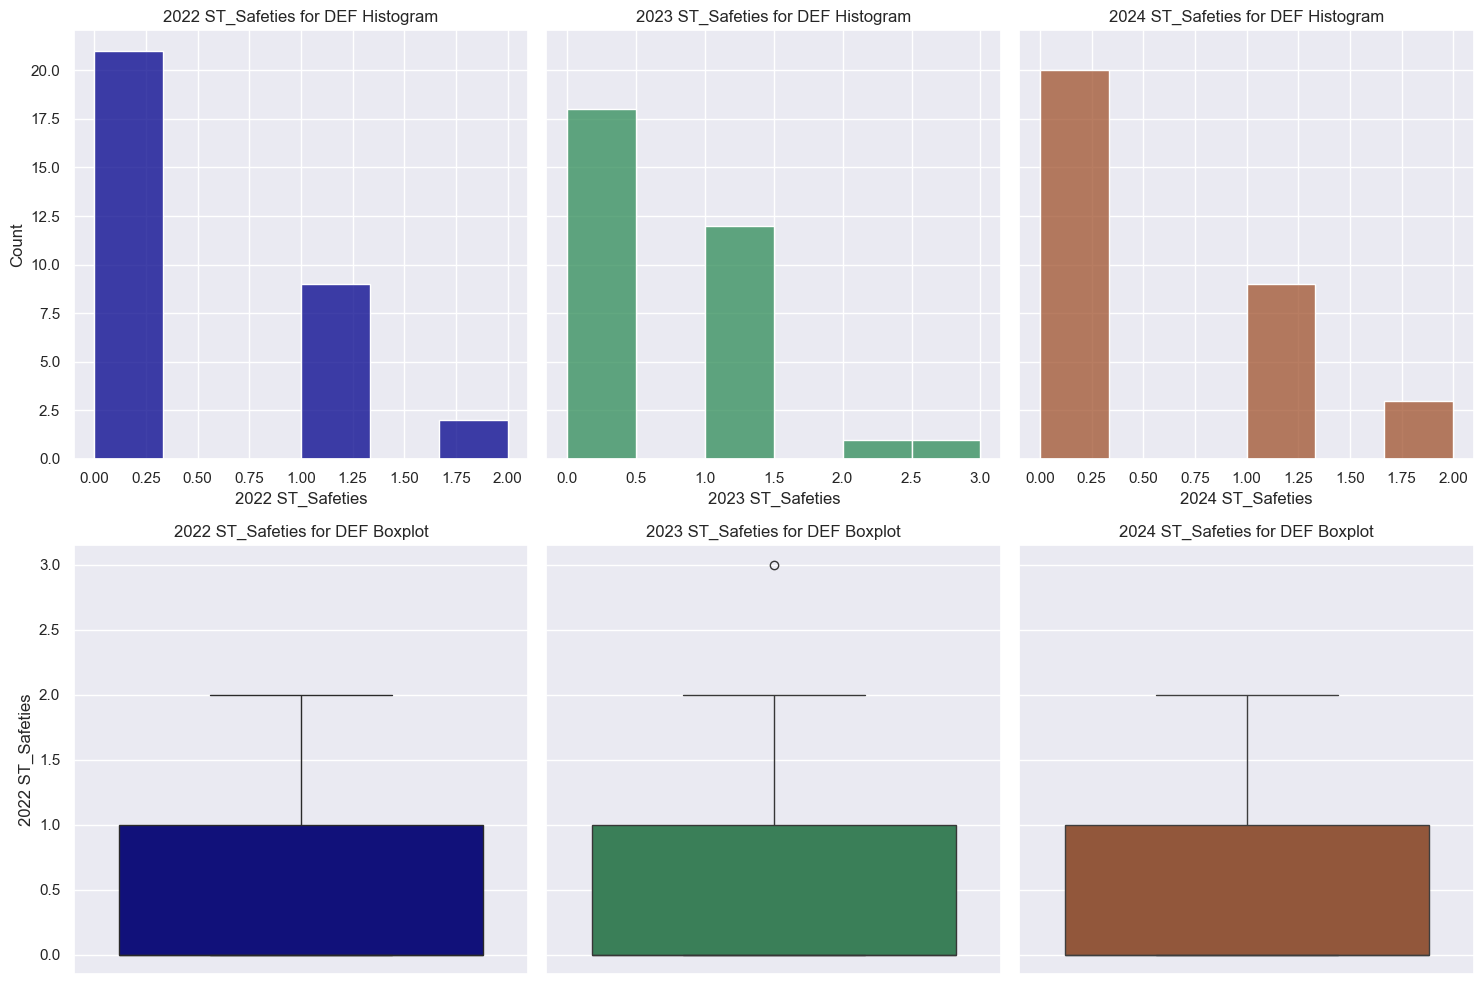

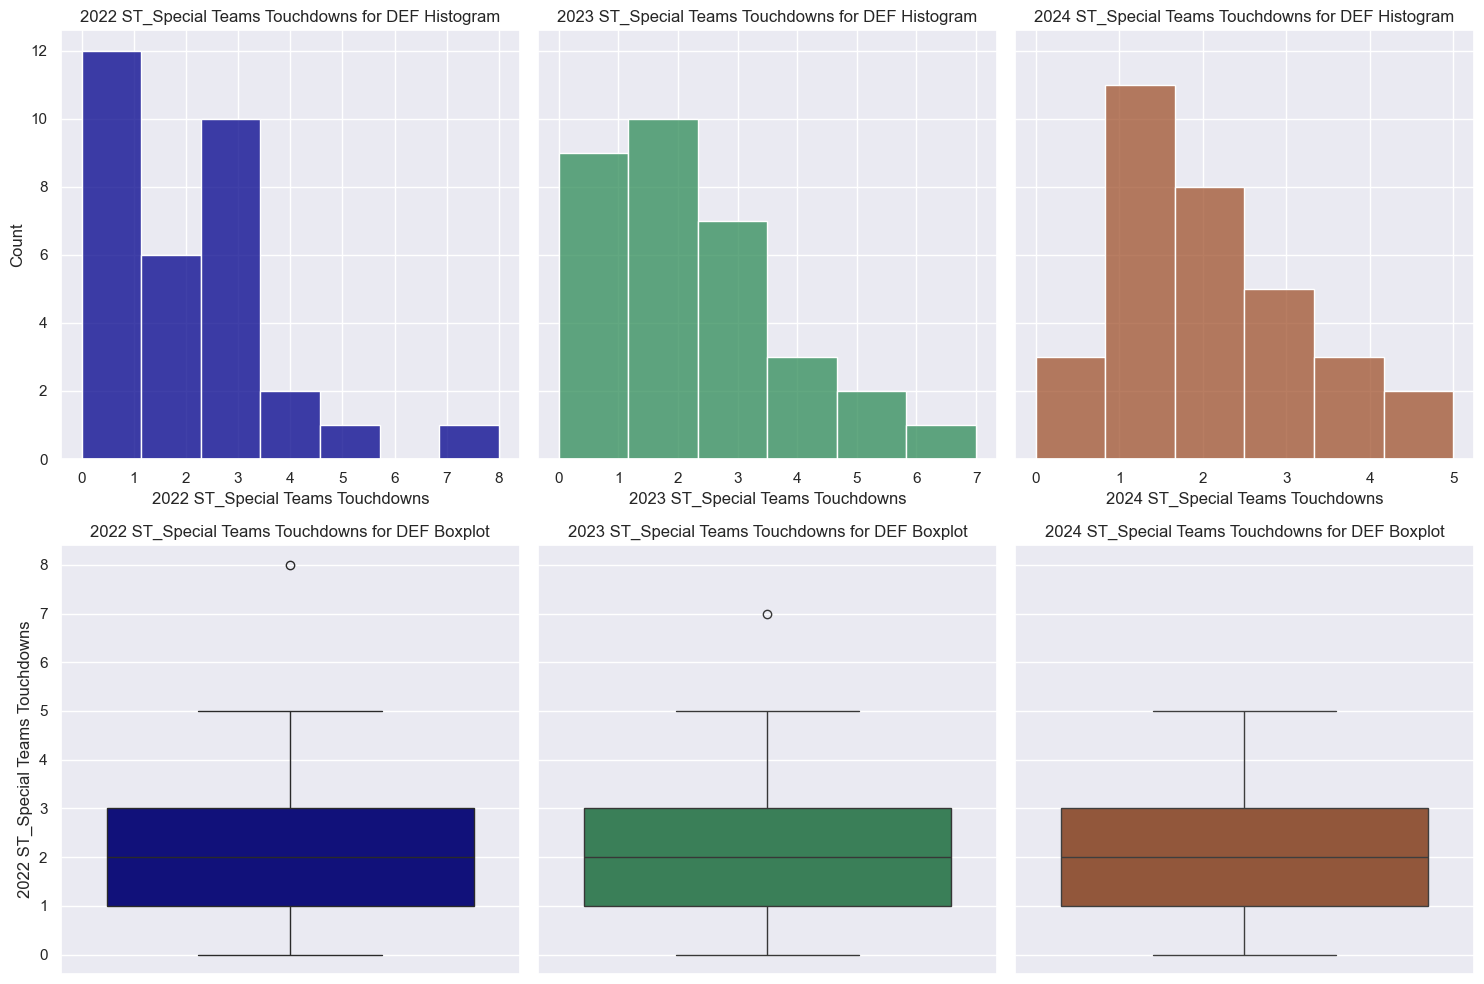

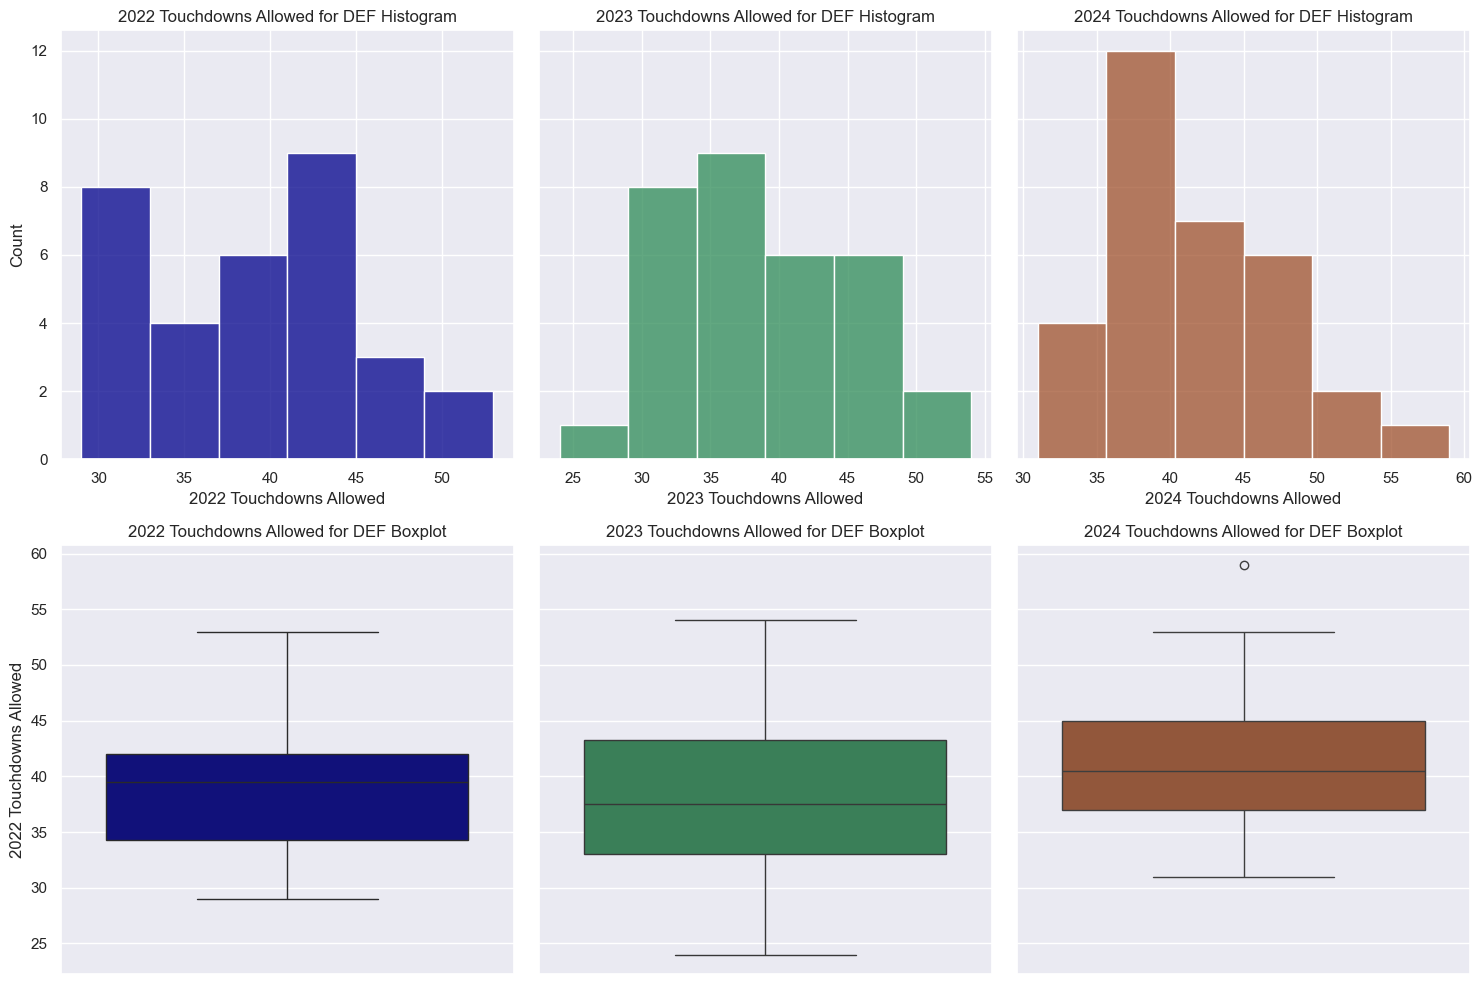

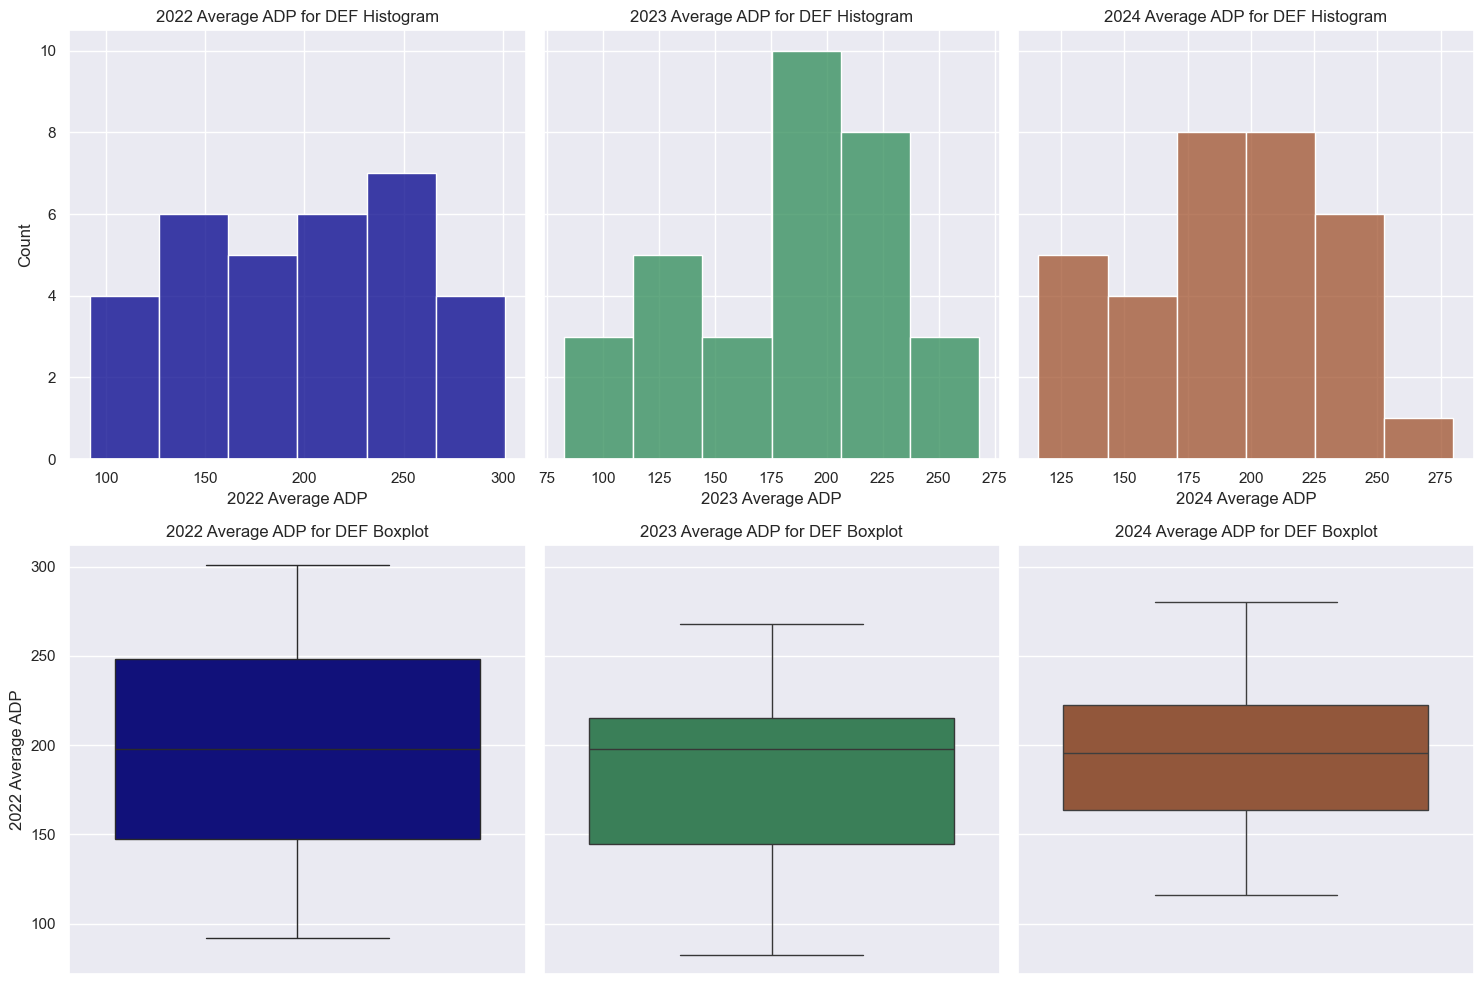

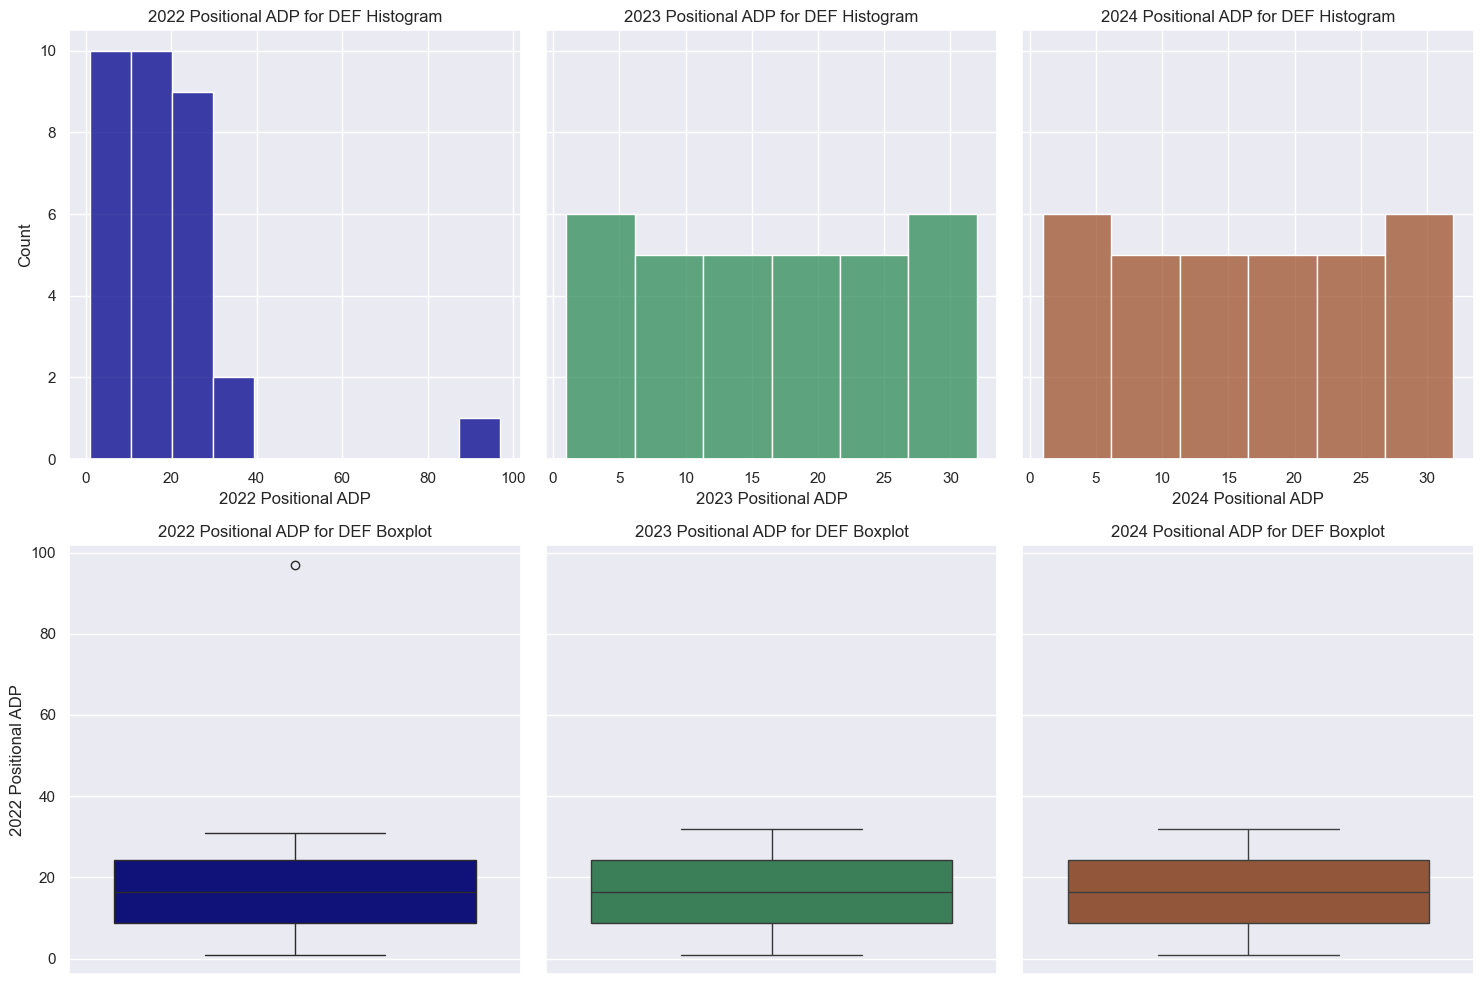

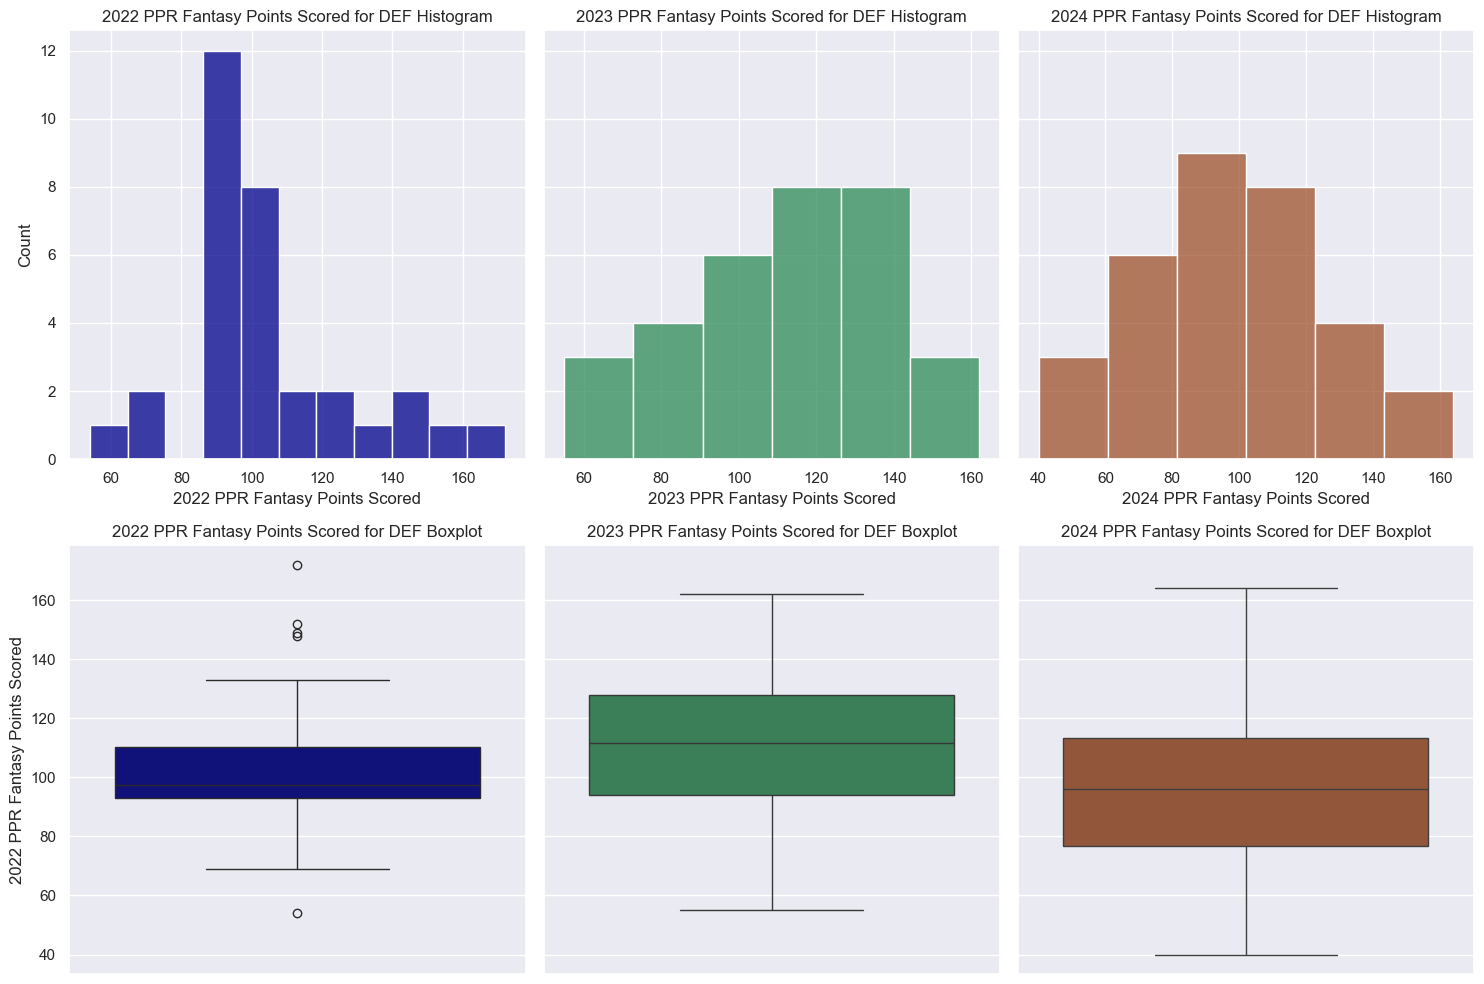

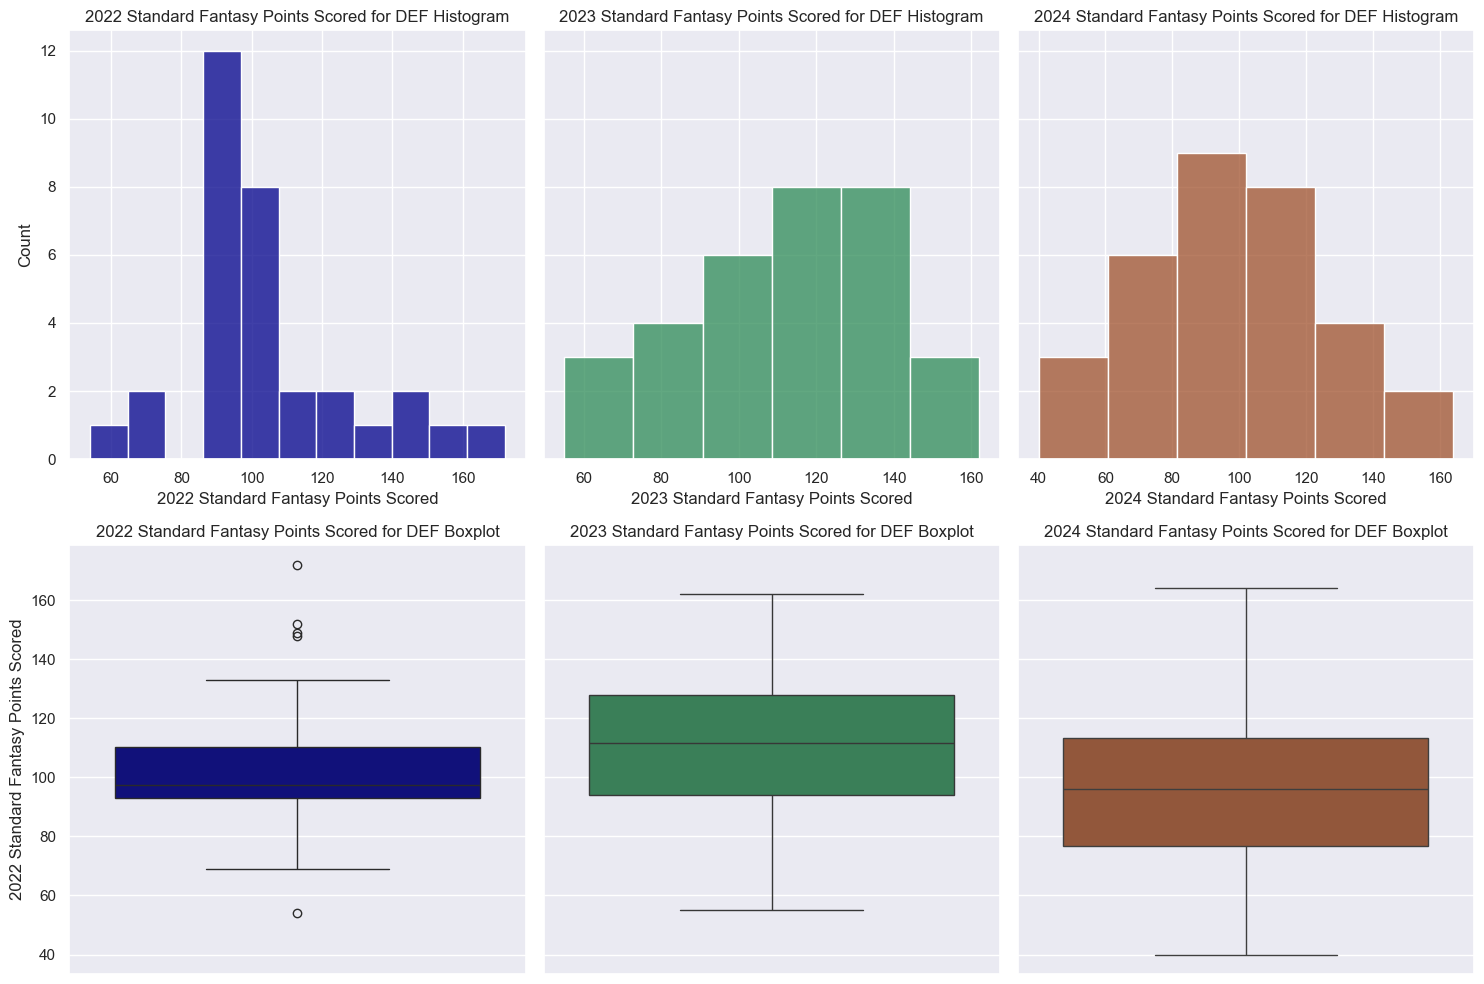

In [36]:
feature_cols = ['Games Played', 'Games Started',
'ST_Interceptions', 'ST_Safeties', 'ST_Special Teams Touchdowns',
'Touchdowns Allowed', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_univar_bypos_plots(f, positions[5], save=True)

In [56]:
feature_cols = ['Games Played', 'Games Started',
'ST_Interceptions', 'ST_Safeties', 'ST_Special Teams Touchdowns',
'Touchdowns Allowed', 'Average ADP', 'Positional ADP',
'PPR Fantasy Points Scored', 'Standard Fantasy Points Scored']

for f in feature_cols:
    fantasy_feature_stats(f, positions[5])

2022 Games Played Max: 17.0
2022 Games Played Min: 16.0
2022 Games Played Mean: 16.9375
2022 Games Played StDev: 0.24206145913796356

2023 Games Played Max: 17.0
2023 Games Played Min: 17.0
2023 Games Played Mean: 17.0
2023 Games Played StDev: 0.0

2024 Games Played Max: 17.0
2024 Games Played Min: 17.0
2024 Games Played Mean: 17.0
2024 Games Played StDev: 0.0

2022 Games Started Max: 17.0
2022 Games Started Min: 16.0
2022 Games Started Mean: 16.9375
2022 Games Started StDev: 0.24206145913796356

2023 Games Started Max: 17.0
2023 Games Started Min: 17.0
2023 Games Started Mean: 17.0
2023 Games Started StDev: 0.0

2024 Games Started Max: 17.0
2024 Games Started Min: 17.0
2024 Games Started Mean: 17.0
2024 Games Started StDev: 0.0

2022 ST_Interceptions Max: 20.0
2022 ST_Interceptions Min: 6.0
2022 ST_Interceptions Mean: 13.0625
2022 ST_Interceptions StDev: 3.741135355744296

2023 ST_Interceptions Max: 22.0
2023 ST_Interceptions Min: 6.0
2023 ST_Interceptions Mean: 13.4375
2023 ST_Interc